In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging

logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO)

## 1. Load expression data

The `transformation` value can be one of `"none"`, `"sqrt"` or `"log"`, which determines how the expression data should be transformed in order to reduce outlier influence.

In [3]:
data_path: str = "data/Athaliana.csv"
transformation: str = "sqrt"

In [4]:
# Parameters
data_path = "data/processed_data/floral_transition.csv"
transformation = "sqrt"


In [5]:
from my_gatai import Expression_data

expression_data = Expression_data.from_csv(data_path, 
                                           transformation=transformation)
expression_data.full

,Phylostratum,GeneID,TP1,TP2,TP3,TP4,TP5,TP6,TP7
0,0.705924,at1g01010,2.416764,2.619943,2.473723,2.317008,2.461993,2.200697,2.821192
1,0.705924,at1g01020,2.495246,2.582087,2.597364,2.730747,2.676457,2.747086,2.528967
2,0.705924,at1g01040,4.854236,5.098336,4.767746,4.653653,4.478829,4.802210,5.142442
3,0.705924,at1g01050,7.181496,7.506390,6.705106,6.423444,6.339675,6.629789,7.240536
4,0.803240,at1g01060,8.396736,9.951856,9.385583,6.317615,6.784620,7.335279,8.912699
...,...,...,...,...,...,...,...,...,...
15491,0.705924,atcg00800,1.612615,1.629820,1.558312,1.470608,1.443992,2.084957,1.499900
15492,0.705924,atcg01020,2.706842,2.611193,2.253875,2.536521,2.097144,2.827260,2.295381
15493,0.903459,atmg00030,7.729567,8.570700,6.124332,4.631382,5.716684,9.702795,8.170928
15494,0.973735,atmg00660,2.344070,2.082176,2.293624,2.023964,1.956286,2.141461,2.098938


In [6]:
expression_data.p_matrix

,TP1,TP2,TP3,TP4,TP5,TP6,TP7
0,0.000023,0.000025,0.000023,0.000022,0.000023,0.000021,0.000027
1,0.000024,0.000024,0.000025,0.000026,0.000025,0.000027,0.000024
2,0.000046,0.000048,0.000045,0.000044,0.000043,0.000046,0.000049
3,0.000068,0.000071,0.000064,0.000061,0.000060,0.000064,0.000069
4,0.000091,0.000107,0.000101,0.000068,0.000073,0.000081,0.000097
...,...,...,...,...,...,...,...
15491,0.000015,0.000015,0.000015,0.000014,0.000014,0.000020,0.000014
15492,0.000026,0.000025,0.000021,0.000024,0.000020,0.000027,0.000022
15493,0.000094,0.000104,0.000074,0.000056,0.000070,0.000120,0.000100
15494,0.000031,0.000027,0.000030,0.000027,0.000026,0.000029,0.000028


In [7]:
expression_data.tai

TP1    0.745027
TP2    0.745621
TP3    0.745289
TP4    0.744738
TP5    0.744765
TP6    0.744207
TP7    0.744833
dtype: float64

### 1.1 Compute TAI value

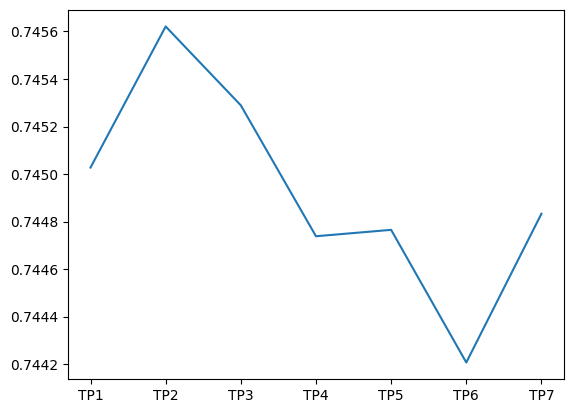

In [8]:
import matplotlib.pyplot as plt

plt.plot(expression_data.tai)
plt.show()

## 2. Flatline test

### 2.1. Compute variance of TAI curve

In [9]:
import numpy as np
tai_var = np.var(expression_data.tai).item()
tai_var

1.7327320619275862e-07

### 2.2. Compute permutation variance distribution

Permute the assigned gene ages between the genes to run the flat line test

In [10]:
from gatai.utils import comp_vars

num_permutations = 10000
permutation_comp_vars = comp_vars(expression_data, num_permutations)

Running permuations


  0%|                                                                                                                                                              | 0/10000 [00:00<?, ?it/s]

  3%|███▉                                                                                                                                              | 271/10000 [00:00<00:03, 2706.05it/s]

  6%|█████████                                                                                                                                         | 620/10000 [00:00<00:02, 3163.37it/s]

 10%|██████████████                                                                                                                                    | 961/10000 [00:00<00:02, 3274.90it/s]

 13%|██████████████████▉                                                                                                                              | 1309/10000 [00:00<00:02, 3354.52it/s]

 17%|████████████████████████                                                                                                                         | 1661/10000 [00:00<00:02, 3413.80it/s]

 20%|█████████████████████████████                                                                                                                    | 2003/10000 [00:00<00:02, 3157.71it/s]

 24%|██████████████████████████████████                                                                                                               | 2351/10000 [00:00<00:02, 3254.77it/s]

 27%|███████████████████████████████████████                                                                                                          | 2694/10000 [00:00<00:02, 3306.55it/s]

 30%|███████████████████████████████████████████▉                                                                                                     | 3027/10000 [00:00<00:02, 3309.76it/s]

 34%|████████████████████████████████████████████████▊                                                                                                | 3364/10000 [00:01<00:01, 3327.01it/s]

 37%|█████████████████████████████████████████████████████▉                                                                                           | 3717/10000 [00:01<00:01, 3387.06it/s]

 41%|██████████████████████████████████████████████████████████▊                                                                                      | 4059/10000 [00:01<00:01, 3395.51it/s]

 44%|███████████████████████████████████████████████████████████████▉                                                                                 | 4412/10000 [00:01<00:01, 3434.65it/s]

 48%|█████████████████████████████████████████████████████████████████████                                                                            | 4765/10000 [00:01<00:01, 3462.82it/s]

 51%|██████████████████████████████████████████████████████████████████████████▏                                                                      | 5119/10000 [00:01<00:01, 3483.03it/s]

 55%|███████████████████████████████████████████████████████████████████████████████▎                                                                 | 5469/10000 [00:01<00:01, 3485.66it/s]

 58%|████████████████████████████████████████████████████████████████████████████████████▎                                                            | 5818/10000 [00:01<00:01, 3444.48it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 6168/10000 [00:01<00:01, 3458.21it/s]

 65%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 6514/10000 [00:01<00:01, 3451.85it/s]

 69%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 6860/10000 [00:02<00:00, 3422.20it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 7212/10000 [00:02<00:00, 3450.71it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 7558/10000 [00:02<00:00, 3427.35it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 7901/10000 [00:02<00:00, 3145.91it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 8220/10000 [00:02<00:00, 3105.77it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 8552/10000 [00:02<00:00, 3164.57it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 8903/10000 [00:02<00:00, 3263.19it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 9232/10000 [00:02<00:00, 3267.18it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 9567/10000 [00:02<00:00, 3290.18it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 9918/10000 [00:02<00:00, 3354.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3334.58it/s]

### 2.3. Fit the random variances to a Gamma distribution and compute the p-value of the true TAI

In [11]:
from flatline import fit_gamma, p_value_function

# NOTE: the default fitting method used by scipy doesn't achieve a very good fit, so use "MM"
a, loc, scale = fit_gamma(permutation_comp_vars)
get_p_value = p_value_function(a, loc, scale)
print("Gamma fit params:", a, loc, scale)

Gamma fit params: 0.538489732944874 1.4261531524505274e-09 1.0233442199511624e-08


In [12]:
print("p-value of TAI:", get_p_value(tai_var))

p-value of TAI: 8.188026494640939e-09


### 2.4. Visually compare the random TAI variances against the true one

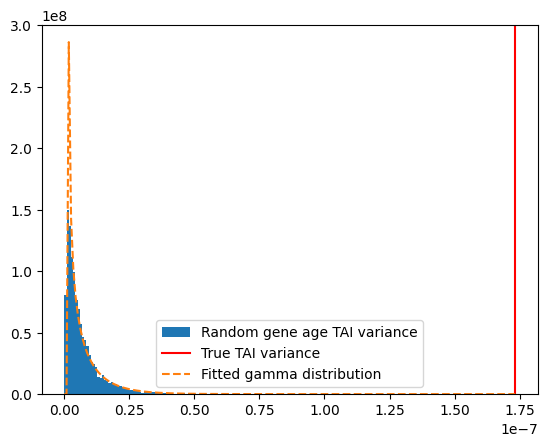

In [13]:
from scipy import stats
plt.hist(permutation_comp_vars, density=True, bins=100, label="Random gene age TAI variance")
plt.axvline(x=tai_var, label="True TAI variance", color="red")

x = np.linspace(0, tai_var, 200)
y = stats.gamma.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, y, label="Fitted gamma distribution", linestyle="dashed")

plt.legend()
plt.show()

## 3. Destroy TAI signal with GATAI

### 3.1 Run genetic algorithm to extract genes that break the pattern
Note that the transformation used for the expression data heavily influences the number of genes that get extracted, as well as the number of generations needed for convergence.

Also, with transformations applied, older genes are better represented

In [14]:
from my_gatai import get_extracted_genes

num_runs = 5

ga_gene_sets = []

for _ in range(num_runs):
    ga_gene_sets.append(get_extracted_genes(expression_data, permutation_comp_vars))

gen	island	Num removed	Variance
0  	      	1          	1.98683 


10 	1     	362        	1.59674 
10 	2     	286        	1.67079 
10 	3     	298        	1.73301 
10 	4     	154        	1.857   




20 	1     	559        	1.57943 
20 	2     	460        	1.53937 
20 	3     	549        	1.52002 
20 	4     	407        	1.64592 




30 	1     	656        	1.42214 
30 	2     	530        	1.45057 
30 	3     	585        	1.46169 
30 	4     	637        	1.47577 




40 	1     	694        	1.39914 
40 	2     	754        	1.37068 
40 	3     	865        	1.37185 
40 	4     	672        	1.42436 




50 	1     	926        	1.33736 
50 	2     	782        	1.35127 
50 	3     	893        	1.35551 
50 	4     	948        	1.3405  




60 	1     	818        	1.33563 
60 	2     	907        	1.32808 
60 	3     	1041       	1.31787 
60 	4     	1020       	1.33619 




70 	1     	1032       	1.31179 
70 	2     	1118       	1.28877 
70 	3     	903        	1.30836 
70 	4     	930        	1.31489 




80 	1     	864        	1.29488 
80 	2     	1121       	1.24074 
80 	3     	1140       	1.29108 
80 	4     	1001       	1.28774 




90 	1     	1290       	1.24778 
90 	2     	1131       	1.22113 
90 	3     	1121       	1.22799 
90 	4     	1236       	1.23191 




100	1     	1172       	1.22412 
100	2     	1212       	1.19027 
100	3     	1110       	1.21892 
100	4     	1323       	1.19134 




110	1     	1335       	1.1814  
110	2     	1386       	1.19133 
110	3     	1178       	1.18553 
110	4     	1409       	1.16623 




120	1     	1170       	1.16772 
120	2     	1349       	1.15988 
120	3     	1249       	1.17992 
120	4     	1235       	1.16444 




130	1     	1338       	1.15868 
130	2     	1169       	1.15515 
130	3     	1417       	1.15192 
130	4     	1399       	1.15192 




140	1     	1348       	1.14717 
140	2     	1297       	1.14586 
140	3     	1452       	1.14565 
140	4     	1475       	1.13293 




150	1     	1328       	1.13414 
150	2     	1444       	1.1312  
150	3     	1342       	1.13686 
150	4     	1380       	1.13607 




160	1     	1467       	1.12671 
160	2     	1470       	1.12415 
160	3     	1443       	1.12122 
160	4     	1565       	1.12733 




170	1     	1498       	1.11394 
170	2     	1545       	1.12538 
170	3     	1405       	1.12081 
170	4     	1611       	1.10968 




180	1     	1498       	1.10974 
180	2     	1617       	1.10596 
180	3     	1535       	1.11085 
180	4     	1449       	1.11289 




190	1     	1559       	1.10293 
190	2     	1431       	1.10737 
190	3     	1474       	1.10745 
190	4     	1694       	1.09915 




200	1     	1639       	1.09857 
200	2     	1694       	1.09915 
200	3     	1443       	1.10067 
200	4     	1701       	1.09635 




210	1     	1700       	1.09429 
210	2     	1701       	1.09635 
210	3     	1660       	1.0946  
210	4     	1369       	1.09242 




220	1     	1386       	1.08994 
220	2     	1352       	1.09081 
220	3     	1706       	1.09226 
220	4     	1717       	1.0915  




230	1     	1721       	1.08319 
230	2     	1427       	1.06763 
230	3     	1570       	1.07606 
230	4     	1484       	1.07629 




240	1     	1475       	1.07343 
240	2     	1484       	1.07629 
240	3     	1476       	1.0744  
240	4     	1461       	1.06225 




250	1     	1470       	1.05511 
250	2     	1461       	1.06225 
250	3     	1599       	1.06805 
250	4     	1551       	1.05474 




260	1     	1535       	1.04978 
260	2     	1517       	1.05282 
260	3     	1539       	1.05458 
260	4     	1412       	1.05474 




270	1     	1448       	1.05109 
270	2     	1502       	1.04845 
270	3     	1669       	1.04666 
270	4     	1523       	1.04682 




280	1     	1635       	1.04216 
280	2     	1523       	1.04682 
280	3     	1550       	1.0453  
280	4     	1590       	1.03594 




290	1     	1577       	1.03499 
290	2     	1614       	1.03253 
290	3     	1822       	1.03305 
290	4     	1575       	1.02946 




300	1     	1563       	1.02555 
300	2     	1575       	1.02946 
300	3     	1514       	1.03056 
300	4     	1508       	1.02538 




310	1     	1581       	1.0221  
310	2     	1589       	1.02022 
310	3     	1630       	1.02331 
310	4     	1752       	1.02    




320	1     	1653       	1.01068 
320	2     	1618       	1.01661 
320	3     	1573       	1.0169  
320	4     	1619       	1.01076 




330	1     	1649       	1.01017 
330	2     	1678       	1.00999 
330	3     	1696       	1.00266 
330	4     	1606       	1.00592 




340	1     	1663       	1.00247 
340	2     	1606       	1.00592 
340	3     	1616       	1.0051  
340	4     	1731       	0.99898 




350	1     	1692       	0.996302
350	2     	1704       	0.99816 
350	3     	1709       	0.999588
350	4     	1669       	0.999326




360	1     	1583       	0.997663
360	2     	1688       	0.995437
360	3     	1748       	0.989099
360	4     	1704       	0.99816 




370	1     	1756       	0.985708
370	2     	1551       	0.995873
370	3     	1660       	0.984954
370	4     	1752       	0.98772 




380	1     	1655       	0.983476
380	2     	1799       	0.985339
380	3     	1716       	0.99054 
380	4     	1652       	0.985113




390	1     	1642       	0.983485
390	2     	1612       	0.980595
390	3     	1601       	0.988951
390	4     	1582       	0.985992




400	1     	1570       	0.981894
400	2     	1569       	0.983461
400	3     	1848       	0.972979
400	4     	1799       	0.973947




410	1     	1803       	0.968443
410	2     	1594       	0.978415
410	3     	1724       	0.972345
410	4     	1919       	0.965802




420	1     	1862       	0.957617
420	2     	1970       	0.96165 
420	3     	1680       	0.96457 
420	4     	1876       	0.955543




430	1     	1856       	0.957542
430	2     	1805       	0.954458
430	3     	1970       	0.96165 
430	4     	1912       	0.955797




440	1     	1876       	0.949166
440	2     	1799       	0.952728
440	3     	1849       	0.951214
440	4     	1908       	0.95199 




450	1     	1874       	0.948567
450	2     	1867       	0.946724
450	3     	1681       	0.943919
450	4     	1838       	0.945283




460	1     	1660       	0.939871
460	2     	1869       	0.945722
460	3     	1707       	0.93977 
460	4     	1704       	0.936843




470	1     	1735       	0.933056
470	2     	1704       	0.936843
470	3     	1641       	0.942386
470	4     	1754       	0.936466




480	1     	1754       	0.936466
480	2     	1716       	0.924121
480	3     	1863       	0.920208
480	4     	1749       	0.933689




490	1     	1928       	0.918179
490	2     	1659       	0.924151
490	3     	1669       	0.916501
490	4     	1973       	0.907955




500	1     	2071       	0.904586
500	2     	1943       	0.907944
500	3     	1737       	0.913263
500	4     	2065       	0.903959




510	1     	1857       	0.896894
510	2     	1926       	0.900535
510	3     	2130       	0.901225
510	4     	1838       	0.899983




520	1     	2167       	0.895879
520	2     	1838       	0.899983
520	3     	1944       	0.889039
520	4     	2104       	0.896667




530	1     	1862       	0.887638
530	2     	2166       	0.89587 
530	3     	1848       	0.885587
530	4     	1916       	0.880637




540	1     	1909       	0.878914
540	2     	2140       	0.885958
540	3     	1666       	0.893753
540	4     	1834       	0.875236




550	1     	1804       	0.865835
550	2     	1815       	0.871654
550	3     	1933       	0.873436
550	4     	1757       	0.874724




560	1     	1966       	0.867582
560	2     	1838       	0.863443
560	3     	1867       	0.864458
560	4     	1797       	0.86742 




570	1     	1880       	0.858271
570	2     	1956       	0.865822
570	3     	1810       	0.857607
570	4     	1810       	0.857607




580	1     	1812       	0.850722
580	2     	1847       	0.849116
580	3     	1839       	0.847666
580	4     	1993       	0.848096




590	1     	1849       	0.839094
590	2     	1993       	0.848096
590	3     	1918       	0.840943
590	4     	1966       	0.840487




600	1     	1821       	0.843324
600	2     	1849       	0.832905
600	3     	1900       	0.830867
600	4     	1944       	0.835948




610	1     	1943       	0.828997
610	2     	1854       	0.835342
610	3     	1961       	0.821139
610	4     	2022       	0.826388




620	1     	1961       	0.821139
620	2     	2014       	0.82004 
620	3     	1901       	0.823451
620	4     	2000       	0.823452




630	1     	1961       	0.821139
630	2     	1834       	0.806486
630	3     	1912       	0.819913
630	4     	2015       	0.812673




640	1     	2097       	0.797255
640	2     	1771       	0.815214
640	3     	1879       	0.805256
640	4     	1834       	0.806486




650	1     	2117       	0.79155 
650	2     	1958       	0.815693
650	3     	1823       	0.802408
650	4     	1895       	0.802389




660	1     	1790       	0.790616
660	2     	2087       	0.789006
660	3     	2229       	0.783413
660	4     	1852       	0.785214




670	1     	1823       	0.783308
670	2     	1764       	0.800202
670	3     	2255       	0.770228
670	4     	2345       	0.761834




680	1     	2353       	0.750205
680	2     	1787       	0.797864
680	3     	2254       	0.75643 
680	4     	2255       	0.770228




690	1     	2267       	0.743252
690	2     	1757       	0.784365
690	3     	2285       	0.75398 
690	4     	2235       	0.755627




700	1     	2328       	0.747798
700	2     	2222       	0.742346
700	3     	2242       	0.738923
700	4     	2250       	0.749293




710	1     	2242       	0.738923
710	2     	2212       	0.738923
710	3     	2322       	0.729208
710	4     	2259       	0.737865




720	1     	2213       	0.743386
720	2     	2147       	0.737315
720	3     	2205       	0.729517
720	4     	2309       	0.726239




730	1     	2305       	0.716766
730	2     	2045       	0.738868
730	3     	2175       	0.732233
730	4     	2246       	0.72343 




740	1     	2199       	0.71463 
740	2     	2305       	0.713238
740	3     	1911       	0.730405
740	4     	2148       	0.71553 




750	1     	2049       	0.714622
750	2     	2182       	0.711087
750	3     	2245       	0.704374
750	4     	2137       	0.704716




760	1     	2188       	0.703795
760	2     	2114       	0.7039  
760	3     	2296       	0.693731
760	4     	2334       	0.69373 




770	1     	2129       	0.689822
770	2     	2146       	0.690981
770	3     	2162       	0.69542 
770	4     	2340       	0.685689




780	1     	2123       	0.672454
780	2     	2083       	0.705068
780	3     	2182       	0.67813 
780	4     	2215       	0.694065




790	1     	2122       	0.676911
790	2     	2106       	0.677685
790	3     	2224       	0.662767
790	4     	2203       	0.666622




800	1     	2203       	0.666622
800	2     	2038       	0.66848 
800	3     	2191       	0.662004
800	4     	2234       	0.658483




810	1     	2159       	0.653986
810	2     	2181       	0.664477
810	3     	2204       	0.658368
810	4     	2235       	0.653105




820	1     	2159       	0.653986
820	2     	2130       	0.641505
820	3     	2037       	0.655897
820	4     	2146       	0.641848




830	1     	2185       	0.634056
830	2     	2050       	0.637942
830	3     	2164       	0.636572
830	4     	2177       	0.640782




840	1     	2197       	0.630384
840	2     	2171       	0.619662
840	3     	2193       	0.631421
840	4     	2225       	0.630978




850	1     	2178       	0.635915
850	2     	2121       	0.621978
850	3     	2127       	0.617766
850	4     	2168       	0.61966 




860	1     	2184       	0.613796
860	2     	2137       	0.619009
860	3     	2210       	0.623824
860	4     	2155       	0.61411 




870	1     	2114       	0.607466
870	2     	2184       	0.613796
870	3     	2087       	0.61443 
870	4     	2160       	0.615305




880	1     	2206       	0.594785
880	2     	2114       	0.607466
880	3     	2114       	0.607466
880	4     	2239       	0.587676




890	1     	2296       	0.584666
890	2     	2219       	0.587672
890	3     	2166       	0.588127
890	4     	2300       	0.586817




900	1     	2296       	0.584666
900	2     	2219       	0.587672
900	3     	2197       	0.585731
900	4     	2146       	0.580757




910	1     	2157       	0.583527
910	2     	2123       	0.580755
910	3     	2276       	0.579685
910	4     	2106       	0.569719




920	1     	2077       	0.577656
920	2     	2106       	0.569719
920	3     	2367       	0.554352
920	4     	2060       	0.582248




930	1     	2418       	0.549959
930	2     	2105       	0.574408
930	3     	2475       	0.554781
930	4     	2362       	0.545451




940	1     	2362       	0.545451
940	2     	2352       	0.542766
940	3     	2436       	0.536721
940	4     	2428       	0.537244




950	1     	2435       	0.534304
950	2     	2428       	0.537244
950	3     	2133       	0.539998
950	4     	2352       	0.542766




960	1     	2342       	0.538958
960	2     	2356       	0.538118
960	3     	2414       	0.52918 
960	4     	2259       	0.523507




970	1     	2259       	0.523507
970	2     	2312       	0.529285
970	3     	2456       	0.534976
970	4     	2221       	0.521274




980	1     	2221       	0.521274
980	2     	2249       	0.521158
980	3     	2368       	0.520836
980	4     	2188       	0.526322




990	1     	2154       	0.51861 
990	2     	2184       	0.518391
990	3     	2192       	0.512228
990	4     	2403       	0.520727




1000	1     	2097       	0.526444
1000	2     	2403       	0.520727
1000	3     	2206       	0.50958 
1000	4     	2264       	0.495701




1010	1     	2074       	0.530758
1010	2     	2130       	0.52307 
1010	3     	2072       	0.517333
1010	4     	2264       	0.492121




1020	1     	2264       	0.492121
1020	2     	2264       	0.492121
1020	3     	2219       	0.502426
1020	4     	2257       	0.500951




1030	1     	2256       	0.490415
1030	2     	2256       	0.494354
1030	3     	2359       	0.486491
1030	4     	2264       	0.492121




1040	1     	2226       	0.494774
1040	2     	2236       	0.488823
1040	3     	2245       	0.472344
1040	4     	2334       	0.480804




1050	1     	2241       	0.469716
1050	2     	2186       	0.497421
1050	3     	2165       	0.483091
1050	4     	2279       	0.46771 




1060	1     	2273       	0.463506
1060	2     	2219       	0.467078
1060	3     	2241       	0.469716
1060	4     	2272       	0.464671




1070	1     	2221       	0.462869
1070	2     	2323       	0.462549
1070	3     	2167       	0.459174
1070	4     	2253       	0.455264




1080	1     	2253       	0.455264
1080	2     	2291       	0.442226
1080	3     	2477       	0.438861
1080	4     	2384       	0.456885




1090	1     	2472       	0.438327
1090	2     	2291       	0.442226
1090	3     	2453       	0.433995
1090	4     	2483       	0.432508




1100	1     	2483       	0.432508
1100	2     	2262       	0.438317
1100	3     	2569       	0.426835
1100	4     	2434       	0.42597 




1110	1     	2409       	0.42542 
1110	2     	2483       	0.432508
1110	3     	2290       	0.429072
1110	4     	2356       	0.41854 




1120	1     	2294       	0.437136
1120	2     	2356       	0.41854 
1120	3     	2464       	0.4224  
1120	4     	2336       	0.415364




1130	1     	2393       	0.414196
1130	2     	2269       	0.434524
1130	3     	2456       	0.406004
1130	4     	2456       	0.401745




1140	1     	2515       	0.394677
1140	2     	2352       	0.423042
1140	3     	2454       	0.407171
1140	4     	2498       	0.406725




1150	1     	2553       	0.397329
1150	2     	2289       	0.393221
1150	3     	2560       	0.384023
1150	4     	2556       	0.39593 




1160	1     	2560       	0.384023
1160	2     	2517       	0.398165
1160	3     	2265       	0.388616
1160	4     	2333       	0.380024




1170	1     	2312       	0.379241
1170	2     	2324       	0.379898
1170	3     	2247       	0.37747 
1170	4     	2385       	0.374722




1180	1     	2236       	0.382463
1180	2     	2259       	0.371356
1180	3     	2379       	0.37632 
1180	4     	2426       	0.34851 




1190	1     	2393       	0.361894
1190	2     	2426       	0.34851 
1190	3     	2503       	0.3743  
1190	4     	2372       	0.345856




1200	1     	2368       	0.34767 
1200	2     	2372       	0.345856
1200	3     	2437       	0.345537
1200	4     	2314       	0.349553




1210	1     	2437       	0.345537
1210	2     	2421       	0.340649
1210	3     	2427       	0.342836
1210	4     	2320       	0.345223




1220	1     	2299       	0.336779
1220	2     	2494       	0.327532
1220	3     	2381       	0.33803 
1220	4     	2254       	0.328681




1230	1     	2224       	0.331287
1230	2     	2402       	0.318031
1230	3     	2339       	0.345226
1230	4     	2494       	0.327532




1240	1     	2494       	0.327532
1240	2     	2238       	0.326988
1240	3     	2297       	0.32161 
1240	4     	2458       	0.307468




1250	1     	2458       	0.307468
1250	2     	2263       	0.329205
1250	3     	2217       	0.323614
1250	4     	2447       	0.308328




1260	1     	2337       	0.307465
1260	2     	2454       	0.302732
1260	3     	2458       	0.307468
1260	4     	2241       	0.307999




1270	1     	2070       	0.338571
1270	2     	2411       	0.306202
1270	3     	2454       	0.302732
1270	4     	2544       	0.288818




1280	1     	2481       	0.308333
1280	2     	2544       	0.288818
1280	3     	2419       	0.291622
1280	4     	2447       	0.300252




1290	1     	2419       	0.291622
1290	2     	2447       	0.300252
1290	3     	2471       	0.277079
1290	4     	2419       	0.291622




1300	1     	2471       	0.277079
1300	2     	2419       	0.291622
1300	3     	2477       	0.276558
1300	4     	2516       	0.268828




1310	1     	2516       	0.268828
1310	2     	2451       	0.271046
1310	3     	2471       	0.277079
1310	4     	2516       	0.268828




1320	1     	2489       	0.261216
1320	2     	2515       	0.268514
1320	3     	2573       	0.262147
1320	4     	2566       	0.264028




1330	1     	2573       	0.262147
1330	2     	2566       	0.264028
1330	3     	2489       	0.261216
1330	4     	2483       	0.256715




1340	1     	2483       	0.256715
1340	2     	2573       	0.262147
1340	3     	2489       	0.261216
1340	4     	2468       	0.24849 




1350	1     	2527       	0.244164
1350	2     	2469       	0.246419
1350	3     	2434       	0.264134
1350	4     	2527       	0.244164




1360	1     	2527       	0.244164
1360	2     	2527       	0.244164
1360	3     	2366       	0.271047
1360	4     	2549       	0.239021




1370	1     	2468       	0.23923 
1370	2     	2525       	0.233536
1370	3     	2527       	0.244164
1370	4     	2565       	0.233319




1380	1     	2540       	0.237889
1380	2     	2565       	0.233319
1380	3     	2462       	0.232172
1380	4     	2572       	0.233531




1390	1     	2556       	-0      
1390	2     	2560       	0.233429
1390	3     	2565       	0.233319
1390	4     	2488       	0.218427




1400	1     	2539       	-0      
1400	2     	2529       	-0      
1400	3     	2614       	0.226796
1400	4     	2518       	0.225245




1410	1     	2464       	0.224305
1410	2     	2526       	-0      
1410	3     	2529       	-0      
1410	4     	2518       	0.225245




1420	1     	2454       	0.220395
1420	2     	2495       	-0      
1420	3     	2525       	-0      
1420	4     	2448       	0.228158




1430	1     	2452       	0.226265
1430	2     	2482       	0.214364
1430	3     	2469       	-0      
1430	4     	2525       	-0      




1440	1     	2502       	-0      
1440	2     	2454       	0.220395
1440	3     	2427       	0.211753
1440	4     	2463       	-0      




1450	1     	2497       	0.213945
1450	2     	2502       	-0      
1450	3     	2390       	-0      
1450	4     	2407       	-0      




1460	1     	2383       	-0      
1460	2     	2502       	-0      
1460	3     	2390       	-0      
1460	4     	2390       	-0      




1470	1     	2383       	-0      
1470	2     	2364       	-0      
1470	3     	2383       	-0      
1470	4     	2440       	0.214771




1480	1     	2280       	0.232584
1480	2     	2364       	-0      
1480	3     	2330       	0.216141
1480	4     	2383       	-0      




1490	1     	2212       	0.224408
1490	2     	2285       	-0      
1490	3     	2359       	-0      
1490	4     	2361       	-0      




1500	1     	2212       	0.224408
1500	2     	2271       	-0      
1500	3     	2285       	-0      
1500	4     	2359       	-0      




1510	1     	2351       	-0      
1510	2     	2239       	0.229601
1510	3     	2258       	-0      
1510	4     	2285       	-0      




1520	1     	2267       	-0      
1520	2     	2337       	-0      
1520	3     	2201       	0.214771
1520	4     	2258       	-0      




1530	1     	2245       	-0      
1530	2     	2266       	-0      
1530	3     	2329       	-0      
1530	4     	2197       	-0      




1540	1     	2186       	-0      
1540	2     	2237       	-0      
1540	3     	2216       	-0      
1540	4     	2196       	-0      




1550	1     	2186       	-0      
1550	2     	2215       	0.21322 
1550	3     	2169       	-0      
1550	4     	2117       	0.234676




1560	1     	2144       	0.216681
1560	2     	2179       	-0      
1560	3     	2185       	-0      
1560	4     	2110       	-0      




1570	1     	2110       	-0      
1570	2     	2114       	0.210407
1570	3     	2179       	-0      
1570	4     	2153       	0.211754




1580	1     	2081       	-0      
1580	2     	2114       	-0      
1580	3     	2110       	-0      
1580	4     	2172       	-0      




1590	1     	2042       	0.225037
1590	2     	2048       	-0      
1590	3     	2114       	-0      
1590	4     	2101       	-0      




1600	1     	2086       	-0      
1600	2     	2038       	-0      
1600	3     	2048       	-0      
1600	4     	2117       	0.214049




1610	1     	1972       	0.250564
1610	2     	2086       	-0      
1610	3     	1992       	-0      
1610	4     	2160       	-0      




1620	1     	1972       	0.250564
1620	2     	2086       	-0      
1620	3     	2072       	-0      
1620	4     	1942       	-0      




1630	1     	1942       	-0      
1630	2     	2052       	0.226473
1630	3     	2072       	-0      
1630	4     	2037       	-0      




1640	1     	1908       	-0      
1640	2     	1942       	-0      
1640	3     	2046       	-0      
1640	4     	2072       	-0      




1650	1     	1903       	-0      
1650	2     	1900       	-0      
1650	3     	2100       	0.21322 
1650	4     	2046       	-0      




1660	1     	2034       	-0      
1660	2     	1896       	-0      
1660	3     	2092       	-0      
1660	4     	2084       	-0      




1670	1     	2027       	-0      
1670	2     	1846       	-0      
1670	3     	2056       	-0      
1670	4     	2080       	-0      




1680	1     	2080       	-0      
1680	2     	1846       	-0      
1680	3     	1817       	-0      
1680	4     	2056       	-0      




1690	1     	2030       	-0      
1690	2     	1827       	-0      
1690	3     	1794       	-0      
1690	4     	2016       	0.218732




1700	1     	2016       	0.218732
1700	2     	1827       	-0      
1700	3     	1852       	-0      
1700	4     	1792       	-0      




1710	1     	1993       	0.215187
1710	2     	2016       	0.218732
1710	3     	1827       	-0      
1710	4     	1792       	-0      




1720	1     	1792       	-0      
1720	2     	2016       	0.218732
1720	3     	1763       	-0      
1720	4     	1776       	-0      




1730	1     	1772       	-0      
1730	2     	2016       	0.218732
1730	3     	1753       	-0      
1730	4     	1763       	-0      




1740	1     	1758       	-0      
1740	2     	1996       	0.216786
1740	3     	1753       	-0      
1740	4     	1753       	-0      




1750	1     	1738       	-0      
1750	2     	1758       	-0      
1750	3     	1751       	-0      
1750	4     	1734       	-0      




1760	1     	1734       	-0      
1760	2     	1738       	-0      
1760	3     	1739       	-0      
1760	4     	1718       	0.215607




1770	1     	1734       	-0      
1770	2     	1714       	-0      
1770	3     	1726       	-0      
1770	4     	1719       	-0      




1780	1     	1719       	-0      
1780	2     	1721       	-0      
1780	3     	1714       	-0      
1780	4     	1716       	-0      




1790	1     	1700       	-0      
1790	2     	1698       	-0      
1790	3     	1721       	-0      
1790	4     	1696       	-0      




1800	1     	1684       	-0      
1800	2     	1695       	-0      
1800	3     	1708       	-0      
1800	4     	1696       	-0      




1810	1     	1696       	-0      
1810	2     	1684       	-0      
1810	3     	1695       	-0      
1810	4     	1696       	-0      




1820	1     	1696       	-0      
1820	2     	1684       	-0      
1820	3     	1695       	-0      
1820	4     	1675       	-0      




1830	1     	1652       	-0      
1830	2     	1684       	-0      
1830	3     	1684       	-0      
1830	4     	1672       	-0      




1840	1     	1672       	-0      
1840	2     	1652       	-0      
1840	3     	1663       	-0      
1840	4     	1684       	-0      




1850	1     	1672       	-0      
1850	2     	1652       	-0      
1850	3     	1652       	-0      
1850	4     	1663       	-0      




1860	1     	1657       	-0      
1860	2     	1646       	-0      
1860	3     	1652       	-0      
1860	4     	1652       	-0      




1870	1     	1649       	-0      
1870	2     	1646       	-0      
1870	3     	1646       	-0      
1870	4     	1651       	-0      




1880	1     	1651       	-0      
1880	2     	1648       	-0      
1880	3     	1630       	-0      
1880	4     	1646       	-0      




1890	1     	1651       	-0      
1890	2     	1642       	-0      
1890	3     	1620       	-0      
1890	4     	1610       	-0      




1900	1     	1650       	-0      
1900	2     	1630       	0.212502
1900	3     	1642       	-0      
1900	4     	1610       	-0      




1910	1     	1600       	-0      
1910	2     	1584       	0.218529
1910	3     	1642       	-0      
1910	4     	1642       	-0      




1920	1     	1596       	-0      
1920	2     	1557       	0.225853
1920	3     	1630       	0.212502
1920	4     	1642       	-0      




1930	1     	1596       	-0      
1930	2     	1550       	0.226162
1930	3     	1742       	0.21363 
1930	4     	1624       	-0      




1940	1     	1573       	-0      
1940	2     	1596       	-0      
1940	3     	1624       	0.212499
1940	4     	1621       	-0      




1950	1     	1556       	-0      
1950	2     	1555       	-0      
1950	3     	1624       	0.212499
1950	4     	1617       	-0      




1960	1     	1554       	0.242382
1960	2     	1556       	-0      
1960	3     	1555       	-0      
1960	4     	1617       	-0      




1970	1     	1603       	-0      
1970	2     	1536       	-0      
1970	3     	1555       	-0      
1970	4     	1627       	0.227131




1980	1     	1611       	0.22659 
1980	2     	1519       	-0      
1980	3     	1536       	-0      
1980	4     	1549       	-0      




1990	1     	1549       	-0      
1990	2     	1611       	0.22659 
1990	3     	1499       	-0      
1990	4     	1536       	-0      




2000	1     	1527       	-0      
2000	2     	1549       	-0      
2000	3     	1495       	-0      
2000	4     	1497       	-0      




2010	1     	1493       	-0      
2010	2     	1517       	-0      
2010	3     	1540       	-0      
2010	4     	1495       	-0      




2020	1     	1493       	-0      
2020	2     	1502       	0.213223
2020	3     	1517       	-0      
2020	4     	1539       	-0      




2030	1     	1462       	-0      
2030	2     	1493       	-0      
2030	3     	1567       	-0      
2030	4     	1517       	-0      




2040	1     	1494       	-0      
2040	2     	1462       	-0      
2040	3     	1493       	-0      
2040	4     	1530       	-0      




2050	1     	1476       	-0      
2050	2     	1437       	-0      
2050	3     	1462       	-0      
2050	4     	1493       	-0      




2060	1     	1490       	-0      
2060	2     	1475       	-0      
2060	3     	1437       	-0      
2060	4     	1462       	-0      




2070	1     	1459       	-0      
2070	2     	1490       	-0      
2070	3     	1418       	-0      
2070	4     	1446       	-0      




2080	1     	1446       	-0      
2080	2     	1438       	-0      
2080	3     	1448       	-0      
2080	4     	1418       	-0      




2090	1     	1415       	-0      
2090	2     	1446       	-0      
2090	3     	1408       	-0      
2090	4     	1434       	-0      




2100	1     	1434       	-0      
2100	2     	1415       	-0      
2100	3     	1438       	0.218839
2100	4     	1408       	-0      




2110	1     	1408       	-0      
2110	2     	1415       	-0      
2110	3     	1359       	0.224414
2110	4     	1505       	-0      




2120	1     	1408       	-0      
2120	2     	1408       	-0      
2120	3     	1415       	-0      
2120	4     	1507       	-0      




2130	1     	1407       	-0      
2130	2     	1404       	-0      
2130	3     	1408       	-0      
2130	4     	1415       	-0      




2140	1     	1415       	-0      
2140	2     	1404       	-0      
2140	3     	1408       	-0      
2140	4     	1408       	-0      




2150	1     	1408       	-0      
2150	2     	1404       	-0      
2150	3     	1408       	-0      
2150	4     	1408       	-0      




2160	1     	1395       	-0      
2160	2     	1408       	-0      
2160	3     	1404       	-0      
2160	4     	1378       	-0      




2170	1     	1378       	-0      
2170	2     	1395       	-0      
2170	3     	1404       	-0      
2170	4     	1378       	-0      




2180	1     	1365       	-0      
2180	2     	1378       	-0      
2180	3     	1395       	-0      
2180	4     	1378       	-0      




2190	1     	1378       	-0      
2190	2     	1365       	-0      
2190	3     	1384       	-0      
2190	4     	1378       	-0      




2200	1     	1337       	0.222657
2200	2     	1377       	-0      
2200	3     	1365       	-0      
2200	4     	1378       	-0      




2210	1     	1378       	-0      
2210	2     	1365       	0.212496
2210	3     	1365       	-0      
2210	4     	1375       	-0      




2220	1     	1358       	-0      
2220	2     	1347       	-0      
2220	3     	1349       	-0      
2220	4     	1365       	-0      




2230	1     	1358       	-0      
2230	2     	1343       	0.214772
2230	3     	1320       	-0      
2230	4     	1349       	-0      




2240	1     	1349       	-0      
2240	2     	1358       	-0      
2240	3     	1406       	-0      
2240	4     	1320       	-0      




2250	1     	1320       	-0      
2250	2     	1349       	-0      
2250	3     	1390       	0.211855
2250	4     	1307       	-0      




2260	1     	1300       	0.215831
2260	2     	1320       	-0      
2260	3     	1446       	-0      
2260	4     	1307       	-0      




2270	1     	1306       	-0      
2270	2     	1320       	-0      
2270	3     	1320       	-0      
2270	4     	1307       	-0      




2280	1     	1306       	-0      
2280	2     	1314       	-0      
2280	3     	1318       	-0      
2280	4     	1295       	-0      




2290	1     	1292       	-0      
2290	2     	1306       	-0      
2290	3     	1313       	-0      
2290	4     	1292       	0.211446




2300	1     	1292       	0.211446
2300	2     	1292       	-0      
2300	3     	1301       	-0      
2300	4     	1313       	-0      




2310	1     	1313       	-0      
2310	2     	1292       	0.211446
2310	3     	1292       	-0      
2310	4     	1300       	-0      




2320	1     	1300       	-0      
2320	2     	1313       	-0      
2320	3     	1286       	-0      
2320	4     	1284       	-0      




2330	1     	1284       	-0      
2330	2     	1305       	-0      
2330	3     	1285       	-0      
2330	4     	1264       	0.233314




2340	1     	1284       	-0      
2340	2     	1284       	-0      
2340	3     	1298       	-0      
2340	4     	1273       	-0      




2350	1     	1271       	-0      
2350	2     	1284       	-0      
2350	3     	1284       	-0      
2350	4     	1298       	-0      




2360	1     	1270       	-0      
2360	2     	1283       	-0      
2360	3     	1271       	-0      
2360	4     	1284       	-0      




2370	1     	1270       	-0      
2370	2     	1281       	-0      
2370	3     	1270       	-0      
2370	4     	1271       	-0      




2380	1     	1269       	-0      
2380	2     	1265       	-0      
2380	3     	1281       	-0      
2380	4     	1261       	-0      




2390	1     	1241       	-0      
2390	2     	1261       	-0      
2390	3     	1281       	-0      
2390	4     	1281       	-0      




2400	1     	1279       	-0      
2400	2     	1241       	-0      
2400	3     	1261       	-0      
2400	4     	1271       	-0      




2410	1     	1271       	-0      
2410	2     	1240       	-0      
2410	3     	1241       	-0      
2410	4     	1261       	-0      




2420	1     	1261       	-0      
2420	2     	1240       	-0      
2420	3     	1240       	-0      
2420	4     	1228       	-0      




2430	1     	1259       	-0      
2430	2     	1239       	-0      
2430	3     	1228       	-0      
2430	4     	1214       	-0      




2440	1     	1259       	-0      
2440	2     	1239       	-0      
2440	3     	1227       	-0      
2440	4     	1204       	-0      




2450	1     	1204       	-0      
2450	2     	1239       	-0      
2450	3     	1239       	-0      
2450	4     	1225       	-0      




2460	1     	1204       	-0      
2460	2     	1204       	-0      
2460	3     	1221       	-0      
2460	4     	1239       	-0      




2470	1     	1204       	-0      
2470	2     	1200       	-0      
2470	3     	1204       	-0      
2470	4     	1221       	-0      




2480	1     	1197       	-0      
2480	2     	1204       	-0      
2480	3     	1200       	-0      
2480	4     	1204       	-0      




2490	1     	1185       	0.216161
2490	2     	1197       	-0      
2490	3     	1256       	0.210723
2490	4     	1198       	-0      




2500	1     	1198       	-0      
2500	2     	1182       	0.216147
2500	3     	1173       	-0      
2500	4     	1298       	-0      




2510	1     	1197       	-0      
2510	2     	1165       	0.222861
2510	3     	1182       	0.216147
2510	4     	1173       	-0      




2520	1     	1173       	-0      
2520	2     	1197       	-0      
2520	3     	1232       	0.217502
2520	4     	1173       	-0      




2530	1     	1173       	-0      
2530	2     	1173       	-0      
2530	3     	1299       	0.213943
2530	4     	1173       	-0      




2540	1     	1163       	-0      
2540	2     	1164       	-0      
2540	3     	1224       	0.222246
2540	4     	1299       	0.213943




2550	1     	1299       	0.213943
2550	2     	1163       	-0      
2550	3     	1164       	-0      
2550	4     	1216       	0.222141




2560	1     	1299       	0.213943
2560	2     	1162       	-0      
2560	3     	1163       	-0      
2560	4     	1164       	-0      




2570	1     	1163       	-0      
2570	2     	1159       	-0      
2570	3     	1157       	-0      
2570	4     	1159       	-0      




2580	1     	1096       	0.240496
2580	2     	1163       	-0      
2580	3     	1153       	-0      
2580	4     	1157       	-0      




2590	1     	1157       	-0      
2590	2     	1163       	-0      
2590	3     	1153       	-0      
2590	4     	1157       	-0      




2600	1     	1157       	-0      
2600	2     	1142       	0.224406
2600	3     	1163       	-0      
2600	4     	1153       	-0      




2610	1     	1153       	-0      
2610	2     	1140       	0.216479
2610	3     	1160       	-0      
2610	4     	1153       	-0      




2620	1     	1153       	-0      
2620	2     	1079       	0.234993
2620	3     	1150       	-0      
2620	4     	1136       	-0      




2630	1     	1138       	-0      
2630	2     	1152       	-0      
2630	3     	1257       	0.214047
2630	4     	1136       	-0      




2640	1     	1135       	-0      
2640	2     	1152       	-0      
2640	3     	1152       	-0      
2640	4     	1136       	-0      




2650	1     	1135       	-0      
2650	2     	1135       	-0      
2650	3     	1152       	-0      
2650	4     	1129       	-0      




2660	1     	1129       	-0      
2660	2     	1135       	-0      
2660	3     	1135       	-0      
2660	4     	1119       	-0      




2670	1     	1116       	-0      
2670	2     	1129       	-0      
2670	3     	1135       	-0      
2670	4     	1119       	-0      




2680	1     	1110       	-0      
2680	2     	1104       	-0      
2680	3     	1133       	-0      
2680	4     	1119       	-0      




2690	1     	1119       	-0      
2690	2     	1110       	-0      
2690	3     	1104       	-0      
2690	4     	1132       	-0      




2700	1     	1116       	-0      
2700	2     	1110       	-0      
2700	3     	1101       	-0      
2700	4     	1100       	-0      




2710	1     	1105       	0.213425
2710	2     	1109       	-0      
2710	3     	1101       	-0      
2710	4     	1100       	-0      




2720	1     	1100       	-0      
2720	2     	1108       	0.212498
2720	3     	1099       	-0      
2720	4     	1100       	-0      




2730	1     	1099       	-0      
2730	2     	1081       	0.225031
2730	3     	1099       	-0      
2730	4     	1149       	0.21562 




2740	1     	1085       	-0      
2740	2     	1065       	0.225855
2740	3     	1097       	-0      
2740	4     	1099       	-0      




2750	1     	1085       	-0      
2750	2     	1043       	0.23881 
2750	3     	1153       	0.210728
2750	4     	1097       	-0      




2760	1     	1088       	-0      
2760	2     	1085       	-0      
2760	3     	1228       	-0      
2760	4     	1088       	-0      




2770	1     	1088       	-0      
2770	2     	1088       	-0      
2770	3     	1085       	-0      
2770	4     	1088       	-0      




2780	1     	1085       	-0      
2780	2     	1088       	-0      
2780	3     	1083       	-0      
2780	4     	1085       	-0      




2790	1     	1085       	-0      
2790	2     	1085       	-0      
2790	3     	1083       	-0      
2790	4     	1070       	0.220607




2800	1     	1083       	-0      
2800	2     	1082       	-0      
2800	3     	1073       	-0      
2800	4     	1071       	0.219872




2810	1     	1083       	-0      
2810	2     	1082       	-0      
2810	3     	1073       	-0      
2810	4     	1073       	-0      




2820	1     	1073       	-0      
2820	2     	1082       	-0      
2820	3     	1073       	-0      
2820	4     	1073       	-0      




2830	1     	1073       	-0      
2830	2     	1071       	-0      
2830	3     	1073       	-0      
2830	4     	1071       	-0      




2840	1     	1073       	-0      
2840	2     	1066       	-0      
2840	3     	1071       	-0      
2840	4     	1070       	-0      




2850	1     	1070       	-0      
2850	2     	1051       	0.2172  
2850	3     	1066       	-0      
2850	4     	1060       	-0      




2860	1     	1070       	-0      
2860	2     	1061       	-0      
2860	3     	1066       	-0      
2860	4     	1060       	-0      




2870	1     	1069       	-0      
2870	2     	1061       	-0      
2870	3     	1061       	-0      
2870	4     	1057       	-0      




2880	1     	1057       	-0      
2880	2     	1059       	-0      
2880	3     	1061       	-0      
2880	4     	1061       	-0      




2890	1     	1058       	-0      
2890	2     	1057       	-0      
2890	3     	1059       	-0      
2890	4     	1057       	0.212173




2900	1     	1057       	0.212173
2900	2     	1056       	-0      
2900	3     	1057       	-0      
2900	4     	1059       	-0      




2910	1     	1059       	-0      
2910	2     	1056       	-0      
2910	3     	1056       	-0      
2910	4     	1057       	-0      




2920	1     	1047       	-0      
2920	2     	1052       	0.216141
2920	3     	1053       	-0      
2920	4     	1049       	0.210406




2930	1     	1040       	-0      
2930	2     	1042       	-0      
2930	3     	1085       	-0      
2930	4     	1053       	-0      




2940	1     	1039       	-0      
2940	2     	1040       	-0      
2940	3     	1037       	-0      
2940	4     	1053       	-0      




2950	1     	1037       	-0      
2950	2     	1036       	-0      
2950	3     	1028       	-0      
2950	4     	1048       	0.211549




2960	1     	1037       	-0      
2960	2     	1035       	-0      
2960	3     	1027       	-0      
2960	4     	1016       	-0      




2970	1     	1032       	-0      
2970	2     	1035       	-0      
2970	3     	1088       	0.219878
2970	4     	1016       	-0      




2980	1     	1009       	-0      
2980	2     	1035       	-0      
2980	3     	1083       	0.216991
2980	4     	1011       	-0      




2990	1     	1006       	-0      
2990	2     	1034       	-0      
2990	3     	1035       	-0      
2990	4     	1011       	-0      




3000	1     	1011       	-0      
3000	2     	1006       	-0      
3000	3     	1034       	-0      
3000	4     	995        	0.216265




3010	1     	1010       	-0      
3010	2     	992        	0.23145 
3010	3     	1006       	-0      
3010	4     	1034       	-0      




3020	1     	1034       	-0      
3020	2     	1010       	-0      
3020	3     	1005       	-0      
3020	4     	1028       	-0      




3030	1     	1027       	-0      
3030	2     	1034       	-0      
3030	3     	999        	-0      
3030	4     	1138       	0.219567




3040	1     	997        	0.210718
3040	2     	1026       	-0      
3040	3     	1034       	-0      
3040	4     	999        	-0      




3050	1     	999        	-0      
3050	2     	997        	0.210718
3050	3     	1021       	-0      
3050	4     	990        	-0      




3060	1     	990        	-0      
3060	2     	999        	-0      
3060	3     	997        	0.210718
3060	4     	1018       	-0      




3070	1     	990        	-0      
3070	2     	990        	-0      
3070	3     	999        	-0      
3070	4     	1125       	-0      




3080	1     	990        	-0      
3080	2     	988        	-0      
3080	3     	990        	-0      
3080	4     	999        	-0      




3090	1     	985        	-0      
3090	2     	990        	-0      
3090	3     	988        	-0      
3090	4     	990        	-0      




3100	1     	990        	-0      
3100	2     	985        	-0      
3100	3     	986        	-0      
3100	4     	988        	-0      




3110	1     	988        	-0      
3110	2     	978        	-0      
3110	3     	985        	-0      
3110	4     	987        	-0      




3120	1     	988        	-0      
3120	2     	988        	-0      
3120	3     	978        	-0      
3120	4     	985        	-0      




3130	1     	984        	-0      
3130	2     	988        	-0      
3130	3     	978        	-0      
3130	4     	977        	-0      




3140	1     	984        	-0      
3140	2     	988        	-0      
3140	3     	970        	-0      
3140	4     	972        	-0      




3150	1     	972        	-0      
3150	2     	982        	-0      
3150	3     	970        	-0      
3150	4     	970        	-0      




3160	1     	970        	-0      
3160	2     	972        	-0      
3160	3     	982        	-0      
3160	4     	970        	-0      




3170	1     	970        	-0      
3170	2     	970        	-0      
3170	3     	982        	-0      
3170	4     	970        	-0      




3180	1     	968        	-0      
3180	2     	965        	-0      
3180	3     	982        	-0      
3180	4     	982        	-0      




3190	1     	963        	-0      
3190	2     	964        	-0      
3190	3     	976        	-0      
3190	4     	982        	-0      




3200	1     	963        	-0      
3200	2     	963        	-0      
3200	3     	1048       	-0      
3200	4     	976        	-0      




3210	1     	961        	-0      
3210	2     	962        	0.210929
3210	3     	963        	-0      
3210	4     	971        	-0      




3220	1     	971        	-0      
3220	2     	961        	-0      
3220	3     	962        	-0      
3220	4     	963        	-0      




3230	1     	963        	-0      
3230	2     	971        	-0      
3230	3     	961        	-0      
3230	4     	962        	-0      




3240	1     	962        	-0      
3240	2     	971        	-0      
3240	3     	961        	-0      
3240	4     	958        	-0      




3250	1     	958        	-0      
3250	2     	962        	-0      
3250	3     	959        	-0      
3250	4     	955        	0.216991




3260	1     	958        	-0      
3260	2     	958        	-0      
3260	3     	950        	0.214771
3260	4     	959        	-0      




3270	1     	959        	-0      
3270	2     	957        	-0      
3270	3     	958        	-0      
3270	4     	958        	-0      




3280	1     	956        	-0      
3280	2     	942        	0.222451
3280	3     	957        	-0      
3280	4     	958        	-0      




3290	1     	958        	-0      
3290	2     	955        	-0      
3290	3     	955        	-0      
3290	4     	958        	-0      




3300	1     	954        	-0      
3300	2     	958        	-0      
3300	3     	946        	-0      
3300	4     	955        	-0      




3310	1     	955        	-0      
3310	2     	951        	-0      
3310	3     	946        	-0      
3310	4     	946        	0.211131




3320	1     	952        	-0      
3320	2     	951        	-0      
3320	3     	946        	-0      
3320	4     	946        	-0      




3330	1     	946        	-0      
3330	2     	951        	-0      
3330	3     	946        	-0      
3330	4     	946        	-0      




3340	1     	945        	-0      
3340	2     	946        	-0      
3340	3     	939        	-0      
3340	4     	944        	-0      




3350	1     	944        	-0      
3350	2     	945        	-0      
3350	3     	987        	0.221938
3350	4     	939        	-0      




3360	1     	926        	0.226584
3360	2     	942        	-0      
3360	3     	945        	-0      
3360	4     	935        	-0      




3370	1     	935        	-0      
3370	2     	928        	0.222555
3370	3     	942        	-0      
3370	4     	945        	-0      




3380	1     	931        	-0      
3380	2     	916        	0.225037
3380	3     	942        	-0      
3380	4     	932        	0.216139




3390	1     	926        	-0      
3390	2     	916        	0.225037
3390	3     	941        	-0      
3390	4     	942        	-0      




3400	1     	942        	-0      
3400	2     	926        	-0      
3400	3     	940        	0.212175
3400	4     	935        	-0      




3410	1     	933        	-0      
3410	2     	925        	-0      
3410	3     	926        	-0      
3410	4     	986        	-0      




3420	1     	903        	0.225854
3420	2     	923        	-0      
3420	3     	926        	-0      
3420	4     	986        	-0      




3430	1     	986        	-0      
3430	2     	918        	-0      
3430	3     	989        	-0      
3430	4     	926        	-0      




3440	1     	982        	-0      
3440	2     	918        	-0      
3440	3     	917        	-0      
3440	4     	926        	-0      




3450	1     	926        	-0      
3450	2     	918        	-0      
3450	3     	914        	-0      
3450	4     	917        	-0      




3460	1     	917        	-0      
3460	2     	917        	-0      
3460	3     	918        	-0      
3460	4     	908        	-0      




3470	1     	906        	-0      
3470	2     	916        	-0      
3470	3     	916        	-0      
3470	4     	949        	0.217914




3480	1     	855        	0.244475
3480	2     	906        	-0      
3480	3     	910        	0.212494
3480	4     	916        	-0      




3490	1     	916        	-0      
3490	2     	876        	0.242815
3490	3     	906        	-0      
3490	4     	916        	-0      




3500	1     	916        	-0      
3500	2     	916        	-0      
3500	3     	906        	-0      
3500	4     	905        	-0      




3510	1     	903        	-0      
3510	2     	916        	-0      
3510	3     	906        	-0      
3510	4     	1018       	0.220288




3520	1     	889        	0.233534
3520	2     	903        	-0      
3520	3     	905        	-0      
3520	4     	1074       	-0      




3530	1     	1001       	0.22816 
3530	2     	889        	0.223793
3530	3     	901        	-0      
3530	4     	1074       	-0      




3540	1     	1067       	-0      
3540	2     	889        	0.223793
3540	3     	958        	0.220915
3540	4     	901        	-0      




3550	1     	1048       	0.221019
3550	2     	1064       	-0      
3550	3     	889        	0.223793
3550	4     	899        	-0      




3560	1     	898        	-0      
3560	2     	1063       	-0      
3560	3     	1055       	-0      
3560	4     	966        	-0      




3570	1     	965        	-0      
3570	2     	898        	-0      
3570	3     	1123       	-0      
3570	4     	961        	-0      




3580	1     	965        	-0      
3580	2     	898        	-0      
3580	3     	898        	-0      
3580	4     	959        	-0      




3590	1     	955        	-0      
3590	2     	897        	-0      
3590	3     	884        	0.230531
3590	4     	898        	-0      




3600	1     	898        	-0      
3600	2     	892        	0.214158
3600	3     	897        	-0      
3600	4     	896        	-0      




3610	1     	896        	-0      
3610	2     	868        	0.226575
3610	3     	893        	-0      
3610	4     	893        	-0      




3620	1     	893        	-0      
3620	2     	896        	-0      
3620	3     	885        	0.219254
3620	4     	893        	-0      




3630	1     	893        	-0      
3630	2     	893        	-0      
3630	3     	896        	-0      
3630	4     	892        	-0      




3640	1     	892        	-0      
3640	2     	884        	-0      
3640	3     	1001       	0.221017
3640	4     	886        	-0      




3650	1     	886        	-0      
3650	2     	892        	-0      
3650	3     	884        	-0      
3650	4     	886        	-0      




3660	1     	886        	-0      
3660	2     	886        	-0      
3660	3     	884        	-0      
3660	4     	871        	-0      




3670	1     	877        	-0      
3670	2     	886        	-0      
3670	3     	878        	-0      
3670	4     	871        	-0      




3680	1     	871        	-0      
3680	2     	875        	-0      
3680	3     	878        	-0      
3680	4     	878        	-0      




3690	1     	871        	-0      
3690	2     	871        	-0      
3690	3     	871        	-0      
3690	4     	933        	0.210719




3700	1     	870        	-0      
3700	2     	870        	-0      
3700	3     	936        	0.212067
3700	4     	869        	-0      




3710	1     	869        	-0      
3710	2     	870        	-0      
3710	3     	852        	0.227122
3710	4     	868        	-0      




3720	1     	868        	-0      
3720	2     	870        	-0      
3720	3     	867        	-0      
3720	4     	844        	0.227012




3730	1     	862        	0.211753
3730	2     	868        	-0      
3730	3     	932        	-0      
3730	4     	867        	-0      




3740	1     	862        	-0      
3740	2     	868        	-0      
3740	3     	868        	-0      
3740	4     	865        	-0      




3750	1     	865        	-0      
3750	2     	862        	-0      
3750	3     	868        	-0      
3750	4     	868        	-0      




3760	1     	865        	-0      
3760	2     	862        	-0      
3760	3     	862        	-0      
3760	4     	863        	-0      




3770	1     	862        	-0      
3770	2     	862        	-0      
3770	3     	862        	-0      
3770	4     	861        	-0      




3780	1     	861        	-0      
3780	2     	861        	-0      
3780	3     	862        	-0      
3780	4     	862        	-0      




3790	1     	859        	0.212172
3790	2     	860        	-0      
3790	3     	861        	-0      
3790	4     	861        	-0      




3800	1     	861        	-0      
3800	2     	852        	0.211134
3800	3     	860        	-0      
3800	4     	857        	-0      




3810	1     	861        	-0      
3810	2     	861        	-0      
3810	3     	911        	-0      
3810	4     	857        	-0      




3820	1     	857        	-0      
3820	2     	861        	-0      
3820	3     	860        	-0      
3820	4     	895        	-0      




3830	1     	856        	-0      
3830	2     	856        	-0      
3830	3     	860        	-0      
3830	4     	860        	-0      




3840	1     	860        	-0      
3840	2     	855        	-0      
3840	3     	856        	-0      
3840	4     	860        	-0      




3850	1     	854        	0.210717
3850	2     	860        	-0      
3850	3     	853        	-0      
3850	4     	856        	-0      




3860	1     	856        	-0      
3860	2     	860        	-0      
3860	3     	852        	-0      
3860	4     	851        	-0      




3870	1     	851        	-0      
3870	2     	856        	-0      
3870	3     	860        	-0      
3870	4     	847        	-0      




3880	1     	842        	-0      
3880	2     	855        	-0      
3880	3     	852        	-0      
3880	4     	846        	-0      




3890	1     	842        	-0      
3890	2     	842        	-0      
3890	3     	855        	-0      
3890	4     	846        	-0      




3900	1     	842        	-0      
3900	2     	842        	-0      
3900	3     	842        	-0      
3900	4     	843        	-0      




3910	1     	841        	-0      
3910	2     	842        	-0      
3910	3     	841        	-0      
3910	4     	842        	-0      




3920	1     	842        	-0      
3920	2     	841        	-0      
3920	3     	835        	-0      
3920	4     	841        	-0      




3930	1     	843        	-0      
3930	2     	841        	-0      
3930	3     	831        	0.227127
3930	4     	835        	-0      




3940	1     	835        	-0      
3940	2     	840        	-0      
3940	3     	841        	-0      
3940	4     	830        	0.220291




3950	1     	834        	-0      
3950	2     	835        	-0      
3950	3     	840        	-0      
3950	4     	841        	-0      




3960	1     	834        	-0      
3960	2     	834        	-0      
3960	3     	804        	0.236231
3960	4     	840        	-0      




3970	1     	834        	-0      
3970	2     	834        	-0      
3970	3     	1080       	0.219257
3970	4     	837        	-0      




3980	1     	834        	-0      
3980	2     	834        	-0      
3980	3     	834        	-0      
3980	4     	894        	-0      




3990	1     	831        	-0      
3990	2     	834        	-0      
3990	3     	834        	-0      
3990	4     	834        	-0      




4000	1     	834        	-0      
4000	2     	831        	-0      
4000	3     	833        	-0      
4000	4     	834        	-0      




4010	1     	834        	-0      
4010	2     	831        	-0      
4010	3     	831        	-0      
4010	4     	833        	-0      




4020	1     	833        	-0      
4020	2     	830        	-0      
4020	3     	831        	-0      
4020	4     	833        	-0      




4030	1     	833        	-0      
4030	2     	830        	-0      
4030	3     	830        	-0      
4030	4     	831        	-0      




4040	1     	831        	-0      
4040	2     	830        	-0      
4040	3     	829        	-0      
4040	4     	823        	-0      




4050	1     	823        	-0      
4050	2     	829        	-0      
4050	3     	829        	-0      
4050	4     	808        	0.227014




4060	1     	823        	-0      
4060	2     	823        	-0      
4060	3     	828        	-0      
4060	4     	854        	0.223176




4070	1     	823        	-0      
4070	2     	823        	-0      
4070	3     	823        	-0      
4070	4     	828        	-0      




4080	1     	819        	-0      
4080	2     	818        	-0      
4080	3     	823        	-0      
4080	4     	825        	-0      




4090	1     	819        	-0      
4090	2     	798        	0.232686
4090	3     	818        	-0      
4090	4     	825        	-0      




4100	1     	819        	-0      
4100	2     	800        	0.230223
4100	3     	801        	0.224411
4100	4     	818        	-0      




4110	1     	818        	-0      
4110	2     	819        	-0      
4110	3     	801        	0.224411
4110	4     	818        	-0      




4120	1     	818        	-0      
4120	2     	814        	-0      
4120	3     	819        	-0      
4120	4     	947        	0.216161




4130	1     	818        	-0      
4130	2     	818        	-0      
4130	3     	814        	-0      
4130	4     	817        	-0      




4140	1     	817        	-0      
4140	2     	817        	-0      
4140	3     	814        	-0      
4140	4     	817        	-0      




4150	1     	814        	-0      
4150	2     	817        	-0      
4150	3     	814        	-0      
4150	4     	814        	-0      




4160	1     	814        	-0      
4160	2     	814        	-0      
4160	3     	813        	-0      
4160	4     	814        	-0      




4170	1     	814        	-0      
4170	2     	814        	-0      
4170	3     	813        	-0      
4170	4     	811        	-0      




4180	1     	811        	-0      
4180	2     	813        	-0      
4180	3     	813        	-0      
4180	4     	811        	-0      




4190	1     	811        	-0      
4190	2     	811        	-0      
4190	3     	812        	-0      
4190	4     	811        	-0      




4200	1     	811        	-0      
4200	2     	811        	-0      
4200	3     	812        	-0      
4200	4     	811        	-0      




4210	1     	811        	-0      
4210	2     	811        	-0      
4210	3     	812        	-0      
4210	4     	808        	-0      




4220	1     	808        	-0      
4220	2     	811        	-0      
4220	3     	811        	-0      
4220	4     	812        	-0      




4230	1     	808        	-0      
4230	2     	809        	-0      
4230	3     	810        	-0      
4230	4     	811        	-0      




4240	1     	811        	-0      
4240	2     	808        	-0      
4240	3     	809        	-0      
4240	4     	810        	-0      




4250	1     	811        	-0      
4250	2     	808        	-0      
4250	3     	808        	-0      
4250	4     	808        	-0      




4260	1     	811        	-0      
4260	2     	806        	-0      
4260	3     	808        	-0      
4260	4     	808        	-0      




4270	1     	811        	-0      
4270	2     	805        	-0      
4270	3     	805        	-0      
4270	4     	807        	-0      




4280	1     	806        	-0      
4280	2     	805        	-0      
4280	3     	794        	0.215188
4280	4     	805        	-0      




4290	1     	797        	0.218836
4290	2     	806        	-0      
4290	3     	805        	-0      
4290	4     	805        	-0      




4300	1     	797        	0.218836
4300	2     	806        	-0      
4300	3     	805        	-0      
4300	4     	805        	-0      




4310	1     	805        	-0      
4310	2     	806        	-0      
4310	3     	803        	-0      
4310	4     	805        	-0      




4320	1     	805        	-0      
4320	2     	805        	-0      
4320	3     	806        	-0      
4320	4     	803        	-0      




4330	1     	802        	-0      
4330	2     	805        	-0      
4330	3     	805        	-0      
4330	4     	871        	-0      




4340	1     	802        	-0      
4340	2     	803        	-0      
4340	3     	805        	-0      
4340	4     	804        	-0      




4350	1     	801        	-0      
4350	2     	790        	0.225028
4350	3     	803        	-0      
4350	4     	804        	-0      




4360	1     	800        	-0      
4360	2     	801        	-0      
4360	3     	803        	-0      
4360	4     	804        	-0      




4370	1     	804        	-0      
4370	2     	800        	-0      
4370	3     	800        	-0      
4370	4     	803        	-0      




4380	1     	794        	0.21322 
4380	2     	800        	-0      
4380	3     	800        	-0      
4380	4     	800        	-0      




4390	1     	796        	-0      
4390	2     	799        	-0      
4390	3     	800        	-0      
4390	4     	796        	-0      




4400	1     	795        	-0      
4400	2     	799        	-0      
4400	3     	790        	-0      
4400	4     	796        	-0      




4410	1     	795        	-0      
4410	2     	799        	-0      
4410	3     	799        	-0      
4410	4     	790        	-0      




4420	1     	790        	-0      
4420	2     	795        	-0      
4420	3     	799        	-0      
4420	4     	790        	-0      




4430	1     	790        	-0      
4430	2     	790        	-0      
4430	3     	795        	-0      
4430	4     	790        	-0      




4440	1     	790        	-0      
4440	2     	790        	-0      
4440	3     	790        	-0      
4440	4     	789        	-0      




4450	1     	790        	-0      
4450	2     	767        	0.231964
4450	3     	790        	-0      
4450	4     	789        	-0      




4460	1     	789        	-0      
4460	2     	790        	-0      
4460	3     	789        	-0      
4460	4     	789        	-0      




4470	1     	789        	-0      
4470	2     	789        	-0      
4470	3     	789        	-0      
4470	4     	787        	-0      




4480	1     	789        	-0      
4480	2     	789        	-0      
4480	3     	789        	-0      
4480	4     	787        	-0      




4490	1     	787        	-0      
4490	2     	789        	-0      
4490	3     	789        	-0      
4490	4     	787        	-0      




4500	1     	787        	-0      
4500	2     	787        	-0      
4500	3     	789        	-0      
4500	4     	786        	-0      




4510	1     	787        	-0      
4510	2     	784        	0.212388
4510	3     	787        	-0      
4510	4     	784        	-0      




4520	1     	781        	-0      
4520	2     	787        	-0      
4520	3     	783        	-0      
4520	4     	787        	-0      




4530	1     	787        	-0      
4530	2     	781        	-0      
4530	3     	783        	-0      
4530	4     	747        	0.235097




4540	1     	787        	-0      
4540	2     	781        	-0      
4540	3     	781        	-0      
4540	4     	783        	-0      




4550	1     	787        	-0      
4550	2     	777        	-0      
4550	3     	781        	-0      
4550	4     	781        	-0      




4560	1     	781        	-0      
4560	2     	787        	-0      
4560	3     	777        	-0      
4560	4     	781        	-0      




4570	1     	781        	-0      
4570	2     	779        	-0      
4570	3     	838        	0.223996
4570	4     	776        	-0      




4580	1     	776        	-0      
4580	2     	776        	-0      
4580	3     	779        	-0      
4580	4     	829        	0.233109




4590	1     	775        	0.21061 
4590	2     	776        	-0      
4590	3     	776        	-0      
4590	4     	779        	-0      




4600	1     	778        	-0      
4600	2     	776        	-0      
4600	3     	776        	-0      
4600	4     	776        	-0      




4610	1     	776        	-0      
4610	2     	776        	-0      
4610	3     	776        	-0      
4610	4     	776        	-0      




4620	1     	776        	-0      
4620	2     	775        	-0      
4620	3     	776        	-0      
4620	4     	775        	-0      




4630	1     	775        	-0      
4630	2     	775        	-0      
4630	3     	775        	-0      
4630	4     	776        	-0      




4640	1     	775        	-0      
4640	2     	774        	-0      
4640	3     	890        	0.217503
4640	4     	774        	-0      




4650	1     	770        	-0      
4650	2     	774        	-0      
4650	3     	774        	-0      
4650	4     	767        	0.215617




4660	1     	767        	0.215617
4660	2     	768        	-0      
4660	3     	772        	-0      
4660	4     	773        	-0      




4670	1     	767        	0.215617
4670	2     	767        	0.215617
4670	3     	768        	-0      
4670	4     	772        	-0      




4680	1     	764        	0.219146
4680	2     	767        	0.215617
4680	3     	768        	-0      
4680	4     	768        	-0      




4690	1     	745        	0.239235
4690	2     	765        	0.21614 
4690	3     	767        	-0      
4690	4     	768        	-0      




4700	1     	768        	-0      
4700	2     	765        	0.21614 
4700	3     	823        	0.21114 
4700	4     	767        	-0      




4710	1     	767        	-0      
4710	2     	765        	0.21614 
4710	3     	750        	0.219873
4710	4     	767        	-0      




4720	1     	742        	0.234372
4720	2     	766        	-0      
4720	3     	832        	0.213111
4720	4     	766        	-0      




4730	1     	766        	-0      
4730	2     	760        	0.215609
4730	3     	766        	-0      
4730	4     	833        	-0      




4740	1     	766        	-0      
4740	2     	766        	-0      
4740	3     	766        	-0      
4740	4     	766        	-0      




4750	1     	766        	-0      
4750	2     	766        	-0      
4750	3     	766        	-0      
4750	4     	766        	-0      




4760	1     	764        	-0      
4760	2     	766        	-0      
4760	3     	766        	-0      
4760	4     	766        	-0      




4770	1     	762        	-0      
4770	2     	764        	-0      
4770	3     	766        	-0      
4770	4     	766        	-0      




4780	1     	741        	0.230325
4780	2     	762        	-0      
4780	3     	764        	-0      
4780	4     	766        	-0      




4790	1     	766        	-0      
4790	2     	762        	-0      
4790	3     	762        	-0      
4790	4     	764        	-0      




4800	1     	764        	-0      
4800	2     	762        	-0      
4800	3     	762        	-0      
4800	4     	762        	-0      




4810	1     	762        	-0      
4810	2     	762        	-0      
4810	3     	761        	-0      
4810	4     	762        	-0      




4820	1     	762        	-0      
4820	2     	762        	-0      
4820	3     	758        	-0      
4820	4     	761        	-0      




4830	1     	761        	-0      
4830	2     	762        	-0      
4830	3     	757        	-0      
4830	4     	756        	0.212706




4840	1     	760        	-0      
4840	2     	760        	-0      
4840	3     	757        	-0      
4840	4     	757        	-0      




4850	1     	757        	-0      
4850	2     	760        	-0      
4850	3     	756        	-0      
4850	4     	757        	-0      




4860	1     	753        	0.213944
4860	2     	757        	-0      
4860	3     	754        	0.215395
4860	4     	756        	-0      




4870	1     	756        	-0      
4870	2     	757        	-0      
4870	3     	757        	-0      
4870	4     	756        	-0      




4880	1     	756        	-0      
4880	2     	755        	-0      
4880	3     	756        	-0      
4880	4     	756        	-0      




4890	1     	756        	-0      
4890	2     	755        	-0      
4890	3     	755        	-0      
4890	4     	755        	-0      




4900	1     	755        	-0      
4900	2     	756        	-0      
4900	3     	753        	-0      
4900	4     	754        	-0      




4910	1     	754        	-0      
4910	2     	754        	-0      
4910	3     	756        	-0      
4910	4     	753        	-0      




4920	1     	753        	-0      
4920	2     	753        	-0      
4920	3     	753        	-0      
4920	4     	753        	-0      




4930	1     	752        	-0      
4930	2     	751        	0.211447
4930	3     	753        	-0      
4930	4     	751        	-0      




4940	1     	751        	-0      
4940	2     	740        	0.224821
4940	3     	753        	-0      
4940	4     	748        	-0      




4950	1     	751        	-0      
4950	2     	751        	-0      
4950	3     	753        	-0      
4950	4     	748        	-0      




4960	1     	748        	-0      
4960	2     	751        	-0      
4960	3     	751        	-0      
4960	4     	748        	-0      




4970	1     	748        	-0      
4970	2     	746        	-0      
4970	3     	751        	-0      
4970	4     	748        	-0      




4980	1     	748        	-0      
4980	2     	748        	-0      
4980	3     	746        	-0      
4980	4     	745        	-0      




4990	1     	747        	-0      
4990	2     	747        	-0      
4990	3     	745        	-0      
4990	4     	745        	-0      




5000	1     	745        	-0      
5000	2     	747        	-0      
5000	3     	746        	-0      
5000	4     	745        	-0      




5010	1     	745        	-0      
5010	2     	747        	-0      
5010	3     	746        	-0      
5010	4     	745        	-0      




5020	1     	744        	-0      
5020	2     	747        	-0      
5020	3     	746        	-0      
5020	4     	745        	-0      




5030	1     	745        	-0      
5030	2     	744        	-0      
5030	3     	746        	-0      
5030	4     	745        	-0      




5040	1     	745        	-0      
5040	2     	744        	-0      
5040	3     	744        	-0      
5040	4     	744        	-0      




5050	1     	744        	-0      
5050	2     	744        	-0      
5050	3     	742        	-0      
5050	4     	744        	-0      




5060	1     	743        	-0      
5060	2     	744        	-0      
5060	3     	744        	-0      
5060	4     	742        	-0      




5070	1     	743        	-0      
5070	2     	743        	-0      
5070	3     	744        	-0      
5070	4     	742        	-0      




5080	1     	743        	-0      
5080	2     	741        	-0      
5080	3     	797        	0.222451
5080	4     	742        	-0      




5090	1     	742        	-0      
5090	2     	743        	-0      
5090	3     	741        	-0      
5090	4     	742        	-0      




5100	1     	742        	-0      
5100	2     	742        	-0      
5100	3     	740        	-0      
5100	4     	742        	-0      




5110	1     	741        	-0      
5110	2     	742        	-0      
5110	3     	742        	-0      
5110	4     	739        	-0      




5120	1     	733        	0.21614 
5120	2     	741        	-0      
5120	3     	742        	-0      
5120	4     	735        	-0      




5130	1     	722        	0.234059
5130	2     	741        	-0      
5130	3     	741        	-0      
5130	4     	732        	-0      




5140	1     	732        	-0      
5140	2     	741        	-0      
5140	3     	739        	-0      
5140	4     	741        	-0      




5150	1     	732        	-0      
5150	2     	732        	-0      
5150	3     	735        	-0      
5150	4     	741        	-0      




5160	1     	731        	-0      
5160	2     	732        	-0      
5160	3     	731        	-0      
5160	4     	735        	-0      




5170	1     	798        	0.213223
5170	2     	731        	-0      
5170	3     	731        	0.211855
5170	4     	731        	-0      




5180	1     	731        	-0      
5180	2     	790        	0.211137
5180	3     	731        	-0      
5180	4     	731        	-0      




5190	1     	731        	-0      
5190	2     	731        	-0      
5190	3     	786        	0.210717
5190	4     	731        	-0      




5200	1     	731        	-0      
5200	2     	731        	-0      
5200	3     	850        	0.227739
5200	4     	731        	-0      




5210	1     	731        	-0      
5210	2     	729        	-0      
5210	3     	729        	-0      
5210	4     	731        	-0      




5220	1     	728        	-0      
5220	2     	729        	-0      
5220	3     	722        	0.221938
5220	4     	729        	-0      




5230	1     	728        	-0      
5230	2     	728        	-0      
5230	3     	729        	-0      
5230	4     	729        	-0      




5240	1     	728        	-0      
5240	2     	728        	-0      
5240	3     	728        	-0      
5240	4     	729        	-0      




5250	1     	728        	-0      
5250	2     	728        	-0      
5250	3     	727        	-0      
5250	4     	729        	-0      




5260	1     	727        	-0      
5260	2     	727        	-0      
5260	3     	727        	-0      
5260	4     	728        	-0      




5270	1     	727        	-0      
5270	2     	727        	-0      
5270	3     	727        	-0      
5270	4     	728        	-0      




5280	1     	727        	-0      
5280	2     	727        	-0      
5280	3     	726        	-0      
5280	4     	727        	-0      




5290	1     	726        	-0      
5290	2     	727        	-0      
5290	3     	726        	-0      
5290	4     	726        	-0      




5300	1     	723        	0.212059
5300	2     	726        	-0      
5300	3     	727        	-0      
5300	4     	726        	-0      




5310	1     	726        	-0      
5310	2     	723        	0.212059
5310	3     	726        	-0      
5310	4     	725        	-0      




5320	1     	725        	-0      
5320	2     	713        	0.236754
5320	3     	790        	-0      
5320	4     	726        	-0      




5330	1     	724        	-0      
5330	2     	725        	-0      
5330	3     	786        	-0      
5330	4     	787        	-0      




5340	1     	794        	0.227126
5340	2     	724        	-0      
5340	3     	725        	-0      
5340	4     	783        	-0      




5350	1     	710        	0.226795
5350	2     	719        	0.22029 
5350	3     	724        	-0      
5350	4     	783        	-0      




5360	1     	783        	-0      
5360	2     	699        	0.236858
5360	3     	724        	-0      
5360	4     	724        	-0      




5370	1     	723        	-0      
5370	2     	783        	-0      
5370	3     	724        	-0      
5370	4     	724        	-0      




5380	1     	724        	-0      
5380	2     	723        	-0      
5380	3     	724        	-0      
5380	4     	721        	-0      




5390	1     	721        	-0      
5390	2     	723        	-0      
5390	3     	724        	-0      
5390	4     	724        	-0      




5400	1     	720        	-0      
5400	2     	722        	-0      
5400	3     	723        	-0      
5400	4     	724        	-0      




5410	1     	720        	-0      
5410	2     	719        	-0      
5410	3     	722        	-0      
5410	4     	721        	-0      




5420	1     	720        	-0      
5420	2     	719        	-0      
5420	3     	722        	-0      
5420	4     	721        	-0      




5430	1     	719        	-0      
5430	2     	719        	-0      
5430	3     	719        	-0      
5430	4     	765        	0.229387




5440	1     	719        	-0      
5440	2     	717        	-0      
5440	3     	716        	-0      
5440	4     	718        	-0      




5450	1     	718        	-0      
5450	2     	719        	-0      
5450	3     	716        	-0      
5450	4     	716        	-0      




5460	1     	716        	-0      
5460	2     	718        	-0      
5460	3     	716        	-0      
5460	4     	716        	-0      




5470	1     	715        	-0      
5470	2     	716        	-0      
5470	3     	715        	-0      
5470	4     	716        	-0      




5480	1     	716        	-0      
5480	2     	715        	-0      
5480	3     	715        	-0      
5480	4     	715        	-0      




5490	1     	715        	-0      
5490	2     	714        	-0      
5490	3     	757        	0.233316
5490	4     	715        	-0      




5500	1     	715        	-0      
5500	2     	710        	0.212285
5500	3     	714        	-0      
5500	4     	715        	-0      




5510	1     	715        	-0      
5510	2     	715        	-0      
5510	3     	714        	-0      
5510	4     	714        	-0      




5520	1     	715        	-0      
5520	2     	715        	-0      
5520	3     	714        	-0      
5520	4     	714        	-0      




5530	1     	714        	-0      
5530	2     	715        	-0      
5530	3     	714        	-0      
5530	4     	714        	-0      




5540	1     	704        	0.219878
5540	2     	714        	-0      
5540	3     	714        	-0      
5540	4     	714        	-0      




5550	1     	714        	-0      
5550	2     	714        	-0      
5550	3     	714        	-0      
5550	4     	713        	-0      




5560	1     	713        	-0      
5560	2     	714        	-0      
5560	3     	714        	-0      
5560	4     	764        	0.229386




5570	1     	713        	-0      
5570	2     	713        	-0      
5570	3     	714        	-0      
5570	4     	714        	-0      




5580	1     	713        	-0      
5580	2     	712        	-0      
5580	3     	713        	-0      
5580	4     	714        	-0      




5590	1     	713        	-0      
5590	2     	713        	-0      
5590	3     	712        	-0      
5590	4     	713        	-0      




5600	1     	713        	-0      
5600	2     	712        	-0      
5600	3     	713        	-0      
5600	4     	711        	-0      




5610	1     	711        	-0      
5610	2     	713        	-0      
5610	3     	712        	-0      
5610	4     	713        	-0      




5620	1     	713        	-0      
5620	2     	711        	-0      
5620	3     	712        	-0      
5620	4     	779        	0.215724




5630	1     	705        	0.212502
5630	2     	711        	-0      
5630	3     	712        	-0      
5630	4     	711        	-0      




5640	1     	711        	-0      
5640	2     	710        	-0      
5640	3     	711        	-0      
5640	4     	706        	0.215729




5650	1     	711        	-0      
5650	2     	703        	0.215185
5650	3     	710        	-0      
5650	4     	711        	-0      




5660	1     	711        	-0      
5660	2     	711        	-0      
5660	3     	703        	0.215185
5660	4     	709        	-0      




5670	1     	710        	-0      
5670	2     	710        	-0      
5670	3     	711        	-0      
5670	4     	709        	-0      




5680	1     	709        	-0      
5680	2     	710        	-0      
5680	3     	711        	-0      
5680	4     	709        	-0      




5690	1     	708        	-0      
5690	2     	709        	-0      
5690	3     	710        	-0      
5690	4     	709        	-0      




5700	1     	708        	-0      
5700	2     	709        	-0      
5700	3     	709        	-0      
5700	4     	707        	-0      




5710	1     	707        	-0      
5710	2     	708        	-0      
5710	3     	709        	-0      
5710	4     	709        	-0      




5720	1     	707        	-0      
5720	2     	707        	-0      
5720	3     	708        	-0      
5720	4     	709        	-0      




5730	1     	707        	-0      
5730	2     	707        	-0      
5730	3     	703        	0.215186
5730	4     	708        	-0      




5740	1     	707        	-0      
5740	2     	707        	-0      
5740	3     	707        	-0      
5740	4     	708        	-0      




5750	1     	707        	-0      
5750	2     	707        	-0      
5750	3     	707        	-0      
5750	4     	707        	-0      




5760	1     	707        	-0      
5760	2     	707        	-0      
5760	3     	707        	-0      
5760	4     	707        	-0      




5770	1     	707        	-0      
5770	2     	707        	-0      
5770	3     	707        	-0      
5770	4     	707        	-0      




5780	1     	706        	-0      
5780	2     	707        	-0      
5780	3     	707        	-0      
5780	4     	706        	-0      




5790	1     	706        	-0      
5790	2     	706        	-0      
5790	3     	707        	-0      
5790	4     	706        	-0      




5800	1     	706        	-0      
5800	2     	706        	-0      
5800	3     	706        	-0      
5800	4     	706        	-0      




5810	1     	706        	-0      
5810	2     	706        	-0      
5810	3     	706        	-0      
5810	4     	705        	-0      




5820	1     	704        	-0      
5820	2     	706        	-0      
5820	3     	706        	-0      
5820	4     	706        	-0      




5830	1     	706        	-0      
5830	2     	704        	-0      
5830	3     	706        	-0      
5830	4     	706        	-0      




5840	1     	706        	-0      
5840	2     	704        	-0      
5840	3     	704        	-0      
5840	4     	706        	-0      




5850	1     	706        	-0      
5850	2     	704        	-0      
5850	3     	704        	-0      
5850	4     	706        	-0      




5860	1     	706        	-0      
5860	2     	704        	-0      
5860	3     	704        	-0      
5860	4     	704        	-0      




5870	1     	704        	-0      
5870	2     	704        	-0      
5870	3     	702        	-0      
5870	4     	703        	-0      




5880	1     	703        	-0      
5880	2     	704        	-0      
5880	3     	702        	-0      
5880	4     	702        	-0      




5890	1     	702        	-0      
5890	2     	703        	-0      
5890	3     	702        	-0      
5890	4     	702        	-0      




5900	1     	701        	-0      
5900	2     	702        	-0      
5900	3     	702        	-0      
5900	4     	702        	-0      




5910	1     	701        	-0      
5910	2     	696        	0.215603
5910	3     	702        	-0      
5910	4     	702        	-0      




5920	1     	701        	-0      
5920	2     	701        	-0      
5920	3     	702        	-0      
5920	4     	701        	-0      




5930	1     	701        	-0      
5930	2     	701        	-0      
5930	3     	701        	-0      
5930	4     	761        	0.215083




5940	1     	701        	-0      
5940	2     	701        	-0      
5940	3     	693        	0.215833
5940	4     	701        	-0      




5950	1     	701        	-0      
5950	2     	699        	-0      
5950	3     	701        	-0      
5950	4     	701        	-0      




5960	1     	701        	-0      
5960	2     	698        	-0      
5960	3     	701        	-0      
5960	4     	701        	-0      




5970	1     	700        	-0      
5970	2     	698        	-0      
5970	3     	701        	-0      
5970	4     	701        	-0      




5980	1     	700        	-0      
5980	2     	698        	-0      
5980	3     	698        	-0      
5980	4     	701        	-0      




5990	1     	700        	-0      
5990	2     	698        	-0      
5990	3     	698        	-0      
5990	4     	701        	-0      




6000	1     	700        	-0      
6000	2     	698        	-0      
6000	3     	698        	-0      
6000	4     	698        	-0      




6010	1     	700        	-0      
6010	2     	698        	-0      
6010	3     	698        	-0      
6010	4     	698        	-0      




6020	1     	698        	-0      
6020	2     	698        	-0      
6020	3     	698        	-0      
6020	4     	698        	-0      




6030	1     	698        	-0      
6030	2     	698        	-0      
6030	3     	698        	-0      
6030	4     	696        	-0      




6040	1     	696        	-0      
6040	2     	698        	-0      
6040	3     	697        	-0      
6040	4     	698        	-0      




6050	1     	696        	-0      
6050	2     	696        	-0      
6050	3     	697        	-0      
6050	4     	698        	-0      




6060	1     	693        	0.211855
6060	2     	696        	-0      
6060	3     	696        	-0      
6060	4     	697        	-0      




6070	1     	697        	-0      
6070	2     	696        	-0      
6070	3     	696        	-0      
6070	4     	696        	-0      




6080	1     	696        	-0      
6080	2     	696        	-0      
6080	3     	696        	-0      
6080	4     	696        	-0      




6090	1     	696        	-0      
6090	2     	696        	-0      
6090	3     	696        	-0      
6090	4     	696        	-0      




6100	1     	696        	-0      
6100	2     	696        	-0      
6100	3     	696        	-0      
6100	4     	696        	-0      




6110	1     	696        	-0      
6110	2     	696        	-0      
6110	3     	696        	-0      
6110	4     	696        	-0      




6120	1     	696        	-0      
6120	2     	695        	-0      
6120	3     	696        	-0      
6120	4     	696        	-0      




6130	1     	696        	-0      
6130	2     	696        	-0      
6130	3     	695        	-0      
6130	4     	696        	-0      




6140	1     	695        	-0      
6140	2     	696        	-0      
6140	3     	695        	-0      
6140	4     	695        	-0      




6150	1     	695        	-0      
6150	2     	695        	-0      
6150	3     	695        	-0      
6150	4     	695        	-0      




6160	1     	695        	-0      
6160	2     	695        	-0      
6160	3     	694        	-0      
6160	4     	695        	-0      




6170	1     	688        	0.216158
6170	2     	695        	-0      
6170	3     	760        	-0      
6170	4     	694        	-0      




6180	1     	693        	-0      
6180	2     	695        	-0      
6180	3     	695        	-0      
6180	4     	760        	-0      




6190	1     	760        	-0      
6190	2     	693        	-0      
6190	3     	695        	-0      
6190	4     	760        	-0      




6200	1     	757        	-0      
6200	2     	693        	-0      
6200	3     	693        	-0      
6200	4     	695        	-0      




6210	1     	695        	-0      
6210	2     	693        	-0      
6210	3     	693        	-0      
6210	4     	693        	-0      




6220	1     	695        	-0      
6220	2     	693        	-0      
6220	3     	693        	-0      
6220	4     	693        	-0      




6230	1     	693        	-0      
6230	2     	693        	-0      
6230	3     	693        	-0      
6230	4     	693        	-0      




6240	1     	693        	-0      
6240	2     	693        	-0      
6240	3     	693        	-0      
6240	4     	693        	-0      




6250	1     	693        	-0      
6250	2     	693        	-0      
6250	3     	693        	-0      
6250	4     	693        	-0      




6260	1     	693        	-0      
6260	2     	692        	-0      
6260	3     	692        	-0      
6260	4     	693        	-0      




6270	1     	693        	-0      
6270	2     	692        	-0      
6270	3     	692        	-0      
6270	4     	693        	-0      




6280	1     	693        	-0      
6280	2     	693        	-0      
6280	3     	692        	-0      
6280	4     	692        	-0      




6290	1     	692        	-0      
6290	2     	693        	-0      
6290	3     	692        	-0      
6290	4     	692        	-0      




6300	1     	692        	-0      
6300	2     	693        	-0      
6300	3     	692        	-0      
6300	4     	691        	-0      




6310	1     	691        	-0      
6310	2     	692        	-0      
6310	3     	692        	-0      
6310	4     	756        	-0      




6320	1     	752        	-0      
6320	2     	691        	-0      
6320	3     	692        	-0      
6320	4     	692        	-0      




6330	1     	686        	0.216477
6330	2     	752        	-0      
6330	3     	691        	-0      
6330	4     	692        	-0      




6340	1     	692        	-0      
6340	2     	747        	-0      
6340	3     	691        	-0      
6340	4     	691        	-0      




6350	1     	691        	-0      
6350	2     	692        	-0      
6350	3     	691        	-0      
6350	4     	691        	-0      




6360	1     	691        	-0      
6360	2     	691        	-0      
6360	3     	690        	-0      
6360	4     	691        	-0      




6370	1     	691        	-0      
6370	2     	691        	-0      
6370	3     	690        	-0      
6370	4     	691        	-0      




6380	1     	691        	-0      
6380	2     	690        	-0      
6380	3     	690        	-0      
6380	4     	690        	-0      




6390	1     	691        	-0      
6390	2     	690        	-0      
6390	3     	690        	-0      
6390	4     	690        	-0      




6400	1     	690        	-0      
6400	2     	690        	-0      
6400	3     	688        	-0      
6400	4     	690        	-0      




6410	1     	690        	-0      
6410	2     	690        	-0      
6410	3     	688        	-0      
6410	4     	690        	-0      




6420	1     	689        	-0      
6420	2     	690        	-0      
6420	3     	688        	-0      
6420	4     	688        	-0      




6430	1     	688        	-0      
6430	2     	689        	-0      
6430	3     	688        	-0      
6430	4     	688        	-0      




6440	1     	688        	-0      
6440	2     	688        	-0      
6440	3     	688        	-0      
6440	4     	688        	-0      




6450	1     	688        	-0      
6450	2     	683        	0.215727
6450	3     	687        	-0      
6450	4     	688        	-0      




6460	1     	688        	-0      
6460	2     	688        	-0      
6460	3     	748        	0.210406
6460	4     	686        	-0      




6470	1     	686        	-0      
6470	2     	688        	-0      
6470	3     	756        	-0      
6470	4     	831        	-0      




6480	1     	686        	-0      
6480	2     	686        	-0      
6480	3     	688        	-0      
6480	4     	748        	-0      




6490	1     	686        	-0      
6490	2     	686        	-0      
6490	3     	686        	-0      
6490	4     	688        	-0      




6500	1     	685        	-0      
6500	2     	686        	-0      
6500	3     	686        	-0      
6500	4     	686        	-0      




6510	1     	686        	-0      
6510	2     	685        	-0      
6510	3     	686        	-0      
6510	4     	756        	0.215612




6520	1     	686        	-0      
6520	2     	685        	-0      
6520	3     	686        	-0      
6520	4     	686        	-0      




6530	1     	686        	-0      
6530	2     	685        	-0      
6530	3     	685        	-0      
6530	4     	686        	-0      




6540	1     	686        	-0      
6540	2     	685        	-0      
6540	3     	685        	-0      
6540	4     	685        	-0      




6550	1     	685        	-0      
6550	2     	685        	-0      
6550	3     	685        	-0      
6550	4     	685        	-0      




6560	1     	685        	-0      
6560	2     	684        	-0      
6560	3     	685        	-0      
6560	4     	684        	-0      




6570	1     	684        	-0      
6570	2     	682        	0.21239 
6570	3     	684        	-0      
6570	4     	685        	-0      




6580	1     	685        	-0      
6580	2     	684        	-0      
6580	3     	684        	-0      
6580	4     	685        	-0      




6590	1     	685        	-0      
6590	2     	684        	-0      
6590	3     	684        	-0      
6590	4     	684        	-0      




6600	1     	684        	-0      
6600	2     	684        	-0      
6600	3     	675        	0.227737
6600	4     	684        	-0      




6610	1     	684        	-0      
6610	2     	684        	-0      
6610	3     	674        	0.227742
6610	4     	684        	-0      




6620	1     	684        	-0      
6620	2     	684        	-0      
6620	3     	684        	-0      
6620	4     	684        	-0      




6630	1     	684        	-0      
6630	2     	684        	-0      
6630	3     	684        	-0      
6630	4     	684        	-0      




6640	1     	683        	-0      
6640	2     	684        	-0      
6640	3     	684        	-0      
6640	4     	684        	-0      




6650	1     	683        	-0      
6650	2     	684        	-0      
6650	3     	684        	-0      
6650	4     	684        	-0      




6660	1     	683        	-0      
6660	2     	683        	-0      
6660	3     	684        	-0      
6660	4     	684        	-0      




6670	1     	683        	-0      
6670	2     	683        	-0      
6670	3     	683        	-0      
6670	4     	684        	-0      




6680	1     	683        	-0      
6680	2     	683        	-0      
6680	3     	683        	-0      
6680	4     	683        	-0      




6690	1     	683        	-0      
6690	2     	683        	-0      
6690	3     	683        	-0      
6690	4     	683        	-0      




6700	1     	682        	-0      
6700	2     	683        	-0      
6700	3     	683        	-0      
6700	4     	683        	-0      




6710	1     	683        	-0      
6710	2     	679        	-0      
6710	3     	682        	-0      
6710	4     	682        	-0      




6720	1     	682        	-0      
6720	2     	683        	-0      
6720	3     	679        	-0      
6720	4     	682        	-0      




6730	1     	673        	0.216148
6730	2     	682        	-0      
6730	3     	683        	-0      
6730	4     	679        	-0      




6740	1     	673        	0.216148
6740	2     	682        	-0      
6740	3     	683        	-0      
6740	4     	679        	-0      




6750	1     	679        	-0      
6750	2     	682        	-0      
6750	3     	682        	-0      
6750	4     	679        	-0      




6760	1     	651        	0.238602
6760	2     	679        	-0      
6760	3     	682        	-0      
6760	4     	679        	-0      




6770	1     	679        	-0      
6770	2     	679        	-0      
6770	3     	682        	-0      
6770	4     	679        	-0      




6780	1     	679        	-0      
6780	2     	679        	-0      
6780	3     	682        	-0      
6780	4     	679        	-0      




6790	1     	679        	-0      
6790	2     	678        	-0      
6790	3     	679        	-0      
6790	4     	678        	-0      




6800	1     	679        	-0      
6800	2     	679        	-0      
6800	3     	678        	-0      
6800	4     	676        	-0      




6810	1     	675        	-0      
6810	2     	679        	-0      
6810	3     	678        	-0      
6810	4     	676        	-0      




6820	1     	650        	0.238709
6820	2     	675        	-0      
6820	3     	678        	-0      
6820	4     	675        	-0      




6830	1     	675        	-0      
6830	2     	675        	-0      
6830	3     	678        	-0      
6830	4     	727        	0.233001




6840	1     	673        	0.211754
6840	2     	675        	-0      
6840	3     	675        	-0      
6840	4     	678        	-0      




6850	1     	673        	0.211754
6850	2     	675        	-0      
6850	3     	675        	-0      
6850	4     	675        	-0      




6860	1     	675        	-0      
6860	2     	675        	-0      
6860	3     	675        	-0      
6860	4     	675        	-0      




6870	1     	675        	-0      
6870	2     	675        	-0      
6870	3     	675        	-0      
6870	4     	675        	-0      




6880	1     	675        	-0      
6880	2     	675        	-0      
6880	3     	675        	-0      
6880	4     	675        	-0      




6890	1     	675        	-0      
6890	2     	675        	-0      
6890	3     	675        	-0      
6890	4     	674        	-0      




6900	1     	674        	-0      
6900	2     	674        	-0      
6900	3     	675        	-0      
6900	4     	674        	-0      




6910	1     	673        	-0      
6910	2     	674        	-0      
6910	3     	673        	-0      
6910	4     	674        	-0      




6920	1     	673        	-0      
6920	2     	673        	-0      
6920	3     	672        	-0      
6920	4     	673        	-0      




6930	1     	673        	-0      
6930	2     	673        	-0      
6930	3     	672        	-0      
6930	4     	672        	-0      




6940	1     	672        	-0      
6940	2     	673        	-0      
6940	3     	673        	-0      
6940	4     	672        	-0      




6950	1     	672        	-0      
6950	2     	673        	-0      
6950	3     	673        	-0      
6950	4     	672        	-0      




6960	1     	672        	-0      
6960	2     	672        	-0      
6960	3     	671        	-0      
6960	4     	672        	-0      




6970	1     	672        	-0      
6970	2     	672        	-0      
6970	3     	671        	-0      
6970	4     	671        	-0      




6980	1     	672        	-0      
6980	2     	672        	-0      
6980	3     	671        	-0      
6980	4     	671        	-0      




6990	1     	671        	-0      
6990	2     	672        	-0      
6990	3     	671        	-0      
6990	4     	671        	-0      




7000	1     	671        	-0      
7000	2     	671        	-0      
7000	3     	671        	-0      
7000	4     	671        	-0      




7010	1     	671        	-0      
7010	2     	665        	0.215608
7010	3     	671        	-0      
7010	4     	671        	-0      




7020	1     	671        	-0      
7020	2     	671        	-0      
7020	3     	671        	-0      
7020	4     	671        	-0      




7030	1     	671        	-0      
7030	2     	671        	-0      
7030	3     	671        	-0      
7030	4     	671        	-0      




7040	1     	671        	-0      
7040	2     	670        	-0      
7040	3     	671        	-0      
7040	4     	671        	-0      




7050	1     	671        	-0      
7050	2     	663        	0.216265
7050	3     	670        	-0      
7050	4     	670        	-0      




7060	1     	670        	-0      
7060	2     	671        	-0      
7060	3     	670        	-0      
7060	4     	669        	0.212502




7070	1     	670        	-0      
7070	2     	670        	-0      
7070	3     	669        	-0      
7070	4     	670        	-0      




7080	1     	670        	-0      
7080	2     	670        	-0      
7080	3     	661        	0.214052
7080	4     	669        	-0      




7090	1     	669        	-0      
7090	2     	670        	-0      
7090	3     	670        	-0      
7090	4     	669        	-0      




7100	1     	669        	-0      
7100	2     	669        	-0      
7100	3     	670        	-0      
7100	4     	669        	-0      




7110	1     	669        	-0      
7110	2     	669        	-0      
7110	3     	670        	-0      
7110	4     	669        	-0      




7120	1     	669        	-0      
7120	2     	669        	-0      
7120	3     	669        	-0      
7120	4     	668        	-0      




7130	1     	668        	-0      
7130	2     	668        	-0      
7130	3     	732        	-0      
7130	4     	668        	-0      




7140	1     	668        	-0      
7140	2     	668        	-0      
7140	3     	668        	-0      
7140	4     	667        	-0      




7150	1     	667        	-0      
7150	2     	668        	-0      
7150	3     	668        	-0      
7150	4     	668        	-0      




7160	1     	667        	-0      
7160	2     	667        	-0      
7160	3     	668        	-0      
7160	4     	668        	-0      




7170	1     	668        	-0      
7170	2     	667        	-0      
7170	3     	667        	-0      
7170	4     	668        	-0      




7180	1     	668        	-0      
7180	2     	667        	-0      
7180	3     	667        	-0      
7180	4     	667        	-0      




7190	1     	667        	-0      
7190	2     	666        	-0      
7190	3     	667        	-0      
7190	4     	667        	-0      




7200	1     	667        	-0      
7200	2     	667        	-0      
7200	3     	666        	-0      
7200	4     	667        	-0      




7210	1     	667        	-0      
7210	2     	657        	0.220186
7210	3     	666        	-0      
7210	4     	666        	-0      




7220	1     	666        	-0      
7220	2     	667        	-0      
7220	3     	666        	-0      
7220	4     	666        	-0      




7230	1     	666        	-0      
7230	2     	666        	-0      
7230	3     	666        	-0      
7230	4     	666        	-0      




7240	1     	666        	-0      
7240	2     	666        	-0      
7240	3     	666        	-0      
7240	4     	666        	-0      




7250	1     	666        	-0      
7250	2     	666        	-0      
7250	3     	666        	-0      
7250	4     	666        	-0      




7260	1     	666        	-0      
7260	2     	666        	-0      
7260	3     	666        	-0      
7260	4     	666        	-0      




7270	1     	666        	-0      
7270	2     	666        	-0      
7270	3     	666        	-0      
7270	4     	666        	-0      




7280	1     	666        	-0      
7280	2     	666        	-0      
7280	3     	666        	-0      
7280	4     	666        	-0      




7290	1     	666        	-0      
7290	2     	666        	-0      
7290	3     	666        	-0      
7290	4     	666        	-0      




7300	1     	666        	-0      
7300	2     	666        	-0      
7300	3     	666        	-0      
7300	4     	666        	-0      




7310	1     	666        	-0      
7310	2     	666        	-0      
7310	3     	666        	-0      
7310	4     	666        	-0      




7320	1     	666        	-0      
7320	2     	666        	-0      
7320	3     	666        	-0      
7320	4     	666        	-0      




7330	1     	666        	-0      
7330	2     	666        	-0      
7330	3     	666        	-0      
7330	4     	666        	-0      




7340	1     	666        	-0      
7340	2     	666        	-0      
7340	3     	666        	-0      
7340	4     	666        	-0      




7350	1     	666        	-0      
7350	2     	666        	-0      
7350	3     	666        	-0      
7350	4     	665        	-0      




7360	1     	665        	-0      
7360	2     	666        	-0      
7360	3     	666        	-0      
7360	4     	665        	-0      




7370	1     	665        	-0      
7370	2     	666        	-0      
7370	3     	666        	-0      
7370	4     	665        	-0      




7380	1     	665        	-0      
7380	2     	666        	-0      
7380	3     	666        	-0      
7380	4     	665        	-0      




7390	1     	665        	-0      
7390	2     	666        	-0      
7390	3     	666        	-0      
7390	4     	665        	-0      




7400	1     	665        	-0      
7400	2     	665        	-0      
7400	3     	666        	-0      
7400	4     	665        	-0      




7410	1     	665        	-0      
7410	2     	663        	0.212176
7410	3     	665        	-0      
7410	4     	665        	-0      




7420	1     	665        	-0      
7420	2     	665        	-0      
7420	3     	665        	-0      
7420	4     	665        	-0      




7430	1     	665        	-0      
7430	2     	665        	-0      
7430	3     	665        	-0      
7430	4     	665        	-0      




7440	1     	665        	-0      
7440	2     	665        	-0      
7440	3     	665        	-0      
7440	4     	665        	-0      




7450	1     	665        	-0      
7450	2     	665        	-0      
7450	3     	664        	-0      
7450	4     	665        	-0      




7460	1     	665        	-0      
7460	2     	665        	-0      
7460	3     	664        	-0      
7460	4     	664        	-0      




7470	1     	664        	-0      
7470	2     	665        	-0      
7470	3     	664        	-0      
7470	4     	664        	-0      




7480	1     	664        	-0      
7480	2     	664        	-0      
7480	3     	664        	-0      
7480	4     	664        	-0      




7490	1     	664        	-0      
7490	2     	664        	-0      
7490	3     	664        	-0      
7490	4     	664        	-0      




7500	1     	664        	-0      
7500	2     	664        	-0      
7500	3     	664        	-0      
7500	4     	664        	-0      




7510	1     	664        	-0      
7510	2     	664        	-0      
7510	3     	664        	-0      
7510	4     	664        	-0      




7520	1     	664        	-0      
7520	2     	664        	-0      
7520	3     	664        	-0      
7520	4     	664        	-0      




7530	1     	664        	-0      
7530	2     	664        	-0      
7530	3     	664        	-0      
7530	4     	664        	-0      




7540	1     	664        	-0      
7540	2     	664        	-0      
7540	3     	664        	-0      
7540	4     	663        	-0      




7550	1     	663        	-0      
7550	2     	664        	-0      
7550	3     	664        	-0      
7550	4     	664        	-0      




7560	1     	664        	-0      
7560	2     	663        	-0      
7560	3     	664        	-0      
7560	4     	664        	-0      




7570	1     	664        	-0      
7570	2     	663        	-0      
7570	3     	664        	-0      
7570	4     	664        	-0      




7580	1     	664        	-0      
7580	2     	663        	-0      
7580	3     	663        	-0      
7580	4     	664        	-0      




7590	1     	664        	-0      
7590	2     	663        	-0      
7590	3     	663        	-0      
7590	4     	663        	-0      




7600	1     	664        	-0      
7600	2     	663        	-0      
7600	3     	663        	-0      
7600	4     	663        	-0      




7610	1     	663        	-0      
7610	2     	663        	-0      
7610	3     	663        	-0      
7610	4     	663        	-0      




7620	1     	663        	-0      
7620	2     	663        	-0      
7620	3     	663        	-0      
7620	4     	663        	-0      




7630	1     	663        	-0      
7630	2     	663        	-0      
7630	3     	663        	-0      
7630	4     	663        	-0      




7640	1     	663        	-0      
7640	2     	663        	-0      
7640	3     	663        	-0      
7640	4     	663        	-0      




7650	1     	663        	-0      
7650	2     	663        	-0      
7650	3     	663        	-0      
7650	4     	663        	-0      




7660	1     	663        	-0      
7660	2     	663        	-0      
7660	3     	663        	-0      
7660	4     	663        	-0      




7670	1     	663        	-0      
7670	2     	663        	-0      
7670	3     	663        	-0      
7670	4     	663        	-0      




7680	1     	663        	-0      
7680	2     	663        	-0      
7680	3     	663        	-0      
7680	4     	663        	-0      




7690	1     	663        	-0      
7690	2     	663        	-0      
7690	3     	663        	-0      
7690	4     	663        	-0      




7700	1     	663        	-0      
7700	2     	663        	-0      
7700	3     	663        	-0      
7700	4     	663        	-0      




7710	1     	662        	-0      
7710	2     	663        	-0      
7710	3     	663        	-0      
7710	4     	663        	-0      




7720	1     	662        	-0      
7720	2     	661        	-0      
7720	3     	663        	-0      
7720	4     	663        	-0      




7730	1     	662        	-0      
7730	2     	662        	-0      
7730	3     	661        	-0      
7730	4     	663        	-0      




7740	1     	662        	-0      
7740	2     	662        	-0      
7740	3     	661        	-0      
7740	4     	661        	-0      




7750	1     	661        	-0      
7750	2     	662        	-0      
7750	3     	661        	-0      
7750	4     	661        	-0      




7760	1     	661        	-0      
7760	2     	661        	-0      
7760	3     	660        	-0      
7760	4     	661        	-0      




7770	1     	661        	-0      
7770	2     	661        	-0      
7770	3     	660        	-0      
7770	4     	661        	-0      




7780	1     	661        	-0      
7780	2     	661        	-0      
7780	3     	660        	-0      
7780	4     	660        	-0      




7790	1     	661        	-0      
7790	2     	661        	-0      
7790	3     	660        	-0      
7790	4     	660        	-0      




7800	1     	660        	-0      
7800	2     	661        	-0      
7800	3     	660        	-0      
7800	4     	660        	-0      




7810	1     	660        	-0      
7810	2     	660        	-0      
7810	3     	660        	-0      
7810	4     	660        	-0      




7820	1     	660        	-0      
7820	2     	660        	-0      
7820	3     	660        	-0      
7820	4     	660        	-0      




7830	1     	660        	-0      
7830	2     	660        	-0      
7830	3     	660        	-0      
7830	4     	660        	-0      




7840	1     	660        	-0      
7840	2     	660        	-0      
7840	3     	660        	-0      
7840	4     	660        	-0      




7850	1     	660        	-0      
7850	2     	660        	-0      
7850	3     	660        	-0      
7850	4     	660        	-0      




7860	1     	660        	-0      
7860	2     	660        	-0      
7860	3     	660        	-0      
7860	4     	660        	-0      




7870	1     	660        	-0      
7870	2     	660        	-0      
7870	3     	660        	-0      
7870	4     	660        	-0      




7880	1     	660        	-0      
7880	2     	660        	-0      
7880	3     	660        	-0      
7880	4     	660        	-0      




7890	1     	660        	-0      
7890	2     	660        	-0      
7890	3     	660        	-0      
7890	4     	660        	-0      




7900	1     	660        	-0      
7900	2     	660        	-0      
7900	3     	660        	-0      
7900	4     	660        	-0      




7910	1     	660        	-0      
7910	2     	660        	-0      
7910	3     	660        	-0      
7910	4     	660        	-0      




7920	1     	660        	-0      
7920	2     	660        	-0      
7920	3     	660        	-0      
7920	4     	660        	-0      




7930	1     	660        	-0      
7930	2     	660        	-0      
7930	3     	660        	-0      
7930	4     	660        	-0      




7940	1     	660        	-0      
7940	2     	660        	-0      
7940	3     	660        	-0      
7940	4     	660        	-0      




7950	1     	660        	-0      
7950	2     	660        	-0      
7950	3     	660        	-0      
7950	4     	659        	-0      




7960	1     	659        	-0      
7960	2     	660        	-0      
7960	3     	660        	-0      
7960	4     	725        	-0      




7970	1     	659        	-0      
7970	2     	659        	-0      
7970	3     	660        	-0      
7970	4     	660        	-0      




7980	1     	659        	-0      
7980	2     	659        	-0      
7980	3     	659        	-0      
7980	4     	660        	-0      




7990	1     	659        	-0      
7990	2     	659        	-0      
7990	3     	659        	-0      
7990	4     	659        	-0      




8000	1     	659        	-0      
8000	2     	659        	-0      
8000	3     	659        	-0      
8000	4     	659        	-0      




8010	1     	659        	-0      
8010	2     	659        	-0      
8010	3     	659        	-0      
8010	4     	659        	-0      




8020	1     	659        	-0      
8020	2     	659        	-0      
8020	3     	659        	-0      
8020	4     	659        	-0      




8030	1     	659        	-0      
8030	2     	659        	-0      
8030	3     	659        	-0      
8030	4     	659        	-0      




8040	1     	659        	-0      
8040	2     	659        	-0      
8040	3     	659        	-0      
8040	4     	659        	-0      




8050	1     	659        	-0      
8050	2     	659        	-0      
8050	3     	659        	-0      
8050	4     	659        	-0      




8060	1     	659        	-0      
8060	2     	659        	-0      
8060	3     	659        	-0      
8060	4     	659        	-0      




8070	1     	659        	-0      
8070	2     	659        	-0      
8070	3     	659        	-0      
8070	4     	659        	-0      




8080	1     	659        	-0      
8080	2     	659        	-0      
8080	3     	659        	-0      
8080	4     	659        	-0      




8090	1     	659        	-0      
8090	2     	659        	-0      
8090	3     	658        	-0      
8090	4     	659        	-0      




8100	1     	659        	-0      
8100	2     	659        	-0      
8100	3     	658        	-0      
8100	4     	658        	-0      




8110	1     	658        	-0      
8110	2     	659        	-0      
8110	3     	658        	-0      
8110	4     	658        	-0      




8120	1     	658        	-0      
8120	2     	658        	-0      
8120	3     	658        	-0      
8120	4     	658        	-0      




8130	1     	658        	-0      
8130	2     	658        	-0      
8130	3     	658        	-0      
8130	4     	658        	-0      




8140	1     	658        	-0      
8140	2     	658        	-0      
8140	3     	658        	-0      
8140	4     	658        	-0      




8150	1     	658        	-0      
8150	2     	658        	-0      
8150	3     	658        	-0      
8150	4     	658        	-0      




8160	1     	658        	-0      
8160	2     	658        	-0      
8160	3     	658        	-0      
8160	4     	658        	-0      




8170	1     	658        	-0      
8170	2     	658        	-0      
8170	3     	658        	-0      
8170	4     	658        	-0      




8180	1     	658        	-0      
8180	2     	658        	-0      
8180	3     	658        	-0      
8180	4     	658        	-0      




8190	1     	658        	-0      
8190	2     	658        	-0      
8190	3     	658        	-0      
8190	4     	658        	-0      




8200	1     	658        	-0      
8200	2     	658        	-0      
8200	3     	658        	-0      
8200	4     	658        	-0      




8210	1     	658        	-0      
8210	2     	658        	-0      
8210	3     	658        	-0      
8210	4     	658        	-0      




8220	1     	658        	-0      
8220	2     	658        	-0      
8220	3     	658        	-0      
8220	4     	658        	-0      




8230	1     	658        	-0      
8230	2     	658        	-0      
8230	3     	658        	-0      
8230	4     	658        	-0      




8240	1     	658        	-0      
8240	2     	658        	-0      
8240	3     	658        	-0      
8240	4     	658        	-0      




8250	1     	657        	-0      
8250	2     	658        	-0      
8250	3     	658        	-0      
8250	4     	658        	-0      




8260	1     	654        	0.213426
8260	2     	657        	-0      
8260	3     	658        	-0      
8260	4     	658        	-0      




8270	1     	649        	0.216143
8270	2     	657        	-0      
8270	3     	657        	-0      
8270	4     	658        	-0      




8280	1     	658        	-0      
8280	2     	657        	-0      
8280	3     	657        	-0      
8280	4     	657        	-0      




8290	1     	657        	-0      
8290	2     	657        	-0      
8290	3     	657        	-0      
8290	4     	657        	-0      




8300	1     	657        	-0      
8300	2     	657        	-0      
8300	3     	657        	-0      
8300	4     	657        	-0      




8310	1     	657        	-0      
8310	2     	657        	-0      
8310	3     	657        	-0      
8310	4     	657        	-0      




8320	1     	657        	-0      
8320	2     	657        	-0      
8320	3     	657        	-0      
8320	4     	657        	-0      




8330	1     	657        	-0      
8330	2     	657        	-0      
8330	3     	657        	-0      
8330	4     	657        	-0      




8340	1     	657        	-0      
8340	2     	657        	-0      
8340	3     	657        	-0      
8340	4     	657        	-0      




8350	1     	657        	-0      
8350	2     	657        	-0      
8350	3     	657        	-0      
8350	4     	657        	-0      




8360	1     	657        	-0      
8360	2     	657        	-0      
8360	3     	657        	-0      
8360	4     	657        	-0      




8370	1     	657        	-0      
8370	2     	657        	-0      
8370	3     	657        	-0      
8370	4     	657        	-0      




8380	1     	657        	-0      
8380	2     	657        	-0      
8380	3     	657        	-0      
8380	4     	657        	-0      




8390	1     	657        	-0      
8390	2     	657        	-0      
8390	3     	657        	-0      
8390	4     	657        	-0      




8400	1     	657        	-0      
8400	2     	657        	-0      
8400	3     	657        	-0      
8400	4     	657        	-0      




8410	1     	657        	-0      
8410	2     	657        	-0      
8410	3     	657        	-0      
8410	4     	657        	-0      




8420	1     	657        	-0      
8420	2     	657        	-0      
8420	3     	657        	-0      
8420	4     	657        	-0      




8430	1     	657        	-0      
8430	2     	657        	-0      
8430	3     	657        	-0      
8430	4     	657        	-0      




8440	1     	657        	-0      
8440	2     	657        	-0      
8440	3     	657        	-0      
8440	4     	657        	-0      




8450	1     	657        	-0      
8450	2     	657        	-0      
8450	3     	657        	-0      
8450	4     	657        	-0      




8460	1     	657        	-0      
8460	2     	657        	-0      
8460	3     	657        	-0      
8460	4     	657        	-0      




8470	1     	657        	-0      
8470	2     	657        	-0      
8470	3     	657        	-0      
8470	4     	657        	-0      




8480	1     	657        	-0      
8480	2     	657        	-0      
8480	3     	657        	-0      
8480	4     	657        	-0      




/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	island	Num removed	Variance
0  	      	2          	1.99165 


10 	1     	224        	1.66178 
10 	2     	351        	1.62384 
10 	3     	296        	1.67894 
10 	4     	152        	1.8623  




20 	1     	198        	1.64744 
20 	2     	328        	1.56263 
20 	3     	430        	1.57642 
20 	4     	487        	1.59323 




30 	1     	472        	1.54429 
30 	2     	388        	1.51307 
30 	3     	387        	1.53696 
30 	4     	518        	1.52671 




40 	1     	575        	1.49169 
40 	2     	367        	1.46024 
40 	3     	462        	1.49014 
40 	4     	392        	1.49625 




50 	1     	435        	1.4664  
50 	2     	458        	1.46702 
50 	3     	496        	1.44795 
50 	4     	627        	1.42774 




60 	1     	606        	1.41057 
60 	2     	660        	1.39041 
60 	3     	478        	1.41515 
60 	4     	616        	1.40192 




70 	1     	626        	1.36732 
70 	2     	575        	1.34926 
70 	3     	764        	1.35877 
70 	4     	681        	1.36147 




80 	1     	665        	1.35452 
80 	2     	653        	1.34536 
80 	3     	703        	1.32511 
80 	4     	679        	1.33283 




90 	1     	814        	1.29694 
90 	2     	738        	1.3249  
90 	3     	718        	1.30857 
90 	4     	658        	1.30349 




100	1     	631        	1.29577 
100	2     	783        	1.29829 
100	3     	865        	1.28094 
100	4     	747        	1.28718 




110	1     	895        	1.26767 
110	2     	740        	1.28636 
110	3     	899        	1.26952 
110	4     	1013       	1.26091 




120	1     	1007       	1.24969 
120	2     	991        	1.25979 
120	3     	925        	1.25447 
120	4     	982        	1.24944 




130	1     	933        	1.24056 
130	2     	1015       	1.2387  
130	3     	966        	1.23715 
130	4     	868        	1.24248 




140	1     	954        	1.23664 
140	2     	952        	1.22483 
140	3     	993        	1.22764 
140	4     	1060       	1.22835 




150	1     	1037       	1.20493 
150	2     	908        	1.22562 
150	3     	1116       	1.21294 
150	4     	1166       	1.21263 




160	1     	1244       	1.20439 
160	2     	1086       	1.19215 
160	3     	1100       	1.20114 
160	4     	962        	1.20402 




170	1     	1127       	1.18771 
170	2     	1137       	1.18853 
170	3     	1160       	1.17037 
170	4     	1282       	1.18031 




180	1     	1156       	1.16535 
180	2     	1268       	1.17284 
180	3     	1165       	1.18009 
180	4     	1197       	1.16451 




190	1     	1270       	1.15885 
190	2     	1184       	1.16032 
190	3     	1322       	1.14796 
190	4     	1342       	1.1612  




200	1     	1381       	1.14627 
200	2     	1173       	1.14153 
200	3     	1259       	1.15577 
200	4     	1287       	1.1486  




210	1     	1295       	1.14566 
210	2     	1396       	1.13659 
210	3     	1392       	1.14093 
210	4     	1208       	1.13234 




220	1     	1227       	1.12962 
220	2     	1177       	1.13019 
220	3     	1399       	1.13113 
220	4     	1224       	1.13044 




230	1     	1412       	1.12456 
230	2     	1227       	1.12962 
230	3     	1410       	1.11232 
230	4     	1225       	1.12169 




240	1     	1433       	1.10755 
240	2     	1225       	1.12169 
240	3     	1312       	1.11327 
240	4     	1430       	1.11026 




250	1     	1480       	1.10458 
250	2     	1546       	1.09967 
250	3     	1524       	1.10282 
250	4     	1483       	1.10263 




260	1     	1512       	1.09963 
260	2     	1413       	1.09935 
260	3     	1402       	1.09911 
260	4     	1628       	1.08491 




270	1     	1620       	1.08461 
270	2     	1620       	1.08461 
270	3     	1362       	1.08913 
270	4     	1390       	1.09702 




280	1     	1662       	1.07904 
280	2     	1692       	1.07434 
280	3     	1543       	1.07551 
280	4     	1736       	1.08279 




290	1     	1530       	1.07451 
290	2     	1626       	1.08239 
290	3     	1575       	1.07046 
290	4     	1566       	1.06991 




300	1     	1554       	1.06895 
300	2     	1566       	1.06991 
300	3     	1437       	1.07245 
300	4     	1554       	1.06485 




310	1     	1382       	1.06911 
310	2     	1543       	1.06275 
310	3     	1605       	1.05561 
310	4     	1675       	1.0495  




320	1     	1598       	1.05507 
320	2     	1638       	1.04337 
320	3     	1695       	1.04412 
320	4     	1632       	1.04731 




330	1     	1685       	1.04137 
330	2     	1685       	1.04137 
330	3     	1703       	1.03607 
330	4     	1813       	1.03433 




340	1     	1735       	1.0321  
340	2     	1722       	1.03368 
340	3     	1683       	1.03847 
340	4     	1787       	1.02956 




350	1     	1643       	1.02956 
350	2     	1779       	1.02713 
350	3     	1855       	1.02168 
350	4     	1733       	1.03249 




360	1     	1855       	1.01997 
360	2     	1629       	1.03022 
360	3     	1775       	1.02114 
360	4     	1792       	1.02144 




370	1     	1794       	1.01579 
370	2     	1748       	1.01511 
370	3     	1793       	1.01678 
370	4     	1832       	1.01541 




380	1     	1954       	1.00016 
380	2     	1832       	1.01541 
380	3     	1867       	1.00112 
380	4     	1844       	1.00498 




390	1     	1985       	0.994661
390	2     	1946       	0.993123
390	3     	2066       	0.991656
390	4     	1860       	1.00224 




400	1     	2115       	0.98818 
400	2     	1987       	0.987747
400	3     	2101       	0.988422
400	4     	1983       	0.986867




410	1     	2205       	0.978237
410	2     	2000       	0.98657 
410	3     	2042       	0.984922
410	4     	1993       	0.977468




420	1     	1913       	0.980764
420	2     	1979       	0.975318
420	3     	2258       	0.974705
420	4     	2036       	0.978854




430	1     	2156       	0.972512
430	2     	1951       	0.972045
430	3     	1963       	0.972115
430	4     	2160       	0.970815




440	1     	2270       	0.960387
440	2     	2160       	0.970815
440	3     	2156       	0.972512
440	4     	2212       	0.960378




450	1     	2207       	0.954635
450	2     	2308       	0.950164
450	3     	1938       	0.964296
450	4     	1782       	0.961871




460	1     	2207       	0.954635
460	2     	2285       	0.950479
460	3     	2368       	0.943546
460	4     	2400       	0.944271




470	1     	2377       	0.939455
470	2     	2386       	0.942128
470	3     	2356       	0.925965
470	4     	2382       	0.933078




480	1     	2411       	0.92483 
480	2     	2371       	0.924175
480	3     	2281       	0.924449
480	4     	2265       	0.923172




490	1     	2306       	0.898512
490	2     	2356       	0.910537
490	3     	2289       	0.922253
490	4     	2310       	0.900087




500	1     	2270       	0.893782
500	2     	2222       	0.898058
500	3     	2483       	0.89617 
500	4     	2291       	0.898681




510	1     	2213       	0.889957
510	2     	2262       	0.891595
510	3     	2306       	0.886408
510	4     	2206       	0.887408




520	1     	2261       	0.874858
520	2     	2178       	0.884458
520	3     	2241       	0.890072
520	4     	2388       	0.863486




530	1     	2287       	0.866336
530	2     	2334       	0.863281
530	3     	2243       	0.874383
530	4     	2325       	0.85433 




540	1     	2215       	0.847938
540	2     	2290       	0.851951
540	3     	2274       	0.83922 
540	4     	2258       	0.847427




550	1     	2190       	0.836625
550	2     	2223       	0.843078
550	3     	2278       	0.843322
550	4     	2264       	0.841943




560	1     	2168       	0.836479
560	2     	2157       	0.832793
560	3     	2191       	0.840726
560	4     	2303       	0.831329




570	1     	2156       	0.829634
570	2     	2303       	0.831329
570	3     	2116       	0.829104
570	4     	2216       	0.82007 




580	1     	2128       	0.816831
580	2     	2183       	0.817362
580	3     	2173       	0.824406
580	4     	2127       	0.819357




590	1     	2196       	0.811732
590	2     	2189       	0.811723
590	3     	2030       	0.805362
590	4     	2143       	0.815327




600	1     	2081       	0.802419
600	2     	2042       	0.809404
600	3     	2307       	0.801944
600	4     	2030       	0.800191




610	1     	2057       	0.788134
610	2     	2082       	0.79995 
610	3     	1988       	0.804123
610	4     	1998       	0.794241




620	1     	2010       	0.789564
620	2     	2043       	0.782457
620	3     	2163       	0.778557
620	4     	2185       	0.785194




630	1     	2006       	0.778189
630	2     	2102       	0.781114
630	3     	2072       	0.775607
630	4     	2023       	0.775612




640	1     	2064       	0.770894
640	2     	2006       	0.778189
640	3     	2051       	0.772637
640	4     	2072       	0.770675




650	1     	2096       	0.765445
650	2     	2051       	0.764727
650	3     	2064       	0.770894
650	4     	1956       	0.756754




660	1     	1946       	0.759533
660	2     	1956       	0.756754
660	3     	2023       	0.754094
660	4     	1932       	0.755967




670	1     	2141       	0.738887
670	2     	1870       	0.754965
670	3     	1956       	0.756754
670	4     	2149       	0.735956




680	1     	2198       	0.734958
680	2     	2126       	0.731087
680	3     	1927       	0.752297
680	4     	2030       	0.736548




690	1     	2030       	0.736548
690	2     	2132       	0.730414
690	3     	1859       	0.756417
690	4     	2042       	0.740068




700	1     	2009       	0.733014
700	2     	2062       	0.735395
700	3     	2162       	0.718183
700	4     	1963       	0.742803




710	1     	1976       	0.733337
710	2     	1995       	0.732003
710	3     	2345       	0.706074
710	4     	2380       	0.706073




720	1     	2327       	0.704965
720	2     	2380       	0.706073
720	3     	2121       	0.712005
720	4     	2279       	0.706074




730	1     	2251       	0.701983
730	2     	2325       	0.704728
730	3     	2429       	0.693956
730	4     	2427       	0.699773




740	1     	2427       	0.699773
740	2     	2270       	0.678669
740	3     	2384       	0.694845
740	4     	2380       	0.681126




750	1     	2380       	0.681126
750	2     	2396       	0.70219 
750	3     	2243       	0.677689
750	4     	2250       	0.699377




760	1     	2353       	0.677897
760	2     	2361       	0.678888
760	3     	2333       	0.67034 
760	4     	2410       	0.66707 




770	1     	2406       	0.672882
770	2     	2410       	0.66707 
770	3     	2312       	0.658379
770	4     	2274       	0.673118




780	1     	2288       	0.656658
780	2     	2378       	0.671848
780	3     	2410       	0.66707 
780	4     	2221       	0.654238




790	1     	2207       	0.657478
790	2     	2246       	0.653667
790	3     	2384       	0.647782
790	4     	2242       	0.655448




800	1     	2292       	0.646076
800	2     	2218       	0.64561 
800	3     	2306       	0.649129
800	4     	2284       	0.641021




810	1     	2231       	0.630974
810	2     	2271       	0.631441
810	3     	2236       	0.641392
810	4     	2186       	0.641129




820	1     	2178       	0.639238
820	2     	2231       	0.630974
820	3     	2238       	0.633418
820	4     	2271       	0.627804




830	1     	2316       	0.619666
830	2     	2243       	0.624157
830	3     	2225       	0.613354
830	4     	2236       	0.613353




840	1     	2289       	0.608876
840	2     	2236       	0.613353
840	3     	2309       	0.603635
840	4     	2278       	0.605307




850	1     	2271       	0.604793
850	2     	2245       	0.611732
850	3     	2327       	0.597165
850	4     	2309       	0.603635




860	1     	2213       	0.612793
860	2     	2228       	0.602742
860	3     	2391       	0.58867 
860	4     	2369       	0.585087




870	1     	2369       	0.585087
870	2     	2213       	0.612793
870	3     	2310       	0.591922
870	4     	2422       	0.582237




880	1     	2428       	0.565826
880	2     	2051       	0.60736 
880	3     	2199       	0.576632
880	4     	2410       	0.576936




890	1     	2394       	0.569372
890	2     	2397       	0.562823
890	3     	2260       	0.581819
890	4     	2256       	0.578763




900	1     	2299       	0.567842
900	2     	2342       	0.564202
900	3     	2439       	0.56272 
900	4     	2304       	0.561547




910	1     	2304       	0.561547
910	2     	2304       	0.561547
910	3     	2359       	0.557228
910	4     	2539       	0.547582




920	1     	2539       	0.547582
920	2     	2539       	0.547582
920	3     	2359       	0.557228
920	4     	2535       	0.552095




930	1     	2539       	0.547582
930	2     	2535       	0.547584
930	3     	2598       	0.532164
930	4     	2649       	0.539185




940	1     	2639       	0.532589
940	2     	2478       	0.548989
940	3     	2558       	0.527533
940	4     	2580       	0.53204 




950	1     	2580       	0.53204 
950	2     	2592       	0.524999
950	3     	2586       	0.524785
950	4     	2611       	0.521928




960	1     	2316       	0.51935 
960	2     	2592       	0.524999
960	3     	2511       	0.51721 
960	4     	2313       	0.517866




970	1     	2312       	0.509812
970	2     	2313       	0.517866
970	3     	2358       	0.503413
970	4     	2282       	0.514405




980	1     	2339       	0.510434
980	2     	2274       	0.507658
980	3     	2383       	0.496239
980	4     	2283       	0.506506




990	1     	2254       	0.494354
990	2     	2294       	0.488489
990	3     	2413       	0.4834  
990	4     	2353       	0.488927




1000	1     	2435       	0.476312
1000	2     	2244       	0.4869  
1000	3     	2294       	0.488489
1000	4     	2435       	0.476312




1010	1     	2431       	0.475329
1010	2     	2431       	0.475329
1010	3     	2599       	0.464689
1010	4     	2549       	0.465319




1020	1     	2369       	0.478545
1020	2     	2409       	0.474682
1020	3     	2599       	0.464689
1020	4     	2604       	0.461395




1030	1     	2584       	0.460336
1030	2     	2375       	0.474364
1030	3     	2413       	0.466051
1030	4     	2549       	0.447791




1040	1     	2584       	0.441077
1040	2     	2549       	0.447791
1040	3     	2381       	0.472556
1040	4     	2620       	0.45057 




1050	1     	2559       	0.44461 
1050	2     	2568       	0.434733
1050	3     	2584       	0.441077
1050	4     	2549       	0.447791




1060	1     	2312       	0.445691
1060	2     	2279       	0.444291
1060	3     	2607       	0.424896
1060	4     	2478       	0.456246




1070	1     	2602       	0.419664
1070	2     	2237       	0.458132
1070	3     	2678       	0.410561
1070	4     	2624       	0.418017




1080	1     	2678       	0.410561
1080	2     	2624       	0.418017
1080	3     	2725       	0.407808
1080	4     	2725       	0.407808




1090	1     	2772       	0.398377
1090	2     	2725       	0.407808
1090	3     	2751       	0.395304
1090	4     	2709       	0.405475




1100	1     	2751       	0.395304
1100	2     	2772       	0.398377
1100	3     	2674       	0.397124
1100	4     	2812       	0.383395




1110	1     	2709       	0.393008
1110	2     	2791       	0.38225 
1110	3     	2769       	0.392379
1110	4     	2683       	0.363715




1120	1     	2658       	0.35988 
1120	2     	2683       	0.363715
1120	3     	2801       	0.377056
1120	4     	2772       	0.3634  




1130	1     	2807       	0.354981
1130	2     	2658       	0.35988 
1130	3     	2668       	0.363184
1130	4     	2797       	0.360638




1140	1     	2791       	0.356859
1140	2     	2807       	0.354981
1140	3     	2605       	0.3578  
1140	4     	2658       	0.35988 




1150	1     	2614       	0.3578  
1150	2     	2791       	0.356859
1150	3     	2622       	0.34767 
1150	4     	2658       	0.35229 




1160	1     	2622       	0.34767 
1160	2     	2575       	0.359882
1160	3     	2770       	0.351019
1160	4     	2893       	0.339089




1170	1     	2860       	0.345645
1170	2     	2858       	0.336888
1170	3     	2730       	0.342623
1170	4     	2744       	0.333366




1180	1     	2793       	0.33253 
1180	2     	2622       	0.34767 
1180	3     	2860       	0.345645
1180	4     	2841       	0.336886




1190	1     	2498       	0.332315
1190	2     	2759       	0.342516
1190	3     	2793       	0.33253 
1190	4     	2539       	0.326149




1200	1     	2467       	0.32951 
1200	2     	2502       	0.326043
1200	3     	2793       	0.33253 
1200	4     	2697       	0.327529




1210	1     	2432       	0.337299
1210	2     	2453       	0.327854
1210	3     	2527       	0.313765
1210	4     	2714       	0.317176




1220	1     	2527       	0.313765
1220	2     	2432       	0.337299
1220	3     	2483       	0.316559
1220	4     	2576       	0.313139




1230	1     	2578       	0.313137
1230	2     	2539       	0.309683
1230	3     	2526       	0.307998
1230	4     	2571       	0.306204




1240	1     	2536       	0.305565
1240	2     	2571       	0.306204
1240	3     	2582       	0.30725 
1240	4     	2504       	0.30315 




1250	1     	2504       	0.30315 
1250	2     	2536       	0.305565
1250	3     	2598       	0.303577
1250	4     	2513       	0.292247




1260	1     	2493       	0.289759
1260	2     	2513       	0.292247
1260	3     	2597       	0.288822
1260	4     	2648       	0.273652




1270	1     	2648       	0.273652
1270	2     	2493       	0.289759
1270	3     	2546       	0.288926
1270	4     	2683       	0.283522




1280	1     	2620       	0.286114
1280	2     	2648       	0.273652
1280	3     	2546       	0.286113
1280	4     	2598       	0.279497




1290	1     	2601       	0.271151
1290	2     	2579       	0.271769
1290	3     	2683       	0.257558
1290	4     	2648       	0.273652




1300	1     	2738       	0.251198
1300	2     	2601       	0.271151
1300	3     	2646       	0.261532
1300	4     	2734       	0.253481




1310	1     	2828       	0.244997
1310	2     	2740       	0.247346
1310	3     	2646       	0.258423
1310	4     	2789       	0.24849 




1320	1     	2759       	0.248381
1320	2     	2823       	0.236754
1320	3     	2828       	0.244997
1320	4     	2753       	0.242918




1330	1     	2753       	0.242918
1330	2     	2823       	0.236754
1330	3     	2797       	0.246421
1330	4     	2810       	0.236747




1340	1     	2736       	0.240288
1340	2     	2810       	0.236747
1340	3     	2735       	0.2352  
1340	4     	2726       	0.230221




1350	1     	2735       	0.2352  
1350	2     	2726       	0.230221
1350	3     	2790       	0.231962
1350	4     	2664       	0.248493




1360	1     	2614       	0.240602
1360	2     	2674       	0.241124
1360	3     	2786       	0.233741
1360	4     	2726       	0.230221




1370	1     	2789       	0.219258
1370	2     	2614       	0.240602
1370	3     	2786       	0.233741
1370	4     	2696       	0.226796




1380	1     	2742       	0.220185
1380	2     	2784       	0.216141
1380	3     	2564       	0.258731
1380	4     	2785       	0.233951




1390	1     	2696       	0.226796
1390	2     	2742       	0.220185
1390	3     	2863       	0.212492
1390	4     	2502       	0.243538




1400	1     	2649       	0.226371
1400	2     	2742       	0.220185
1400	3     	2807       	-0      
1400	4     	2908       	0.211137




1410	1     	2649       	0.226371
1410	2     	2711       	0.216991
1410	3     	2771       	-0      
1410	4     	2908       	0.211137




1420	1     	2624       	0.227015
1420	2     	2629       	0.223789
1420	3     	2719       	-0      
1420	4     	2725       	-0      




1430	1     	2548       	0.226691
1430	2     	2596       	0.227013
1430	3     	2719       	-0      
1430	4     	2669       	-0      




1440	1     	2489       	0.233003
1440	2     	2548       	0.226691
1440	3     	2707       	-0      
1440	4     	2644       	-0      




1450	1     	2644       	-0      
1450	2     	2548       	0.226691
1450	3     	2652       	-0      
1450	4     	2707       	-0      




1460	1     	2691       	-0      
1460	2     	2597       	-0      
1460	3     	2532       	0.218219
1460	4     	2624       	-0      




1470	1     	2648       	-0      
1470	2     	2629       	-0      
1470	3     	2551       	-0      
1470	4     	2617       	-0      




1480	1     	2593       	-0      
1480	2     	2629       	-0      
1480	3     	2599       	-0      
1480	4     	2507       	-0      




1490	1     	2501       	-0      
1490	2     	2510       	-0      
1490	3     	2512       	-0      
1490	4     	2469       	-0      




1500	1     	2412       	-0      
1500	2     	2430       	0.23053 
1500	3     	2510       	-0      
1500	4     	2472       	-0      




1510	1     	2429       	-0      
1510	2     	2392       	-0      
1510	3     	2455       	-0      
1510	4     	2407       	-0      




1520	1     	2369       	-0      
1520	2     	2429       	-0      
1520	3     	2392       	-0      
1520	4     	2430       	-0      




1530	1     	2346       	-0      
1530	2     	2369       	-0      
1530	3     	2366       	-0      
1530	4     	2361       	-0      




1540	1     	2297       	-0      
1540	2     	2368       	0.212604
1540	3     	2333       	-0      
1540	4     	2338       	-0      




1550	1     	2324       	-0      
1550	2     	2274       	-0      
1550	3     	2314       	-0      
1550	4     	2333       	-0      




1560	1     	2304       	-0      
1560	2     	2273       	-0      
1560	3     	2274       	-0      
1560	4     	2279       	-0      




1570	1     	2270       	0.21206 
1570	2     	2300       	-0      
1570	3     	2273       	-0      
1570	4     	2224       	-0      




1580	1     	2207       	-0      
1580	2     	2270       	0.21206 
1580	3     	2243       	-0      
1580	4     	2261       	-0      




1590	1     	2261       	-0      
1590	2     	2207       	-0      
1590	3     	2315       	-0      
1590	4     	2243       	-0      




1600	1     	2243       	-0      
1600	2     	2187       	-0      
1600	3     	2207       	-0      
1600	4     	2243       	-0      




1610	1     	1978       	0.216266
1610	2     	2167       	-0      
1610	3     	2187       	-0      
1610	4     	2207       	-0      




1620	1     	2190       	-0      
1620	2     	2131       	-0      
1620	3     	2070       	0.227013
1620	4     	2158       	-0      




1630	1     	2170       	-0      
1630	2     	2190       	-0      
1630	3     	2032       	-0      
1630	4     	2131       	-0      




1640	1     	2131       	-0      
1640	2     	2170       	-0      
1640	3     	2027       	-0      
1640	4     	2131       	-0      




1650	1     	2122       	-0      
1650	2     	2131       	-0      
1650	3     	1991       	-0      
1650	4     	2027       	-0      




1660	1     	1994       	-0      
1660	2     	2103       	-0      
1660	3     	1989       	-0      
1660	4     	1991       	-0      




1670	1     	1991       	-0      
1670	2     	1994       	-0      
1670	3     	2077       	-0      
1670	4     	1989       	-0      




1680	1     	1989       	-0      
1680	2     	1970       	-0      
1680	3     	2077       	-0      
1680	4     	2077       	-0      




1690	1     	1973       	-0      
1690	2     	1964       	-0      
1690	3     	1938       	-0      
1690	4     	2074       	-0      




1700	1     	1925       	-0      
1700	2     	1943       	-0      
1700	3     	1947       	-0      
1700	4     	1938       	-0      




1710	1     	1873       	0.225032
1710	2     	1921       	-0      
1710	3     	1943       	-0      
1710	4     	1938       	-0      




1720	1     	1907       	-0      
1720	2     	1893       	-0      
1720	3     	1894       	-0      
1720	4     	1930       	-0      




1730	1     	1909       	-0      
1730	2     	1860       	-0      
1730	3     	1891       	-0      
1730	4     	1870       	-0      




1740	1     	1864       	-0      
1740	2     	1906       	-0      
1740	3     	1860       	-0      
1740	4     	1866       	-0      




1750	1     	1840       	-0      
1750	2     	1851       	-0      
1750	3     	1840       	-0      
1750	4     	1867       	0.211137




1760	1     	1829       	-0      
1760	2     	1851       	-0      
1760	3     	1828       	-0      
1760	4     	1836       	-0      




1770	1     	1836       	-0      
1770	2     	1791       	-0      
1770	3     	1828       	-0      
1770	4     	1796       	-0      




1780	1     	1796       	-0      
1780	2     	1836       	-0      
1780	3     	1788       	-0      
1780	4     	1828       	-0      




1790	1     	1825       	-0      
1790	2     	1796       	-0      
1790	3     	1836       	-0      
1790	4     	1766       	-0      




1800	1     	1752       	-0      
1800	2     	1820       	-0      
1800	3     	1796       	-0      
1800	4     	1836       	-0      




1810	1     	1747       	-0      
1810	2     	1730       	-0      
1810	3     	1802       	-0      
1810	4     	1790       	-0      




1820	1     	1732       	-0      
1820	2     	1722       	-0      
1820	3     	1753       	-0      
1820	4     	1786       	-0      




1830	1     	1732       	-0      
1830	2     	1722       	-0      
1830	3     	1782       	0.213222
1830	4     	1753       	-0      




1840	1     	1692       	-0      
1840	2     	1722       	-0      
1840	3     	1781       	-0      
1840	4     	1753       	-0      




1850	1     	1692       	-0      
1850	2     	1722       	-0      
1850	3     	1709       	-0      
1850	4     	1717       	-0      




1860	1     	1717       	-0      
1860	2     	1689       	-0      
1860	3     	1722       	-0      
1860	4     	1709       	-0      




1870	1     	1709       	-0      
1870	2     	1699       	-0      
1870	3     	1689       	-0      
1870	4     	1682       	-0      




1880	1     	1682       	-0      
1880	2     	1695       	-0      
1880	3     	1689       	-0      
1880	4     	1682       	-0      




1890	1     	1666       	-0      
1890	2     	1669       	0.216145
1890	3     	1690       	-0      
1890	4     	1671       	-0      




1900	1     	1671       	-0      
1900	2     	1666       	-0      
1900	3     	1653       	0.215605
1900	4     	1680       	-0      




1910	1     	1668       	-0      
1910	2     	1666       	-0      
1910	3     	1666       	-0      
1910	4     	1607       	-0      




1920	1     	1605       	-0      
1920	2     	1666       	-0      
1920	3     	1666       	-0      
1920	4     	1666       	-0      




1930	1     	1666       	-0      
1930	2     	1592       	-0      
1930	3     	1665       	-0      
1930	4     	1629       	-0      




1940	1     	1586       	-0      
1940	2     	1592       	-0      
1940	3     	1585       	-0      
1940	4     	1667       	0.214567




1950	1     	1575       	-0      
1950	2     	1586       	-0      
1950	3     	1563       	-0      
1950	4     	1499       	0.228675




1960	1     	1565       	0.2172  
1960	2     	1575       	-0      
1960	3     	1583       	-0      
1960	4     	1563       	-0      




1970	1     	1546       	0.219253
1970	2     	1565       	0.2172  
1970	3     	1575       	-0      
1970	4     	1563       	-0      




1980	1     	1563       	-0      
1980	2     	1546       	0.231447
1980	3     	1562       	-0      
1980	4     	1553       	-0      




1990	1     	1529       	-0      
1990	2     	1535       	0.227752
1990	3     	1562       	-0      
1990	4     	1556       	-0      




2000	1     	1536       	-0      
2000	2     	1505       	-0      
2000	3     	1530       	0.227742
2000	4     	1547       	-0      




2010	1     	1547       	-0      
2010	2     	1495       	-0      
2010	3     	1505       	-0      
2010	4     	1588       	0.21477 




2020	1     	1537       	-0      
2020	2     	1487       	-0      
2020	3     	1427       	0.233529
2020	4     	1505       	-0      




2030	1     	1498       	-0      
2030	2     	1487       	-0      
2030	3     	1485       	0.233316
2030	4     	1498       	-0      




2040	1     	1495       	-0      
2040	2     	1487       	-0      
2040	3     	1487       	-0      
2040	4     	1476       	0.214978




2050	1     	1476       	0.214978
2050	2     	1471       	-0      
2050	3     	1486       	-0      
2050	4     	1487       	-0      




2060	1     	1487       	-0      
2060	2     	1471       	0.212175
2060	3     	1471       	-0      
2060	4     	1476       	-0      




2070	1     	1464       	-0      
2070	2     	1469       	0.210718
2070	3     	1470       	-0      
2070	4     	1462       	-0      




2080	1     	1410       	0.231344
2080	2     	1464       	-0      
2080	3     	1469       	0.210718
2080	4     	1441       	-0      




2090	1     	1441       	-0      
2090	2     	1460       	-0      
2090	3     	1532       	-0      
2090	4     	1441       	-0      




2100	1     	1432       	-0      
2100	2     	1441       	-0      
2100	3     	1460       	-0      
2100	4     	1438       	-0      




2110	1     	1432       	-0      
2110	2     	1432       	-0      
2110	3     	1439       	-0      
2110	4     	1460       	-0      




2120	1     	1430       	-0      
2120	2     	1358       	0.236752
2120	3     	1432       	-0      
2120	4     	1429       	-0      




2130	1     	1429       	-0      
2130	2     	1425       	-0      
2130	3     	1409       	0.227738
2130	4     	1429       	-0      




2140	1     	1425       	-0      
2140	2     	1425       	-0      
2140	3     	1425       	-0      
2140	4     	1429       	-0      




2150	1     	1418       	-0      
2150	2     	1412       	-0      
2150	3     	1419       	-0      
2150	4     	1425       	-0      




2160	1     	1418       	-0      
2160	2     	1399       	0.210716
2160	3     	1404       	-0      
2160	4     	1419       	-0      




2170	1     	1394       	-0      
2170	2     	1399       	-0      
2170	3     	1376       	0.214568
2170	4     	1392       	-0      




2180	1     	1394       	-0      
2180	2     	1379       	-0      
2180	3     	1399       	-0      
2180	4     	1392       	-0      




2190	1     	1392       	-0      
2190	2     	1366       	0.21301 
2190	3     	1379       	-0      
2190	4     	1392       	-0      




2200	1     	1379       	-0      
2200	2     	1392       	-0      
2200	3     	1391       	-0      
2200	4     	1379       	-0      




2210	1     	1375       	-0      
2210	2     	1376       	-0      
2210	3     	1434       	0.223789
2210	4     	1368       	-0      




2220	1     	1368       	-0      
2220	2     	1357       	-0      
2220	3     	1376       	-0      
2220	4     	1361       	-0      




2230	1     	1361       	-0      
2230	2     	1357       	-0      
2230	3     	1349       	-0      
2230	4     	1376       	-0      




2240	1     	1360       	-0      
2240	2     	1351       	-0      
2240	3     	1340       	-0      
2240	4     	1330       	-0      




2250	1     	1340       	0.210715
2250	2     	1360       	-0      
2250	3     	1344       	-0      
2250	4     	1330       	-0      




2260	1     	1312       	-0      
2260	2     	1334       	-0      
2260	3     	1360       	-0      
2260	4     	1344       	-0      




2270	1     	1312       	-0      
2270	2     	1325       	0.223789
2270	3     	1322       	-0      
2270	4     	1339       	-0      




2280	1     	1325       	-0      
2280	2     	1305       	-0      
2280	3     	1318       	0.215502
2280	4     	1322       	-0      




2290	1     	1308       	-0      
2290	2     	1297       	-0      
2290	3     	1292       	-0      
2290	4     	1296       	0.212059




2300	1     	1294       	-0      
2300	2     	1284       	-0      
2300	3     	1292       	-0      
2300	4     	1292       	-0      




2310	1     	1287       	0.212064
2310	2     	1294       	-0      
2310	3     	1284       	-0      
2310	4     	1292       	-0      




2320	1     	1292       	-0      
2320	2     	1294       	-0      
2320	3     	1284       	-0      
2320	4     	1284       	-0      




2330	1     	1284       	-0      
2330	2     	1292       	-0      
2330	3     	1284       	-0      
2330	4     	1271       	0.216377




2340	1     	1184       	0.217095
2340	2     	1278       	-0      
2340	3     	1348       	-0      
2340	4     	1284       	-0      




2350	1     	1181       	0.223685
2350	2     	1272       	-0      
2350	3     	1278       	-0      
2350	4     	1283       	-0      




2360	1     	1283       	-0      
2360	2     	1272       	-0      
2360	3     	1272       	-0      
2360	4     	1273       	-0      




2370	1     	1273       	-0      
2370	2     	1258       	-0      
2370	3     	1261       	-0      
2370	4     	1267       	-0      




2380	1     	1258       	-0      
2380	2     	1268       	-0      
2380	3     	1243       	-0      
2380	4     	1261       	-0      




2390	1     	1258       	-0      
2390	2     	1258       	-0      
2390	3     	1268       	-0      
2390	4     	1243       	-0      




2400	1     	1228       	-0      
2400	2     	1258       	-0      
2400	3     	1258       	-0      
2400	4     	1268       	-0      




2410	1     	1268       	-0      
2410	2     	1228       	-0      
2410	3     	1248       	-0      
2410	4     	1255       	-0      




2420	1     	1253       	0.215725
2420	2     	1228       	-0      
2420	3     	1228       	-0      
2420	4     	1239       	-0      




2430	1     	1253       	0.215725
2430	2     	1228       	-0      
2430	3     	1227       	-0      
2430	4     	1224       	-0      




2440	1     	1216       	-0      
2440	2     	1209       	-0      
2440	3     	1206       	-0      
2440	4     	1227       	-0      




2450	1     	1227       	-0      
2450	2     	1215       	-0      
2450	3     	1187       	-0      
2450	4     	1203       	-0      




2460	1     	1203       	-0      
2460	2     	1227       	-0      
2460	3     	1215       	-0      
2460	4     	1187       	-0      




2470	1     	1187       	-0      
2470	2     	1203       	-0      
2470	3     	1199       	-0      
2470	4     	1211       	-0      




2480	1     	1185       	-0      
2480	2     	1196       	-0      
2480	3     	1203       	-0      
2480	4     	1199       	-0      




2490	1     	1166       	-0      
2490	2     	1185       	-0      
2490	3     	1185       	-0      
2490	4     	1199       	-0      




2500	1     	1166       	-0      
2500	2     	1163       	-0      
2500	3     	1181       	-0      
2500	4     	1170       	-0      




2510	1     	1161       	-0      
2510	2     	1157       	-0      
2510	3     	1163       	-0      
2510	4     	1162       	-0      




2520	1     	1161       	-0      
2520	2     	1161       	-0      
2520	3     	1157       	-0      
2520	4     	1162       	-0      




2530	1     	1135       	-0      
2530	2     	1161       	-0      
2530	3     	1157       	-0      
2530	4     	1157       	-0      




2540	1     	1157       	-0      
2540	2     	1134       	-0      
2540	3     	1148       	-0      
2540	4     	1157       	-0      




2550	1     	1157       	-0      
2550	2     	1134       	-0      
2550	3     	1120       	-0      
2550	4     	1148       	-0      




2560	1     	1148       	-0      
2560	2     	1148       	-0      
2560	3     	1120       	-0      
2560	4     	1120       	-0      




2570	1     	1143       	-0      
2570	2     	1148       	-0      
2570	3     	1148       	-0      
2570	4     	1108       	-0      




2580	1     	1101       	-0      
2580	2     	1136       	-0      
2580	3     	1148       	-0      
2580	4     	1148       	-0      




2590	1     	1140       	-0      
2590	2     	1084       	-0      
2590	3     	1136       	-0      
2590	4     	1051       	0.226269




2600	1     	1140       	-0      
2600	2     	1065       	-0      
2600	3     	1033       	0.23311 
2600	4     	1136       	-0      




2610	1     	1131       	-0      
2610	2     	1050       	-0      
2610	3     	1057       	-0      
2610	4     	1133       	-0      




2620	1     	1130       	-0      
2620	2     	1044       	0.215937
2620	3     	1049       	-0      
2620	4     	1057       	-0      




2630	1     	1057       	-0      
2630	2     	1040       	0.216144
2630	3     	1049       	-0      
2630	4     	1078       	0.230737




2640	1     	1057       	-0      
2640	2     	1053       	-0      
2640	3     	1040       	0.216144
2640	4     	1040       	-0      




2650	1     	1040       	-0      
2650	2     	1039       	-0      
2650	3     	1053       	-0      
2650	4     	1109       	0.214978




2660	1     	1040       	-0      
2660	2     	1039       	-0      
2660	3     	1038       	-0      
2660	4     	1053       	-0      




2670	1     	1038       	-0      
2670	2     	1039       	-0      
2670	3     	1031       	-0      
2670	4     	973        	0.234268




2680	1     	1038       	-0      
2680	2     	1036       	-0      
2680	3     	1088       	-0      
2680	4     	1028       	-0      




2690	1     	1036       	-0      
2690	2     	1034       	-0      
2690	3     	1098       	-0      
2690	4     	1028       	-0      




2700	1     	1021       	-0      
2700	2     	1034       	-0      
2700	3     	1096       	-0      
2700	4     	1028       	-0      




2710	1     	1021       	-0      
2710	2     	1033       	-0      
2710	3     	1034       	-0      
2710	4     	1025       	-0      




2720	1     	1020       	-0      
2720	2     	1000       	-0      
2720	3     	1031       	-0      
2720	4     	1033       	-0      




2730	1     	1025       	-0      
2730	2     	1020       	-0      
2730	3     	1000       	-0      
2730	4     	1080       	-0      




2740	1     	1017       	-0      
2740	2     	1020       	-0      
2740	3     	998        	-0      
2740	4     	1068       	0.221528




2750	1     	1017       	-0      
2750	2     	1017       	-0      
2750	3     	1019       	-0      
2750	4     	998        	-0      




2760	1     	992        	-0      
2760	2     	1017       	-0      
2760	3     	1019       	-0      
2760	4     	998        	-0      




2770	1     	992        	-0      
2770	2     	1013       	0.212069
2770	3     	1017       	-0      
2770	4     	998        	-0      




2780	1     	992        	-0      
2780	2     	991        	-0      
2780	3     	1016       	-0      
2780	4     	998        	-0      




2790	1     	990        	-0      
2790	2     	991        	-0      
2790	3     	1016       	-0      
2790	4     	973        	-0      




2800	1     	983        	-0      
2800	2     	987        	-0      
2800	3     	991        	-0      
2800	4     	973        	-0      




2810	1     	973        	-0      
2810	2     	983        	-0      
2810	3     	987        	-0      
2810	4     	970        	-0      




2820	1     	970        	-0      
2820	2     	973        	-0      
2820	3     	983        	-0      
2820	4     	987        	-0      




2830	1     	987        	-0      
2830	2     	968        	-0      
2830	3     	983        	-0      
2830	4     	926        	0.236753




2840	1     	987        	-0      
2840	2     	952        	0.221939
2840	3     	964        	-0      
2840	4     	926        	0.236753




2850	1     	977        	0.222244
2850	2     	987        	-0      
2850	3     	1090       	-0      
2850	4     	958        	-0      




2860	1     	958        	-0      
2860	2     	983        	-0      
2860	3     	987        	-0      
2860	4     	1090       	-0      




2870	1     	1014       	-0      
2870	2     	956        	-0      
2870	3     	983        	-0      
2870	4     	987        	-0      




2880	1     	993        	-0      
2880	2     	956        	-0      
2880	3     	956        	-0      
2880	4     	983        	-0      




2890	1     	993        	-0      
2890	2     	929        	0.225039
2890	3     	956        	-0      
2890	4     	956        	-0      




2900	1     	955        	-0      
2900	2     	990        	-0      
2900	3     	1019       	-0      
2900	4     	956        	-0      




2910	1     	944        	0.216271
2910	2     	955        	-0      
2910	3     	990        	-0      
2910	4     	951        	-0      




2920	1     	951        	-0      
2920	2     	955        	-0      
2920	3     	955        	-0      
2920	4     	989        	-0      




2930	1     	989        	-0      
2930	2     	951        	-0      
2930	3     	955        	-0      
2930	4     	955        	-0      




2940	1     	954        	-0      
2940	2     	947        	-0      
2940	3     	904        	0.237275
2940	4     	948        	-0      




2950	1     	935        	-0      
2950	2     	954        	-0      
2950	3     	943        	-0      
2950	4     	995        	0.219877




2960	1     	928        	-0      
2960	2     	942        	-0      
2960	3     	943        	-0      
2960	4     	1056       	0.222246




2970	1     	1123       	0.220399
2970	2     	928        	-0      
2970	3     	938        	-0      
2970	4     	943        	-0      




2980	1     	1034       	0.22712 
2980	2     	1116       	0.216271
2980	3     	927        	-0      
2980	4     	938        	-0      




2990	1     	929        	-0      
2990	2     	1106       	0.220605
2990	3     	927        	-0      
2990	4     	927        	-0      




3000	1     	898        	0.240279
3000	2     	922        	-0      
3000	3     	921        	-0      
3000	4     	927        	-0      




3010	1     	898        	0.240279
3010	2     	922        	-0      
3010	3     	921        	-0      
3010	4     	927        	-0      




3020	1     	927        	-0      
3020	2     	916        	-0      
3020	3     	921        	-0      
3020	4     	927        	-0      




3030	1     	880        	0.237887
3030	2     	911        	-0      
3030	3     	910        	-0      
3030	4     	927        	-0      




3040	1     	927        	-0      
3040	2     	908        	-0      
3040	3     	911        	-0      
3040	4     	910        	-0      




3050	1     	910        	-0      
3050	2     	908        	-0      
3050	3     	910        	-0      
3050	4     	903        	-0      




3060	1     	901        	-0      
3060	2     	908        	-0      
3060	3     	908        	-0      
3060	4     	910        	-0      




3070	1     	910        	-0      
3070	2     	901        	-0      
3070	3     	907        	-0      
3070	4     	910        	-0      




3080	1     	910        	-0      
3080	2     	889        	-0      
3080	3     	907        	-0      
3080	4     	905        	-0      




3090	1     	908        	-0      
3090	2     	866        	0.23924 
3090	3     	889        	-0      
3090	4     	904        	-0      




3100	1     	902        	-0      
3100	2     	908        	-0      
3100	3     	889        	-0      
3100	4     	889        	-0      




3110	1     	889        	-0      
3110	2     	902        	-0      
3110	3     	883        	-0      
3110	4     	885        	-0      




3120	1     	881        	-0      
3120	2     	889        	-0      
3120	3     	883        	-0      
3120	4     	884        	0.214046




3130	1     	881        	-0      
3130	2     	881        	-0      
3130	3     	882        	-0      
3130	4     	946        	-0      




3140	1     	878        	-0      
3140	2     	881        	-0      
3140	3     	881        	-0      
3140	4     	879        	-0      




3150	1     	879        	-0      
3150	2     	878        	-0      
3150	3     	877        	-0      
3150	4     	879        	-0      




3160	1     	879        	-0      
3160	2     	874        	-0      
3160	3     	878        	-0      
3160	4     	868        	-0      




3170	1     	863        	-0      
3170	2     	874        	-0      
3170	3     	865        	0.221632
3170	4     	867        	-0      




3180	1     	863        	-0      
3180	2     	863        	-0      
3180	3     	934        	0.217097
3180	4     	867        	-0      




3190	1     	851        	-0      
3190	2     	862        	-0      
3190	3     	863        	-0      
3190	4     	866        	-0      




3200	1     	851        	-0      
3200	2     	855        	-0      
3200	3     	862        	-0      
3200	4     	861        	-0      




3210	1     	851        	-0      
3210	2     	851        	-0      
3210	3     	855        	-0      
3210	4     	851        	-0      




3220	1     	849        	-0      
3220	2     	851        	-0      
3220	3     	845        	-0      
3220	4     	855        	-0      




3230	1     	855        	-0      
3230	2     	849        	-0      
3230	3     	843        	-0      
3230	4     	845        	-0      




3240	1     	845        	-0      
3240	2     	849        	-0      
3240	3     	849        	-0      
3240	4     	843        	-0      




3250	1     	843        	-0      
3250	2     	849        	-0      
3250	3     	849        	-0      
3250	4     	849        	-0      




3260	1     	842        	-0      
3260	2     	849        	-0      
3260	3     	849        	-0      
3260	4     	849        	-0      




3270	1     	839        	-0      
3270	2     	849        	-0      
3270	3     	849        	-0      
3270	4     	847        	-0      




3280	1     	847        	-0      
3280	2     	836        	-0      
3280	3     	847        	-0      
3280	4     	849        	-0      




3290	1     	841        	-0      
3290	2     	836        	-0      
3290	3     	836        	-0      
3290	4     	843        	-0      




3300	1     	843        	-0      
3300	2     	836        	-0      
3300	3     	798        	0.24029 
3300	4     	836        	-0      




3310	1     	843        	-0      
3310	2     	836        	-0      
3310	3     	936        	0.234267
3310	4     	835        	-0      




3320	1     	843        	-0      
3320	2     	831        	-0      
3320	3     	836        	-0      
3320	4     	835        	-0      




3330	1     	834        	-0      
3330	2     	831        	-0      
3330	3     	833        	-0      
3330	4     	836        	-0      




3340	1     	834        	-0      
3340	2     	834        	-0      
3340	3     	831        	-0      
3340	4     	833        	-0      




3350	1     	833        	-0      
3350	2     	834        	-0      
3350	3     	830        	-0      
3350	4     	831        	-0      




3360	1     	824        	0.217098
3360	2     	832        	-0      
3360	3     	824        	-0      
3360	4     	830        	-0      




3370	1     	830        	-0      
3370	2     	832        	-0      
3370	3     	817        	0.219874
3370	4     	824        	-0      




3380	1     	824        	-0      
3380	2     	830        	-0      
3380	3     	832        	-0      
3380	4     	816        	0.215603




3390	1     	821        	-0      
3390	2     	824        	-0      
3390	3     	885        	0.213214
3390	4     	832        	-0      




3400	1     	832        	-0      
3400	2     	821        	-0      
3400	3     	821        	-0      
3400	4     	950        	0.212497




3410	1     	832        	-0      
3410	2     	821        	-0      
3410	3     	819        	-0      
3410	4     	950        	0.212497




3420	1     	828        	-0      
3420	2     	821        	-0      
3420	3     	818        	-0      
3420	4     	819        	-0      




3430	1     	818        	-0      
3430	2     	828        	-0      
3430	3     	818        	-0      
3430	4     	808        	0.215618




3440	1     	813        	-0      
3440	2     	828        	-0      
3440	3     	818        	-0      
3440	4     	805        	-0      




3450	1     	805        	-0      
3450	2     	813        	-0      
3450	3     	818        	-0      
3450	4     	814        	-0      




3460	1     	805        	-0      
3460	2     	805        	-0      
3460	3     	813        	-0      
3460	4     	814        	-0      




3470	1     	804        	-0      
3470	2     	805        	-0      
3470	3     	805        	-0      
3470	4     	814        	-0      




3480	1     	778        	0.236644
3480	2     	804        	-0      
3480	3     	804        	-0      
3480	4     	805        	-0      




3490	1     	803        	-0      
3490	2     	802        	-0      
3490	3     	800        	-0      
3490	4     	805        	-0      




3500	1     	805        	-0      
3500	2     	801        	-0      
3500	3     	802        	-0      
3500	4     	800        	-0      




3510	1     	800        	-0      
3510	2     	801        	-0      
3510	3     	801        	-0      
3510	4     	794        	-0      




3520	1     	788        	0.235309
3520	2     	793        	-0      
3520	3     	801        	-0      
3520	4     	788        	-0      




3530	1     	788        	-0      
3530	2     	788        	0.210727
3530	3     	792        	-0      
3530	4     	788        	-0      




3540	1     	788        	-0      
3540	2     	786        	-0      
3540	3     	786        	-0      
3540	4     	792        	-0      




3550	1     	784        	-0      
3550	2     	786        	-0      
3550	3     	786        	-0      
3550	4     	786        	-0      




3560	1     	784        	-0      
3560	2     	784        	-0      
3560	3     	786        	-0      
3560	4     	784        	-0      




3570	1     	782        	-0      
3570	2     	784        	-0      
3570	3     	780        	-0      
3570	4     	784        	-0      




3580	1     	782        	-0      
3580	2     	782        	-0      
3580	3     	784        	-0      
3580	4     	780        	-0      




3590	1     	780        	-0      
3590	2     	781        	-0      
3590	3     	782        	-0      
3590	4     	784        	-0      




3600	1     	780        	-0      
3600	2     	780        	-0      
3600	3     	780        	-0      
3600	4     	782        	-0      




3610	1     	780        	-0      
3610	2     	780        	-0      
3610	3     	780        	-0      
3610	4     	781        	-0      




3620	1     	780        	-0      
3620	2     	779        	-0      
3620	3     	776        	-0      
3620	4     	780        	-0      




3630	1     	779        	-0      
3630	2     	779        	-0      
3630	3     	771        	-0      
3630	4     	776        	-0      




3640	1     	777        	-0      
3640	2     	779        	-0      
3640	3     	767        	-0      
3640	4     	766        	-0      




3650	1     	766        	0.217913
3650	2     	775        	-0      
3650	3     	779        	-0      
3650	4     	766        	-0      




3660	1     	766        	-0      
3660	2     	775        	-0      
3660	3     	775        	-0      
3660	4     	838        	-0      




3670	1     	766        	-0      
3670	2     	766        	-0      
3670	3     	775        	-0      
3670	4     	775        	-0      




3680	1     	766        	-0      
3680	2     	766        	-0      
3680	3     	766        	-0      
3680	4     	775        	-0      




3690	1     	766        	-0      
3690	2     	766        	-0      
3690	3     	766        	-0      
3690	4     	765        	-0      




3700	1     	765        	-0      
3700	2     	766        	-0      
3700	3     	766        	-0      
3700	4     	826        	0.230216




3710	1     	762        	-0      
3710	2     	765        	-0      
3710	3     	766        	-0      
3710	4     	766        	-0      




3720	1     	762        	-0      
3720	2     	762        	-0      
3720	3     	764        	-0      
3720	4     	765        	-0      




3730	1     	761        	-0      
3730	2     	762        	-0      
3730	3     	762        	-0      
3730	4     	763        	-0      




3740	1     	759        	-0      
3740	2     	759        	-0      
3740	3     	762        	-0      
3740	4     	762        	-0      




3750	1     	762        	-0      
3750	2     	759        	-0      
3750	3     	759        	-0      
3750	4     	876        	0.219147




3760	1     	762        	-0      
3760	2     	758        	-0      
3760	3     	759        	-0      
3760	4     	759        	-0      




3770	1     	759        	-0      
3770	2     	762        	-0      
3770	3     	758        	-0      
3770	4     	759        	-0      




3780	1     	759        	-0      
3780	2     	762        	-0      
3780	3     	757        	-0      
3780	4     	759        	-0      




3790	1     	759        	-0      
3790	2     	759        	-0      
3790	3     	757        	-0      
3790	4     	759        	-0      




3800	1     	759        	-0      
3800	2     	759        	-0      
3800	3     	757        	-0      
3800	4     	756        	-0      




3810	1     	758        	-0      
3810	2     	758        	-0      
3810	3     	759        	-0      
3810	4     	755        	-0      




3820	1     	755        	-0      
3820	2     	751        	0.216038
3820	3     	758        	-0      
3820	4     	759        	-0      




3830	1     	755        	-0      
3830	2     	751        	-0      
3830	3     	757        	-0      
3830	4     	758        	-0      




3840	1     	753        	-0      
3840	2     	748        	-0      
3840	3     	823        	0.217302
3840	4     	757        	-0      




3850	1     	753        	-0      
3850	2     	753        	-0      
3850	3     	747        	-0      
3850	4     	757        	-0      




3860	1     	752        	-0      
3860	2     	752        	-0      
3860	3     	747        	-0      
3860	4     	757        	-0      




3870	1     	757        	-0      
3870	2     	752        	-0      
3870	3     	747        	-0      
3870	4     	747        	-0      




3880	1     	747        	-0      
3880	2     	751        	-0      
3880	3     	742        	-0      
3880	4     	747        	-0      




3890	1     	747        	-0      
3890	2     	747        	-0      
3890	3     	751        	-0      
3890	4     	737        	-0      




3900	1     	734        	-0      
3900	2     	743        	-0      
3900	3     	747        	-0      
3900	4     	751        	-0      




3910	1     	734        	-0      
3910	2     	743        	-0      
3910	3     	743        	-0      
3910	4     	747        	-0      




3920	1     	734        	-0      
3920	2     	734        	-0      
3920	3     	742        	-0      
3920	4     	743        	-0      




3930	1     	743        	-0      
3930	2     	734        	-0      
3930	3     	742        	-0      
3930	4     	742        	-0      




3940	1     	743        	-0      
3940	2     	733        	-0      
3940	3     	734        	-0      
3940	4     	741        	-0      




3950	1     	741        	-0      
3950	2     	732        	-0      
3950	3     	734        	-0      
3950	4     	734        	-0      




3960	1     	740        	-0      
3960	2     	732        	-0      
3960	3     	795        	0.222142
3960	4     	734        	-0      




3970	1     	734        	-0      
3970	2     	738        	-0      
3970	3     	732        	-0      
3970	4     	731        	-0      




3980	1     	731        	-0      
3980	2     	734        	-0      
3980	3     	732        	-0      
3980	4     	732        	-0      




3990	1     	732        	-0      
3990	2     	731        	-0      
3990	3     	732        	-0      
3990	4     	732        	-0      




4000	1     	732        	-0      
4000	2     	731        	-0      
4000	3     	731        	-0      
4000	4     	731        	-0      




4010	1     	729        	-0      
4010	2     	731        	-0      
4010	3     	731        	-0      
4010	4     	728        	-0      




4020	1     	728        	-0      
4020	2     	729        	-0      
4020	3     	729        	-0      
4020	4     	850        	0.220291




4030	1     	728        	-0      
4030	2     	721        	0.215723
4030	3     	729        	-0      
4030	4     	729        	-0      




4040	1     	729        	-0      
4040	2     	728        	-0      
4040	3     	729        	-0      
4040	4     	729        	-0      




4050	1     	729        	-0      
4050	2     	728        	-0      
4050	3     	726        	-0      
4050	4     	729        	-0      




4060	1     	728        	0.210715
4060	2     	724        	-0      
4060	3     	726        	-0      
4060	4     	726        	-0      




4070	1     	726        	-0      
4070	2     	728        	0.210715
4070	3     	724        	-0      
4070	4     	726        	-0      




4080	1     	726        	-0      
4080	2     	726        	-0      
4080	3     	724        	-0      
4080	4     	724        	-0      




4090	1     	724        	-0      
4090	2     	725        	-0      
4090	3     	721        	-0      
4090	4     	722        	-0      




4100	1     	714        	0.223996
4100	2     	724        	-0      
4100	3     	725        	-0      
4100	4     	721        	-0      




4110	1     	714        	0.223996
4110	2     	724        	-0      
4110	3     	725        	-0      
4110	4     	721        	-0      




4120	1     	721        	-0      
4120	2     	724        	-0      
4120	3     	724        	-0      
4120	4     	721        	-0      




4130	1     	717        	-0      
4130	2     	716        	-0      
4130	3     	724        	-0      
4130	4     	721        	-0      




4140	1     	704        	0.235205
4140	2     	717        	-0      
4140	3     	716        	-0      
4140	4     	720        	-0      




4150	1     	720        	-0      
4150	2     	717        	-0      
4150	3     	716        	-0      
4150	4     	715        	-0      




4160	1     	715        	-0      
4160	2     	716        	-0      
4160	3     	716        	-0      
4160	4     	716        	-0      




4170	1     	716        	-0      
4170	2     	715        	-0      
4170	3     	716        	-0      
4170	4     	716        	-0      




4180	1     	716        	-0      
4180	2     	716        	-0      
4180	3     	715        	-0      
4180	4     	712        	-0      




4190	1     	712        	-0      
4190	2     	716        	-0      
4190	3     	715        	-0      
4190	4     	711        	-0      




4200	1     	711        	-0      
4200	2     	716        	-0      
4200	3     	715        	-0      
4200	4     	711        	-0      




4210	1     	702        	0.216377
4210	2     	711        	-0      
4210	3     	715        	-0      
4210	4     	711        	-0      




4220	1     	711        	-0      
4220	2     	711        	-0      
4220	3     	711        	-0      
4220	4     	710        	-0      




4230	1     	710        	-0      
4230	2     	711        	-0      
4230	3     	711        	-0      
4230	4     	711        	-0      




4240	1     	710        	-0      
4240	2     	710        	-0      
4240	3     	776        	-0      
4240	4     	710        	-0      




4250	1     	707        	-0      
4250	2     	710        	-0      
4250	3     	710        	-0      
4250	4     	769        	-0      




4260	1     	707        	-0      
4260	2     	707        	-0      
4260	3     	709        	-0      
4260	4     	710        	-0      




4270	1     	706        	-0      
4270	2     	705        	0.216162
4270	3     	707        	-0      
4270	4     	709        	-0      




4280	1     	706        	-0      
4280	2     	705        	0.216162
4280	3     	707        	-0      
4280	4     	701        	0.215833




4290	1     	706        	-0      
4290	2     	706        	-0      
4290	3     	707        	-0      
4290	4     	707        	-0      




4300	1     	706        	-0      
4300	2     	706        	-0      
4300	3     	706        	-0      
4300	4     	707        	-0      




4310	1     	705        	-0      
4310	2     	705        	-0      
4310	3     	706        	-0      
4310	4     	707        	-0      




4320	1     	705        	-0      
4320	2     	705        	-0      
4320	3     	705        	-0      
4320	4     	706        	-0      




4330	1     	705        	-0      
4330	2     	705        	-0      
4330	3     	705        	-0      
4330	4     	705        	-0      




4340	1     	705        	-0      
4340	2     	705        	-0      
4340	3     	705        	-0      
4340	4     	705        	-0      




4350	1     	705        	-0      
4350	2     	705        	-0      
4350	3     	705        	-0      
4350	4     	705        	-0      




4360	1     	703        	-0      
4360	2     	705        	-0      
4360	3     	705        	-0      
4360	4     	705        	-0      




4370	1     	702        	-0      
4370	2     	702        	-0      
4370	3     	705        	-0      
4370	4     	704        	-0      




4380	1     	702        	-0      
4380	2     	702        	-0      
4380	3     	702        	-0      
4380	4     	704        	-0      




4390	1     	702        	-0      
4390	2     	702        	-0      
4390	3     	702        	-0      
4390	4     	702        	-0      




4400	1     	702        	-0      
4400	2     	701        	-0      
4400	3     	702        	-0      
4400	4     	702        	-0      




4410	1     	702        	-0      
4410	2     	702        	-0      
4410	3     	701        	-0      
4410	4     	702        	-0      




4420	1     	702        	-0      
4420	2     	702        	-0      
4420	3     	701        	-0      
4420	4     	700        	-0      




4430	1     	700        	-0      
4430	2     	702        	-0      
4430	3     	701        	-0      
4430	4     	700        	-0      




4440	1     	698        	-0      
4440	2     	702        	-0      
4440	3     	701        	-0      
4440	4     	700        	-0      




4450	1     	700        	-0      
4450	2     	698        	-0      
4450	3     	700        	-0      
4450	4     	699        	-0      




4460	1     	699        	-0      
4460	2     	696        	-0      
4460	3     	697        	-0      
4460	4     	700        	-0      




4470	1     	699        	-0      
4470	2     	683        	0.228776
4470	3     	696        	-0      
4470	4     	697        	-0      




4480	1     	697        	-0      
4480	2     	699        	-0      
4480	3     	695        	-0      
4480	4     	696        	-0      




4490	1     	696        	-0      
4490	2     	699        	-0      
4490	3     	699        	-0      
4490	4     	695        	-0      




4500	1     	695        	-0      
4500	2     	699        	-0      
4500	3     	699        	-0      
4500	4     	699        	-0      




4510	1     	695        	-0      
4510	2     	699        	-0      
4510	3     	699        	-0      
4510	4     	698        	-0      




4520	1     	695        	-0      
4520	2     	698        	-0      
4520	3     	698        	-0      
4520	4     	698        	-0      




4530	1     	695        	-0      
4530	2     	695        	-0      
4530	3     	688        	0.226899
4530	4     	697        	-0      




4540	1     	692        	-0      
4540	2     	695        	-0      
4540	3     	695        	-0      
4540	4     	697        	-0      




4550	1     	692        	-0      
4550	2     	692        	-0      
4550	3     	695        	-0      
4550	4     	695        	-0      




4560	1     	691        	-0      
4560	2     	691        	-0      
4560	3     	693        	-0      
4560	4     	695        	-0      




4570	1     	695        	-0      
4570	2     	689        	-0      
4570	3     	691        	-0      
4570	4     	693        	-0      




4580	1     	677        	0.223789
4580	2     	689        	-0      
4580	3     	689        	-0      
4580	4     	693        	-0      




4590	1     	654        	0.239239
4590	2     	689        	-0      
4590	3     	688        	-0      
4590	4     	689        	-0      




4600	1     	725        	0.23416 
4600	2     	689        	-0      
4600	3     	687        	-0      
4600	4     	689        	-0      




4610	1     	689        	-0      
4610	2     	689        	-0      
4610	3     	689        	-0      
4610	4     	687        	-0      




4620	1     	687        	-0      
4620	2     	689        	-0      
4620	3     	689        	-0      
4620	4     	689        	-0      




4630	1     	689        	-0      
4630	2     	687        	-0      
4630	3     	689        	-0      
4630	4     	689        	-0      




4640	1     	689        	-0      
4640	2     	689        	-0      
4640	3     	687        	-0      
4640	4     	689        	-0      




4650	1     	688        	-0      
4650	2     	689        	-0      
4650	3     	687        	-0      
4650	4     	687        	-0      




4660	1     	687        	-0      
4660	2     	688        	-0      
4660	3     	687        	-0      
4660	4     	687        	-0      




4670	1     	687        	-0      
4670	2     	687        	-0      
4670	3     	687        	-0      
4670	4     	686        	-0      




4680	1     	685        	-0      
4680	2     	687        	-0      
4680	3     	686        	-0      
4680	4     	675        	0.2241  




4690	1     	675        	0.216783
4690	2     	685        	-0      
4690	3     	686        	-0      
4690	4     	686        	-0      




4700	1     	686        	-0      
4700	2     	685        	-0      
4700	3     	686        	-0      
4700	4     	686        	-0      




4710	1     	686        	-0      
4710	2     	685        	-0      
4710	3     	685        	-0      
4710	4     	685        	-0      




4720	1     	685        	-0      
4720	2     	685        	-0      
4720	3     	685        	-0      
4720	4     	685        	-0      




4730	1     	685        	-0      
4730	2     	685        	-0      
4730	3     	685        	-0      
4730	4     	684        	-0      




4740	1     	684        	-0      
4740	2     	683        	-0      
4740	3     	685        	-0      
4740	4     	684        	-0      




4750	1     	751        	0.212286
4750	2     	681        	-0      
4750	3     	680        	-0      
4750	4     	684        	-0      




4760	1     	684        	-0      
4760	2     	681        	-0      
4760	3     	680        	-0      
4760	4     	680        	-0      




4770	1     	680        	-0      
4770	2     	679        	-0      
4770	3     	679        	-0      
4770	4     	680        	-0      




4780	1     	675        	0.219253
4780	2     	680        	-0      
4780	3     	679        	-0      
4780	4     	678        	-0      




4790	1     	677        	-0      
4790	2     	680        	-0      
4790	3     	679        	-0      
4790	4     	679        	-0      




4800	1     	668        	0.22379 
4800	2     	677        	-0      
4800	3     	679        	-0      
4800	4     	679        	-0      




4810	1     	679        	-0      
4810	2     	677        	-0      
4810	3     	677        	-0      
4810	4     	679        	-0      




4820	1     	679        	-0      
4820	2     	677        	-0      
4820	3     	677        	-0      
4820	4     	676        	-0      




4830	1     	676        	-0      
4830	2     	677        	-0      
4830	3     	677        	-0      
4830	4     	676        	-0      




4840	1     	676        	-0      
4840	2     	676        	-0      
4840	3     	677        	-0      
4840	4     	676        	-0      




4850	1     	676        	-0      
4850	2     	676        	-0      
4850	3     	676        	-0      
4850	4     	675        	-0      




4860	1     	676        	-0      
4860	2     	676        	-0      
4860	3     	676        	-0      
4860	4     	675        	-0      




4870	1     	675        	-0      
4870	2     	676        	-0      
4870	3     	676        	-0      
4870	4     	675        	-0      




4880	1     	674        	-0      
4880	2     	675        	-0      
4880	3     	676        	-0      
4880	4     	675        	-0      




4890	1     	675        	-0      
4890	2     	674        	-0      
4890	3     	675        	-0      
4890	4     	675        	-0      




4900	1     	675        	-0      
4900	2     	674        	-0      
4900	3     	675        	-0      
4900	4     	675        	-0      




4910	1     	675        	-0      
4910	2     	675        	-0      
4910	3     	674        	-0      
4910	4     	672        	-0      




4920	1     	675        	-0      
4920	2     	675        	-0      
4920	3     	675        	-0      
4920	4     	672        	-0      




4930	1     	672        	-0      
4930	2     	674        	-0      
4930	3     	675        	-0      
4930	4     	674        	-0      




4940	1     	642        	0.237993
4940	2     	672        	-0      
4940	3     	674        	-0      
4940	4     	674        	-0      




4950	1     	642        	0.237993
4950	2     	672        	-0      
4950	3     	672        	-0      
4950	4     	672        	-0      




4960	1     	672        	-0      
4960	2     	671        	-0      
4960	3     	672        	-0      
4960	4     	672        	-0      




4970	1     	672        	-0      
4970	2     	671        	-0      
4970	3     	671        	-0      
4970	4     	671        	-0      




4980	1     	671        	-0      
4980	2     	671        	-0      
4980	3     	671        	-0      
4980	4     	671        	-0      




4990	1     	671        	-0      
4990	2     	671        	-0      
4990	3     	671        	-0      
4990	4     	671        	-0      




5000	1     	671        	-0      
5000	2     	671        	-0      
5000	3     	671        	-0      
5000	4     	671        	-0      




5010	1     	671        	-0      
5010	2     	670        	-0      
5010	3     	671        	-0      
5010	4     	671        	-0      




5020	1     	671        	-0      
5020	2     	670        	-0      
5020	3     	671        	-0      
5020	4     	670        	-0      




5030	1     	669        	-0      
5030	2     	670        	-0      
5030	3     	670        	-0      
5030	4     	671        	-0      




5040	1     	669        	-0      
5040	2     	670        	-0      
5040	3     	670        	-0      
5040	4     	670        	-0      




5050	1     	669        	-0      
5050	2     	669        	-0      
5050	3     	669        	-0      
5050	4     	670        	-0      




5060	1     	668        	-0      
5060	2     	668        	-0      
5060	3     	668        	-0      
5060	4     	670        	-0      




5070	1     	668        	-0      
5070	2     	667        	-0      
5070	3     	668        	-0      
5070	4     	668        	-0      




5080	1     	668        	-0      
5080	2     	668        	-0      
5080	3     	667        	-0      
5080	4     	668        	-0      




5090	1     	666        	-0      
5090	2     	668        	-0      
5090	3     	666        	-0      
5090	4     	667        	-0      




5100	1     	666        	-0      
5100	2     	666        	-0      
5100	3     	666        	-0      
5100	4     	666        	-0      




5110	1     	666        	-0      
5110	2     	666        	-0      
5110	3     	665        	-0      
5110	4     	794        	-0      




5120	1     	664        	-0      
5120	2     	666        	-0      
5120	3     	666        	-0      
5120	4     	664        	-0      




5130	1     	664        	-0      
5130	2     	664        	-0      
5130	3     	666        	-0      
5130	4     	664        	-0      




5140	1     	664        	-0      
5140	2     	654        	0.21915 
5140	3     	664        	-0      
5140	4     	664        	-0      




5150	1     	664        	-0      
5150	2     	664        	-0      
5150	3     	664        	-0      
5150	4     	664        	-0      




5160	1     	664        	-0      
5160	2     	664        	-0      
5160	3     	664        	-0      
5160	4     	664        	-0      




5170	1     	664        	-0      
5170	2     	664        	-0      
5170	3     	664        	-0      
5170	4     	663        	-0      




5180	1     	663        	-0      
5180	2     	664        	-0      
5180	3     	664        	-0      
5180	4     	664        	-0      




5190	1     	663        	-0      
5190	2     	663        	-0      
5190	3     	664        	-0      
5190	4     	664        	-0      




5200	1     	663        	-0      
5200	2     	662        	-0      
5200	3     	662        	-0      
5200	4     	664        	-0      




5210	1     	662        	-0      
5210	2     	663        	-0      
5210	3     	662        	-0      
5210	4     	662        	-0      




5220	1     	662        	-0      
5220	2     	662        	-0      
5220	3     	660        	-0      
5220	4     	659        	0.21207 




5230	1     	659        	0.21207 
5230	2     	662        	-0      
5230	3     	662        	-0      
5230	4     	660        	-0      




5240	1     	660        	-0      
5240	2     	662        	-0      
5240	3     	662        	-0      
5240	4     	662        	-0      




5250	1     	660        	-0      
5250	2     	660        	-0      
5250	3     	662        	-0      
5250	4     	660        	0.21114 




5260	1     	660        	-0      
5260	2     	658        	-0      
5260	3     	660        	-0      
5260	4     	661        	-0      




5270	1     	660        	-0      
5270	2     	658        	-0      
5270	3     	656        	0.217811
5270	4     	660        	-0      




5280	1     	660        	-0      
5280	2     	658        	-0      
5280	3     	658        	-0      
5280	4     	656        	0.215608




5290	1     	660        	-0      
5290	2     	658        	-0      
5290	3     	629        	0.23881 
5290	4     	658        	-0      




5300	1     	660        	-0      
5300	2     	658        	-0      
5300	3     	658        	-0      
5300	4     	658        	-0      




5310	1     	659        	-0      
5310	2     	658        	-0      
5310	3     	658        	-0      
5310	4     	658        	-0      




5320	1     	656        	0.212284
5320	2     	658        	-0      
5320	3     	658        	-0      
5320	4     	658        	-0      




5330	1     	658        	-0      
5330	2     	658        	-0      
5330	3     	658        	-0      
5330	4     	658        	-0      




5340	1     	658        	-0      
5340	2     	658        	-0      
5340	3     	658        	-0      
5340	4     	658        	-0      




5350	1     	658        	-0      
5350	2     	658        	-0      
5350	3     	658        	-0      
5350	4     	658        	-0      




5360	1     	658        	-0      
5360	2     	658        	-0      
5360	3     	658        	-0      
5360	4     	658        	-0      




5370	1     	657        	-0      
5370	2     	658        	-0      
5370	3     	658        	-0      
5370	4     	658        	-0      




5380	1     	658        	-0      
5380	2     	657        	-0      
5380	3     	657        	-0      
5380	4     	658        	-0      




5390	1     	658        	-0      
5390	2     	657        	-0      
5390	3     	657        	-0      
5390	4     	657        	-0      




5400	1     	657        	-0      
5400	2     	655        	-0      
5400	3     	657        	-0      
5400	4     	657        	-0      




5410	1     	657        	-0      
5410	2     	657        	-0      
5410	3     	655        	-0      
5410	4     	657        	-0      




5420	1     	657        	-0      
5420	2     	657        	-0      
5420	3     	655        	-0      
5420	4     	655        	-0      




5430	1     	655        	-0      
5430	2     	657        	-0      
5430	3     	655        	-0      
5430	4     	655        	-0      




5440	1     	649        	0.2154  
5440	2     	655        	-0      
5440	3     	655        	-0      
5440	4     	652        	-0      




5450	1     	652        	-0      
5450	2     	649        	0.2154  
5450	3     	655        	-0      
5450	4     	651        	0.214259




5460	1     	652        	-0      
5460	2     	645        	0.219259
5460	3     	655        	-0      
5460	4     	655        	-0      




5470	1     	652        	-0      
5470	2     	652        	-0      
5470	3     	655        	-0      
5470	4     	655        	-0      




5480	1     	652        	-0      
5480	2     	652        	-0      
5480	3     	655        	-0      
5480	4     	655        	-0      




5490	1     	652        	-0      
5490	2     	652        	-0      
5490	3     	652        	-0      
5490	4     	655        	-0      




5500	1     	652        	-0      
5500	2     	652        	-0      
5500	3     	651        	-0      
5500	4     	652        	-0      




5510	1     	651        	-0      
5510	2     	652        	-0      
5510	3     	652        	-0      
5510	4     	650        	-0      




5520	1     	650        	-0      
5520	2     	651        	-0      
5520	3     	625        	0.239547
5520	4     	650        	-0      




5530	1     	650        	-0      
5530	2     	651        	-0      
5530	3     	625        	0.239547
5530	4     	649        	-0      




5540	1     	650        	-0      
5540	2     	650        	-0      
5540	3     	651        	-0      
5540	4     	649        	-0      




5550	1     	649        	-0      
5550	2     	650        	-0      
5550	3     	651        	-0      
5550	4     	649        	-0      




5560	1     	649        	-0      
5560	2     	649        	-0      
5560	3     	650        	-0      
5560	4     	649        	-0      




5570	1     	649        	-0      
5570	2     	649        	-0      
5570	3     	650        	-0      
5570	4     	649        	-0      




5580	1     	649        	-0      
5580	2     	649        	-0      
5580	3     	649        	-0      
5580	4     	647        	-0      




5590	1     	647        	-0      
5590	2     	649        	-0      
5590	3     	649        	-0      
5590	4     	646        	-0      




5600	1     	647        	-0      
5600	2     	646        	-0      
5600	3     	646        	-0      
5600	4     	646        	-0      




5610	1     	617        	0.236335
5610	2     	646        	-0      
5610	3     	646        	-0      
5610	4     	646        	-0      




5620	1     	646        	-0      
5620	2     	646        	-0      
5620	3     	646        	-0      
5620	4     	646        	-0      




5630	1     	646        	-0      
5630	2     	646        	-0      
5630	3     	646        	-0      
5630	4     	646        	-0      




5640	1     	646        	-0      
5640	2     	646        	-0      
5640	3     	646        	-0      
5640	4     	646        	-0      




5650	1     	646        	-0      
5650	2     	646        	-0      
5650	3     	646        	-0      
5650	4     	646        	-0      




5660	1     	646        	-0      
5660	2     	646        	-0      
5660	3     	646        	-0      
5660	4     	646        	-0      




5670	1     	646        	-0      
5670	2     	646        	-0      
5670	3     	646        	-0      
5670	4     	646        	-0      




5680	1     	646        	-0      
5680	2     	646        	-0      
5680	3     	645        	-0      
5680	4     	645        	-0      




5690	1     	645        	-0      
5690	2     	646        	-0      
5690	3     	646        	-0      
5690	4     	645        	-0      




5700	1     	645        	-0      
5700	2     	645        	-0      
5700	3     	646        	-0      
5700	4     	645        	-0      




5710	1     	645        	-0      
5710	2     	645        	-0      
5710	3     	645        	-0      
5710	4     	645        	-0      




5720	1     	645        	-0      
5720	2     	645        	-0      
5720	3     	645        	-0      
5720	4     	644        	-0      




5730	1     	644        	-0      
5730	2     	645        	-0      
5730	3     	645        	-0      
5730	4     	644        	-0      




5740	1     	644        	-0      
5740	2     	645        	-0      
5740	3     	645        	-0      
5740	4     	644        	-0      




5750	1     	644        	-0      
5750	2     	643        	-0      
5750	3     	645        	-0      
5750	4     	644        	-0      




5760	1     	644        	-0      
5760	2     	643        	-0      
5760	3     	643        	-0      
5760	4     	644        	-0      




5770	1     	644        	-0      
5770	2     	642        	-0      
5770	3     	643        	-0      
5770	4     	643        	-0      




5780	1     	642        	-0      
5780	2     	644        	-0      
5780	3     	642        	-0      
5780	4     	643        	-0      




5790	1     	643        	-0      
5790	2     	641        	-0      
5790	3     	642        	-0      
5790	4     	623        	0.231958




5800	1     	642        	-0      
5800	2     	643        	-0      
5800	3     	641        	-0      
5800	4     	763        	0.22503 




5810	1     	639        	0.216265
5810	2     	642        	-0      
5810	3     	643        	-0      
5810	4     	641        	-0      




5820	1     	641        	-0      
5820	2     	642        	-0      
5820	3     	642        	-0      
5820	4     	643        	-0      




5830	1     	643        	-0      
5830	2     	641        	-0      
5830	3     	642        	-0      
5830	4     	642        	-0      




5840	1     	643        	-0      
5840	2     	643        	-0      
5840	3     	641        	-0      
5840	4     	642        	-0      




5850	1     	642        	-0      
5850	2     	643        	-0      
5850	3     	640        	-0      
5850	4     	642        	-0      




5860	1     	642        	-0      
5860	2     	642        	-0      
5860	3     	640        	-0      
5860	4     	640        	-0      




5870	1     	640        	-0      
5870	2     	642        	-0      
5870	3     	640        	-0      
5870	4     	640        	-0      




5880	1     	640        	-0      
5880	2     	640        	-0      
5880	3     	639        	-0      
5880	4     	640        	-0      




5890	1     	639        	-0      
5890	2     	640        	-0      
5890	3     	640        	-0      
5890	4     	639        	-0      




5900	1     	633        	0.214772
5900	2     	639        	-0      
5900	3     	640        	-0      
5900	4     	639        	-0      




5910	1     	637        	-0      
5910	2     	633        	0.214772
5910	3     	639        	-0      
5910	4     	639        	-0      




5920	1     	637        	-0      
5920	2     	599        	0.251194
5920	3     	639        	-0      
5920	4     	639        	-0      




5930	1     	637        	-0      
5930	2     	637        	-0      
5930	3     	639        	-0      
5930	4     	639        	-0      




5940	1     	636        	-0      
5940	2     	635        	-0      
5940	3     	636        	-0      
5940	4     	639        	-0      




5950	1     	639        	-0      
5950	2     	635        	-0      
5950	3     	635        	-0      
5950	4     	636        	-0      




5960	1     	636        	-0      
5960	2     	635        	-0      
5960	3     	635        	-0      
5960	4     	635        	-0      




5970	1     	635        	-0      
5970	2     	635        	-0      
5970	3     	634        	-0      
5970	4     	635        	-0      




5980	1     	635        	-0      
5980	2     	634        	-0      
5980	3     	629        	0.2154  
5980	4     	634        	-0      




5990	1     	634        	-0      
5990	2     	634        	-0      
5990	3     	634        	-0      
5990	4     	634        	-0      




6000	1     	634        	-0      
6000	2     	634        	-0      
6000	3     	634        	-0      
6000	4     	633        	-0      




6010	1     	633        	-0      
6010	2     	634        	-0      
6010	3     	634        	-0      
6010	4     	633        	-0      




6020	1     	628        	0.216142
6020	2     	633        	-0      
6020	3     	634        	-0      
6020	4     	633        	-0      




6030	1     	609        	0.239232
6030	2     	633        	-0      
6030	3     	633        	-0      
6030	4     	633        	-0      




6040	1     	633        	-0      
6040	2     	628        	0.216142
6040	3     	633        	-0      
6040	4     	633        	-0      




6050	1     	633        	-0      
6050	2     	633        	-0      
6050	3     	633        	-0      
6050	4     	632        	-0      




6060	1     	632        	-0      
6060	2     	633        	-0      
6060	3     	633        	-0      
6060	4     	633        	-0      




6070	1     	632        	-0      
6070	2     	632        	-0      
6070	3     	633        	-0      
6070	4     	633        	-0      




6080	1     	632        	-0      
6080	2     	632        	-0      
6080	3     	632        	-0      
6080	4     	631        	-0      




6090	1     	631        	-0      
6090	2     	631        	-0      
6090	3     	632        	-0      
6090	4     	631        	-0      




6100	1     	624        	0.221018
6100	2     	631        	-0      
6100	3     	632        	-0      
6100	4     	631        	-0      




6110	1     	631        	-0      
6110	2     	631        	-0      
6110	3     	631        	-0      
6110	4     	631        	-0      




6120	1     	631        	-0      
6120	2     	631        	-0      
6120	3     	630        	-0      
6120	4     	630        	-0      




6130	1     	630        	-0      
6130	2     	631        	-0      
6130	3     	630        	-0      
6130	4     	630        	-0      




6140	1     	630        	-0      
6140	2     	631        	-0      
6140	3     	630        	-0      
6140	4     	630        	-0      




6150	1     	630        	-0      
6150	2     	630        	-0      
6150	3     	630        	-0      
6150	4     	630        	-0      




6160	1     	630        	-0      
6160	2     	630        	-0      
6160	3     	630        	-0      
6160	4     	630        	-0      




6170	1     	630        	-0      
6170	2     	630        	-0      
6170	3     	630        	-0      
6170	4     	630        	-0      




6180	1     	630        	-0      
6180	2     	630        	-0      
6180	3     	630        	-0      
6180	4     	630        	-0      




6190	1     	630        	-0      
6190	2     	630        	-0      
6190	3     	628        	-0      
6190	4     	630        	-0      




6200	1     	630        	-0      
6200	2     	629        	-0      
6200	3     	628        	-0      
6200	4     	628        	-0      




6210	1     	628        	-0      
6210	2     	629        	-0      
6210	3     	628        	-0      
6210	4     	628        	-0      




6220	1     	628        	-0      
6220	2     	629        	-0      
6220	3     	628        	-0      
6220	4     	628        	-0      




6230	1     	628        	-0      
6230	2     	629        	-0      
6230	3     	628        	-0      
6230	4     	628        	-0      




6240	1     	628        	-0      
6240	2     	629        	-0      
6240	3     	628        	-0      
6240	4     	627        	-0      




6250	1     	627        	-0      
6250	2     	628        	-0      
6250	3     	628        	-0      
6250	4     	627        	-0      




6260	1     	627        	-0      
6260	2     	627        	-0      
6260	3     	628        	-0      
6260	4     	627        	-0      




6270	1     	627        	-0      
6270	2     	627        	-0      
6270	3     	627        	-0      
6270	4     	627        	-0      




6280	1     	627        	-0      
6280	2     	627        	-0      
6280	3     	627        	-0      
6280	4     	627        	-0      




6290	1     	625        	-0      
6290	2     	626        	-0      
6290	3     	627        	-0      
6290	4     	625        	-0      




6300	1     	625        	-0      
6300	2     	625        	-0      
6300	3     	627        	-0      
6300	4     	625        	-0      




6310	1     	625        	-0      
6310	2     	625        	-0      
6310	3     	625        	-0      
6310	4     	627        	-0      




6320	1     	625        	-0      
6320	2     	625        	-0      
6320	3     	625        	-0      
6320	4     	625        	-0      




6330	1     	625        	-0      
6330	2     	624        	-0      
6330	3     	625        	-0      
6330	4     	625        	-0      




6340	1     	625        	-0      
6340	2     	624        	-0      
6340	3     	624        	-0      
6340	4     	625        	-0      




6350	1     	625        	-0      
6350	2     	623        	-0      
6350	3     	624        	-0      
6350	4     	623        	-0      




6360	1     	623        	-0      
6360	2     	625        	-0      
6360	3     	623        	-0      
6360	4     	622        	-0      




6370	1     	622        	-0      
6370	2     	625        	-0      
6370	3     	623        	-0      
6370	4     	691        	0.213111




6380	1     	691        	0.213111
6380	2     	622        	-0      
6380	3     	622        	-0      
6380	4     	623        	-0      




6390	1     	617        	0.215621
6390	2     	762        	0.211857
6390	3     	622        	-0      
6390	4     	622        	-0      




6400	1     	622        	-0      
6400	2     	762        	0.211857
6400	3     	829        	-0      
6400	4     	622        	-0      




6410	1     	622        	-0      
6410	2     	622        	-0      
6410	3     	831        	-0      
6410	4     	622        	-0      




6420	1     	622        	-0      
6420	2     	622        	-0      
6420	3     	820        	-0      
6420	4     	622        	-0      




6430	1     	622        	-0      
6430	2     	622        	-0      
6430	3     	622        	-0      
6430	4     	622        	-0      




6440	1     	622        	-0      
6440	2     	622        	-0      
6440	3     	622        	-0      
6440	4     	622        	-0      




6450	1     	621        	-0      
6450	2     	622        	-0      
6450	3     	691        	0.219148
6450	4     	622        	-0      




6460	1     	620        	-0      
6460	2     	621        	-0      
6460	3     	622        	-0      
6460	4     	622        	-0      




6470	1     	620        	-0      
6470	2     	620        	-0      
6470	3     	621        	-0      
6470	4     	622        	-0      




6480	1     	620        	-0      
6480	2     	620        	-0      
6480	3     	620        	-0      
6480	4     	622        	-0      




6490	1     	620        	-0      
6490	2     	620        	-0      
6490	3     	620        	-0      
6490	4     	620        	-0      




6500	1     	620        	-0      
6500	2     	620        	-0      
6500	3     	620        	-0      
6500	4     	620        	-0      




6510	1     	620        	-0      
6510	2     	620        	-0      
6510	3     	620        	-0      
6510	4     	620        	-0      




6520	1     	620        	-0      
6520	2     	620        	-0      
6520	3     	620        	-0      
6520	4     	620        	-0      




6530	1     	620        	-0      
6530	2     	620        	-0      
6530	3     	620        	-0      
6530	4     	620        	-0      




6540	1     	619        	-0      
6540	2     	620        	-0      
6540	3     	620        	-0      
6540	4     	620        	-0      




6550	1     	620        	-0      
6550	2     	619        	-0      
6550	3     	620        	-0      
6550	4     	620        	-0      




6560	1     	619        	-0      
6560	2     	619        	-0      
6560	3     	619        	-0      
6560	4     	620        	-0      




6570	1     	620        	-0      
6570	2     	619        	-0      
6570	3     	619        	-0      
6570	4     	619        	-0      




6580	1     	619        	-0      
6580	2     	619        	-0      
6580	3     	619        	-0      
6580	4     	619        	-0      




6590	1     	737        	0.237376
6590	2     	619        	-0      
6590	3     	619        	-0      
6590	4     	619        	-0      




6600	1     	598        	0.237271
6600	2     	619        	-0      
6600	3     	619        	-0      
6600	4     	619        	-0      




6610	1     	619        	-0      
6610	2     	619        	-0      
6610	3     	619        	-0      
6610	4     	619        	-0      




6620	1     	613        	0.231853
6620	2     	619        	-0      
6620	3     	619        	-0      
6620	4     	619        	-0      




6630	1     	619        	-0      
6630	2     	619        	-0      
6630	3     	619        	-0      
6630	4     	619        	-0      




6640	1     	619        	-0      
6640	2     	619        	-0      
6640	3     	619        	-0      
6640	4     	619        	-0      




6650	1     	619        	-0      
6650	2     	619        	-0      
6650	3     	619        	-0      
6650	4     	619        	-0      




6660	1     	619        	-0      
6660	2     	619        	-0      
6660	3     	619        	-0      
6660	4     	619        	-0      




6670	1     	619        	-0      
6670	2     	619        	-0      
6670	3     	619        	-0      
6670	4     	619        	-0      




6680	1     	619        	-0      
6680	2     	619        	-0      
6680	3     	619        	-0      
6680	4     	619        	-0      




6690	1     	619        	-0      
6690	2     	619        	-0      
6690	3     	619        	-0      
6690	4     	618        	-0      




6700	1     	618        	-0      
6700	2     	619        	-0      
6700	3     	619        	-0      
6700	4     	619        	-0      




6710	1     	618        	-0      
6710	2     	618        	-0      
6710	3     	619        	-0      
6710	4     	619        	-0      




6720	1     	618        	-0      
6720	2     	618        	-0      
6720	3     	618        	-0      
6720	4     	619        	-0      




6730	1     	618        	-0      
6730	2     	618        	-0      
6730	3     	618        	-0      
6730	4     	619        	-0      




6740	1     	618        	-0      
6740	2     	618        	-0      
6740	3     	618        	-0      
6740	4     	618        	-0      




6750	1     	618        	-0      
6750	2     	618        	-0      
6750	3     	618        	-0      
6750	4     	618        	-0      




6760	1     	618        	-0      
6760	2     	618        	-0      
6760	3     	618        	-0      
6760	4     	618        	-0      




6770	1     	618        	-0      
6770	2     	618        	-0      
6770	3     	617        	-0      
6770	4     	618        	-0      




6780	1     	618        	-0      
6780	2     	617        	-0      
6780	3     	617        	-0      
6780	4     	617        	-0      




6790	1     	617        	-0      
6790	2     	617        	-0      
6790	3     	680        	0.211141
6790	4     	617        	-0      




6800	1     	617        	-0      
6800	2     	617        	-0      
6800	3     	617        	-0      
6800	4     	617        	-0      




6810	1     	616        	-0      
6810	2     	617        	-0      
6810	3     	617        	-0      
6810	4     	617        	-0      




6820	1     	617        	-0      
6820	2     	616        	-0      
6820	3     	617        	-0      
6820	4     	617        	-0      




6830	1     	617        	-0      
6830	2     	612        	0.215617
6830	3     	616        	-0      
6830	4     	617        	-0      




6840	1     	617        	-0      
6840	2     	617        	-0      
6840	3     	612        	0.215617
6840	4     	616        	-0      




6850	1     	616        	-0      
6850	2     	617        	-0      
6850	3     	617        	-0      
6850	4     	616        	-0      




6860	1     	616        	-0      
6860	2     	617        	-0      
6860	3     	617        	-0      
6860	4     	616        	-0      




6870	1     	616        	-0      
6870	2     	617        	-0      
6870	3     	617        	-0      
6870	4     	617        	-0      




6880	1     	616        	-0      
6880	2     	616        	-0      
6880	3     	617        	-0      
6880	4     	617        	-0      




6890	1     	616        	-0      
6890	2     	616        	-0      
6890	3     	616        	-0      
6890	4     	617        	-0      




6900	1     	616        	-0      
6900	2     	616        	-0      
6900	3     	616        	-0      
6900	4     	616        	-0      




6910	1     	616        	-0      
6910	2     	616        	-0      
6910	3     	616        	-0      
6910	4     	616        	-0      




6920	1     	616        	-0      
6920	2     	616        	-0      
6920	3     	616        	-0      
6920	4     	616        	-0      




6930	1     	616        	-0      
6930	2     	616        	-0      
6930	3     	616        	-0      
6930	4     	616        	-0      




6940	1     	616        	-0      
6940	2     	616        	-0      
6940	3     	616        	-0      
6940	4     	616        	-0      




6950	1     	616        	-0      
6950	2     	616        	-0      
6950	3     	616        	-0      
6950	4     	616        	-0      




6960	1     	616        	-0      
6960	2     	616        	-0      
6960	3     	616        	-0      
6960	4     	616        	-0      




6970	1     	616        	-0      
6970	2     	616        	-0      
6970	3     	616        	-0      
6970	4     	616        	-0      




6980	1     	616        	-0      
6980	2     	616        	-0      
6980	3     	616        	-0      
6980	4     	616        	-0      




6990	1     	616        	-0      
6990	2     	616        	-0      
6990	3     	616        	-0      
6990	4     	616        	-0      




7000	1     	616        	-0      
7000	2     	616        	-0      
7000	3     	616        	-0      
7000	4     	616        	-0      




7010	1     	616        	-0      
7010	2     	616        	-0      
7010	3     	616        	-0      
7010	4     	616        	-0      




7020	1     	616        	-0      
7020	2     	616        	-0      
7020	3     	616        	-0      
7020	4     	616        	-0      




7030	1     	616        	-0      
7030	2     	616        	-0      
7030	3     	616        	-0      
7030	4     	616        	-0      




7040	1     	616        	-0      
7040	2     	616        	-0      
7040	3     	616        	-0      
7040	4     	616        	-0      




7050	1     	616        	-0      
7050	2     	616        	-0      
7050	3     	616        	-0      
7050	4     	616        	-0      




7060	1     	616        	-0      
7060	2     	616        	-0      
7060	3     	616        	-0      
7060	4     	616        	-0      




7070	1     	616        	-0      
7070	2     	616        	-0      
7070	3     	616        	-0      
7070	4     	616        	-0      




7080	1     	616        	-0      
7080	2     	616        	-0      
7080	3     	616        	-0      
7080	4     	616        	-0      




7090	1     	616        	-0      
7090	2     	616        	-0      
7090	3     	616        	-0      
7090	4     	616        	-0      




/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	island	Num removed	Variance
0  	      	4          	1.99394 


10 	1     	226        	1.69962 
10 	2     	218        	1.71694 
10 	3     	223        	1.72496 
10 	4     	158        	1.8939  




20 	1     	404        	1.63886 
20 	2     	416        	1.62571 
20 	3     	358        	1.61769 
20 	4     	272        	1.69814 




30 	1     	598        	1.52557 
30 	2     	442        	1.52402 
30 	3     	527        	1.55513 
30 	4     	632        	1.5477  




40 	1     	621        	1.47049 
40 	2     	868        	1.39458 
40 	3     	560        	1.49037 
40 	4     	789        	1.48991 




50 	1     	735        	1.47225 
50 	2     	957        	1.36482 
50 	3     	956        	1.36534 
50 	4     	973        	1.37277 




60 	1     	956        	1.36534 
60 	2     	855        	1.36169 
60 	3     	1069       	1.32788 
60 	4     	977        	1.33447 




70 	1     	1242       	1.29009 
70 	2     	994        	1.3194  
70 	3     	1047       	1.31429 
70 	4     	1173       	1.3141  




80 	1     	1065       	1.28526 
80 	2     	1277       	1.27823 
80 	3     	1029       	1.27611 
80 	4     	1114       	1.299   




90 	1     	1163       	1.25685 
90 	2     	945        	1.27221 
90 	3     	1171       	1.25152 
90 	4     	1455       	1.26164 




100	1     	1083       	1.22558 
100	2     	1092       	1.25566 
100	3     	1142       	1.25274 
100	4     	1090       	1.24459 




110	1     	1091       	1.23734 
110	2     	1103       	1.21027 
110	3     	1130       	1.21676 
110	4     	1070       	1.24094 




120	1     	1102       	1.2052  
120	2     	1103       	1.21027 
120	3     	1209       	1.1864  
120	4     	1164       	1.18657 




130	1     	1140       	1.17362 
130	2     	1145       	1.18231 
130	3     	1245       	1.18798 
130	4     	1170       	1.17038 




140	1     	1133       	1.17037 
140	2     	1156       	1.16823 
140	3     	1255       	1.16736 
140	4     	1318       	1.15644 




150	1     	1232       	1.1442  
150	2     	1287       	1.14262 
150	3     	1489       	1.14894 
150	4     	1215       	1.14781 




160	1     	1282       	1.1343  
160	2     	1289       	1.13232 
160	3     	1409       	1.12761 
160	4     	1392       	1.13994 




170	1     	1385       	1.12388 
170	2     	1242       	1.13377 
170	3     	1394       	1.12124 
170	4     	1495       	1.11617 




180	1     	1508       	1.11267 
180	2     	1464       	1.10728 
180	3     	1377       	1.11244 
180	4     	1462       	1.11315 




190	1     	1534       	1.1006  
190	2     	1458       	1.10618 
190	3     	1621       	1.10008 
190	4     	1565       	1.09656 




200	1     	1554       	1.09828 
200	2     	1539       	1.09548 
200	3     	1638       	1.09006 
200	4     	1689       	1.08971 




210	1     	1674       	1.08981 
210	2     	1689       	1.08971 
210	3     	1335       	1.09192 
210	4     	1492       	1.08834 




220	1     	1464       	1.09102 
220	2     	1437       	1.08462 
220	3     	1645       	1.08861 
220	4     	1671       	1.08577 




230	1     	1318       	1.08243 
230	2     	1333       	1.08392 
230	3     	1475       	1.07675 
230	4     	1498       	1.07919 




240	1     	1451       	1.0762  
240	2     	1539       	1.07659 
240	3     	1607       	1.06922 
240	4     	1614       	1.07034 




250	1     	1571       	1.06704 
250	2     	1191       	1.06824 
250	3     	1707       	1.05489 
250	4     	1715       	1.05944 




260	1     	1707       	1.05489 
260	2     	1569       	1.05816 
260	3     	1667       	1.05927 
260	4     	1632       	1.05332 




270	1     	1510       	1.05148 
270	2     	1632       	1.05332 
270	3     	1443       	1.05309 
270	4     	1673       	1.04462 




280	1     	1831       	1.03564 
280	2     	1645       	1.04335 
280	3     	1505       	1.04741 
280	4     	1613       	1.03606 




290	1     	1492       	1.03974 
290	2     	1831       	1.03564 
290	3     	1876       	1.03168 
290	4     	1578       	1.03854 




300	1     	1988       	1.02676 
300	2     	1565       	1.03784 
300	3     	1498       	1.02855 
300	4     	1751       	1.02531 




310	1     	1777       	1.02512 
310	2     	1751       	1.02531 
310	3     	1977       	1.00985 
310	4     	1559       	1.02245 




320	1     	2097       	1.00427 
320	2     	1620       	1.02235 
320	3     	1867       	1.02289 
320	4     	1981       	1.00493 




330	1     	2042       	1.00432 
330	2     	2042       	1.00432 
330	3     	2076       	1.00221 
330	4     	1746       	1.02009 




340	1     	1975       	1.00116 
340	2     	1932       	1.00386 
340	3     	2156       	1.00047 
340	4     	2213       	1.00016 




350	1     	2027       	0.998852
350	2     	2213       	1.00016 
350	3     	2032       	1.00083 
350	4     	1951       	1.00094 




360	1     	2039       	0.996347
360	2     	2027       	0.998852
360	3     	2090       	0.995861
360	4     	2125       	0.993429




370	1     	2145       	0.990129
370	2     	2125       	0.993429
370	3     	2163       	0.985982
370	4     	2190       	0.987092




380	1     	2243       	0.979542
380	2     	2298       	0.978681
380	3     	2230       	0.983898
380	4     	2132       	0.982238




390	1     	2155       	0.975304
390	2     	2168       	0.978693
390	3     	2250       	0.967806
390	4     	2201       	0.975374




400	1     	2237       	0.968869
400	2     	2161       	0.970613
400	3     	2476       	0.954477
400	4     	2413       	0.960383




410	1     	2274       	0.957431
410	2     	2104       	0.965783
410	3     	2366       	0.950772
410	4     	2476       	0.943922




420	1     	2423       	0.945407
420	2     	2454       	0.942365
420	3     	2234       	0.954428
420	4     	2581       	0.937746




430	1     	2403       	0.937428
430	2     	2413       	0.941033
430	3     	2422       	0.944274
430	4     	2429       	0.937121




440	1     	2383       	0.938775
440	2     	2468       	0.933089
440	3     	2470       	0.940384
440	4     	2476       	0.930549




450	1     	2236       	0.93005 
450	2     	2476       	0.930549
450	3     	2458       	0.930748
450	4     	2222       	0.924572




460	1     	2144       	0.921956
460	2     	2178       	0.929592
460	3     	2517       	0.922255
460	4     	2152       	0.917713




470	1     	2207       	0.910172
470	2     	2119       	0.918303
470	3     	2119       	0.918303
470	4     	2254       	0.910522




480	1     	2179       	0.914512
480	2     	2211       	0.906075
480	3     	2128       	0.90843 
480	4     	2183       	0.90513 




490	1     	2118       	0.902827
490	2     	2183       	0.90513 
490	3     	2276       	0.900578
490	4     	2331       	0.894694




500	1     	2449       	0.893635
500	2     	2118       	0.902827
500	3     	2451       	0.886196
500	4     	2487       	0.871797




510	1     	2487       	0.871797
510	2     	2031       	0.89614 
510	3     	2322       	0.885962
510	4     	2403       	0.875691




520	1     	2322       	0.872428
520	2     	2359       	0.869968
520	3     	2511       	0.856779
520	4     	2431       	0.871395




530	1     	2489       	0.854959
530	2     	2286       	0.880636
530	3     	2257       	0.856915
530	4     	2499       	0.849102




540	1     	2470       	0.8486  
540	2     	2470       	0.85587 
540	3     	2573       	0.844702
540	4     	2429       	0.849089




550	1     	2602       	0.842829
550	2     	2372       	0.842793
550	3     	2529       	0.838439
550	4     	2520       	0.842412




560	1     	2281       	0.82387 
560	2     	2354       	0.842304
560	3     	2412       	0.83022 
560	4     	2470       	0.831445




570	1     	2494       	0.785316
570	2     	2244       	0.814461
570	3     	2330       	0.819462
570	4     	2433       	0.816434




580	1     	2454       	0.805369
580	2     	2379       	0.790368
580	3     	2551       	0.776947
580	4     	2306       	0.817026




590	1     	2332       	0.805109
590	2     	2339       	0.789947
590	3     	2493       	0.779012
590	4     	2659       	0.765683




600	1     	2640       	0.761501
600	2     	2659       	0.765683
600	3     	2531       	0.77434 
600	4     	2580       	0.764276




610	1     	2567       	0.760955
610	2     	2680       	0.7466  
610	3     	2563       	0.761859
610	4     	2763       	0.765078




620	1     	2563       	0.761859
620	2     	2677       	0.741321
620	3     	2541       	0.743248
620	4     	2581       	0.756636




630	1     	2590       	0.736066
630	2     	2628       	0.744095
630	3     	2802       	0.733909
630	4     	2736       	0.738093




640	1     	2504       	0.731862
640	2     	2513       	0.736754
640	3     	2504       	0.731755
640	4     	2471       	0.720646




650	1     	2417       	0.718308
650	2     	2471       	0.720646
650	3     	2671       	0.714742
650	4     	2443       	0.723894




660	1     	2671       	0.714742
660	2     	2375       	0.713722
660	3     	2478       	0.713512
660	4     	2511       	0.715545




670	1     	2493       	0.713492
670	2     	2270       	0.713363
670	3     	2396       	0.712884
670	4     	2322       	0.711761




680	1     	2453       	0.707658
680	2     	2313       	0.708692
680	3     	2225       	0.727021
680	4     	2329       	0.711763




690	1     	2266       	0.698925
690	2     	2453       	0.707658
690	3     	2370       	0.699375
690	4     	2244       	0.704225




700	1     	2339       	0.697041
700	2     	2200       	0.700451
700	3     	2300       	0.689809
700	4     	2467       	0.694609




710	1     	2212       	0.683229
710	2     	2440       	0.691235
710	3     	2406       	0.656883
710	4     	2324       	0.686963




720	1     	2293       	0.682206
720	2     	2168       	0.675015
720	3     	2426       	0.647993
720	4     	2481       	0.642387




730	1     	2424       	0.64421 
730	2     	2431       	0.64162 
730	3     	2351       	0.652231
730	4     	2426       	0.647993




740	1     	2394       	0.640573
740	2     	2424       	0.64421 
740	3     	2431       	0.64162 
740	4     	2306       	0.638796




750	1     	2270       	0.635259
750	2     	2288       	0.63657 
750	3     	2282       	0.640449
750	4     	2303       	0.635591




760	1     	2360       	0.632316
760	2     	2238       	0.63592 
760	3     	2228       	0.598879
760	4     	2344       	0.617876




770	1     	2228       	0.598879
770	2     	2300       	0.613004
770	3     	2258       	0.622099
770	4     	2208       	0.596417




780	1     	2176       	0.595354
780	2     	2208       	0.596417
780	3     	2194       	0.59802 
780	4     	2232       	0.597181




790	1     	2170       	0.610469
790	2     	2171       	0.590295
790	3     	2171       	0.590307
790	4     	2254       	0.591927




800	1     	2345       	0.591286
800	2     	2254       	0.591927
800	3     	2183       	0.588927
800	4     	2203       	0.588143




810	1     	2136       	0.588147
810	2     	2161       	0.583524
810	3     	2215       	0.584656
810	4     	2201       	0.588256




820	1     	2215       	0.584656
820	2     	2114       	0.583982
820	3     	2161       	0.583524
820	4     	2210       	0.580858




830	1     	2185       	0.580023
830	2     	2114       	0.583982
830	3     	2181       	0.580967
830	4     	2161       	0.583524




840	1     	2185       	0.580023
840	2     	2014       	0.582248
840	3     	2075       	0.583513
840	4     	2002       	0.573429




850	1     	1975       	0.553394
850	2     	2150       	0.573004
850	3     	2110       	0.573544
850	4     	2045       	0.568176




860	1     	1972       	0.561125
860	2     	1912       	0.556057
860	3     	2032       	0.544463
860	4     	2091       	0.568068




870	1     	1997       	0.541161
870	2     	1875       	0.560158
870	3     	1964       	0.535305
870	4     	2035       	0.534307




880	1     	2018       	0.528276
880	2     	1872       	0.563265
880	3     	1997       	0.541161
880	4     	1977       	0.526333




890	1     	2196       	0.515825
890	2     	1977       	0.526333
890	3     	2068       	0.520521
890	4     	2119       	0.514076




900	1     	2180       	0.511274
900	2     	1906       	0.530133
900	3     	2048       	0.526321
900	4     	2114       	0.513068




910	1     	2148       	0.50818 
910	2     	2180       	0.511274
910	3     	1915       	0.514189
910	4     	2064       	0.514059




920	1     	2167       	0.496239
920	2     	2148       	0.50818 
920	3     	2148       	0.50818 
920	4     	2163       	0.482566




930	1     	2137       	0.486171
930	2     	2163       	0.482566
930	3     	2167       	0.496239
930	4     	2148       	0.488486




940	1     	2134       	0.482039
940	2     	2137       	0.486171
940	3     	2233       	0.494037
940	4     	2163       	0.482566




950	1     	2052       	0.479838
950	2     	2134       	0.482039
950	3     	2093       	0.483092
950	4     	2137       	0.486171




960	1     	2113       	0.476964
960	2     	2052       	0.479838
960	3     	2249       	0.473621
960	4     	2132       	0.478339




970	1     	2240       	0.469074
970	2     	2030       	0.475464
970	3     	2181       	0.472667
970	4     	2249       	0.473621




980	1     	1958       	0.471702
980	2     	2216       	0.464459
980	3     	2298       	0.435154
980	4     	2081       	0.462868




990	1     	2051       	0.474145
990	2     	2081       	0.462868
990	3     	2349       	0.426716
990	4     	2236       	0.464335




1000	1     	2332       	0.417906
1000	2     	1949       	0.470147
1000	3     	2344       	0.426183
1000	4     	2294       	0.432506




1010	1     	2344       	0.426183
1010	2     	2284       	0.428556
1010	3     	2314       	0.417289
1010	4     	2344       	0.425312




1020	1     	2314       	0.417289
1020	2     	2215       	0.435565
1020	3     	2344       	0.426183
1020	4     	2240       	0.422827




1030	1     	2305       	0.420078
1030	2     	2261       	0.413088
1030	3     	2314       	0.417289
1030	4     	2234       	0.416744




1040	1     	2223       	0.414197
1040	2     	2234       	0.416744
1040	3     	2324       	0.405246
1040	4     	2279       	0.417498




1050	1     	2179       	0.426182
1050	2     	2194       	0.415374
1050	3     	2497       	0.377996
1050	4     	2255       	0.411921




1060	1     	2078       	0.428109
1060	2     	2187       	0.421257
1060	3     	2326       	0.401853
1060	4     	2489       	0.375678




1070	1     	2468       	0.375573
1070	2     	2489       	0.375678
1070	3     	2437       	0.393639
1070	4     	2430       	0.386725




1080	1     	2483       	0.383398
1080	2     	2517       	0.378628
1080	3     	2507       	0.368066
1080	4     	2544       	0.386938




1090	1     	2564       	0.366769
1090	2     	2423       	0.372084
1090	3     	2568       	0.36732 
1090	4     	2562       	0.352409




1100	1     	2542       	0.352408
1100	2     	2564       	0.366769
1100	3     	2462       	0.363942
1100	4     	2519       	0.363184




1110	1     	2502       	0.360195
1110	2     	2536       	0.350592
1110	3     	2518       	0.35113 
1110	4     	2582       	0.360318




1120	1     	2540       	0.360746
1120	2     	2510       	0.351012
1120	3     	2579       	0.346728
1120	4     	2547       	0.350695




1130	1     	2547       	0.350695
1130	2     	2435       	0.376218
1130	3     	2579       	0.346728
1130	4     	2507       	0.36169 




1140	1     	2604       	0.342103
1140	2     	2493       	0.358846
1140	3     	2466       	0.330862
1140	4     	2514       	0.333051




1150	1     	2460       	0.337521
1150	2     	2485       	0.3272  
1150	3     	2604       	0.342103
1150	4     	2521       	0.325397




1160	1     	2584       	0.322865
1160	2     	2445       	0.333679
1160	3     	2474       	0.323077
1160	4     	2424       	0.321295




1170	1     	2424       	0.321295
1170	2     	2424       	0.321295
1170	3     	2559       	0.322036
1170	4     	2446       	0.322339




1180	1     	2559       	0.322036
1180	2     	2424       	0.321295
1180	3     	2424       	0.321295
1180	4     	2424       	0.321295




1190	1     	2418       	0.312712
1190	2     	2424       	0.321295
1190	3     	2357       	0.31898 
1190	4     	2419       	0.316862




1200	1     	2333       	0.316149
1200	2     	2383       	0.315418
1200	3     	2418       	0.312712
1200	4     	2471       	0.307464




1210	1     	2359       	0.318969
1210	2     	2471       	0.307464
1210	3     	2418       	0.312712
1210	4     	2434       	0.303574




1220	1     	2425       	0.307255
1220	2     	2419       	0.296912
1220	3     	2448       	0.305566
1220	4     	2424       	0.307465




1230	1     	2410       	0.306529
1230	2     	2424       	0.307465
1230	3     	2348       	0.294127
1230	4     	2294       	0.322762




1240	1     	2351       	0.308332
1240	2     	2361       	0.318026
1240	3     	2321       	0.298791
1240	4     	2399       	0.289655




1250	1     	2469       	0.272181
1250	2     	2399       	0.289655
1250	3     	2280       	0.307583
1250	4     	2468       	0.2812  




1260	1     	2450       	0.27718 
1260	2     	2459       	0.270821
1260	3     	2388       	0.285905
1260	4     	2430       	0.282133




1270	1     	2388       	0.283833
1270	2     	2431       	0.278038
1270	3     	2433       	0.268299
1270	4     	2317       	0.28013 




1280	1     	2433       	0.268299
1280	2     	2295       	0.279496
1280	3     	2390       	0.277829
1280	4     	2434       	0.266729




1290	1     	2416       	0.277519
1290	2     	2424       	0.266318
1290	3     	2484       	0.257996
1290	4     	2360       	0.265283




1300	1     	2411       	0.266833
1300	2     	2360       	0.265283
1300	3     	2484       	0.257996
1300	4     	2465       	0.260593




1310	1     	2465       	0.260593
1310	2     	2360       	0.265283
1310	3     	2393       	0.256933
1310	4     	2393       	0.256933




1320	1     	2393       	0.256933
1320	2     	2259       	0.269235
1320	3     	2455       	0.244579
1320	4     	2460       	0.244056




1330	1     	2460       	0.244056
1330	2     	2393       	0.256933
1330	3     	2430       	0.252662
1330	4     	2460       	0.244056




1340	1     	2421       	0.243427
1340	2     	2451       	0.243954
1340	3     	2430       	0.252662
1340	4     	2489       	0.247145




1350	1     	2483       	0.242918
1350	2     	2470       	0.240497
1350	3     	2384       	0.241343
1350	4     	2116       	0.295267




1360	1     	2377       	0.240711
1360	2     	2484       	0.242493
1360	3     	2562       	0.229908
1360	4     	2357       	0.25494 




1370	1     	2609       	0.227749
1370	2     	2326       	0.233847
1370	3     	2434       	0.240609
1370	4     	2535       	0.223687




1380	1     	2489       	-0      
1380	2     	2314       	0.256072
1380	3     	2656       	0.21648 
1380	4     	2346       	0.229179




1390	1     	2469       	-0      
1390	2     	2456       	-0      
1390	3     	2596       	0.210726
1390	4     	2645       	0.214053




1400	1     	2618       	0.212177
1400	2     	2456       	-0      
1400	3     	2497       	-0      
1400	4     	2585       	0.218326




1410	1     	2549       	0.214051
1410	2     	2415       	-0      
1410	3     	2421       	-0      
1410	4     	2472       	-0      




1420	1     	2472       	-0      
1420	2     	2386       	-0      
1420	3     	2264       	0.223685
1420	4     	2361       	-0      




1430	1     	2308       	-0      
1430	2     	2457       	-0      
1430	3     	2357       	-0      
1430	4     	2264       	0.223685




1440	1     	2260       	0.217911
1440	2     	2308       	-0      
1440	3     	2376       	-0      
1440	4     	2343       	-0      




1450	1     	2343       	-0      
1450	2     	2227       	-0      
1450	3     	2287       	0.219262
1450	4     	2332       	-0      




1460	1     	2313       	0.21207 
1460	2     	2227       	-0      
1460	3     	2227       	-0      
1460	4     	2322       	-0      




1470	1     	2306       	-0      
1470	2     	2202       	-0      
1470	3     	2206       	-0      
1470	4     	2283       	-0      




1480	1     	2252       	-0      
1480	2     	2202       	-0      
1480	3     	2270       	-0      
1480	4     	2175       	-0      




1490	1     	2175       	-0      
1490	2     	2182       	-0      
1490	3     	2202       	-0      
1490	4     	2236       	-0      




1500	1     	2209       	-0      
1500	2     	2140       	-0      
1500	3     	2168       	0.211548
1500	4     	2176       	-0      




1510	1     	2175       	-0      
1510	2     	2121       	0.210716
1510	3     	2140       	-0      
1510	4     	2211       	0.219254




1520	1     	2211       	0.219254
1520	2     	2064       	-0      
1520	3     	2118       	-0      
1520	4     	2081       	-0      




1530	1     	2081       	-0      
1530	2     	2048       	-0      
1530	3     	2051       	-0      
1530	4     	2091       	-0      




1540	1     	2081       	-0      
1540	2     	2016       	0.215395
1540	3     	2048       	-0      
1540	4     	2037       	-0      




1550	1     	2037       	-0      
1550	2     	2002       	0.216273
1550	3     	2058       	0.212388
1550	4     	2048       	-0      




1560	1     	2048       	-0      
1560	2     	1999       	-0      
1560	3     	2065       	-0      
1560	4     	2027       	0.210612




1570	1     	2025       	-0      
1570	2     	2048       	-0      
1570	3     	1985       	-0      
1570	4     	1986       	0.214049




1580	1     	2009       	-0      
1580	2     	2040       	-0      
1580	3     	1915       	-0      
1580	4     	2014       	-0      




1590	1     	1990       	-0      
1590	2     	2009       	-0      
1590	3     	2040       	-0      
1590	4     	1915       	-0      




1600	1     	1942       	0.22775 
1600	2     	1990       	-0      
1600	3     	2009       	-0      
1600	4     	1910       	-0      




1610	1     	1904       	-0      
1610	2     	1978       	-0      
1610	3     	2005       	-0      
1610	4     	1886       	-0      




1620	1     	1886       	-0      
1620	2     	1904       	-0      
1620	3     	1876       	0.232791
1620	4     	1880       	-0      




1630	1     	1872       	-0      
1630	2     	1886       	-0      
1630	3     	1878       	-0      
1630	4     	1980       	-0      




1640	1     	1872       	-0      
1640	2     	1862       	-0      
1640	3     	1886       	-0      
1640	4     	1866       	-0      




1650	1     	1850       	-0      
1650	2     	1872       	-0      
1650	3     	1843       	-0      
1650	4     	1866       	-0      




1660	1     	1866       	-0      
1660	2     	1824       	-0      
1660	3     	1813       	-0      
1660	4     	1856       	-0      




1670	1     	1846       	-0      
1670	2     	1837       	-0      
1670	3     	1801       	-0      
1670	4     	1798       	-0      




1680	1     	1846       	-0      
1680	2     	1837       	-0      
1680	3     	1798       	-0      
1680	4     	1798       	-0      




1690	1     	1790       	-0      
1690	2     	1827       	-0      
1690	3     	1797       	-0      
1690	4     	1798       	-0      




1700	1     	1756       	-0      
1700	2     	1791       	0.225648
1700	3     	1793       	-0      
1700	4     	1776       	-0      




1710	1     	1776       	-0      
1710	2     	1756       	-0      
1710	3     	1770       	0.212605
1710	4     	1747       	-0      




1720	1     	1706       	-0      
1720	2     	1736       	-0      
1720	3     	1756       	-0      
1720	4     	1722       	0.211138




1730	1     	1691       	-0      
1730	2     	1699       	-0      
1730	3     	1736       	-0      
1730	4     	1756       	-0      




1740	1     	1678       	-0      
1740	2     	1688       	-0      
1740	3     	1699       	-0      
1740	4     	1736       	-0      




1750	1     	1719       	-0      
1750	2     	1678       	-0      
1750	3     	1653       	-0      
1750	4     	1736       	-0      




1760	1     	1736       	-0      
1760	2     	1715       	-0      
1760	3     	1651       	-0      
1760	4     	1651       	-0      




1770	1     	1651       	-0      
1770	2     	1717       	-0      
1770	3     	1635       	-0      
1770	4     	1651       	-0      




1780	1     	1521       	0.228162
1780	2     	1632       	-0      
1780	3     	1717       	-0      
1780	4     	1635       	-0      




1790	1     	1487       	0.227744
1790	2     	1611       	0.222452
1790	3     	1632       	-0      
1790	4     	1630       	-0      




1800	1     	1630       	-0      
1800	2     	1586       	0.218219
1800	3     	1632       	-0      
1800	4     	1632       	-0      




1810	1     	1632       	-0      
1810	2     	1621       	-0      
1810	3     	1605       	-0      
1810	4     	1599       	-0      




1820	1     	1584       	-0      
1820	2     	1621       	-0      
1820	3     	1599       	-0      
1820	4     	1595       	-0      




1830	1     	1587       	-0      
1830	2     	1581       	-0      
1830	3     	1578       	-0      
1830	4     	1583       	-0      




1840	1     	1583       	-0      
1840	2     	1554       	0.221635
1840	3     	1581       	-0      
1840	4     	1578       	-0      




1850	1     	1573       	-0      
1850	2     	1546       	0.219258
1850	3     	1581       	-0      
1850	4     	1578       	-0      




1860	1     	1573       	-0      
1860	2     	1541       	0.218944
1860	3     	1564       	-0      
1860	4     	1615       	-0      




1870	1     	1573       	-0      
1870	2     	1498       	0.226474
1870	3     	1598       	-0      
1870	4     	1546       	-0      




1880	1     	1546       	-0      
1880	2     	1573       	-0      
1880	3     	1537       	0.215831
1880	4     	1546       	-0      




1890	1     	1542       	-0      
1890	2     	1537       	-0      
1890	3     	1573       	-0      
1890	4     	1541       	-0      




1900	1     	1532       	-0      
1900	2     	1542       	-0      
1900	3     	1528       	-0      
1900	4     	1573       	-0      




1910	1     	1514       	-0      
1910	2     	1532       	-0      
1910	3     	1544       	0.213214
1910	4     	1528       	-0      




1920	1     	1528       	-0      
1920	2     	1514       	-0      
1920	3     	1532       	-0      
1920	4     	1579       	-0      




1930	1     	1569       	-0      
1930	2     	1526       	-0      
1930	3     	1508       	-0      
1930	4     	1532       	-0      




1940	1     	1546       	-0      
1940	2     	1408       	0.220604
1940	3     	1508       	-0      
1940	4     	1520       	-0      




1950	1     	1511       	-0      
1950	2     	1546       	-0      
1950	3     	1484       	-0      
1950	4     	1500       	-0      




1960	1     	1500       	-0      
1960	2     	1538       	-0      
1960	3     	1405       	0.216146
1960	4     	1484       	-0      




1970	1     	1485       	-0      
1970	2     	1500       	-0      
1970	3     	1538       	-0      
1970	4     	1484       	-0      




1980	1     	1464       	-0      
1980	2     	1490       	0.212071
1980	3     	1498       	-0      
1980	4     	1484       	-0      




1990	1     	1464       	-0      
1990	2     	1451       	-0      
1990	3     	1498       	-0      
1990	4     	1466       	-0      




2000	1     	1466       	-0      
2000	2     	1464       	-0      
2000	3     	1437       	-0      
2000	4     	1446       	-0      




2010	1     	1443       	-0      
2010	2     	1444       	0.212176
2010	3     	1437       	-0      
2010	4     	1446       	-0      




2020	1     	1436       	0.216154
2020	2     	1443       	-0      
2020	3     	1419       	-0      
2020	4     	1413       	-0      




2030	1     	1402       	-0      
2030	2     	1436       	0.216154
2030	3     	1419       	-0      
2030	4     	1413       	-0      




2040	1     	1410       	-0      
2040	2     	1402       	-0      
2040	3     	1391       	-0      
2040	4     	1368       	0.226163




2050	1     	1392       	0.211141
2050	2     	1396       	-0      
2050	3     	1402       	-0      
2050	4     	1391       	-0      




2060	1     	1391       	-0      
2060	2     	1383       	-0      
2060	3     	1383       	-0      
2060	4     	1369       	0.221631




2070	1     	1369       	0.220185
2070	2     	1380       	-0      
2070	3     	1376       	-0      
2070	4     	1383       	-0      




2080	1     	1365       	0.21822 
2080	2     	1370       	0.215613
2080	3     	1352       	-0      
2080	4     	1383       	-0      




2090	1     	1364       	-0      
2090	2     	1369       	0.215604
2090	3     	1421       	0.212172
2090	4     	1337       	-0      




2100	1     	1337       	-0      
2100	2     	1359       	-0      
2100	3     	1424       	-0      
2100	4     	1337       	-0      




2110	1     	1334       	-0      
2110	2     	1324       	-0      
2110	3     	1359       	-0      
2110	4     	1327       	-0      




2120	1     	1313       	-0      
2120	2     	1312       	-0      
2120	3     	1318       	-0      
2120	4     	1354       	-0      




2130	1     	1344       	-0      
2130	2     	1313       	-0      
2130	3     	1312       	-0      
2130	4     	1301       	-0      




2140	1     	1276       	-0      
2140	2     	1305       	-0      
2140	3     	1297       	-0      
2140	4     	1312       	-0      




2150	1     	1265       	-0      
2150	2     	1282       	0.215608
2150	3     	1305       	-0      
2150	4     	1294       	-0      




2160	1     	1284       	-0      
2160	2     	1265       	-0      
2160	3     	1295       	-0      
2160	4     	1311       	0.225852




2170	1     	1261       	0.223793
2170	2     	1265       	-0      
2170	3     	1254       	-0      
2170	4     	1445       	-0      




2180	1     	1419       	-0      
2180	2     	1251       	0.214568
2180	3     	1265       	-0      
2180	4     	1254       	-0      




2190	1     	1254       	-0      
2190	2     	1415       	-0      
2190	3     	1251       	0.214568
2190	4     	1265       	-0      




2200	1     	1248       	-0      
2200	2     	1235       	-0      
2200	3     	1415       	-0      
2200	4     	1264       	-0      




2210	1     	1248       	-0      
2210	2     	1248       	-0      
2210	3     	1235       	-0      
2210	4     	1304       	-0      




2220	1     	1231       	0.216158
2220	2     	1225       	-0      
2220	3     	1217       	-0      
2220	4     	1226       	-0      




2230	1     	1226       	-0      
2230	2     	1225       	-0      
2230	3     	1317       	0.226905
2230	4     	1217       	-0      




2240	1     	1201       	0.213946
2240	2     	1224       	-0      
2240	3     	1262       	0.233002
2240	4     	1215       	-0      




2250	1     	1208       	-0      
2250	2     	1210       	0.210719
2250	3     	1222       	-0      
2250	4     	1268       	0.212503




2260	1     	1208       	-0      
2260	2     	1210       	0.210719
2260	3     	1215       	-0      
2260	4     	1298       	-0      




2270	1     	1208       	-0      
2270	2     	1207       	-0      
2270	3     	1215       	-0      
2270	4     	1257       	0.212061




2280	1     	1204       	-0      
2280	2     	1198       	-0      
2280	3     	1213       	-0      
2280	4     	1326       	-0      




2290	1     	1203       	-0      
2290	2     	1198       	-0      
2290	3     	1198       	-0      
2290	4     	1213       	-0      




2300	1     	1213       	-0      
2300	2     	1198       	-0      
2300	3     	1197       	-0      
2300	4     	1198       	-0      




2310	1     	1198       	-0      
2310	2     	1198       	-0      
2310	3     	1184       	0.214047
2310	4     	1197       	-0      




2320	1     	1146       	0.217098
2320	2     	1198       	-0      
2320	3     	1198       	-0      
2320	4     	1184       	-0      




2330	1     	1184       	-0      
2330	2     	1198       	-0      
2330	3     	1192       	-0      
2330	4     	1188       	-0      




2340	1     	1176       	-0      
2340	2     	1165       	0.212063
2340	3     	1198       	-0      
2340	4     	1184       	-0      




2350	1     	1176       	-0      
2350	2     	1176       	-0      
2350	3     	1165       	0.212063
2350	4     	1198       	-0      




2360	1     	1170       	-0      
2360	2     	1174       	-0      
2360	3     	1165       	0.212063
2360	4     	1161       	-0      




2370	1     	1161       	-0      
2370	2     	1165       	-0      
2370	3     	1166       	-0      
2370	4     	1135       	0.22061 




2380	1     	1155       	-0      
2380	2     	1161       	-0      
2380	3     	1161       	-0      
2380	4     	1201       	0.220396




2390	1     	1155       	-0      
2390	2     	1155       	-0      
2390	3     	1161       	-0      
2390	4     	1161       	-0      




2400	1     	1155       	-0      
2400	2     	1155       	-0      
2400	3     	1155       	-0      
2400	4     	1147       	-0      




2410	1     	1149       	-0      
2410	2     	1142       	0.220711
2410	3     	1155       	-0      
2410	4     	1136       	-0      




2420	1     	1136       	-0      
2420	2     	1149       	-0      
2420	3     	1119       	0.217811
2420	4     	1155       	-0      




2430	1     	1128       	-0      
2430	2     	1136       	-0      
2430	3     	1149       	-0      
2430	4     	1154       	-0      




2440	1     	1128       	-0      
2440	2     	1119       	-0      
2440	3     	1136       	-0      
2440	4     	1149       	-0      




2450	1     	1119       	-0      
2450	2     	1128       	-0      
2450	3     	1119       	-0      
2450	4     	1142       	-0      




2460	1     	1119       	-0      
2460	2     	1128       	-0      
2460	3     	1119       	-0      
2460	4     	1119       	-0      




2470	1     	1118       	-0      
2470	2     	1113       	-0      
2470	3     	1115       	-0      
2470	4     	1110       	-0      




2480	1     	1110       	-0      
2480	2     	1113       	-0      
2480	3     	1103       	-0      
2480	4     	1115       	-0      




2490	1     	1106       	-0      
2490	2     	1099       	0.219878
2490	3     	1113       	-0      
2490	4     	1103       	-0      




2500	1     	1105       	0.210612
2500	2     	1106       	-0      
2500	3     	1111       	-0      
2500	4     	1100       	-0      




2510	1     	1104       	-0      
2510	2     	1093       	0.215606
2510	3     	1106       	-0      
2510	4     	1099       	-0      




2520	1     	1099       	-0      
2520	2     	1093       	0.215606
2520	3     	1099       	-0      
2520	4     	1144       	0.215292




2530	1     	1095       	-0      
2530	2     	1099       	-0      
2530	3     	1099       	-0      
2530	4     	1130       	0.226269




2540	1     	1094       	-0      
2540	2     	1095       	-0      
2540	3     	1099       	-0      
2540	4     	1098       	-0      




2550	1     	1125       	0.225028
2550	2     	1091       	-0      
2550	3     	1095       	-0      
2550	4     	1098       	-0      




2560	1     	1098       	-0      
2560	2     	1125       	0.225028
2560	3     	1091       	-0      
2560	4     	1095       	-0      




2570	1     	1098       	-0      
2570	2     	1098       	-0      
2570	3     	1083       	-0      
2570	4     	1091       	-0      




2580	1     	1091       	-0      
2580	2     	1094       	-0      
2580	3     	1071       	-0      
2580	4     	1083       	-0      




2590	1     	1083       	-0      
2590	2     	1088       	-0      
2590	3     	1067       	-0      
2590	4     	1139       	0.218837




2600	1     	1081       	-0      
2600	2     	1072       	-0      
2600	3     	1088       	-0      
2600	4     	1066       	-0      




2610	1     	1066       	-0      
2610	2     	1080       	-0      
2610	3     	1070       	-0      
2610	4     	1066       	-0      




2620	1     	1057       	-0      
2620	2     	1065       	-0      
2620	3     	1068       	-0      
2620	4     	1070       	-0      




2630	1     	1070       	-0      
2630	2     	1057       	-0      
2630	3     	1065       	-0      
2630	4     	1069       	-0      




2640	1     	1069       	-0      
2640	2     	1057       	-0      
2640	3     	1057       	-0      
2640	4     	1065       	-0      




2650	1     	1065       	-0      
2650	2     	1057       	-0      
2650	3     	1119       	0.218016
2650	4     	1054       	-0      




2660	1     	1054       	-0      
2660	2     	1056       	-0      
2660	3     	1057       	-0      
2660	4     	1054       	-0      




2670	1     	1053       	-0      
2670	2     	1054       	-0      
2670	3     	1056       	-0      
2670	4     	1044       	-0      




2680	1     	1040       	-0      
2680	2     	1053       	-0      
2680	3     	1054       	-0      
2680	4     	1044       	-0      




2690	1     	1044       	-0      
2690	2     	1025       	-0      
2690	3     	1053       	-0      
2690	4     	1044       	-0      




2700	1     	1044       	-0      
2700	2     	1041       	-0      
2700	3     	1025       	-0      
2700	4     	1038       	-0      




2710	1     	1044       	-0      
2710	2     	1038       	-0      
2710	3     	1012       	-0      
2710	4     	1038       	-0      




2720	1     	1027       	-0      
2720	2     	984        	0.234686
2720	3     	1038       	-0      
2720	4     	1012       	-0      




2730	1     	1017       	0.219146
2730	2     	1027       	-0      
2730	3     	1057       	0.225033
2730	4     	1012       	-0      




2740	1     	1009       	-0      
2740	2     	1027       	-0      
2740	3     	1027       	-0      
2740	4     	1012       	-0      




2750	1     	1012       	-0      
2750	2     	1003       	-0      
2750	3     	1027       	-0      
2750	4     	1008       	-0      




2760	1     	1000       	0.210726
2760	2     	994        	-0      
2760	3     	1000       	-0      
2760	4     	1008       	-0      




2770	1     	1008       	-0      
2770	2     	994        	-0      
2770	3     	1054       	0.234163
2770	4     	1000       	-0      




2780	1     	1000       	-0      
2780	2     	993        	-0      
2780	3     	994        	-0      
2780	4     	1116       	0.216141




2790	1     	1116       	0.216141
2790	2     	992        	-0      
2790	3     	994        	-0      
2790	4     	994        	-0      




2800	1     	994        	-0      
2800	2     	989        	-0      
2800	3     	1018       	0.227131
2800	4     	994        	-0      




2810	1     	994        	-0      
2810	2     	994        	-0      
2810	3     	989        	-0      
2810	4     	990        	-0      




2820	1     	990        	-0      
2820	2     	988        	-0      
2820	3     	989        	-0      
2820	4     	989        	-0      




2830	1     	989        	-0      
2830	2     	983        	-0      
2830	3     	988        	-0      
2830	4     	989        	-0      




2840	1     	974        	0.215606
2840	2     	983        	-0      
2840	3     	983        	-0      
2840	4     	987        	-0      




2850	1     	985        	-0      
2850	2     	972        	0.212059
2850	3     	979        	-0      
2850	4     	983        	-0      




2860	1     	977        	-0      
2860	2     	984        	-0      
2860	3     	979        	-0      
2860	4     	976        	0.210726




2870	1     	976        	0.210726
2870	2     	977        	-0      
2870	3     	979        	-0      
2870	4     	979        	-0      




2880	1     	977        	-0      
2880	2     	964        	-0      
2880	3     	975        	-0      
2880	4     	975        	-0      




2890	1     	968        	0.219257
2890	2     	977        	-0      
2890	3     	964        	-0      
2890	4     	969        	-0      




2900	1     	962        	-0      
2900	2     	968        	0.219257
2900	3     	964        	-0      
2900	4     	962        	-0      




2910	1     	962        	-0      
2910	2     	959        	-0      
2910	3     	964        	-0      
2910	4     	962        	-0      




2920	1     	958        	-0      
2920	2     	958        	-0      
2920	3     	959        	-0      
2920	4     	958        	-0      




2930	1     	952        	-0      
2930	2     	946        	0.218529
2930	3     	956        	-0      
2930	4     	954        	-0      




2940	1     	954        	-0      
2940	2     	950        	-0      
2940	3     	1021       	0.217911
2940	4     	956        	-0      




2950	1     	954        	-0      
2950	2     	949        	-0      
2950	3     	1092       	0.217808
2950	4     	944        	0.219668




2960	1     	947        	-0      
2960	2     	954        	-0      
2960	3     	949        	-0      
2960	4     	1007       	-0      




2970	1     	932        	0.216787
2970	2     	947        	-0      
2970	3     	946        	-0      
2970	4     	949        	-0      




2980	1     	945        	-0      
2980	2     	947        	-0      
2980	3     	940        	-0      
2980	4     	946        	-0      




2990	1     	945        	-0      
2990	2     	945        	-0      
2990	3     	940        	-0      
2990	4     	938        	-0      




3000	1     	941        	0.213731
3000	2     	939        	-0      
3000	3     	938        	-0      
3000	4     	933        	-0      




3010	1     	942        	-0      
3010	2     	941        	0.213731
3010	3     	936        	-0      
3010	4     	933        	-0      




3020	1     	933        	-0      
3020	2     	942        	-0      
3020	3     	999        	-0      
3020	4     	933        	-0      




3030	1     	926        	-0      
3030	2     	933        	-0      
3030	3     	993        	0.213111
3030	4     	933        	-0      




3040	1     	932        	-0      
3040	2     	926        	-0      
3040	3     	933        	-0      
3040	4     	930        	-0      




3050	1     	930        	-0      
3050	2     	925        	-0      
3050	3     	932        	-0      
3050	4     	933        	-0      




3060	1     	930        	-0      
3060	2     	912        	0.222963
3060	3     	925        	-0      
3060	4     	931        	-0      




3070	1     	930        	-0      
3070	2     	930        	-0      
3070	3     	912        	0.222963
3070	4     	925        	-0      




3080	1     	925        	-0      
3080	2     	924        	-0      
3080	3     	930        	-0      
3080	4     	983        	-0      




3090	1     	974        	-0      
3090	2     	924        	-0      
3090	3     	921        	-0      
3090	4     	930        	-0      




3100	1     	930        	-0      
3100	2     	921        	-0      
3100	3     	920        	-0      
3100	4     	921        	-0      




3110	1     	921        	-0      
3110	2     	921        	-0      
3110	3     	920        	-0      
3110	4     	920        	-0      




3120	1     	920        	-0      
3120	2     	913        	-0      
3120	3     	905        	-0      
3120	4     	920        	-0      




3130	1     	915        	-0      
3130	2     	913        	-0      
3130	3     	901        	-0      
3130	4     	978        	0.212497




3140	1     	906        	0.215724
3140	2     	913        	-0      
3140	3     	901        	-0      
3140	4     	901        	-0      




3150	1     	906        	0.215724
3150	2     	911        	-0      
3150	3     	901        	-0      
3150	4     	901        	-0      




3160	1     	906        	0.215724
3160	2     	905        	-0      
3160	3     	908        	-0      
3160	4     	887        	-0      




3170	1     	887        	-0      
3170	2     	905        	-0      
3170	3     	902        	-0      
3170	4     	905        	-0      




3180	1     	884        	-0      
3180	2     	887        	-0      
3180	3     	905        	-0      
3180	4     	902        	-0      




3190	1     	884        	-0      
3190	2     	884        	-0      
3190	3     	904        	-0      
3190	4     	902        	-0      




3200	1     	884        	-0      
3200	2     	884        	-0      
3200	3     	884        	-0      
3200	4     	899        	-0      




3210	1     	877        	-0      
3210	2     	883        	-0      
3210	3     	884        	-0      
3210	4     	884        	-0      




3220	1     	874        	0.212604
3220	2     	877        	-0      
3220	3     	881        	-0      
3220	4     	884        	-0      




3230	1     	884        	-0      
3230	2     	877        	-0      
3230	3     	877        	-0      
3230	4     	881        	-0      




3240	1     	878        	-0      
3240	2     	877        	-0      
3240	3     	877        	-0      
3240	4     	880        	-0      




3250	1     	863        	0.227751
3250	2     	868        	-0      
3250	3     	876        	-0      
3250	4     	880        	-0      




3260	1     	863        	0.227751
3260	2     	864        	-0      
3260	3     	868        	-0      
3260	4     	872        	-0      




3270	1     	872        	-0      
3270	2     	857        	0.213837
3270	3     	864        	-0      
3270	4     	868        	-0      




3280	1     	868        	-0      
3280	2     	857        	0.213837
3280	3     	925        	-0      
3280	4     	864        	-0      




3290	1     	862        	-0      
3290	2     	868        	-0      
3290	3     	922        	-0      
3290	4     	924        	-0      




3300	1     	862        	-0      
3300	2     	862        	-0      
3300	3     	868        	-0      
3300	4     	922        	-0      




3310	1     	862        	-0      
3310	2     	859        	-0      
3310	3     	862        	-0      
3310	4     	868        	-0      




3320	1     	862        	-0      
3320	2     	859        	-0      
3320	3     	858        	0.212065
3320	4     	862        	-0      




3330	1     	860        	-0      
3330	2     	859        	-0      
3330	3     	971        	0.226265
3330	4     	858        	0.212065




3340	1     	858        	0.212065
3340	2     	860        	-0      
3340	3     	859        	-0      
3340	4     	971        	0.226265




3350	1     	848        	0.21363 
3350	2     	860        	-0      
3350	3     	890        	0.227736
3350	4     	859        	-0      




3360	1     	858        	-0      
3360	2     	856        	-0      
3360	3     	860        	-0      
3360	4     	857        	-0      




3370	1     	857        	-0      
3370	2     	856        	-0      
3370	3     	851        	0.214981
3370	4     	857        	-0      




3380	1     	857        	-0      
3380	2     	857        	-0      
3380	3     	856        	-0      
3380	4     	851        	-0      




3390	1     	849        	-0      
3390	2     	857        	-0      
3390	3     	856        	-0      
3390	4     	856        	-0      




3400	1     	855        	-0      
3400	2     	849        	-0      
3400	3     	852        	-0      
3400	4     	843        	-0      




3410	1     	817        	0.240287
3410	2     	849        	-0      
3410	3     	849        	-0      
3410	4     	843        	-0      




3420	1     	814        	0.241344
3420	2     	842        	-0      
3420	3     	849        	-0      
3420	4     	842        	-0      




3430	1     	842        	-0      
3430	2     	842        	-0      
3430	3     	842        	-0      
3430	4     	849        	-0      




3440	1     	842        	-0      
3440	2     	839        	-0      
3440	3     	842        	-0      
3440	4     	842        	-0      




3450	1     	838        	-0      
3450	2     	839        	-0      
3450	3     	835        	-0      
3450	4     	839        	-0      




3460	1     	839        	-0      
3460	2     	838        	-0      
3460	3     	839        	-0      
3460	4     	835        	-0      




3470	1     	835        	-0      
3470	2     	838        	-0      
3470	3     	838        	-0      
3470	4     	835        	-0      




3480	1     	832        	-0      
3480	2     	834        	-0      
3480	3     	837        	-0      
3480	4     	833        	-0      




3490	1     	833        	-0      
3490	2     	831        	-0      
3490	3     	829        	-0      
3490	4     	836        	-0      




3500	1     	829        	-0      
3500	2     	833        	-0      
3500	3     	831        	-0      
3500	4     	829        	-0      




3510	1     	829        	-0      
3510	2     	829        	-0      
3510	3     	831        	-0      
3510	4     	887        	-0      




3520	1     	829        	-0      
3520	2     	827        	-0      
3520	3     	825        	-0      
3520	4     	828        	-0      




3530	1     	828        	-0      
3530	2     	827        	-0      
3530	3     	815        	0.21561 
3530	4     	822        	-0      




3540	1     	821        	-0      
3540	2     	826        	-0      
3540	3     	827        	-0      
3540	4     	869        	0.229393




3550	1     	818        	-0      
3550	2     	823        	0.210405
3550	3     	826        	-0      
3550	4     	826        	-0      




3560	1     	818        	-0      
3560	2     	812        	0.221019
3560	3     	826        	-0      
3560	4     	826        	-0      




3570	1     	813        	-0      
3570	2     	818        	-0      
3570	3     	826        	-0      
3570	4     	825        	-0      




3580	1     	805        	-0      
3580	2     	813        	-0      
3580	3     	816        	-0      
3580	4     	826        	-0      




3590	1     	826        	-0      
3590	2     	805        	-0      
3590	3     	813        	-0      
3590	4     	816        	-0      




3600	1     	816        	-0      
3600	2     	805        	-0      
3600	3     	805        	-0      
3600	4     	813        	-0      




3610	1     	813        	-0      
3610	2     	804        	-0      
3610	3     	804        	-0      
3610	4     	805        	-0      




3620	1     	805        	-0      
3620	2     	798        	0.212174
3620	3     	803        	-0      
3620	4     	800        	-0      




3630	1     	800        	-0      
3630	2     	793        	0.212807
3630	3     	803        	-0      
3630	4     	800        	-0      




3640	1     	800        	-0      
3640	2     	800        	-0      
3640	3     	803        	-0      
3640	4     	851        	0.223788




3650	1     	800        	-0      
3650	2     	800        	-0      
3650	3     	800        	-0      
3650	4     	803        	-0      




3660	1     	800        	-0      
3660	2     	800        	-0      
3660	3     	799        	-0      
3660	4     	803        	-0      




3670	1     	800        	-0      
3670	2     	800        	-0      
3670	3     	799        	-0      
3670	4     	859        	0.215611




3680	1     	799        	-0      
3680	2     	800        	-0      
3680	3     	797        	-0      
3680	4     	799        	-0      




3690	1     	799        	-0      
3690	2     	799        	-0      
3690	3     	797        	-0      
3690	4     	797        	-0      




3700	1     	797        	-0      
3700	2     	799        	-0      
3700	3     	797        	-0      
3700	4     	797        	-0      




3710	1     	797        	-0      
3710	2     	797        	-0      
3710	3     	797        	-0      
3710	4     	797        	-0      




3720	1     	797        	-0      
3720	2     	797        	-0      
3720	3     	797        	-0      
3720	4     	797        	-0      




3730	1     	797        	-0      
3730	2     	796        	-0      
3730	3     	796        	-0      
3730	4     	790        	-0      




3740	1     	790        	-0      
3740	2     	790        	-0      
3740	3     	795        	-0      
3740	4     	796        	-0      




3750	1     	789        	0.216991
3750	2     	790        	-0      
3750	3     	790        	-0      
3750	4     	795        	-0      




3760	1     	795        	-0      
3760	2     	790        	-0      
3760	3     	790        	-0      
3760	4     	790        	-0      




3770	1     	758        	0.239965
3770	2     	784        	-0      
3770	3     	788        	-0      
3770	4     	790        	-0      




3780	1     	756        	0.245   
3780	2     	778        	0.213833
3780	3     	784        	-0      
3780	4     	790        	-0      




3790	1     	790        	-0      
3790	2     	775        	0.215611
3790	3     	781        	0.212062
3790	4     	780        	-0      




3800	1     	780        	-0      
3800	2     	790        	-0      
3800	3     	781        	0.212062
3800	4     	780        	-0      




3810	1     	780        	-0      
3810	2     	780        	-0      
3810	3     	790        	-0      
3810	4     	779        	-0      




3820	1     	779        	-0      
3820	2     	780        	-0      
3820	3     	780        	-0      
3820	4     	779        	-0      




3830	1     	762        	0.221121
3830	2     	779        	-0      
3830	3     	780        	-0      
3830	4     	779        	-0      




3840	1     	777        	-0      
3840	2     	779        	-0      
3840	3     	910        	0.232176
3840	4     	776        	-0      




3850	1     	774        	-0      
3850	2     	753        	0.237273
3850	3     	779        	-0      
3850	4     	842        	0.211139




3860	1     	839        	0.210406
3860	2     	774        	-0      
3860	3     	779        	-0      
3860	4     	779        	-0      




3870	1     	775        	-0      
3870	2     	768        	-0      
3870	3     	774        	-0      
3870	4     	779        	-0      




3880	1     	775        	-0      
3880	2     	768        	-0      
3880	3     	774        	-0      
3880	4     	846        	-0      




3890	1     	844        	-0      
3890	2     	762        	-0      
3890	3     	773        	-0      
3890	4     	774        	-0      




3900	1     	771        	-0      
3900	2     	762        	-0      
3900	3     	762        	-0      
3900	4     	768        	-0      




3910	1     	768        	-0      
3910	2     	757        	-0      
3910	3     	762        	-0      
3910	4     	768        	-0      




3920	1     	768        	-0      
3920	2     	747        	0.216788
3920	3     	757        	-0      
3920	4     	768        	-0      




3930	1     	767        	-0      
3930	2     	768        	-0      
3930	3     	747        	0.216788
3930	4     	756        	-0      




3940	1     	756        	-0      
3940	2     	767        	-0      
3940	3     	767        	-0      
3940	4     	816        	0.214979




3950	1     	756        	-0      
3950	2     	756        	-0      
3950	3     	818        	-0      
3950	4     	765        	-0      




3960	1     	756        	-0      
3960	2     	756        	-0      
3960	3     	756        	-0      
3960	4     	833        	0.21498 




3970	1     	833        	0.21498 
3970	2     	754        	-0      
3970	3     	756        	-0      
3970	4     	949        	0.21218 




3980	1     	949        	0.21218 
3980	2     	740        	0.221632
3980	3     	750        	-0      
3980	4     	756        	-0      




3990	1     	756        	-0      
3990	2     	949        	0.21218 
3990	3     	743        	-0      
3990	4     	750        	-0      




4000	1     	750        	-0      
4000	2     	945        	0.212807
4000	3     	743        	-0      
4000	4     	743        	0.220397




4010	1     	741        	0.216163
4010	2     	750        	-0      
4010	3     	815        	-0      
4010	4     	743        	-0      




4020	1     	743        	-0      
4020	2     	749        	-0      
4020	3     	807        	-0      
4020	4     	743        	-0      




4030	1     	743        	-0      
4030	2     	743        	-0      
4030	3     	745        	-0      
4030	4     	743        	-0      




4040	1     	743        	-0      
4040	2     	743        	-0      
4040	3     	742        	-0      
4040	4     	743        	-0      




4050	1     	739        	-0      
4050	2     	740        	-0      
4050	3     	742        	-0      
4050	4     	742        	-0      




4060	1     	728        	0.219149
4060	2     	739        	-0      
4060	3     	740        	-0      
4060	4     	741        	-0      




4070	1     	741        	-0      
4070	2     	728        	0.219149
4070	3     	739        	-0      
4070	4     	741        	-0      




4080	1     	741        	-0      
4080	2     	741        	-0      
4080	3     	739        	-0      
4080	4     	741        	-0      




4090	1     	739        	-0      
4090	2     	740        	-0      
4090	3     	736        	-0      
4090	4     	739        	-0      




4100	1     	730        	0.215935
4100	2     	739        	-0      
4100	3     	740        	-0      
4100	4     	736        	-0      




4110	1     	736        	-0      
4110	2     	737        	-0      
4110	3     	739        	-0      
4110	4     	736        	-0      




4120	1     	735        	-0      
4120	2     	736        	-0      
4120	3     	737        	-0      
4120	4     	736        	-0      




4130	1     	736        	-0      
4130	2     	735        	-0      
4130	3     	736        	-0      
4130	4     	736        	-0      




4140	1     	736        	-0      
4140	2     	735        	-0      
4140	3     	735        	-0      
4140	4     	736        	-0      




4150	1     	736        	-0      
4150	2     	735        	-0      
4150	3     	734        	-0      
4150	4     	735        	-0      




4160	1     	735        	-0      
4160	2     	735        	-0      
4160	3     	734        	-0      
4160	4     	734        	-0      




4170	1     	734        	-0      
4170	2     	735        	-0      
4170	3     	727        	0.218016
4170	4     	733        	-0      




4180	1     	733        	-0      
4180	2     	734        	-0      
4180	3     	724        	0.220399
4180	4     	726        	0.215189




4190	1     	726        	0.220605
4190	2     	733        	-0      
4190	3     	732        	-0      
4190	4     	799        	0.214772




4200	1     	799        	0.214772
4200	2     	733        	-0      
4200	3     	732        	-0      
4200	4     	854        	0.215292




4210	1     	799        	0.214772
4210	2     	729        	-0      
4210	3     	732        	-0      
4210	4     	854        	0.215292




4220	1     	854        	0.215292
4220	2     	729        	-0      
4220	3     	729        	-0      
4220	4     	732        	-0      




4230	1     	732        	-0      
4230	2     	728        	-0      
4230	3     	729        	-0      
4230	4     	729        	-0      




4240	1     	729        	-0      
4240	2     	728        	-0      
4240	3     	729        	-0      
4240	4     	729        	-0      




4250	1     	729        	-0      
4250	2     	728        	-0      
4250	3     	728        	-0      
4250	4     	729        	-0      




4260	1     	729        	-0      
4260	2     	724        	-0      
4260	3     	727        	-0      
4260	4     	728        	-0      




4270	1     	728        	-0      
4270	2     	724        	-0      
4270	3     	724        	-0      
4270	4     	728        	-0      




4280	1     	715        	0.223791
4280	2     	723        	-0      
4280	3     	723        	-0      
4280	4     	724        	-0      




4290	1     	724        	-0      
4290	2     	723        	-0      
4290	3     	722        	-0      
4290	4     	723        	-0      




4300	1     	719        	-0      
4300	2     	723        	-0      
4300	3     	722        	-0      
4300	4     	722        	-0      




4310	1     	719        	-0      
4310	2     	713        	0.223996
4310	3     	722        	-0      
4310	4     	722        	-0      




4320	1     	719        	-0      
4320	2     	719        	-0      
4320	3     	713        	0.218325
4320	4     	721        	-0      




4330	1     	719        	-0      
4330	2     	719        	-0      
4330	3     	719        	-0      
4330	4     	721        	-0      




4340	1     	719        	-0      
4340	2     	717        	-0      
4340	3     	718        	-0      
4340	4     	721        	-0      




4350	1     	718        	-0      
4350	2     	717        	-0      
4350	3     	776        	0.21915 
4350	4     	718        	-0      




4360	1     	711        	0.216375
4360	2     	716        	-0      
4360	3     	717        	-0      
4360	4     	718        	-0      




4370	1     	718        	-0      
4370	2     	716        	-0      
4370	3     	717        	-0      
4370	4     	717        	-0      




4380	1     	779        	0.220288
4380	2     	716        	-0      
4380	3     	716        	-0      
4380	4     	717        	-0      




4390	1     	779        	0.215397
4390	2     	716        	-0      
4390	3     	715        	-0      
4390	4     	715        	-0      




4400	1     	715        	-0      
4400	2     	715        	-0      
4400	3     	715        	-0      
4400	4     	772        	0.213834




4410	1     	715        	-0      
4410	2     	715        	-0      
4410	3     	714        	-0      
4410	4     	715        	-0      




4420	1     	715        	-0      
4420	2     	713        	-0      
4420	3     	715        	-0      
4420	4     	714        	-0      




4430	1     	702        	0.229283
4430	2     	713        	-0      
4430	3     	714        	-0      
4430	4     	714        	-0      




4440	1     	714        	-0      
4440	2     	713        	-0      
4440	3     	713        	-0      
4440	4     	714        	-0      




4450	1     	714        	-0      
4450	2     	713        	-0      
4450	3     	713        	-0      
4450	4     	713        	-0      




4460	1     	713        	-0      
4460	2     	713        	-0      
4460	3     	713        	-0      
4460	4     	713        	-0      




4470	1     	713        	-0      
4470	2     	713        	-0      
4470	3     	713        	-0      
4470	4     	713        	-0      




4480	1     	712        	-0      
4480	2     	710        	-0      
4480	3     	713        	-0      
4480	4     	713        	-0      




4490	1     	713        	-0      
4490	2     	712        	-0      
4490	3     	710        	-0      
4490	4     	713        	-0      




4500	1     	713        	-0      
4500	2     	712        	-0      
4500	3     	712        	-0      
4500	4     	710        	-0      




4510	1     	710        	-0      
4510	2     	711        	-0      
4510	3     	712        	-0      
4510	4     	710        	-0      




4520	1     	709        	-0      
4520	2     	711        	-0      
4520	3     	712        	-0      
4520	4     	710        	-0      




4530	1     	709        	-0      
4530	2     	708        	-0      
4530	3     	711        	-0      
4530	4     	710        	-0      




4540	1     	710        	-0      
4540	2     	709        	-0      
4540	3     	708        	-0      
4540	4     	710        	-0      




4550	1     	710        	-0      
4550	2     	708        	-0      
4550	3     	708        	-0      
4550	4     	708        	-0      




4560	1     	708        	-0      
4560	2     	708        	-0      
4560	3     	708        	-0      
4560	4     	708        	-0      




4570	1     	708        	-0      
4570	2     	708        	-0      
4570	3     	707        	-0      
4570	4     	708        	-0      




4580	1     	708        	-0      
4580	2     	708        	-0      
4580	3     	707        	-0      
4580	4     	707        	-0      




4590	1     	707        	-0      
4590	2     	708        	-0      
4590	3     	706        	-0      
4590	4     	707        	-0      




4600	1     	707        	-0      
4600	2     	707        	-0      
4600	3     	770        	0.21988 
4600	4     	705        	-0      




4610	1     	705        	-0      
4610	2     	707        	-0      
4610	3     	835        	0.21977 
4610	4     	760        	0.220289




4620	1     	696        	0.21988 
4620	2     	702        	-0      
4620	3     	707        	-0      
4620	4     	835        	0.21977 




4630	1     	832        	0.218528
4630	2     	702        	-0      
4630	3     	707        	-0      
4630	4     	835        	0.21977 




4640	1     	835        	0.21977 
4640	2     	702        	-0      
4640	3     	706        	-0      
4640	4     	707        	-0      




4650	1     	677        	0.24029 
4650	2     	702        	-0      
4650	3     	702        	-0      
4650	4     	706        	-0      




4660	1     	706        	-0      
4660	2     	702        	-0      
4660	3     	702        	-0      
4660	4     	702        	-0      




4670	1     	702        	-0      
4670	2     	702        	-0      
4670	3     	702        	-0      
4670	4     	702        	-0      




4680	1     	701        	-0      
4680	2     	702        	-0      
4680	3     	702        	-0      
4680	4     	702        	-0      




4690	1     	701        	-0      
4690	2     	700        	-0      
4690	3     	701        	-0      
4690	4     	702        	-0      




4700	1     	702        	-0      
4700	2     	700        	-0      
4700	3     	701        	-0      
4700	4     	701        	-0      




4710	1     	701        	-0      
4710	2     	700        	-0      
4710	3     	701        	-0      
4710	4     	701        	-0      




4720	1     	701        	-0      
4720	2     	700        	-0      
4720	3     	700        	-0      
4720	4     	701        	-0      




4730	1     	701        	-0      
4730	2     	700        	-0      
4730	3     	699        	-0      
4730	4     	701        	-0      




4740	1     	701        	-0      
4740	2     	700        	-0      
4740	3     	700        	-0      
4740	4     	699        	-0      




4750	1     	699        	-0      
4750	2     	700        	-0      
4750	3     	700        	-0      
4750	4     	699        	-0      




4760	1     	699        	-0      
4760	2     	699        	-0      
4760	3     	700        	-0      
4760	4     	699        	-0      




4770	1     	696        	-0      
4770	2     	699        	-0      
4770	3     	700        	-0      
4770	4     	699        	-0      




4780	1     	696        	-0      
4780	2     	699        	-0      
4780	3     	700        	-0      
4780	4     	698        	-0      




4790	1     	695        	-0      
4790	2     	696        	-0      
4790	3     	699        	-0      
4790	4     	698        	-0      




4800	1     	693        	0.211139
4800	2     	695        	-0      
4800	3     	696        	-0      
4800	4     	698        	-0      




4810	1     	698        	-0      
4810	2     	694        	-0      
4810	3     	695        	-0      
4810	4     	696        	-0      




4820	1     	696        	-0      
4820	2     	698        	-0      
4820	3     	694        	-0      
4820	4     	695        	-0      




4830	1     	696        	-0      
4830	2     	696        	-0      
4830	3     	694        	-0      
4830	4     	694        	-0      




4840	1     	694        	-0      
4840	2     	690        	0.222967
4840	3     	693        	-0      
4840	4     	694        	-0      




4850	1     	694        	-0      
4850	2     	690        	0.222967
4850	3     	693        	-0      
4850	4     	692        	-0      




4860	1     	691        	-0      
4860	2     	694        	-0      
4860	3     	693        	-0      
4860	4     	692        	-0      




4870	1     	691        	-0      
4870	2     	691        	-0      
4870	3     	691        	-0      
4870	4     	692        	-0      




4880	1     	691        	-0      
4880	2     	691        	-0      
4880	3     	691        	-0      
4880	4     	691        	-0      




4890	1     	691        	-0      
4890	2     	690        	-0      
4890	3     	691        	-0      
4890	4     	691        	-0      




4900	1     	691        	-0      
4900	2     	689        	-0      
4900	3     	690        	-0      
4900	4     	691        	-0      




4910	1     	691        	-0      
4910	2     	689        	-0      
4910	3     	689        	-0      
4910	4     	690        	-0      




4920	1     	690        	-0      
4920	2     	689        	-0      
4920	3     	689        	-0      
4920	4     	689        	-0      




4930	1     	689        	-0      
4930	2     	689        	-0      
4930	3     	689        	-0      
4930	4     	688        	-0      




4940	1     	688        	-0      
4940	2     	688        	-0      
4940	3     	688        	-0      
4940	4     	689        	-0      




4950	1     	686        	-0      
4950	2     	688        	-0      
4950	3     	688        	-0      
4950	4     	688        	-0      




4960	1     	686        	-0      
4960	2     	686        	-0      
4960	3     	688        	-0      
4960	4     	688        	-0      




4970	1     	686        	-0      
4970	2     	686        	-0      
4970	3     	686        	-0      
4970	4     	688        	-0      




4980	1     	686        	-0      
4980	2     	686        	-0      
4980	3     	686        	-0      
4980	4     	688        	-0      




4990	1     	686        	-0      
4990	2     	686        	-0      
4990	3     	686        	-0      
4990	4     	686        	-0      




5000	1     	686        	-0      
5000	2     	685        	-0      
5000	3     	685        	-0      
5000	4     	685        	-0      




5010	1     	685        	-0      
5010	2     	685        	-0      
5010	3     	685        	-0      
5010	4     	685        	-0      




5020	1     	685        	-0      
5020	2     	685        	-0      
5020	3     	685        	-0      
5020	4     	685        	-0      




5030	1     	685        	-0      
5030	2     	684        	-0      
5030	3     	685        	-0      
5030	4     	685        	-0      




5040	1     	685        	-0      
5040	2     	684        	-0      
5040	3     	684        	-0      
5040	4     	685        	-0      




5050	1     	685        	-0      
5050	2     	684        	-0      
5050	3     	684        	-0      
5050	4     	685        	-0      




5060	1     	684        	-0      
5060	2     	684        	-0      
5060	3     	684        	-0      
5060	4     	685        	-0      




5070	1     	685        	-0      
5070	2     	684        	-0      
5070	3     	684        	-0      
5070	4     	684        	-0      




5080	1     	684        	-0      
5080	2     	683        	-0      
5080	3     	684        	-0      
5080	4     	684        	-0      




5090	1     	684        	-0      
5090	2     	684        	-0      
5090	3     	683        	-0      
5090	4     	684        	-0      




5100	1     	684        	-0      
5100	2     	684        	-0      
5100	3     	683        	-0      
5100	4     	683        	-0      




5110	1     	683        	-0      
5110	2     	684        	-0      
5110	3     	683        	-0      
5110	4     	683        	-0      




5120	1     	682        	-0      
5120	2     	683        	-0      
5120	3     	683        	-0      
5120	4     	683        	-0      




5130	1     	679        	-0      
5130	2     	682        	-0      
5130	3     	683        	-0      
5130	4     	683        	-0      




5140	1     	683        	-0      
5140	2     	679        	-0      
5140	3     	682        	-0      
5140	4     	683        	-0      




5150	1     	683        	-0      
5150	2     	678        	-0      
5150	3     	679        	-0      
5150	4     	682        	-0      




5160	1     	682        	-0      
5160	2     	678        	-0      
5160	3     	678        	-0      
5160	4     	679        	-0      




5170	1     	679        	-0      
5170	2     	678        	-0      
5170	3     	678        	-0      
5170	4     	678        	-0      




5180	1     	678        	-0      
5180	2     	677        	-0      
5180	3     	678        	-0      
5180	4     	678        	-0      




5190	1     	661        	0.231964
5190	2     	678        	-0      
5190	3     	677        	-0      
5190	4     	678        	-0      




5200	1     	678        	-0      
5200	2     	663        	0.225855
5200	3     	678        	-0      
5200	4     	677        	-0      




5210	1     	677        	-0      
5210	2     	678        	-0      
5210	3     	678        	-0      
5210	4     	677        	-0      




5220	1     	677        	-0      
5220	2     	677        	-0      
5220	3     	678        	-0      
5220	4     	677        	-0      




5230	1     	677        	-0      
5230	2     	677        	-0      
5230	3     	677        	-0      
5230	4     	677        	-0      




5240	1     	677        	-0      
5240	2     	677        	-0      
5240	3     	677        	-0      
5240	4     	677        	-0      




5250	1     	677        	-0      
5250	2     	676        	-0      
5250	3     	676        	-0      
5250	4     	677        	-0      




5260	1     	677        	-0      
5260	2     	673        	0.215396
5260	3     	676        	-0      
5260	4     	676        	-0      




5270	1     	676        	-0      
5270	2     	677        	-0      
5270	3     	676        	-0      
5270	4     	676        	-0      




5280	1     	676        	-0      
5280	2     	676        	-0      
5280	3     	676        	-0      
5280	4     	676        	-0      




5290	1     	676        	-0      
5290	2     	676        	-0      
5290	3     	676        	-0      
5290	4     	676        	-0      




5300	1     	676        	-0      
5300	2     	676        	-0      
5300	3     	675        	-0      
5300	4     	676        	-0      




5310	1     	676        	-0      
5310	2     	676        	-0      
5310	3     	669        	0.218836
5310	4     	675        	-0      




5320	1     	675        	-0      
5320	2     	676        	-0      
5320	3     	676        	-0      
5320	4     	675        	-0      




5330	1     	675        	-0      
5330	2     	675        	-0      
5330	3     	676        	-0      
5330	4     	675        	-0      




5340	1     	675        	-0      
5340	2     	675        	-0      
5340	3     	675        	-0      
5340	4     	675        	-0      




5350	1     	675        	-0      
5350	2     	675        	-0      
5350	3     	675        	-0      
5350	4     	675        	-0      




5360	1     	674        	-0      
5360	2     	675        	-0      
5360	3     	675        	-0      
5360	4     	675        	-0      




5370	1     	675        	-0      
5370	2     	674        	-0      
5370	3     	675        	-0      
5370	4     	675        	-0      




5380	1     	675        	-0      
5380	2     	674        	-0      
5380	3     	674        	-0      
5380	4     	675        	-0      




5390	1     	675        	-0      
5390	2     	673        	-0      
5390	3     	674        	-0      
5390	4     	674        	-0      




5400	1     	674        	-0      
5400	2     	675        	-0      
5400	3     	673        	-0      
5400	4     	673        	-0      




5410	1     	673        	-0      
5410	2     	675        	-0      
5410	3     	673        	-0      
5410	4     	740        	-0      




5420	1     	673        	-0      
5420	2     	675        	-0      
5420	3     	673        	-0      
5420	4     	667        	0.213833




5430	1     	673        	-0      
5430	2     	673        	-0      
5430	3     	673        	-0      
5430	4     	673        	-0      




5440	1     	673        	-0      
5440	2     	673        	-0      
5440	3     	673        	-0      
5440	4     	673        	-0      




5450	1     	673        	-0      
5450	2     	672        	-0      
5450	3     	673        	-0      
5450	4     	673        	-0      




5460	1     	673        	-0      
5460	2     	673        	-0      
5460	3     	672        	-0      
5460	4     	673        	-0      




5470	1     	672        	-0      
5470	2     	673        	-0      
5470	3     	743        	-0      
5470	4     	672        	-0      




5480	1     	672        	-0      
5480	2     	672        	-0      
5480	3     	673        	-0      
5480	4     	672        	-0      




5490	1     	670        	-0      
5490	2     	672        	-0      
5490	3     	672        	-0      
5490	4     	671        	-0      




5500	1     	671        	-0      
5500	2     	670        	-0      
5500	3     	670        	-0      
5500	4     	671        	-0      




5510	1     	671        	-0      
5510	2     	670        	-0      
5510	3     	670        	-0      
5510	4     	670        	-0      




5520	1     	671        	-0      
5520	2     	670        	-0      
5520	3     	670        	-0      
5520	4     	670        	-0      




5530	1     	670        	-0      
5530	2     	670        	-0      
5530	3     	670        	-0      
5530	4     	670        	-0      




5540	1     	670        	-0      
5540	2     	670        	-0      
5540	3     	669        	-0      
5540	4     	670        	-0      




5550	1     	670        	-0      
5550	2     	670        	-0      
5550	3     	670        	-0      
5550	4     	669        	-0      




5560	1     	669        	-0      
5560	2     	670        	-0      
5560	3     	670        	-0      
5560	4     	669        	-0      




5570	1     	669        	-0      
5570	2     	669        	-0      
5570	3     	670        	-0      
5570	4     	669        	-0      




5580	1     	669        	-0      
5580	2     	668        	-0      
5580	3     	669        	-0      
5580	4     	669        	-0      




5590	1     	669        	-0      
5590	2     	668        	-0      
5590	3     	668        	-0      
5590	4     	669        	-0      




5600	1     	669        	-0      
5600	2     	668        	-0      
5600	3     	668        	-0      
5600	4     	668        	-0      




5610	1     	668        	-0      
5610	2     	668        	-0      
5610	3     	666        	-0      
5610	4     	668        	-0      




5620	1     	668        	-0      
5620	2     	664        	0.214055
5620	3     	666        	-0      
5620	4     	665        	-0      




5630	1     	667        	-0      
5630	2     	668        	-0      
5630	3     	664        	0.214055
5630	4     	663        	-0      




5640	1     	667        	-0      
5640	2     	667        	-0      
5640	3     	806        	0.213219
5640	4     	663        	-0      




5650	1     	667        	-0      
5650	2     	667        	-0      
5650	3     	667        	-0      
5650	4     	663        	-0      




5660	1     	663        	-0      
5660	2     	667        	-0      
5660	3     	667        	-0      
5660	4     	663        	-0      




5670	1     	660        	0.218324
5670	2     	663        	-0      
5670	3     	667        	-0      
5670	4     	663        	-0      




5680	1     	663        	-0      
5680	2     	663        	-0      
5680	3     	663        	-0      
5680	4     	663        	-0      




5690	1     	662        	-0      
5690	2     	663        	-0      
5690	3     	663        	-0      
5690	4     	663        	-0      




5700	1     	662        	-0      
5700	2     	662        	-0      
5700	3     	663        	-0      
5700	4     	663        	-0      




5710	1     	662        	-0      
5710	2     	706        	0.231957
5710	3     	662        	-0      
5710	4     	663        	-0      




5720	1     	662        	-0      
5720	2     	662        	-0      
5720	3     	779        	0.227741
5720	4     	662        	-0      




5730	1     	662        	-0      
5730	2     	662        	-0      
5730	3     	631        	0.236858
5730	4     	662        	-0      




5740	1     	662        	-0      
5740	2     	662        	-0      
5740	3     	708        	0.240279
5740	4     	662        	-0      




5750	1     	662        	-0      
5750	2     	662        	-0      
5750	3     	662        	-0      
5750	4     	662        	-0      




5760	1     	662        	-0      
5760	2     	662        	-0      
5760	3     	662        	-0      
5760	4     	662        	-0      




5770	1     	662        	-0      
5770	2     	662        	-0      
5770	3     	662        	-0      
5770	4     	662        	-0      




5780	1     	662        	-0      
5780	2     	662        	-0      
5780	3     	662        	-0      
5780	4     	662        	-0      




5790	1     	662        	-0      
5790	2     	662        	-0      
5790	3     	661        	-0      
5790	4     	662        	-0      




5800	1     	662        	-0      
5800	2     	662        	-0      
5800	3     	661        	-0      
5800	4     	661        	-0      




5810	1     	661        	-0      
5810	2     	662        	-0      
5810	3     	661        	-0      
5810	4     	661        	-0      




5820	1     	661        	-0      
5820	2     	662        	-0      
5820	3     	661        	-0      
5820	4     	661        	-0      




5830	1     	661        	-0      
5830	2     	661        	-0      
5830	3     	661        	-0      
5830	4     	661        	-0      




5840	1     	661        	-0      
5840	2     	661        	-0      
5840	3     	661        	-0      
5840	4     	661        	-0      




5850	1     	661        	-0      
5850	2     	661        	-0      
5850	3     	660        	-0      
5850	4     	658        	-0      




5860	1     	658        	-0      
5860	2     	661        	-0      
5860	3     	661        	-0      
5860	4     	660        	-0      




5870	1     	658        	-0      
5870	2     	658        	-0      
5870	3     	661        	-0      
5870	4     	660        	-0      




5880	1     	658        	-0      
5880	2     	640        	0.234058
5880	3     	658        	-0      
5880	4     	660        	-0      




5890	1     	658        	-0      
5890	2     	658        	-0      
5890	3     	724        	-0      
5890	4     	658        	-0      




5900	1     	658        	-0      
5900	2     	658        	-0      
5900	3     	658        	-0      
5900	4     	658        	-0      




5910	1     	658        	-0      
5910	2     	658        	-0      
5910	3     	658        	-0      
5910	4     	658        	-0      




5920	1     	657        	-0      
5920	2     	658        	-0      
5920	3     	658        	-0      
5920	4     	657        	-0      




5930	1     	657        	-0      
5930	2     	657        	-0      
5930	3     	658        	-0      
5930	4     	658        	-0      




5940	1     	657        	-0      
5940	2     	657        	-0      
5940	3     	657        	-0      
5940	4     	658        	-0      




5950	1     	656        	-0      
5950	2     	657        	-0      
5950	3     	657        	-0      
5950	4     	657        	-0      




5960	1     	656        	-0      
5960	2     	656        	-0      
5960	3     	657        	-0      
5960	4     	647        	0.220604




5970	1     	656        	-0      
5970	2     	656        	-0      
5970	3     	656        	-0      
5970	4     	657        	-0      




5980	1     	656        	-0      
5980	2     	656        	-0      
5980	3     	656        	-0      
5980	4     	657        	-0      




5990	1     	656        	-0      
5990	2     	656        	-0      
5990	3     	656        	-0      
5990	4     	657        	-0      




6000	1     	657        	-0      
6000	2     	655        	-0      
6000	3     	656        	-0      
6000	4     	656        	-0      




6010	1     	656        	-0      
6010	2     	657        	-0      
6010	3     	655        	-0      
6010	4     	655        	-0      




6020	1     	655        	-0      
6020	2     	656        	-0      
6020	3     	655        	-0      
6020	4     	655        	-0      




6030	1     	655        	-0      
6030	2     	655        	-0      
6030	3     	655        	-0      
6030	4     	655        	-0      




6040	1     	655        	-0      
6040	2     	655        	-0      
6040	3     	654        	-0      
6040	4     	655        	-0      




6050	1     	655        	-0      
6050	2     	655        	-0      
6050	3     	655        	-0      
6050	4     	654        	-0      




6060	1     	655        	-0      
6060	2     	655        	-0      
6060	3     	655        	-0      
6060	4     	654        	-0      




6070	1     	654        	-0      
6070	2     	655        	-0      
6070	3     	655        	-0      
6070	4     	653        	-0      




6080	1     	653        	-0      
6080	2     	654        	-0      
6080	3     	654        	-0      
6080	4     	653        	-0      




6090	1     	653        	-0      
6090	2     	653        	-0      
6090	3     	654        	-0      
6090	4     	653        	-0      




6100	1     	653        	-0      
6100	2     	653        	-0      
6100	3     	653        	-0      
6100	4     	653        	-0      




6110	1     	652        	-0      
6110	2     	653        	-0      
6110	3     	653        	-0      
6110	4     	653        	-0      




6120	1     	653        	-0      
6120	2     	652        	-0      
6120	3     	653        	-0      
6120	4     	653        	-0      




6130	1     	653        	-0      
6130	2     	652        	-0      
6130	3     	653        	-0      
6130	4     	653        	-0      




6140	1     	653        	-0      
6140	2     	652        	-0      
6140	3     	652        	-0      
6140	4     	652        	-0      




6150	1     	652        	-0      
6150	2     	652        	-0      
6150	3     	652        	-0      
6150	4     	652        	-0      




6160	1     	652        	-0      
6160	2     	652        	-0      
6160	3     	652        	-0      
6160	4     	651        	-0      




6170	1     	651        	-0      
6170	2     	651        	-0      
6170	3     	652        	-0      
6170	4     	652        	-0      




6180	1     	651        	-0      
6180	2     	651        	-0      
6180	3     	652        	-0      
6180	4     	652        	-0      




6190	1     	651        	-0      
6190	2     	651        	-0      
6190	3     	651        	-0      
6190	4     	652        	-0      




6200	1     	651        	-0      
6200	2     	651        	-0      
6200	3     	651        	-0      
6200	4     	651        	-0      




6210	1     	651        	-0      
6210	2     	651        	-0      
6210	3     	651        	-0      
6210	4     	651        	-0      




6220	1     	651        	-0      
6220	2     	651        	-0      
6220	3     	651        	-0      
6220	4     	651        	-0      




6230	1     	651        	-0      
6230	2     	651        	-0      
6230	3     	651        	-0      
6230	4     	651        	-0      




6240	1     	651        	-0      
6240	2     	651        	-0      
6240	3     	651        	-0      
6240	4     	651        	-0      




6250	1     	651        	-0      
6250	2     	651        	-0      
6250	3     	651        	-0      
6250	4     	651        	-0      




6260	1     	651        	-0      
6260	2     	651        	-0      
6260	3     	651        	-0      
6260	4     	651        	-0      




6270	1     	651        	-0      
6270	2     	651        	-0      
6270	3     	651        	-0      
6270	4     	651        	-0      




6280	1     	649        	-0      
6280	2     	651        	-0      
6280	3     	651        	-0      
6280	4     	651        	-0      




6290	1     	651        	-0      
6290	2     	649        	-0      
6290	3     	651        	-0      
6290	4     	651        	-0      




6300	1     	651        	-0      
6300	2     	649        	-0      
6300	3     	649        	-0      
6300	4     	650        	-0      




6310	1     	650        	-0      
6310	2     	649        	-0      
6310	3     	649        	-0      
6310	4     	649        	-0      




6320	1     	650        	-0      
6320	2     	649        	-0      
6320	3     	649        	-0      
6320	4     	649        	-0      




6330	1     	649        	-0      
6330	2     	649        	-0      
6330	3     	649        	-0      
6330	4     	649        	-0      




6340	1     	649        	-0      
6340	2     	649        	-0      
6340	3     	649        	-0      
6340	4     	649        	-0      




6350	1     	649        	-0      
6350	2     	649        	-0      
6350	3     	649        	-0      
6350	4     	649        	-0      




6360	1     	649        	-0      
6360	2     	649        	-0      
6360	3     	649        	-0      
6360	4     	648        	-0      




6370	1     	648        	-0      
6370	2     	649        	-0      
6370	3     	649        	-0      
6370	4     	649        	-0      




6380	1     	647        	0.210611
6380	2     	648        	-0      
6380	3     	648        	-0      
6380	4     	649        	-0      




6390	1     	649        	-0      
6390	2     	648        	-0      
6390	3     	648        	-0      
6390	4     	648        	-0      




6400	1     	648        	-0      
6400	2     	648        	-0      
6400	3     	648        	-0      
6400	4     	648        	-0      




6410	1     	648        	-0      
6410	2     	648        	-0      
6410	3     	648        	-0      
6410	4     	648        	-0      




6420	1     	648        	-0      
6420	2     	648        	-0      
6420	3     	648        	-0      
6420	4     	648        	-0      




6430	1     	647        	-0      
6430	2     	648        	-0      
6430	3     	648        	-0      
6430	4     	648        	-0      




6440	1     	648        	-0      
6440	2     	647        	-0      
6440	3     	648        	-0      
6440	4     	648        	-0      




6450	1     	648        	-0      
6450	2     	647        	-0      
6450	3     	647        	-0      
6450	4     	648        	-0      




6460	1     	648        	-0      
6460	2     	647        	-0      
6460	3     	647        	-0      
6460	4     	647        	-0      




6470	1     	648        	-0      
6470	2     	647        	-0      
6470	3     	647        	-0      
6470	4     	647        	-0      




6480	1     	648        	-0      
6480	2     	647        	-0      
6480	3     	647        	-0      
6480	4     	647        	-0      




6490	1     	648        	-0      
6490	2     	647        	-0      
6490	3     	647        	-0      
6490	4     	647        	-0      




6500	1     	647        	-0      
6500	2     	646        	-0      
6500	3     	646        	-0      
6500	4     	646        	-0      




6510	1     	647        	-0      
6510	2     	647        	-0      
6510	3     	646        	-0      
6510	4     	646        	-0      




6520	1     	645        	-0      
6520	2     	647        	-0      
6520	3     	646        	-0      
6520	4     	646        	-0      




6530	1     	646        	-0      
6530	2     	645        	-0      
6530	3     	646        	-0      
6530	4     	646        	-0      




6540	1     	646        	-0      
6540	2     	645        	-0      
6540	3     	645        	-0      
6540	4     	646        	-0      




6550	1     	646        	-0      
6550	2     	645        	-0      
6550	3     	645        	-0      
6550	4     	645        	-0      




6560	1     	645        	-0      
6560	2     	645        	-0      
6560	3     	645        	-0      
6560	4     	645        	-0      




6570	1     	644        	-0      
6570	2     	645        	-0      
6570	3     	645        	-0      
6570	4     	645        	-0      




6580	1     	645        	-0      
6580	2     	644        	-0      
6580	3     	644        	-0      
6580	4     	644        	-0      




6590	1     	644        	-0      
6590	2     	645        	-0      
6590	3     	644        	-0      
6590	4     	775        	0.210722




6600	1     	644        	-0      
6600	2     	644        	-0      
6600	3     	643        	-0      
6600	4     	781        	-0      




6610	1     	644        	-0      
6610	2     	644        	-0      
6610	3     	644        	-0      
6610	4     	643        	-0      




6620	1     	643        	-0      
6620	2     	644        	-0      
6620	3     	644        	-0      
6620	4     	643        	-0      




6630	1     	643        	-0      
6630	2     	644        	-0      
6630	3     	644        	-0      
6630	4     	643        	-0      




6640	1     	642        	-0      
6640	2     	643        	-0      
6640	3     	644        	-0      
6640	4     	643        	-0      




6650	1     	641        	0.211243
6650	2     	642        	-0      
6650	3     	643        	-0      
6650	4     	643        	-0      




6660	1     	643        	-0      
6660	2     	642        	-0      
6660	3     	642        	-0      
6660	4     	643        	-0      




6670	1     	643        	-0      
6670	2     	642        	-0      
6670	3     	642        	-0      
6670	4     	642        	-0      




6680	1     	642        	-0      
6680	2     	642        	-0      
6680	3     	642        	-0      
6680	4     	642        	-0      




6690	1     	642        	-0      
6690	2     	642        	-0      
6690	3     	642        	-0      
6690	4     	642        	-0      




6700	1     	642        	-0      
6700	2     	641        	-0      
6700	3     	642        	-0      
6700	4     	640        	-0      




6710	1     	640        	-0      
6710	2     	641        	-0      
6710	3     	642        	-0      
6710	4     	778        	0.221324




6720	1     	640        	-0      
6720	2     	640        	-0      
6720	3     	641        	-0      
6720	4     	642        	-0      




6730	1     	639        	-0      
6730	2     	639        	-0      
6730	3     	641        	-0      
6730	4     	641        	-0      




6740	1     	641        	-0      
6740	2     	639        	-0      
6740	3     	639        	-0      
6740	4     	641        	-0      




6750	1     	641        	-0      
6750	2     	641        	-0      
6750	3     	639        	-0      
6750	4     	639        	-0      




6760	1     	639        	-0      
6760	2     	641        	-0      
6760	3     	639        	-0      
6760	4     	639        	-0      




6770	1     	639        	-0      
6770	2     	639        	-0      
6770	3     	639        	-0      
6770	4     	639        	-0      




6780	1     	638        	-0      
6780	2     	639        	-0      
6780	3     	639        	-0      
6780	4     	639        	-0      




6790	1     	638        	-0      
6790	2     	638        	-0      
6790	3     	639        	-0      
6790	4     	639        	-0      




6800	1     	638        	-0      
6800	2     	638        	-0      
6800	3     	638        	-0      
6800	4     	639        	-0      




6810	1     	636        	-0      
6810	2     	638        	-0      
6810	3     	638        	-0      
6810	4     	638        	-0      




6820	1     	636        	-0      
6820	2     	636        	-0      
6820	3     	638        	-0      
6820	4     	638        	-0      




6830	1     	638        	-0      
6830	2     	636        	-0      
6830	3     	636        	-0      
6830	4     	638        	-0      




6840	1     	638        	-0      
6840	2     	636        	-0      
6840	3     	635        	-0      
6840	4     	638        	-0      




6850	1     	638        	-0      
6850	2     	636        	-0      
6850	3     	635        	-0      
6850	4     	638        	-0      




6860	1     	638        	-0      
6860	2     	636        	-0      
6860	3     	635        	-0      
6860	4     	635        	-0      




6870	1     	635        	-0      
6870	2     	636        	-0      
6870	3     	635        	-0      
6870	4     	634        	-0      




6880	1     	634        	-0      
6880	2     	635        	-0      
6880	3     	635        	-0      
6880	4     	704        	0.212174




6890	1     	634        	-0      
6890	2     	634        	-0      
6890	3     	635        	-0      
6890	4     	635        	-0      




6900	1     	634        	-0      
6900	2     	634        	-0      
6900	3     	634        	-0      
6900	4     	635        	-0      




6910	1     	634        	-0      
6910	2     	634        	-0      
6910	3     	634        	-0      
6910	4     	634        	-0      




6920	1     	634        	-0      
6920	2     	634        	-0      
6920	3     	634        	-0      
6920	4     	634        	-0      




6930	1     	634        	-0      
6930	2     	634        	-0      
6930	3     	634        	-0      
6930	4     	634        	-0      




6940	1     	634        	-0      
6940	2     	634        	-0      
6940	3     	634        	-0      
6940	4     	634        	-0      




6950	1     	634        	-0      
6950	2     	634        	-0      
6950	3     	634        	-0      
6950	4     	634        	-0      




6960	1     	634        	-0      
6960	2     	634        	-0      
6960	3     	634        	-0      
6960	4     	634        	-0      




6970	1     	634        	-0      
6970	2     	634        	-0      
6970	3     	634        	-0      
6970	4     	634        	-0      




6980	1     	634        	-0      
6980	2     	634        	-0      
6980	3     	634        	-0      
6980	4     	634        	-0      




6990	1     	634        	-0      
6990	2     	634        	-0      
6990	3     	634        	-0      
6990	4     	634        	-0      




7000	1     	634        	-0      
7000	2     	634        	-0      
7000	3     	634        	-0      
7000	4     	633        	-0      




7010	1     	633        	-0      
7010	2     	634        	-0      
7010	3     	634        	-0      
7010	4     	634        	-0      




7020	1     	633        	-0      
7020	2     	633        	-0      
7020	3     	634        	-0      
7020	4     	634        	-0      




7030	1     	633        	-0      
7030	2     	633        	-0      
7030	3     	633        	-0      
7030	4     	634        	-0      




7040	1     	633        	-0      
7040	2     	633        	-0      
7040	3     	633        	-0      
7040	4     	633        	-0      




7050	1     	633        	-0      
7050	2     	633        	-0      
7050	3     	633        	-0      
7050	4     	633        	-0      




7060	1     	633        	-0      
7060	2     	633        	-0      
7060	3     	633        	-0      
7060	4     	633        	-0      




7070	1     	633        	-0      
7070	2     	633        	-0      
7070	3     	633        	-0      
7070	4     	633        	-0      




7080	1     	633        	-0      
7080	2     	633        	-0      
7080	3     	633        	-0      
7080	4     	633        	-0      




7090	1     	633        	-0      
7090	2     	633        	-0      
7090	3     	633        	-0      
7090	4     	633        	-0      




7100	1     	633        	-0      
7100	2     	633        	-0      
7100	3     	633        	-0      
7100	4     	633        	-0      




7110	1     	633        	-0      
7110	2     	633        	-0      
7110	3     	633        	-0      
7110	4     	633        	-0      




7120	1     	633        	-0      
7120	2     	633        	-0      
7120	3     	633        	-0      
7120	4     	633        	-0      




7130	1     	633        	-0      
7130	2     	633        	-0      
7130	3     	632        	-0      
7130	4     	633        	-0      




7140	1     	633        	-0      
7140	2     	633        	-0      
7140	3     	632        	-0      
7140	4     	633        	-0      




7150	1     	633        	-0      
7150	2     	633        	-0      
7150	3     	633        	-0      
7150	4     	632        	-0      




7160	1     	632        	-0      
7160	2     	633        	-0      
7160	3     	633        	-0      
7160	4     	633        	-0      




7170	1     	632        	-0      
7170	2     	632        	-0      
7170	3     	633        	-0      
7170	4     	633        	-0      




7180	1     	632        	-0      
7180	2     	632        	-0      
7180	3     	632        	-0      
7180	4     	633        	-0      




7190	1     	632        	-0      
7190	2     	632        	-0      
7190	3     	632        	-0      
7190	4     	632        	-0      




7200	1     	632        	-0      
7200	2     	632        	-0      
7200	3     	632        	-0      
7200	4     	632        	-0      




7210	1     	632        	-0      
7210	2     	632        	-0      
7210	3     	632        	-0      
7210	4     	632        	-0      




7220	1     	632        	-0      
7220	2     	632        	-0      
7220	3     	632        	-0      
7220	4     	632        	-0      




7230	1     	632        	-0      
7230	2     	632        	-0      
7230	3     	632        	-0      
7230	4     	632        	-0      




7240	1     	632        	-0      
7240	2     	632        	-0      
7240	3     	632        	-0      
7240	4     	632        	-0      




7250	1     	632        	-0      
7250	2     	632        	-0      
7250	3     	632        	-0      
7250	4     	632        	-0      




7260	1     	632        	-0      
7260	2     	632        	-0      
7260	3     	632        	-0      
7260	4     	632        	-0      




7270	1     	631        	-0      
7270	2     	632        	-0      
7270	3     	632        	-0      
7270	4     	632        	-0      




7280	1     	631        	-0      
7280	2     	632        	-0      
7280	3     	632        	-0      
7280	4     	632        	-0      




7290	1     	631        	-0      
7290	2     	631        	-0      
7290	3     	632        	-0      
7290	4     	632        	-0      




7300	1     	631        	-0      
7300	2     	631        	-0      
7300	3     	631        	-0      
7300	4     	632        	-0      




7310	1     	631        	-0      
7310	2     	631        	-0      
7310	3     	631        	-0      
7310	4     	632        	-0      




7320	1     	631        	-0      
7320	2     	630        	-0      
7320	3     	630        	-0      
7320	4     	632        	-0      




7330	1     	631        	-0      
7330	2     	630        	-0      
7330	3     	630        	-0      
7330	4     	630        	-0      




7340	1     	630        	-0      
7340	2     	630        	-0      
7340	3     	630        	-0      
7340	4     	630        	-0      




7350	1     	630        	-0      
7350	2     	630        	-0      
7350	3     	630        	-0      
7350	4     	630        	-0      




7360	1     	630        	-0      
7360	2     	630        	-0      
7360	3     	630        	-0      
7360	4     	630        	-0      




7370	1     	630        	-0      
7370	2     	630        	-0      
7370	3     	630        	-0      
7370	4     	630        	-0      




7380	1     	630        	-0      
7380	2     	630        	-0      
7380	3     	630        	-0      
7380	4     	630        	-0      




7390	1     	630        	-0      
7390	2     	629        	-0      
7390	3     	630        	-0      
7390	4     	630        	-0      




7400	1     	630        	-0      
7400	2     	629        	-0      
7400	3     	629        	-0      
7400	4     	630        	-0      




7410	1     	630        	-0      
7410	2     	629        	-0      
7410	3     	629        	-0      
7410	4     	629        	-0      




7420	1     	630        	-0      
7420	2     	629        	-0      
7420	3     	628        	-0      
7420	4     	629        	-0      




7430	1     	629        	-0      
7430	2     	629        	-0      
7430	3     	629        	-0      
7430	4     	628        	-0      




7440	1     	628        	-0      
7440	2     	629        	-0      
7440	3     	621        	0.223792
7440	4     	628        	-0      




7450	1     	628        	-0      
7450	2     	628        	-0      
7450	3     	629        	-0      
7450	4     	628        	-0      




7460	1     	628        	-0      
7460	2     	628        	-0      
7460	3     	628        	-0      
7460	4     	628        	-0      




7470	1     	628        	-0      
7470	2     	628        	-0      
7470	3     	628        	-0      
7470	4     	628        	-0      




7480	1     	628        	-0      
7480	2     	628        	-0      
7480	3     	628        	-0      
7480	4     	628        	-0      




7490	1     	628        	-0      
7490	2     	628        	-0      
7490	3     	628        	-0      
7490	4     	628        	-0      




7500	1     	628        	-0      
7500	2     	628        	-0      
7500	3     	628        	-0      
7500	4     	628        	-0      




7510	1     	628        	-0      
7510	2     	628        	-0      
7510	3     	628        	-0      
7510	4     	628        	-0      




7520	1     	628        	-0      
7520	2     	628        	-0      
7520	3     	628        	-0      
7520	4     	628        	-0      




7530	1     	627        	-0      
7530	2     	628        	-0      
7530	3     	628        	-0      
7530	4     	628        	-0      




7540	1     	628        	-0      
7540	2     	627        	-0      
7540	3     	628        	-0      
7540	4     	628        	-0      




7550	1     	628        	-0      
7550	2     	627        	-0      
7550	3     	627        	-0      
7550	4     	628        	-0      




7560	1     	628        	-0      
7560	2     	627        	-0      
7560	3     	627        	-0      
7560	4     	627        	-0      




7570	1     	627        	-0      
7570	2     	626        	-0      
7570	3     	627        	-0      
7570	4     	627        	-0      




7580	1     	627        	-0      
7580	2     	626        	-0      
7580	3     	627        	-0      
7580	4     	627        	-0      




7590	1     	627        	-0      
7590	2     	626        	-0      
7590	3     	626        	-0      
7590	4     	627        	-0      




7600	1     	627        	-0      
7600	2     	623        	0.214056
7600	3     	626        	-0      
7600	4     	626        	-0      




7610	1     	626        	-0      
7610	2     	627        	-0      
7610	3     	626        	-0      
7610	4     	626        	-0      




7620	1     	626        	-0      
7620	2     	626        	-0      
7620	3     	626        	-0      
7620	4     	626        	-0      




7630	1     	626        	-0      
7630	2     	626        	-0      
7630	3     	626        	-0      
7630	4     	626        	-0      




7640	1     	626        	-0      
7640	2     	626        	-0      
7640	3     	626        	-0      
7640	4     	626        	-0      




7650	1     	626        	-0      
7650	2     	626        	-0      
7650	3     	626        	-0      
7650	4     	626        	-0      




7660	1     	626        	-0      
7660	2     	626        	-0      
7660	3     	626        	-0      
7660	4     	626        	-0      




7670	1     	626        	-0      
7670	2     	626        	-0      
7670	3     	626        	-0      
7670	4     	626        	-0      




7680	1     	626        	-0      
7680	2     	626        	-0      
7680	3     	626        	-0      
7680	4     	626        	-0      




7690	1     	626        	-0      
7690	2     	626        	-0      
7690	3     	626        	-0      
7690	4     	626        	-0      




7700	1     	626        	-0      
7700	2     	626        	-0      
7700	3     	626        	-0      
7700	4     	626        	-0      




7710	1     	626        	-0      
7710	2     	626        	-0      
7710	3     	626        	-0      
7710	4     	626        	-0      




7720	1     	626        	-0      
7720	2     	626        	-0      
7720	3     	626        	-0      
7720	4     	626        	-0      




7730	1     	626        	-0      
7730	2     	626        	-0      
7730	3     	626        	-0      
7730	4     	626        	-0      




7740	1     	626        	-0      
7740	2     	626        	-0      
7740	3     	626        	-0      
7740	4     	625        	-0      




7750	1     	626        	-0      
7750	2     	626        	-0      
7750	3     	626        	-0      
7750	4     	625        	-0      




7760	1     	625        	-0      
7760	2     	626        	-0      
7760	3     	626        	-0      
7760	4     	624        	-0      




7770	1     	623        	-0      
7770	2     	626        	-0      
7770	3     	626        	-0      
7770	4     	626        	-0      




7780	1     	626        	-0      
7780	2     	623        	-0      
7780	3     	626        	-0      
7780	4     	626        	-0      




7790	1     	626        	-0      
7790	2     	623        	-0      
7790	3     	623        	-0      
7790	4     	626        	-0      




7800	1     	626        	-0      
7800	2     	626        	-0      
7800	3     	623        	-0      
7800	4     	623        	-0      




7810	1     	626        	-0      
7810	2     	626        	-0      
7810	3     	623        	-0      
7810	4     	623        	-0      




7820	1     	623        	-0      
7820	2     	626        	-0      
7820	3     	623        	-0      
7820	4     	623        	-0      




7830	1     	623        	-0      
7830	2     	623        	-0      
7830	3     	623        	-0      
7830	4     	623        	-0      




7840	1     	623        	-0      
7840	2     	623        	-0      
7840	3     	623        	-0      
7840	4     	623        	-0      




7850	1     	623        	-0      
7850	2     	623        	-0      
7850	3     	623        	-0      
7850	4     	623        	-0      




7860	1     	623        	-0      
7860	2     	623        	-0      
7860	3     	623        	-0      
7860	4     	623        	-0      




7870	1     	623        	-0      
7870	2     	623        	-0      
7870	3     	623        	-0      
7870	4     	623        	-0      




7880	1     	623        	-0      
7880	2     	623        	-0      
7880	3     	622        	-0      
7880	4     	622        	-0      




7890	1     	623        	-0      
7890	2     	623        	-0      
7890	3     	623        	-0      
7890	4     	622        	-0      




7900	1     	622        	-0      
7900	2     	623        	-0      
7900	3     	623        	-0      
7900	4     	622        	-0      




7910	1     	622        	-0      
7910	2     	622        	-0      
7910	3     	623        	-0      
7910	4     	622        	-0      




7920	1     	622        	-0      
7920	2     	622        	-0      
7920	3     	622        	-0      
7920	4     	622        	-0      




7930	1     	622        	-0      
7930	2     	622        	-0      
7930	3     	622        	-0      
7930	4     	622        	-0      




7940	1     	622        	-0      
7940	2     	622        	-0      
7940	3     	622        	-0      
7940	4     	622        	-0      




7950	1     	622        	-0      
7950	2     	622        	-0      
7950	3     	622        	-0      
7950	4     	622        	-0      




7960	1     	622        	-0      
7960	2     	621        	-0      
7960	3     	621        	-0      
7960	4     	622        	-0      




7970	1     	622        	-0      
7970	2     	621        	-0      
7970	3     	621        	-0      
7970	4     	621        	-0      




7980	1     	622        	-0      
7980	2     	621        	-0      
7980	3     	620        	-0      
7980	4     	621        	-0      




7990	1     	621        	-0      
7990	2     	621        	-0      
7990	3     	620        	-0      
7990	4     	620        	-0      




8000	1     	620        	-0      
8000	2     	621        	-0      
8000	3     	620        	-0      
8000	4     	620        	-0      




8010	1     	620        	-0      
8010	2     	621        	-0      
8010	3     	620        	-0      
8010	4     	620        	-0      




8020	1     	620        	-0      
8020	2     	620        	-0      
8020	3     	620        	-0      
8020	4     	620        	-0      




8030	1     	620        	-0      
8030	2     	620        	-0      
8030	3     	620        	-0      
8030	4     	620        	-0      




8040	1     	620        	-0      
8040	2     	620        	-0      
8040	3     	620        	-0      
8040	4     	620        	-0      




8050	1     	620        	-0      
8050	2     	620        	-0      
8050	3     	620        	-0      
8050	4     	620        	-0      




8060	1     	620        	-0      
8060	2     	620        	-0      
8060	3     	620        	-0      
8060	4     	620        	-0      




8070	1     	620        	-0      
8070	2     	619        	-0      
8070	3     	620        	-0      
8070	4     	620        	-0      




8080	1     	620        	-0      
8080	2     	620        	-0      
8080	3     	619        	-0      
8080	4     	620        	-0      




8090	1     	620        	-0      
8090	2     	616        	0.213213
8090	3     	619        	-0      
8090	4     	619        	-0      




8100	1     	619        	-0      
8100	2     	620        	-0      
8100	3     	619        	-0      
8100	4     	619        	-0      




8110	1     	619        	-0      
8110	2     	619        	-0      
8110	3     	619        	-0      
8110	4     	619        	-0      




8120	1     	619        	-0      
8120	2     	619        	-0      
8120	3     	619        	-0      
8120	4     	619        	-0      




8130	1     	619        	-0      
8130	2     	619        	-0      
8130	3     	619        	-0      
8130	4     	619        	-0      




8140	1     	619        	-0      
8140	2     	619        	-0      
8140	3     	619        	-0      
8140	4     	619        	-0      




8150	1     	619        	-0      
8150	2     	619        	-0      
8150	3     	619        	-0      
8150	4     	619        	-0      




8160	1     	619        	-0      
8160	2     	619        	-0      
8160	3     	619        	-0      
8160	4     	619        	-0      




8170	1     	619        	-0      
8170	2     	619        	-0      
8170	3     	619        	-0      
8170	4     	619        	-0      




8180	1     	619        	-0      
8180	2     	619        	-0      
8180	3     	619        	-0      
8180	4     	619        	-0      




8190	1     	619        	-0      
8190	2     	619        	-0      
8190	3     	619        	-0      
8190	4     	619        	-0      




8200	1     	619        	-0      
8200	2     	619        	-0      
8200	3     	619        	-0      
8200	4     	619        	-0      




8210	1     	619        	-0      
8210	2     	619        	-0      
8210	3     	619        	-0      
8210	4     	619        	-0      




8220	1     	619        	-0      
8220	2     	619        	-0      
8220	3     	619        	-0      
8220	4     	619        	-0      




8230	1     	619        	-0      
8230	2     	619        	-0      
8230	3     	619        	-0      
8230	4     	619        	-0      




8240	1     	619        	-0      
8240	2     	619        	-0      
8240	3     	619        	-0      
8240	4     	619        	-0      




8250	1     	619        	-0      
8250	2     	619        	-0      
8250	3     	619        	-0      
8250	4     	619        	-0      




8260	1     	619        	-0      
8260	2     	619        	-0      
8260	3     	619        	-0      
8260	4     	619        	-0      




8270	1     	619        	-0      
8270	2     	619        	-0      
8270	3     	619        	-0      
8270	4     	619        	-0      




8280	1     	619        	-0      
8280	2     	619        	-0      
8280	3     	619        	-0      
8280	4     	619        	-0      




8290	1     	619        	-0      
8290	2     	619        	-0      
8290	3     	619        	-0      
8290	4     	619        	-0      




8300	1     	619        	-0      
8300	2     	619        	-0      
8300	3     	619        	-0      
8300	4     	618        	-0      




8310	1     	618        	-0      
8310	2     	619        	-0      
8310	3     	619        	-0      
8310	4     	619        	-0      




8320	1     	618        	-0      
8320	2     	618        	-0      
8320	3     	619        	-0      
8320	4     	619        	-0      




8330	1     	618        	-0      
8330	2     	618        	-0      
8330	3     	618        	-0      
8330	4     	619        	-0      




8340	1     	618        	-0      
8340	2     	618        	-0      
8340	3     	618        	-0      
8340	4     	618        	-0      




8350	1     	618        	-0      
8350	2     	618        	-0      
8350	3     	618        	-0      
8350	4     	618        	-0      




8360	1     	618        	-0      
8360	2     	618        	-0      
8360	3     	618        	-0      
8360	4     	618        	-0      




8370	1     	618        	-0      
8370	2     	618        	-0      
8370	3     	618        	-0      
8370	4     	618        	-0      




8380	1     	618        	-0      
8380	2     	618        	-0      
8380	3     	618        	-0      
8380	4     	618        	-0      




8390	1     	618        	-0      
8390	2     	618        	-0      
8390	3     	618        	-0      
8390	4     	618        	-0      




8400	1     	618        	-0      
8400	2     	618        	-0      
8400	3     	618        	-0      
8400	4     	618        	-0      




8410	1     	618        	-0      
8410	2     	618        	-0      
8410	3     	618        	-0      
8410	4     	618        	-0      




8420	1     	618        	-0      
8420	2     	618        	-0      
8420	3     	618        	-0      
8420	4     	618        	-0      




8430	1     	618        	-0      
8430	2     	618        	-0      
8430	3     	618        	-0      
8430	4     	618        	-0      




8440	1     	618        	-0      
8440	2     	618        	-0      
8440	3     	618        	-0      
8440	4     	618        	-0      




8450	1     	618        	-0      
8450	2     	618        	-0      
8450	3     	618        	-0      
8450	4     	618        	-0      




8460	1     	618        	-0      
8460	2     	618        	-0      
8460	3     	618        	-0      
8460	4     	618        	-0      




8470	1     	618        	-0      
8470	2     	618        	-0      
8470	3     	618        	-0      
8470	4     	618        	-0      




8480	1     	618        	-0      
8480	2     	618        	-0      
8480	3     	618        	-0      
8480	4     	618        	-0      




8490	1     	618        	-0      
8490	2     	618        	-0      
8490	3     	618        	-0      
8490	4     	618        	-0      




8500	1     	618        	-0      
8500	2     	618        	-0      
8500	3     	618        	-0      
8500	4     	618        	-0      




8510	1     	618        	-0      
8510	2     	618        	-0      
8510	3     	618        	-0      
8510	4     	618        	-0      




8520	1     	618        	-0      
8520	2     	618        	-0      
8520	3     	618        	-0      
8520	4     	618        	-0      




8530	1     	618        	-0      
8530	2     	618        	-0      
8530	3     	618        	-0      
8530	4     	618        	-0      




/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	island	Num removed	Variance
0  	      	2          	1.96147 


10 	1     	283        	1.68223 
10 	2     	356        	1.66388 
10 	3     	294        	1.6979  
10 	4     	218        	1.83558 




20 	1     	285        	1.63075 
20 	2     	340        	1.59153 
20 	3     	411        	1.65177 
20 	4     	428        	1.62556 




30 	1     	413        	1.5388  
30 	2     	460        	1.5325  
30 	3     	486        	1.5514  
30 	4     	403        	1.55843 




40 	1     	523        	1.48815 
40 	2     	515        	1.49672 
40 	3     	453        	1.51181 
40 	4     	437        	1.50031 




50 	1     	422        	1.4973  
50 	2     	558        	1.42829 
50 	3     	702        	1.39836 
50 	4     	616        	1.47309 




60 	1     	722        	1.35059 
60 	2     	781        	1.42205 
60 	3     	788        	1.37226 
60 	4     	876        	1.36828 




70 	1     	618        	1.35741 
70 	2     	960        	1.33738 
70 	3     	740        	1.3212  
70 	4     	650        	1.36671 




80 	1     	805        	1.32037 
80 	2     	720        	1.32142 
80 	3     	802        	1.32223 
80 	4     	615        	1.32448 




90 	1     	754        	1.31674 
90 	2     	681        	1.31615 
90 	3     	803        	1.30077 
90 	4     	896        	1.29098 




100	1     	859        	1.28366 
100	2     	845        	1.2885  
100	3     	798        	1.29152 
100	4     	928        	1.27622 




110	1     	968        	1.26229 
110	2     	910        	1.27478 
110	3     	663        	1.25343 
110	4     	795        	1.27066 




120	1     	782        	1.24024 
120	2     	981        	1.24813 
120	3     	948        	1.26051 
120	4     	791        	1.2519  




130	1     	820        	1.23508 
130	2     	812        	1.23178 
130	3     	788        	1.22502 
130	4     	1224       	1.22621 




140	1     	932        	1.21612 
140	2     	1197       	1.22185 
140	3     	873        	1.22657 
140	4     	839        	1.21665 




150	1     	896        	1.20767 
150	2     	881        	1.20746 
150	3     	986        	1.21333 
150	4     	878        	1.21396 




160	1     	773        	1.20109 
160	2     	900        	1.19874 
160	3     	963        	1.18979 
160	4     	945        	1.19673 




170	1     	963        	1.18979 
170	2     	840        	1.1906  
170	3     	1174       	1.18325 
170	4     	1250       	1.17871 




180	1     	1285       	1.17118 
180	2     	1250       	1.17871 
180	3     	948        	1.1727  
180	4     	1429       	1.16316 




190	1     	1395       	1.15325 
190	2     	1429       	1.16316 
190	3     	1067       	1.15678 
190	4     	1380       	1.14698 




200	1     	1549       	1.139   
200	2     	1422       	1.1371  
200	3     	1570       	1.14943 
200	4     	1439       	1.13974 




210	1     	1187       	1.13708 
210	2     	1439       	1.13974 
210	3     	1554       	1.13519 
210	4     	1153       	1.13194 




220	1     	1153       	1.13194 
220	2     	1146       	1.13135 
220	3     	1460       	1.12779 
220	4     	1660       	1.12551 




230	1     	1513       	1.12222 
230	2     	1715       	1.12444 
230	3     	1511       	1.11964 
230	4     	1477       	1.12191 




240	1     	1511       	1.11964 
240	2     	1506       	1.11876 
240	3     	1465       	1.11244 
240	4     	1404       	1.11872 




250	1     	1648       	1.10409 
250	2     	1394       	1.11434 
250	3     	1415       	1.10759 
250	4     	1516       	1.10276 




260	1     	1526       	1.10302 
260	2     	1485       	1.10151 
260	3     	1729       	1.09588 
260	4     	1545       	1.10088 




270	1     	1729       	1.09588 
270	2     	1545       	1.10088 
270	3     	1690       	1.0897  
270	4     	1762       	1.08079 




280	1     	1811       	1.07789 
280	2     	1909       	1.07405 
280	3     	1701       	1.0874  
280	4     	1666       	1.0846  




290	1     	1669       	1.07222 
290	2     	1712       	1.07455 
290	3     	1936       	1.06992 
290	4     	1883       	1.07165 




300	1     	1767       	1.06553 
300	2     	1824       	1.0576  
300	3     	1794       	1.06789 
300	4     	1926       	1.06373 




310	1     	1975       	1.05661 
310	2     	1926       	1.06373 
310	3     	1752       	1.05977 
310	4     	1906       	1.04284 




320	1     	1858       	1.04278 
320	2     	1891       	1.03846 
320	3     	1836       	1.05328 
320	4     	1896       	1.04756 




330	1     	1801       	1.04287 
330	2     	1838       	1.03748 
330	3     	1886       	1.03506 
330	4     	2003       	1.03116 




340	1     	2005       	1.0299  
340	2     	2003       	1.03116 
340	3     	1793       	1.03673 
340	4     	2011       	1.02758 




350	1     	1913       	1.02709 
350	2     	2011       	1.02758 
350	3     	1926       	1.02844 
350	4     	2006       	1.02085 




360	1     	1920       	1.02037 
360	2     	2022       	1.01309 
360	3     	1944       	1.02302 
360	4     	1848       	1.02362 




370	1     	2007       	1.02044 
370	2     	1848       	1.02362 
370	3     	2022       	1.01309 
370	4     	2126       	1.00448 




380	1     	2109       	1.00426 
380	2     	2126       	1.00448 
380	3     	1965       	1.01312 
380	4     	2083       	1.00802 




390	1     	2105       	0.995436
390	2     	2107       	0.99034 
390	3     	2192       	0.998587
390	4     	2103       	1.00131 




400	1     	2192       	0.998587
400	2     	2105       	0.995436
400	3     	2097       	0.978522
400	4     	2219       	0.985112




410	1     	2142       	0.97621 
410	2     	2219       	0.985112
410	3     	2037       	0.990467
410	4     	2101       	0.968406




420	1     	2120       	0.96931 
420	2     	2101       	0.968406
420	3     	2184       	0.970939
420	4     	2105       	0.967739




430	1     	1985       	0.969662
430	2     	2094       	0.971526
430	3     	2154       	0.960098
430	4     	2171       	0.949588




440	1     	2189       	0.947243
440	2     	2171       	0.949588
440	3     	2188       	0.95273 
440	4     	2172       	0.947105




450	1     	2178       	0.940661
450	2     	2159       	0.945679
450	3     	2271       	0.936857
450	4     	2215       	0.944158




460	1     	2236       	0.936526
460	2     	2215       	0.944158
460	3     	2178       	0.940661
460	4     	2251       	0.935959




470	1     	2087       	0.92801 
470	2     	2216       	0.933726
470	3     	2083       	0.937699
470	4     	2164       	0.930067




480	1     	2211       	0.922607
480	2     	2034       	0.928536
480	3     	2087       	0.92801 
480	4     	2192       	0.908677




490	1     	2208       	0.905096
490	2     	2100       	0.922125
490	3     	2072       	0.922101
490	4     	2194       	0.907542




500	1     	2123       	0.898953
500	2     	2052       	0.911992
500	3     	2011       	0.916113
500	4     	2129       	0.897895




510	1     	2229       	0.89331 
510	2     	2064       	0.894657
510	3     	2192       	0.897933
510	4     	2306       	0.886522




520	1     	2219       	0.882076
520	2     	2064       	0.894657
520	3     	2179       	0.88523 
520	4     	2140       	0.88887 




530	1     	2131       	0.885362
530	2     	2062       	0.881183
530	3     	2268       	0.874341
530	4     	2261       	0.875724




540	1     	2253       	0.874879
540	2     	2002       	0.881322
540	3     	2305       	0.863279
540	4     	2364       	0.856793




550	1     	2364       	0.856793
550	2     	2364       	0.856793
550	3     	2340       	0.85072 
550	4     	2290       	0.848859




560	1     	2343       	0.845411
560	2     	2268       	0.844731
560	3     	2243       	0.849715
560	4     	2310       	0.847085




570	1     	2268       	0.843087
570	2     	2295       	0.843067
570	3     	2306       	0.829425
570	4     	2337       	0.833755




580	1     	2333       	0.835346
580	2     	2337       	0.833755
580	3     	2260       	0.828299
580	4     	2340       	0.825057




590	1     	2383       	0.808881
590	2     	2303       	0.834916
590	3     	2251       	0.821001
590	4     	2347       	0.807814




600	1     	2344       	0.80563 
600	2     	2325       	0.808859
600	3     	2382       	0.806602
600	4     	2407       	0.804258




610	1     	2287       	0.802687
610	2     	2407       	0.804258
610	3     	2322       	0.803225
610	4     	2316       	0.786793




620	1     	2316       	0.786793
620	2     	2287       	0.802687
620	3     	2283       	0.801548
620	4     	2315       	0.790598




630	1     	2239       	0.787338
630	2     	2287       	0.788251
630	3     	2276       	0.786579
630	4     	2282       	0.788886




640	1     	2298       	0.782233
640	2     	2200       	0.783165
640	3     	2254       	0.777407
640	4     	2224       	0.786584




650	1     	2286       	0.773294
650	2     	2206       	0.777168
650	3     	2255       	0.779534
650	4     	2254       	0.777407




660	1     	2303       	0.769538
660	2     	2284       	0.770881
660	3     	2267       	0.774225
660	4     	2289       	0.764725




670	1     	2204       	0.763724
670	2     	2270       	0.762916
670	3     	2170       	0.761843
670	4     	2244       	0.765197




680	1     	2174       	0.759655
680	2     	2230       	0.73517 
680	3     	2263       	0.756429
680	4     	2234       	0.750761




690	1     	2234       	0.750761
690	2     	2159       	0.749166
690	3     	2271       	0.731984
690	4     	2295       	0.731546




700	1     	2254       	0.730176
700	2     	2277       	0.727937
700	3     	2087       	0.728187
700	4     	2156       	0.730856




710	1     	2225       	0.727055
710	2     	2216       	0.728722
710	3     	2014       	0.721922
710	4     	2216       	0.719287




720	1     	2114       	0.713476
720	2     	2216       	0.719287
720	3     	2338       	0.720992
720	4     	2002       	0.7183  




730	1     	2001       	0.712889
730	2     	2095       	0.712773
730	3     	2393       	0.702515
730	4     	2004       	0.705286




740	1     	2004       	0.705286
740	2     	2004       	0.705286
740	3     	2128       	0.700107
740	4     	2423       	0.69222 




750	1     	2401       	0.69222 
750	2     	1971       	0.694615
750	3     	2106       	0.686959
750	4     	2235       	0.690667




760	1     	2167       	0.674805
760	2     	1917       	0.688492
760	3     	2001       	0.683775
760	4     	2134       	0.675673




770	1     	2126       	0.680009
770	2     	2167       	0.674805
770	3     	1852       	0.694276
770	4     	2166       	0.671294




780	1     	2089       	0.664479
780	2     	2118       	0.679308
780	3     	2174       	0.668254
780	4     	2110       	0.663464




790	1     	2167       	0.658915
790	2     	2064       	0.662227
790	3     	2191       	0.655442
790	4     	1970       	0.663894




800	1     	2120       	0.663124
800	2     	2124       	0.654793
800	3     	2109       	0.65345 
800	4     	2252       	0.655442




810	1     	2301       	0.635592
810	2     	2304       	0.631882
810	3     	2097       	0.656241
810	4     	2092       	0.641172




820	1     	2279       	0.640466
820	2     	2291       	0.636034
820	3     	2265       	0.627814
820	4     	2430       	0.616145




830	1     	2430       	0.616145
830	2     	2430       	0.616145
830	3     	2335       	0.615319
830	4     	2229       	0.629624




840	1     	2377       	0.605951
840	2     	2430       	0.616145
840	3     	2355       	0.603472
840	4     	2490       	0.599414




850	1     	2465       	0.592357
850	2     	2363       	0.600145
850	3     	2368       	0.603163
850	4     	2508       	0.591042




860	1     	2479       	0.588927
860	2     	2483       	0.587145
860	3     	2475       	0.588778
860	4     	2448       	0.593823




870	1     	2151       	0.612574
870	2     	2425       	0.588784
870	3     	2451       	0.584777
870	4     	2440       	0.578931




880	1     	2440       	0.578931
880	2     	2403       	0.588665
880	3     	2451       	0.584777
880	4     	2451       	0.584777




890	1     	2443       	0.582464
890	2     	2417       	0.578753
890	3     	2470       	0.578319
890	4     	2467       	0.588562




900	1     	2465       	0.576936
900	2     	2314       	0.590822
900	3     	2459       	0.571944
900	4     	2412       	0.573875




910	1     	2469       	0.564958
910	2     	2435       	0.574833
910	3     	2477       	0.565822
910	4     	2389       	0.571945




920	1     	2532       	0.553598
920	2     	2451       	0.56069 
920	3     	2467       	0.551884
920	4     	2433       	0.553807




930	1     	2482       	0.547586
930	2     	2411       	0.553703
930	3     	2468       	0.541703
930	4     	2498       	0.532026




940	1     	2497       	0.527544
940	2     	2498       	0.532026
940	3     	2343       	0.539867
940	4     	2419       	0.538232




950	1     	2386       	0.530763
950	2     	2497       	0.527544
950	3     	2518       	0.532276
950	4     	2526       	0.526194




960	1     	2575       	0.525864
960	2     	2526       	0.526194
960	3     	2532       	0.513067
960	4     	2535       	0.516453




970	1     	2472       	0.510127
970	2     	2535       	0.516453
970	3     	2630       	0.51572 
970	4     	2511       	0.50158 




980	1     	2503       	0.510229
980	2     	2507       	0.493933
980	3     	2452       	0.503306
980	4     	2443       	0.51033 




990	1     	2440       	0.504491
990	2     	2443       	0.508714
990	3     	2564       	0.492677
990	4     	2470       	0.4886  




1000	1     	2439       	0.492118
1000	2     	2470       	0.4886  
1000	3     	2564       	0.492677
1000	4     	2625       	0.490414




1010	1     	2304       	0.491383
1010	2     	2597       	0.476311
1010	3     	2468       	0.483703
1010	4     	2566       	0.476415




1020	1     	2541       	0.470034
1020	2     	2597       	0.476311
1020	3     	2452       	0.478674
1020	4     	2585       	0.47015 




1030	1     	2575       	0.468654
1030	2     	2554       	0.464689
1030	3     	2554       	0.464689
1030	4     	2584       	0.470987




1040	1     	2554       	0.464689
1040	2     	2571       	0.464565
1040	3     	2592       	0.445692
1040	4     	2541       	0.453993




1050	1     	2702       	0.434411
1050	2     	2542       	0.44515 
1050	3     	2546       	0.451801
1050	4     	2605       	0.440342




1060	1     	2615       	0.432739
1060	2     	2702       	0.434411
1060	3     	2464       	0.464449
1060	4     	2527       	0.437554




1070	1     	2527       	0.437554
1070	2     	2656       	0.427362
1070	3     	2615       	0.432739
1070	4     	2576       	0.436913




1080	1     	2537       	0.431885
1080	2     	2523       	0.435679
1080	3     	2711       	0.414929
1080	4     	2656       	0.427362




1090	1     	2725       	0.41118 
1090	2     	2656       	0.427362
1090	3     	2570       	0.425629
1090	4     	2748       	0.405788




1100	1     	2725       	0.41118 
1100	2     	2748       	0.405788
1100	3     	2725       	0.41118 
1100	4     	2673       	0.408659




1110	1     	2673       	0.408659
1110	2     	2714       	0.407914
1110	3     	2725       	0.401745
1110	4     	2533       	0.406732




1120	1     	2533       	0.403863
1120	2     	2661       	0.409078
1120	3     	2471       	0.396914
1120	4     	2774       	0.394057




1130	1     	2567       	0.389128
1130	2     	2776       	0.392043
1130	3     	2588       	0.401426
1130	4     	2530       	0.382359




1140	1     	2517       	0.380971
1140	2     	2567       	0.389128
1140	3     	2776       	0.392043
1140	4     	2572       	0.381185




1150	1     	2483       	0.373259
1150	2     	2443       	0.394265
1150	3     	2578       	0.380023
1150	4     	2493       	0.380248




1160	1     	2433       	0.372936
1160	2     	2402       	0.38672 
1160	3     	2483       	0.373259
1160	4     	2485       	0.379906




1170	1     	2452       	0.369561
1170	2     	2408       	0.371763
1170	3     	2388       	0.384435
1170	4     	2415       	0.379568




1180	1     	2407       	0.376217
1180	2     	2452       	0.369561
1180	3     	2402       	0.360644
1180	4     	2412       	0.365735




1190	1     	2313       	0.373467
1190	2     	2412       	0.365735
1190	3     	2375       	0.358225
1190	4     	2448       	0.343673




1200	1     	2313       	0.373467
1200	2     	2448       	0.343673
1200	3     	2418       	0.369028
1200	4     	2463       	0.342515




1210	1     	2463       	0.342515
1210	2     	2448       	0.343673
1210	3     	2495       	0.337413
1210	4     	2497       	0.338452




1220	1     	2462       	0.334913
1220	2     	2475       	0.337517
1220	3     	2463       	0.342515
1220	4     	2413       	0.339402




1230	1     	2463       	0.342515
1230	2     	2395       	0.337407
1230	3     	2462       	0.334913
1230	4     	2508       	0.339299




1240	1     	2275       	0.370924
1240	2     	2390       	0.336888
1240	3     	2371       	0.334087
1240	4     	2515       	0.325608




1250	1     	2552       	0.31899 
1250	2     	2515       	0.325608
1250	3     	2377       	0.32384 
1250	4     	2501       	0.322343




1260	1     	2564       	0.312819
1260	2     	2375       	0.337826
1260	3     	2604       	0.307047
1260	4     	2508       	0.312821




1270	1     	2604       	0.307047
1270	2     	2564       	0.312819
1270	3     	2564       	0.312819
1270	4     	2592       	0.306202




1280	1     	2564       	0.312819
1280	2     	2592       	0.306202
1280	3     	2470       	0.294944
1280	4     	2627       	0.306946




1290	1     	2530       	0.315528
1290	2     	2603       	0.289344
1290	3     	2510       	0.287472
1290	4     	2570       	0.290592




1300	1     	2510       	0.287472
1300	2     	2601       	0.289032
1300	3     	2411       	0.308333
1300	4     	2470       	0.297747




1310	1     	2471       	0.286323
1310	2     	2497       	0.282241
1310	3     	2573       	0.29796 
1310	4     	2496       	0.281612




1320	1     	2471       	0.286323
1320	2     	2448       	0.274998
1320	3     	2497       	0.282241
1320	4     	2535       	0.263501




1330	1     	2533       	0.263607
1330	2     	2535       	0.263501
1330	3     	2455       	0.271034
1330	4     	2499       	0.272692




1340	1     	2489       	0.269549
1340	2     	2530       	0.26256 
1340	3     	2609       	0.244994
1340	4     	2524       	0.256829




1350	1     	2584       	0.242814
1350	2     	2524       	0.256829
1350	3     	2487       	0.262354
1350	4     	2521       	0.252663




1360	1     	2575       	0.245608
1360	2     	2584       	0.242814
1360	3     	2631       	0.237994
1360	4     	2583       	0.247553




1370	1     	2631       	0.237994
1370	2     	2574       	0.245001
1370	3     	2647       	0.231752
1370	4     	2631       	0.237994




1380	1     	2546       	0.241449
1380	2     	2602       	0.23789 
1380	3     	2646       	0.23332 
1380	4     	2638       	0.227126




1390	1     	2588       	0.230735
1390	2     	2638       	0.227126
1390	3     	2641       	0.231856
1390	4     	2588       	0.230735




1400	1     	2562       	0.22939 
1400	2     	2603       	0.228164
1400	3     	2638       	0.227126
1400	4     	2637       	0.222246




1410	1     	2637       	0.222246
1410	2     	2637       	0.222246
1410	3     	2607       	0.226589
1410	4     	2625       	0.249725




1420	1     	2637       	0.222246
1420	2     	2637       	0.222246
1420	3     	2660       	0.225446
1420	4     	2453       	0.250987




1430	1     	2485       	0.233315
1430	2     	2603       	0.220813
1430	3     	2637       	0.222246
1430	4     	2637       	0.222246




1440	1     	2661       	0.230112
1440	2     	2637       	0.222246
1440	3     	2579       	0.219668
1440	4     	2603       	0.220813




1450	1     	2603       	0.220813
1450	2     	2492       	0.228164
1450	3     	2637       	0.222246
1450	4     	2550       	-0      




1460	1     	2549       	-0      
1460	2     	2587       	0.216141
1460	3     	2492       	0.228164
1460	4     	2558       	-0      




1470	1     	2454       	-0      
1470	2     	2549       	-0      
1470	3     	2608       	0.21301 
1470	4     	2541       	-0      




1480	1     	2439       	0.212496
1480	2     	2454       	-0      
1480	3     	2530       	-0      
1480	4     	2508       	-0      




1490	1     	2508       	-0      
1490	2     	2407       	0.210723
1490	3     	2422       	-0      
1490	4     	2483       	-0      




1500	1     	2440       	-0      
1500	2     	2508       	-0      
1500	3     	2422       	-0      
1500	4     	2485       	0.218529




1510	1     	2485       	0.218529
1510	2     	2440       	-0      
1510	3     	2383       	-0      
1510	4     	2451       	0.215609




1520	1     	2451       	0.215609
1520	2     	2485       	0.218529
1520	3     	2440       	-0      
1520	4     	2382       	-0      




1530	1     	2382       	-0      
1530	2     	2451       	0.215609
1530	3     	2440       	-0      
1530	4     	2329       	0.252234




1540	1     	2351       	0.21562 
1540	2     	2382       	-0      
1540	3     	2439       	-0      
1540	4     	2438       	-0      




1550	1     	2421       	-0      
1550	2     	2382       	-0      
1550	3     	2382       	-0      
1550	4     	2431       	-0      




1560	1     	2396       	-0      
1560	2     	2362       	-0      
1560	3     	2365       	-0      
1560	4     	2439       	-0      




1570	1     	2439       	-0      
1570	2     	2383       	-0      
1570	3     	2331       	-0      
1570	4     	2391       	-0      




1580	1     	2384       	-0      
1580	2     	2201       	0.226579
1580	3     	2313       	-0      
1580	4     	2329       	-0      




1590	1     	2270       	-0      
1590	2     	2342       	-0      
1590	3     	2263       	0.230735
1590	4     	2313       	-0      




1600	1     	2313       	-0      
1600	2     	2270       	-0      
1600	3     	2291       	-0      
1600	4     	2291       	-0      




1610	1     	2312       	-0      
1610	2     	2218       	0.222965
1610	3     	2270       	-0      
1610	4     	2245       	-0      




1620	1     	2245       	-0      
1620	2     	2295       	-0      
1620	3     	2244       	-0      
1620	4     	2193       	0.218324




1630	1     	2221       	0.214054
1630	2     	2244       	-0      
1630	3     	2244       	-0      
1630	4     	2227       	0.219261




1640	1     	2221       	0.214054
1640	2     	2244       	-0      
1640	3     	2229       	-0      
1640	4     	2185       	0.226474




1650	1     	2177       	-0      
1650	2     	2244       	-0      
1650	3     	2221       	-0      
1650	4     	2216       	-0      




1660	1     	2190       	-0      
1660	2     	2177       	-0      
1660	3     	2221       	-0      
1660	4     	2162       	-0      




1670	1     	2162       	-0      
1670	2     	2136       	-0      
1670	3     	2161       	-0      
1670	4     	2161       	-0      




1680	1     	2160       	-0      
1680	2     	2162       	-0      
1680	3     	2080       	-0      
1680	4     	2135       	-0      




1690	1     	2104       	-0      
1690	2     	2128       	-0      
1690	3     	2080       	-0      
1690	4     	2080       	-0      




1700	1     	2089       	-0      
1700	2     	2100       	-0      
1700	3     	2034       	0.21863 
1700	4     	2071       	-0      




1710	1     	2067       	-0      
1710	2     	2073       	-0      
1710	3     	1998       	0.226906
1710	4     	1997       	-0      




1720	1     	1997       	-0      
1720	2     	2073       	-0      
1720	3     	2043       	0.22669 
1720	4     	1996       	0.211139




1730	1     	1980       	-0      
1730	2     	1960       	-0      
1730	3     	2073       	-0      
1730	4     	2024       	-0      




1740	1     	1940       	-0      
1740	2     	1940       	0.219251
1740	3     	1941       	-0      
1740	4     	2071       	-0      




1750	1     	2062       	-0      
1750	2     	1880       	-0      
1750	3     	2000       	-0      
1750	4     	1941       	-0      




1760	1     	1941       	-0      
1760	2     	1880       	-0      
1760	3     	2046       	0.212495
1760	4     	2000       	-0      




1770	1     	1941       	-0      
1770	2     	1851       	-0      
1770	3     	1863       	-0      
1770	4     	2105       	-0      




1780	1     	1941       	-0      
1780	2     	1838       	-0      
1780	3     	1835       	0.219259
1780	4     	1863       	-0      




1790	1     	1849       	-0      
1790	2     	1817       	-0      
1790	3     	1835       	0.219259
1790	4     	1859       	-0      




1800	1     	1846       	-0      
1800	2     	1846       	-0      
1800	3     	1817       	-0      
1800	4     	1835       	-0      




1810	1     	1836       	0.217915
1810	2     	1798       	-0      
1810	3     	1846       	-0      
1810	4     	1771       	-0      




1820	1     	1771       	-0      
1820	2     	1775       	0.215615
1820	3     	1798       	-0      
1820	4     	1756       	-0      




1830	1     	1748       	-0      
1830	2     	1775       	0.215615
1830	3     	1834       	-0      
1830	4     	1756       	-0      




1840	1     	1756       	-0      
1840	2     	1736       	-0      
1840	3     	1839       	0.215081
1840	4     	1753       	-0      




1850	1     	1738       	-0      
1850	2     	1756       	-0      
1850	3     	1723       	-0      
1850	4     	1753       	-0      




1860	1     	1735       	-0      
1860	2     	1726       	-0      
1860	3     	1706       	-0      
1860	4     	1706       	0.219875




1870	1     	1735       	-0      
1870	2     	1704       	0.217706
1870	3     	1726       	-0      
1870	4     	1702       	-0      




1880	1     	1702       	-0      
1880	2     	1729       	-0      
1880	3     	1747       	0.210715
1880	4     	1716       	-0      




1890	1     	1716       	-0      
1890	2     	1702       	-0      
1890	3     	1814       	-0      
1890	4     	1747       	0.210715




1900	1     	1693       	-0      
1900	2     	1700       	-0      
1900	3     	1702       	-0      
1900	4     	1814       	-0      




1910	1     	1814       	-0      
1910	2     	1693       	-0      
1910	3     	1682       	-0      
1910	4     	1702       	-0      




1920	1     	1692       	-0      
1920	2     	1814       	-0      
1920	3     	1624       	-0      
1920	4     	1682       	-0      




1930	1     	1630       	0.216039
1930	2     	1688       	-0      
1930	3     	1785       	-0      
1930	4     	1624       	-0      




1940	1     	1520       	0.233107
1940	2     	1630       	0.216039
1940	3     	1688       	-0      
1940	4     	1607       	-0      




1950	1     	1607       	-0      
1950	2     	1630       	0.216039
1950	3     	1688       	-0      
1950	4     	1688       	-0      




1960	1     	1585       	0.219875
1960	2     	1607       	-0      
1960	3     	1668       	-0      
1960	4     	1668       	-0      




1970	1     	1585       	0.219875
1970	2     	1585       	0.219875
1970	3     	1607       	-0      
1970	4     	1668       	-0      




1980	1     	1652       	-0      
1980	2     	1585       	0.219875
1980	3     	1607       	-0      
1980	4     	1607       	-0      




1990	1     	1607       	-0      
1990	2     	1652       	-0      
1990	3     	1652       	0.218837
1990	4     	1607       	-0      




2000	1     	1607       	-0      
2000	2     	1605       	-0      
2000	3     	1645       	-0      
2000	4     	1686       	-0      




2010	1     	1574       	-0      
2010	2     	1582       	0.216151
2010	3     	1603       	-0      
2010	4     	1641       	-0      




2020	1     	1561       	-0      
2020	2     	1564       	0.230219
2020	3     	1603       	-0      
2020	4     	1603       	-0      




2030	1     	1603       	-0      
2030	2     	1561       	-0      
2030	3     	1603       	-0      
2030	4     	1602       	-0      




2040	1     	1599       	-0      
2040	2     	1603       	-0      
2040	3     	1551       	-0      
2040	4     	1602       	-0      




2050	1     	1602       	-0      
2050	2     	1586       	-0      
2050	3     	1547       	-0      
2050	4     	1551       	-0      




2060	1     	1516       	-0      
2060	2     	1586       	-0      
2060	3     	1577       	-0      
2060	4     	1547       	-0      




2070	1     	1499       	0.21061 
2070	2     	1516       	-0      
2070	3     	1552       	-0      
2070	4     	1546       	-0      




2080	1     	1546       	-0      
2080	2     	1499       	0.21061 
2080	3     	1515       	-0      
2080	4     	1552       	-0      




2090	1     	1523       	-0      
2090	2     	1472       	0.219878
2090	3     	1509       	-0      
2090	4     	1509       	-0      




2100	1     	1549       	0.215186
2100	2     	1505       	-0      
2100	3     	1509       	-0      
2100	4     	1497       	-0      




2110	1     	1480       	-0      
2110	2     	1456       	0.216375
2110	3     	1505       	-0      
2110	4     	1537       	-0      




2120	1     	1458       	0.232788
2120	2     	1480       	-0      
2120	3     	1485       	0.219567
2120	4     	1505       	-0      




2130	1     	1505       	-0      
2130	2     	1480       	-0      
2130	3     	1480       	-0      
2130	4     	1476       	0.211752




2140	1     	1505       	-0      
2140	2     	1474       	-0      
2140	3     	1480       	-0      
2140	4     	1480       	-0      




2150	1     	1480       	-0      
2150	2     	1474       	-0      
2150	3     	1464       	-0      
2150	4     	1458       	-0      




2160	1     	1458       	-0      
2160	2     	1452       	-0      
2160	3     	1450       	-0      
2160	4     	1452       	0.210716




2170	1     	1458       	-0      
2170	2     	1447       	-0      
2170	3     	1450       	-0      
2170	4     	1438       	-0      




2180	1     	1421       	-0      
2180	2     	1447       	-0      
2180	3     	1426       	0.213527
2180	4     	1445       	-0      




2190	1     	1445       	-0      
2190	2     	1415       	-0      
2190	3     	1436       	-0      
2190	4     	1415       	-0      




2200	1     	1404       	-0      
2200	2     	1443       	-0      
2200	3     	1409       	-0      
2200	4     	1436       	-0      




2210	1     	1393       	-0      
2210	2     	1443       	-0      
2210	3     	1395       	0.218731
2210	4     	1409       	-0      




2220	1     	1393       	-0      
2220	2     	1437       	-0      
2220	3     	1403       	0.235723
2220	4     	1409       	-0      




2230	1     	1380       	-0      
2230	2     	1392       	-0      
2230	3     	1420       	-0      
2230	4     	1407       	-0      




2240	1     	1407       	-0      
2240	2     	1380       	-0      
2240	3     	1392       	-0      
2240	4     	1407       	-0      




2250	1     	1386       	-0      
2250	2     	1379       	-0      
2250	3     	1391       	-0      
2250	4     	1382       	-0      




2260	1     	1382       	-0      
2260	2     	1386       	-0      
2260	3     	1379       	-0      
2260	4     	1378       	-0      




2270	1     	1382       	-0      
2270	2     	1383       	-0      
2270	3     	1378       	-0      
2270	4     	1374       	-0      




2280	1     	1358       	-0      
2280	2     	1382       	-0      
2280	3     	1367       	-0      
2280	4     	1365       	-0      




2290	1     	1365       	-0      
2290	2     	1358       	-0      
2290	3     	1353       	-0      
2290	4     	1367       	-0      




2300	1     	1364       	-0      
2300	2     	1336       	-0      
2300	3     	1293       	0.226581
2300	4     	1353       	-0      




2310	1     	1353       	-0      
2310	2     	1364       	-0      
2310	3     	1336       	-0      
2310	4     	1349       	-0      




2320	1     	1330       	0.213942
2320	2     	1346       	-0      
2320	3     	1326       	-0      
2320	4     	1349       	-0      




2330	1     	1320       	-0      
2330	2     	1346       	-0      
2330	3     	1346       	-0      
2330	4     	1306       	-0      




2340	1     	1299       	-0      
2340	2     	1320       	-0      
2340	3     	1346       	-0      
2340	4     	1300       	-0      




2350	1     	1287       	-0      
2350	2     	1299       	-0      
2350	3     	1344       	-0      
2350	4     	1300       	-0      




2360	1     	1300       	-0      
2360	2     	1285       	-0      
2360	3     	1299       	-0      
2360	4     	1325       	-0      




2370	1     	1281       	0.210719
2370	2     	1279       	-0      
2370	3     	1283       	-0      
2370	4     	1298       	-0      




2380	1     	1254       	0.219872
2380	2     	1279       	-0      
2380	3     	1283       	-0      
2380	4     	1292       	-0      




2390	1     	1279       	-0      
2390	2     	1279       	-0      
2390	3     	1270       	0.210407
2390	4     	1283       	-0      




2400	1     	1283       	-0      
2400	2     	1278       	-0      
2400	3     	1266       	-0      
2400	4     	1280       	-0      




2410	1     	1280       	-0      
2410	2     	1276       	-0      
2410	3     	1278       	-0      
2410	4     	1263       	-0      




2420	1     	1262       	-0      
2420	2     	1280       	-0      
2420	3     	1276       	-0      
2420	4     	1266       	-0      




2430	1     	1262       	-0      
2430	2     	1238       	-0      
2430	3     	1272       	-0      
2430	4     	1276       	-0      




2440	1     	1276       	-0      
2440	2     	1235       	-0      
2440	3     	1272       	-0      
2440	4     	1270       	-0      




2450	1     	1260       	-0      
2450	2     	1234       	-0      
2450	3     	1232       	-0      
2450	4     	1272       	-0      




2460	1     	1270       	-0      
2460	2     	1234       	-0      
2460	3     	1234       	-0      
2460	4     	1232       	-0      




2470	1     	1230       	-0      
2470	2     	1227       	-0      
2470	3     	1227       	-0      
2470	4     	1234       	-0      




2480	1     	1230       	-0      
2480	2     	1219       	-0      
2480	3     	1227       	-0      
2480	4     	1195       	0.234576




2490	1     	1222       	0.212283
2490	2     	1227       	-0      
2490	3     	1219       	-0      
2490	4     	1222       	-0      




2500	1     	1222       	-0      
2500	2     	1222       	0.212283
2500	3     	1227       	-0      
2500	4     	1204       	-0      




2510	1     	1215       	-0      
2510	2     	1222       	-0      
2510	3     	1227       	-0      
2510	4     	1204       	-0      




2520	1     	1202       	-0      
2520	2     	1215       	-0      
2520	3     	1222       	-0      
2520	4     	1193       	-0      




2530	1     	1193       	-0      
2530	2     	1202       	-0      
2530	3     	1215       	-0      
2530	4     	1222       	-0      




2540	1     	1193       	-0      
2540	2     	1193       	-0      
2540	3     	1194       	-0      
2540	4     	1200       	-0      




2550	1     	1189       	-0      
2550	2     	1191       	-0      
2550	3     	1193       	-0      
2550	4     	1194       	-0      




2560	1     	1192       	-0      
2560	2     	1189       	-0      
2560	3     	1183       	-0      
2560	4     	1181       	0.220917




2570	1     	1181       	0.220917
2570	2     	1185       	-0      
2570	3     	1182       	-0      
2570	4     	1183       	-0      




2580	1     	1183       	-0      
2580	2     	1185       	-0      
2580	3     	1185       	-0      
2580	4     	1182       	-0      




2590	1     	1159       	0.229495
2590	2     	1183       	-0      
2590	3     	1185       	-0      
2590	4     	1182       	-0      




2600	1     	1182       	-0      
2600	2     	1183       	-0      
2600	3     	1184       	-0      
2600	4     	1185       	-0      




2610	1     	1178       	-0      
2610	2     	1183       	-0      
2610	3     	1184       	-0      
2610	4     	1185       	-0      




2620	1     	1178       	-0      
2620	2     	1178       	-0      
2620	3     	1179       	-0      
2620	4     	1184       	-0      




2630	1     	1170       	-0      
2630	2     	1176       	-0      
2630	3     	1167       	0.216159
2630	4     	1179       	-0      




2640	1     	1172       	-0      
2640	2     	1170       	-0      
2640	3     	1170       	-0      
2640	4     	1231       	-0      




2650	1     	1172       	-0      
2650	2     	1165       	-0      
2650	3     	1225       	0.215611
2650	4     	1162       	-0      




2660	1     	1162       	-0      
2660	2     	1165       	-0      
2660	3     	1165       	-0      
2660	4     	1162       	-0      




2670	1     	1162       	-0      
2670	2     	1114       	0.24745 
2670	3     	1161       	-0      
2670	4     	1161       	-0      




2680	1     	1161       	-0      
2680	2     	1160       	-0      
2680	3     	1138       	0.226902
2680	4     	1152       	-0      




2690	1     	1157       	-0      
2690	2     	1160       	-0      
2690	3     	1160       	-0      
2690	4     	1139       	-0      




2700	1     	1139       	-0      
2700	2     	1157       	-0      
2700	3     	1160       	-0      
2700	4     	1160       	-0      




2710	1     	1136       	-0      
2710	2     	1139       	-0      
2710	3     	1157       	-0      
2710	4     	1154       	-0      




2720	1     	1136       	-0      
2720	2     	1134       	0.211551
2720	3     	1139       	-0      
2720	4     	1116       	0.227737




2730	1     	1136       	-0      
2730	2     	1197       	-0      
2730	3     	1124       	-0      
2730	4     	1094       	0.234891




2740	1     	1134       	-0      
2740	2     	1129       	-0      
2740	3     	1250       	0.212389
2740	4     	1124       	-0      




2750	1     	1134       	-0      
2750	2     	1129       	-0      
2750	3     	1129       	-0      
2750	4     	1122       	-0      




2760	1     	1134       	-0      
2760	2     	1128       	-0      
2760	3     	1125       	-0      
2760	4     	1122       	-0      




2770	1     	1121       	-0      
2770	2     	1128       	-0      
2770	3     	1175       	0.218327
2770	4     	1117       	-0      




2780	1     	1117       	-0      
2780	2     	1121       	-0      
2780	3     	1128       	-0      
2780	4     	1084       	0.225033




2790	1     	1113       	-0      
2790	2     	1117       	-0      
2790	3     	1121       	-0      
2790	4     	1128       	-0      




2800	1     	1128       	-0      
2800	2     	1105       	-0      
2800	3     	1117       	-0      
2800	4     	1121       	-0      




2810	1     	1128       	-0      
2810	2     	1122       	-0      
2810	3     	1093       	-0      
2810	4     	1117       	-0      




2820	1     	1117       	-0      
2820	2     	1121       	-0      
2820	3     	1093       	-0      
2820	4     	1087       	-0      




2830	1     	1087       	-0      
2830	2     	1102       	0.226269
2830	3     	1120       	-0      
2830	4     	1092       	-0      




2840	1     	1080       	-0      
2840	2     	1087       	-0      
2840	3     	1167       	0.21988 
2840	4     	1092       	-0      




2850	1     	1075       	-0      
2850	2     	1085       	-0      
2850	3     	1083       	0.22713 
2850	4     	1167       	0.21988 




2860	1     	1061       	0.210723
2860	2     	1075       	-0      
2860	3     	1084       	-0      
2860	4     	1167       	0.21988 




2870	1     	1050       	0.215831
2870	2     	1075       	-0      
2870	3     	1084       	-0      
2870	4     	1234       	0.215936




2880	1     	1050       	0.215831
2880	2     	1050       	0.215831
2880	3     	1075       	-0      
2880	4     	1161       	0.227736




2890	1     	1050       	0.215831
2890	2     	1050       	0.215831
2890	3     	1074       	-0      
2890	4     	1075       	-0      




2900	1     	1032       	0.226577
2900	2     	1117       	0.214046
2900	3     	1071       	-0      
2900	4     	1075       	-0      




2910	1     	1075       	-0      
2910	2     	1116       	0.214364
2910	3     	1114       	0.213216
2910	4     	1071       	-0      




2920	1     	1071       	-0      
2920	2     	1066       	-0      
2920	3     	1173       	-0      
2920	4     	1062       	-0      




2930	1     	1060       	-0      
2930	2     	1071       	-0      
2930	3     	1066       	-0      
2930	4     	1238       	-0      




2940	1     	1227       	-0      
2940	2     	1060       	-0      
2940	3     	1063       	-0      
2940	4     	1066       	-0      




2950	1     	1047       	0.218221
2950	2     	1060       	-0      
2950	3     	1060       	-0      
2950	4     	1053       	-0      




2960	1     	1053       	-0      
2960	2     	1050       	-0      
2960	3     	1060       	-0      
2960	4     	1057       	-0      




2970	1     	1038       	-0      
2970	2     	1053       	-0      
2970	3     	1050       	-0      
2970	4     	1084       	0.232175




2980	1     	1013       	0.216267
2980	2     	1035       	-0      
2980	3     	1102       	0.216141
2980	4     	1050       	-0      




2990	1     	999        	0.236751
2990	2     	1091       	-0      
2990	3     	1035       	-0      
2990	4     	1042       	-0      




3000	1     	1042       	-0      
3000	2     	1028       	0.210929
3000	3     	1035       	-0      
3000	4     	1035       	-0      




3010	1     	1042       	-0      
3010	2     	996        	0.230224
3010	3     	1028       	0.210929
3010	4     	1035       	-0      




3020	1     	1028       	-0      
3020	2     	1042       	-0      
3020	3     	998        	0.228571
3020	4     	1027       	-0      




3030	1     	1017       	-0      
3030	2     	1028       	-0      
3030	3     	1042       	-0      
3030	4     	1027       	-0      




3040	1     	1015       	-0      
3040	2     	1028       	-0      
3040	3     	1042       	-0      
3040	4     	1042       	-0      




3050	1     	1042       	-0      
3050	2     	1011       	-0      
3050	3     	1042       	-0      
3050	4     	1042       	-0      




3060	1     	1042       	-0      
3060	2     	995        	0.233322
3060	3     	1011       	-0      
3060	4     	1040       	-0      




3070	1     	1040       	-0      
3070	2     	995        	0.233322
3070	3     	1011       	-0      
3070	4     	1037       	-0      




3080	1     	1037       	-0      
3080	2     	961        	0.224415
3080	3     	997        	-0      
3080	4     	1011       	-0      




3090	1     	1071       	0.216143
3090	2     	1037       	-0      
3090	3     	961        	0.224415
3090	4     	995        	-0      




3100	1     	995        	-0      
3100	2     	1037       	-0      
3100	3     	954        	0.232065
3100	4     	1026       	0.222244




3110	1     	987        	-0      
3110	2     	995        	-0      
3110	3     	1037       	-0      
3110	4     	1099       	0.211344




3120	1     	1099       	0.211344
3120	2     	987        	-0      
3120	3     	995        	-0      
3120	4     	1034       	0.21155 




3130	1     	979        	0.211242
3130	2     	987        	-0      
3130	3     	987        	-0      
3130	4     	994        	-0      




3140	1     	994        	-0      
3140	2     	987        	-0      
3140	3     	986        	-0      
3140	4     	987        	-0      




3150	1     	987        	-0      
3150	2     	984        	-0      
3150	3     	986        	-0      
3150	4     	986        	-0      




3160	1     	978        	-0      
3160	2     	982        	-0      
3160	3     	984        	-0      
3160	4     	985        	-0      




3170	1     	978        	-0      
3170	2     	978        	-0      
3170	3     	981        	-0      
3170	4     	978        	0.210724




3180	1     	978        	-0      
3180	2     	978        	-0      
3180	3     	978        	-0      
3180	4     	971        	-0      




3190	1     	970        	-0      
3190	2     	978        	-0      
3190	3     	976        	-0      
3190	4     	978        	-0      




3200	1     	969        	-0      
3200	2     	970        	-0      
3200	3     	974        	-0      
3200	4     	976        	-0      




3210	1     	976        	-0      
3210	2     	969        	-0      
3210	3     	968        	-0      
3210	4     	974        	-0      




3220	1     	972        	-0      
3220	2     	976        	-0      
3220	3     	968        	-0      
3220	4     	974        	-0      




3230	1     	972        	-0      
3230	2     	961        	0.21155 
3230	3     	968        	-0      
3230	4     	968        	-0      




3240	1     	971        	-0      
3240	2     	961        	0.21155 
3240	3     	1097       	-0      
3240	4     	967        	-0      




3250	1     	967        	-0      
3250	2     	971        	-0      
3250	3     	1026       	-0      
3250	4     	1076       	-0      




3260	1     	961        	-0      
3260	2     	966        	-0      
3260	3     	966        	-0      
3260	4     	1075       	0.211135




3270	1     	961        	-0      
3270	2     	950        	0.217808
3270	3     	966        	-0      
3270	4     	966        	-0      




3280	1     	956        	-0      
3280	2     	961        	-0      
3280	3     	958        	-0      
3280	4     	966        	-0      




3290	1     	966        	-0      
3290	2     	956        	-0      
3290	3     	958        	-0      
3290	4     	966        	-0      




3300	1     	965        	-0      
3300	2     	956        	-0      
3300	3     	956        	-0      
3300	4     	958        	-0      




3310	1     	958        	-0      
3310	2     	953        	-0      
3310	3     	1014       	0.2241  
3310	4     	956        	-0      




3320	1     	956        	-0      
3320	2     	958        	-0      
3320	3     	951        	-0      
3320	4     	956        	-0      




3330	1     	956        	-0      
3330	2     	896        	0.232172
3330	3     	958        	-0      
3330	4     	951        	-0      




3340	1     	951        	-0      
3340	2     	956        	-0      
3340	3     	1030       	0.210726
3340	4     	951        	-0      




3350	1     	950        	-0      
3350	2     	944        	-0      
3350	3     	955        	-0      
3350	4     	948        	-0      




3360	1     	948        	-0      
3360	2     	944        	-0      
3360	3     	955        	-0      
3360	4     	955        	-0      




3370	1     	943        	-0      
3370	2     	1009       	0.21072 
3370	3     	944        	-0      
3370	4     	1017       	-0      




3380	1     	1014       	-0      
3380	2     	943        	-0      
3380	3     	944        	-0      
3380	4     	944        	-0      




3390	1     	944        	-0      
3390	2     	943        	-0      
3390	3     	942        	-0      
3390	4     	944        	-0      




3400	1     	944        	-0      
3400	2     	941        	-0      
3400	3     	943        	-0      
3400	4     	938        	-0      




3410	1     	937        	-0      
3410	2     	936        	0.214976
3410	3     	937        	-0      
3410	4     	933        	-0      




3420	1     	929        	-0      
3420	2     	932        	0.216144
3420	3     	1007       	-0      
3420	4     	937        	-0      




3430	1     	929        	-0      
3430	2     	928        	-0      
3430	3     	1052       	-0      
3430	4     	934        	-0      




3440	1     	925        	-0      
3440	2     	911        	0.233324
3440	3     	928        	-0      
3440	4     	931        	-0      




3450	1     	924        	-0      
3450	2     	872        	0.23748 
3450	3     	923        	-0      
3450	4     	928        	-0      




3460	1     	924        	-0      
3460	2     	924        	-0      
3460	3     	912        	0.215188
3460	4     	923        	-0      




3470	1     	923        	-0      
3470	2     	924        	-0      
3470	3     	924        	-0      
3470	4     	918        	-0      




3480	1     	918        	-0      
3480	2     	923        	-0      
3480	3     	923        	-0      
3480	4     	917        	-0      




3490	1     	917        	-0      
3490	2     	918        	-0      
3490	3     	923        	-0      
3490	4     	989        	-0      




3500	1     	917        	-0      
3500	2     	917        	-0      
3500	3     	918        	-0      
3500	4     	923        	-0      




3510	1     	917        	-0      
3510	2     	917        	-0      
3510	3     	917        	-0      
3510	4     	918        	-0      




3520	1     	917        	-0      
3520	2     	917        	-0      
3520	3     	915        	-0      
3520	4     	917        	-0      




3530	1     	916        	-0      
3530	2     	917        	-0      
3530	3     	915        	-0      
3530	4     	917        	-0      




3540	1     	916        	-0      
3540	2     	915        	-0      
3540	3     	917        	-0      
3540	4     	915        	-0      




3550	1     	915        	-0      
3550	2     	911        	0.211132
3550	3     	915        	-0      
3550	4     	915        	-0      




3560	1     	904        	0.213944
3560	2     	915        	-0      
3560	3     	915        	-0      
3560	4     	915        	-0      




3570	1     	915        	-0      
3570	2     	915        	-0      
3570	3     	915        	-0      
3570	4     	915        	-0      




3580	1     	915        	-0      
3580	2     	915        	-0      
3580	3     	913        	-0      
3580	4     	914        	-0      




3590	1     	913        	-0      
3590	2     	915        	-0      
3590	3     	915        	-0      
3590	4     	913        	-0      




3600	1     	913        	-0      
3600	2     	913        	-0      
3600	3     	914        	-0      
3600	4     	915        	-0      




3610	1     	912        	-0      
3610	2     	913        	-0      
3610	3     	913        	-0      
3610	4     	914        	-0      




3620	1     	905        	0.212175
3620	2     	912        	-0      
3620	3     	913        	-0      
3620	4     	914        	-0      




3630	1     	914        	-0      
3630	2     	899        	0.212063
3630	3     	904        	-0      
3630	4     	914        	-0      




3640	1     	912        	-0      
3640	2     	914        	-0      
3640	3     	1035       	0.211652
3640	4     	904        	-0      




3650	1     	902        	-0      
3650	2     	912        	-0      
3650	3     	914        	-0      
3650	4     	903        	-0      




3660	1     	903        	-0      
3660	2     	894        	-0      
3660	3     	906        	-0      
3660	4     	903        	-0      




3670	1     	902        	-0      
3670	2     	901        	-0      
3670	3     	894        	-0      
3670	4     	902        	-0      




3680	1     	901        	-0      
3680	2     	900        	-0      
3680	3     	891        	-0      
3680	4     	894        	-0      




3690	1     	892        	-0      
3690	2     	901        	-0      
3690	3     	900        	-0      
3690	4     	891        	-0      




3700	1     	891        	-0      
3700	2     	891        	-0      
3700	3     	893        	-0      
3700	4     	891        	-0      




3710	1     	891        	-0      
3710	2     	891        	-0      
3710	3     	893        	-0      
3710	4     	891        	-0      




3720	1     	885        	-0      
3720	2     	891        	-0      
3720	3     	891        	-0      
3720	4     	884        	-0      




3730	1     	884        	0.215621
3730	2     	884        	-0      
3730	3     	891        	-0      
3730	4     	884        	-0      




3740	1     	884        	-0      
3740	2     	884        	-0      
3740	3     	890        	-0      
3740	4     	890        	-0      




3750	1     	887        	-0      
3750	2     	881        	-0      
3750	3     	936        	0.216788
3750	4     	890        	-0      




3760	1     	874        	0.227129
3760	2     	886        	-0      
3760	3     	881        	-0      
3760	4     	890        	-0      




3770	1     	890        	-0      
3770	2     	865        	0.223684
3770	3     	881        	-0      
3770	4     	890        	-0      




3780	1     	890        	-0      
3780	2     	890        	-0      
3780	3     	881        	-0      
3780	4     	887        	-0      




3790	1     	887        	-0      
3790	2     	890        	-0      
3790	3     	881        	-0      
3790	4     	881        	-0      




3800	1     	881        	-0      
3800	2     	883        	-0      
3800	3     	878        	-0      
3800	4     	879        	-0      




3810	1     	879        	-0      
3810	2     	878        	-0      
3810	3     	878        	-0      
3810	4     	878        	-0      




3820	1     	878        	-0      
3820	2     	879        	-0      
3820	3     	878        	-0      
3820	4     	877        	-0      




3830	1     	877        	-0      
3830	2     	878        	-0      
3830	3     	878        	-0      
3830	4     	877        	-0      




3840	1     	877        	-0      
3840	2     	877        	-0      
3840	3     	877        	-0      
3840	4     	878        	-0      




3850	1     	877        	-0      
3850	2     	858        	0.23053 
3850	3     	877        	-0      
3850	4     	876        	-0      




3860	1     	876        	-0      
3860	2     	877        	-0      
3860	3     	876        	-0      
3860	4     	877        	-0      




3870	1     	874        	-0      
3870	2     	877        	-0      
3870	3     	875        	-0      
3870	4     	876        	-0      




3880	1     	874        	-0      
3880	2     	874        	-0      
3880	3     	869        	0.21614 
3880	4     	875        	-0      




3890	1     	874        	-0      
3890	2     	874        	-0      
3890	3     	874        	-0      
3890	4     	874        	-0      




3900	1     	874        	-0      
3900	2     	874        	-0      
3900	3     	874        	-0      
3900	4     	924        	-0      




3910	1     	873        	-0      
3910	2     	874        	-0      
3910	3     	874        	-0      
3910	4     	874        	-0      




3920	1     	872        	-0      
3920	2     	872        	-0      
3920	3     	872        	-0      
3920	4     	874        	-0      




3930	1     	872        	-0      
3930	2     	870        	0.211856
3930	3     	871        	-0      
3930	4     	869        	-0      




3940	1     	869        	-0      
3940	2     	872        	-0      
3940	3     	871        	-0      
3940	4     	871        	-0      




3950	1     	867        	-0      
3950	2     	865        	-0      
3950	3     	869        	-0      
3950	4     	866        	-0      




3960	1     	867        	-0      
3960	2     	865        	-0      
3960	3     	892        	0.234159
3960	4     	866        	-0      




3970	1     	866        	-0      
3970	2     	865        	-0      
3970	3     	864        	-0      
3970	4     	866        	-0      




3980	1     	857        	-0      
3980	2     	865        	-0      
3980	3     	859        	-0      
3980	4     	865        	-0      




3990	1     	857        	-0      
3990	2     	861        	-0      
3990	3     	864        	-0      
3990	4     	859        	-0      




4000	1     	857        	-0      
4000	2     	857        	-0      
4000	3     	861        	-0      
4000	4     	856        	-0      




4010	1     	856        	-0      
4010	2     	856        	-0      
4010	3     	855        	-0      
4010	4     	861        	-0      




4020	1     	856        	-0      
4020	2     	856        	-0      
4020	3     	856        	-0      
4020	4     	855        	-0      




4030	1     	855        	-0      
4030	2     	853        	-0      
4030	3     	840        	0.233319
4030	4     	856        	-0      




4040	1     	856        	-0      
4040	2     	853        	-0      
4040	3     	853        	-0      
4040	4     	834        	0.232993




4050	1     	855        	-0      
4050	2     	853        	-0      
4050	3     	853        	-0      
4050	4     	901        	0.225037




4060	1     	855        	-0      
4060	2     	853        	-0      
4060	3     	853        	-0      
4060	4     	853        	-0      




4070	1     	854        	-0      
4070	2     	853        	-0      
4070	3     	853        	-0      
4070	4     	853        	-0      




4080	1     	851        	-0      
4080	2     	853        	-0      
4080	3     	847        	-0      
4080	4     	844        	-0      




4090	1     	844        	-0      
4090	2     	851        	-0      
4090	3     	918        	0.211548
4090	4     	847        	-0      




4100	1     	844        	-0      
4100	2     	849        	-0      
4100	3     	851        	-0      
4100	4     	989        	-0      




4110	1     	843        	-0      
4110	2     	844        	-0      
4110	3     	847        	-0      
4110	4     	985        	-0      




4120	1     	843        	-0      
4120	2     	844        	-0      
4120	3     	842        	-0      
4120	4     	980        	-0      




4130	1     	843        	-0      
4130	2     	843        	-0      
4130	3     	842        	-0      
4130	4     	918        	0.211548




4140	1     	843        	-0      
4140	2     	843        	-0      
4140	3     	838        	-0      
4140	4     	842        	-0      




4150	1     	837        	-0      
4150	2     	842        	-0      
4150	3     	835        	-0      
4150	4     	838        	-0      




4160	1     	837        	-0      
4160	2     	832        	0.219881
4160	3     	835        	-0      
4160	4     	835        	-0      




4170	1     	837        	-0      
4170	2     	834        	-0      
4170	3     	835        	-0      
4170	4     	833        	-0      




4180	1     	833        	-0      
4180	2     	834        	-0      
4180	3     	834        	-0      
4180	4     	833        	-0      




4190	1     	832        	-0      
4190	2     	833        	-0      
4190	3     	890        	0.210722
4190	4     	830        	-0      




4200	1     	830        	-0      
4200	2     	832        	-0      
4200	3     	833        	-0      
4200	4     	890        	0.210722




4210	1     	829        	-0      
4210	2     	830        	-0      
4210	3     	878        	-0      
4210	4     	833        	-0      




4220	1     	833        	-0      
4220	2     	829        	-0      
4220	3     	830        	-0      
4220	4     	833        	-0      




4230	1     	833        	-0      
4230	2     	827        	-0      
4230	3     	823        	-0      
4230	4     	826        	-0      




4240	1     	826        	0.215621
4240	2     	831        	-0      
4240	3     	823        	-0      
4240	4     	826        	-0      




4250	1     	826        	-0      
4250	2     	826        	0.215621
4250	3     	822        	-0      
4250	4     	826        	-0      




4260	1     	821        	-0      
4260	2     	826        	-0      
4260	3     	822        	-0      
4260	4     	823        	-0      




4270	1     	811        	0.221017
4270	2     	821        	-0      
4270	3     	820        	-0      
4270	4     	823        	-0      




4280	1     	820        	-0      
4280	2     	815        	0.212059
4280	3     	816        	-0      
4280	4     	820        	-0      




4290	1     	819        	-0      
4290	2     	819        	-0      
4290	3     	816        	-0      
4290	4     	820        	-0      




4300	1     	812        	-0      
4300	2     	819        	-0      
4300	3     	789        	0.234993
4300	4     	816        	-0      




4310	1     	812        	-0      
4310	2     	812        	-0      
4310	3     	863        	0.236439
4310	4     	816        	-0      




4320	1     	809        	-0      
4320	2     	812        	-0      
4320	3     	812        	-0      
4320	4     	816        	-0      




4330	1     	809        	-0      
4330	2     	811        	-0      
4330	3     	812        	-0      
4330	4     	806        	-0      




4340	1     	804        	-0      
4340	2     	809        	-0      
4340	3     	811        	-0      
4340	4     	783        	0.23923 




4350	1     	800        	0.215725
4350	2     	804        	-0      
4350	3     	809        	-0      
4350	4     	811        	-0      




4360	1     	811        	-0      
4360	2     	799        	-0      
4360	3     	804        	-0      
4360	4     	809        	-0      




4370	1     	809        	-0      
4370	2     	799        	-0      
4370	3     	797        	-0      
4370	4     	767        	0.234687




4380	1     	809        	-0      
4380	2     	788        	0.234787
4380	3     	795        	-0      
4380	4     	842        	0.235308




4390	1     	809        	-0      
4390	2     	809        	-0      
4390	3     	795        	-0      
4390	4     	794        	-0      




4400	1     	794        	-0      
4400	2     	808        	-0      
4400	3     	795        	-0      
4400	4     	795        	-0      




4410	1     	795        	-0      
4410	2     	794        	-0      
4410	3     	795        	-0      
4410	4     	795        	-0      




4420	1     	795        	-0      
4420	2     	794        	-0      
4420	3     	794        	-0      
4420	4     	795        	-0      




4430	1     	795        	-0      
4430	2     	793        	-0      
4430	3     	794        	-0      
4430	4     	794        	-0      




4440	1     	794        	-0      
4440	2     	793        	-0      
4440	3     	793        	-0      
4440	4     	793        	-0      




4450	1     	793        	-0      
4450	2     	793        	-0      
4450	3     	793        	-0      
4450	4     	848        	-0      




4460	1     	787        	-0      
4460	2     	793        	-0      
4460	3     	793        	-0      
4460	4     	793        	-0      




4470	1     	791        	-0      
4470	2     	787        	-0      
4470	3     	793        	-0      
4470	4     	792        	-0      




4480	1     	791        	-0      
4480	2     	791        	-0      
4480	3     	787        	-0      
4480	4     	791        	-0      




4490	1     	787        	-0      
4490	2     	791        	-0      
4490	3     	787        	-0      
4490	4     	787        	-0      




4500	1     	781        	0.214364
4500	2     	782        	-0      
4500	3     	787        	-0      
4500	4     	787        	-0      




4510	1     	787        	-0      
4510	2     	781        	0.210404
4510	3     	782        	-0      
4510	4     	787        	-0      




4520	1     	787        	-0      
4520	2     	787        	-0      
4520	3     	782        	-0      
4520	4     	781        	-0      




4530	1     	781        	-0      
4530	2     	787        	-0      
4530	3     	848        	-0      
4530	4     	782        	-0      




4540	1     	782        	-0      
4540	2     	781        	-0      
4540	3     	787        	-0      
4540	4     	782        	-0      




4550	1     	780        	-0      
4550	2     	782        	-0      
4550	3     	781        	-0      
4550	4     	782        	-0      




4560	1     	780        	-0      
4560	2     	780        	-0      
4560	3     	781        	-0      
4560	4     	781        	-0      




4570	1     	779        	-0      
4570	2     	780        	-0      
4570	3     	780        	-0      
4570	4     	781        	-0      




4580	1     	781        	-0      
4580	2     	779        	-0      
4580	3     	780        	-0      
4580	4     	780        	-0      




4590	1     	780        	-0      
4590	2     	781        	-0      
4590	3     	778        	-0      
4590	4     	768        	0.231451




4600	1     	780        	-0      
4600	2     	780        	-0      
4600	3     	772        	-0      
4600	4     	761        	0.237272




4610	1     	761        	0.237272
4610	2     	780        	-0      
4610	3     	772        	-0      
4610	4     	822        	0.229907




4620	1     	822        	0.229907
4620	2     	779        	-0      
4620	3     	770        	-0      
4620	4     	772        	-0      




4630	1     	820        	0.228156
4630	2     	779        	-0      
4630	3     	822        	0.230632
4630	4     	769        	-0      




4640	1     	769        	-0      
4640	2     	779        	-0      
4640	3     	823        	0.231446
4640	4     	893        	0.224925




4650	1     	765        	0.215394
4650	2     	769        	-0      
4650	3     	779        	-0      
4650	4     	823        	0.231446




4660	1     	765        	0.215394
4660	2     	769        	-0      
4660	3     	769        	-0      
4660	4     	896        	0.227016




4670	1     	765        	0.215394
4670	2     	763        	-0      
4670	3     	769        	-0      
4670	4     	769        	-0      




4680	1     	762        	0.214569
4680	2     	763        	-0      
4680	3     	769        	-0      
4680	4     	769        	-0      




4690	1     	767        	-0      
4690	2     	763        	-0      
4690	3     	763        	-0      
4690	4     	768        	-0      




4700	1     	767        	-0      
4700	2     	763        	-0      
4700	3     	763        	-0      
4700	4     	761        	-0      




4710	1     	767        	-0      
4710	2     	763        	-0      
4710	3     	763        	-0      
4710	4     	761        	-0      




4720	1     	756        	0.220607
4720	2     	763        	-0      
4720	3     	763        	-0      
4720	4     	759        	-0      




4730	1     	759        	-0      
4730	2     	761        	-0      
4730	3     	762        	-0      
4730	4     	759        	-0      




4740	1     	757        	-0      
4740	2     	759        	-0      
4740	3     	762        	-0      
4740	4     	759        	-0      




4750	1     	759        	-0      
4750	2     	757        	-0      
4750	3     	759        	-0      
4750	4     	759        	-0      




4760	1     	757        	-0      
4760	2     	757        	-0      
4760	3     	759        	-0      
4760	4     	759        	-0      




4770	1     	757        	-0      
4770	2     	756        	-0      
4770	3     	759        	-0      
4770	4     	759        	-0      




4780	1     	757        	-0      
4780	2     	756        	-0      
4780	3     	759        	-0      
4780	4     	759        	-0      




4790	1     	757        	-0      
4790	2     	752        	-0      
4790	3     	759        	-0      
4790	4     	759        	-0      




4800	1     	757        	-0      
4800	2     	752        	-0      
4800	3     	752        	-0      
4800	4     	759        	-0      




4810	1     	757        	-0      
4810	2     	752        	-0      
4810	3     	751        	-0      
4810	4     	752        	-0      




4820	1     	752        	-0      
4820	2     	757        	-0      
4820	3     	750        	-0      
4820	4     	751        	-0      




4830	1     	750        	-0      
4830	2     	752        	-0      
4830	3     	750        	-0      
4830	4     	811        	0.223686




4840	1     	746        	0.212069
4840	2     	749        	-0      
4840	3     	752        	-0      
4840	4     	750        	-0      




4850	1     	747        	0.211445
4850	2     	746        	0.212069
4850	3     	749        	-0      
4850	4     	750        	-0      




4860	1     	747        	0.211445
4860	2     	746        	0.211652
4860	3     	749        	-0      
4860	4     	750        	-0      




4870	1     	750        	-0      
4870	2     	747        	0.211445
4870	3     	746        	-0      
4870	4     	749        	-0      




4880	1     	749        	-0      
4880	2     	750        	-0      
4880	3     	809        	-0      
4880	4     	746        	-0      




4890	1     	745        	-0      
4890	2     	736        	0.226586
4890	3     	750        	-0      
4890	4     	746        	-0      




4900	1     	746        	-0      
4900	2     	745        	-0      
4900	3     	750        	-0      
4900	4     	746        	-0      




4910	1     	746        	-0      
4910	2     	746        	-0      
4910	3     	745        	-0      
4910	4     	746        	-0      




4920	1     	746        	-0      
4920	2     	746        	-0      
4920	3     	745        	-0      
4920	4     	745        	-0      




4930	1     	744        	-0      
4930	2     	746        	-0      
4930	3     	745        	-0      
4930	4     	745        	-0      




4940	1     	744        	-0      
4940	2     	746        	-0      
4940	3     	744        	-0      
4940	4     	744        	-0      




4950	1     	744        	-0      
4950	2     	745        	-0      
4950	3     	744        	-0      
4950	4     	744        	-0      




4960	1     	744        	-0      
4960	2     	744        	-0      
4960	3     	744        	-0      
4960	4     	744        	-0      




4970	1     	741        	-0      
4970	2     	743        	-0      
4970	3     	744        	-0      
4970	4     	744        	-0      




4980	1     	741        	-0      
4980	2     	741        	-0      
4980	3     	743        	-0      
4980	4     	744        	-0      




4990	1     	741        	-0      
4990	2     	739        	-0      
4990	3     	741        	-0      
4990	4     	743        	-0      




5000	1     	741        	-0      
5000	2     	739        	-0      
5000	3     	739        	-0      
5000	4     	741        	-0      




5010	1     	741        	-0      
5010	2     	739        	-0      
5010	3     	739        	-0      
5010	4     	734        	-0      




5020	1     	734        	-0      
5020	2     	739        	-0      
5020	3     	738        	-0      
5020	4     	739        	-0      




5030	1     	733        	-0      
5030	2     	729        	-0      
5030	3     	738        	-0      
5030	4     	738        	-0      




5040	1     	738        	-0      
5040	2     	733        	-0      
5040	3     	729        	-0      
5040	4     	738        	-0      




5050	1     	736        	-0      
5050	2     	729        	-0      
5050	3     	729        	-0      
5050	4     	723        	-0      




5060	1     	723        	-0      
5060	2     	729        	-0      
5060	3     	725        	-0      
5060	4     	729        	-0      




5070	1     	724        	-0      
5070	2     	723        	-0      
5070	3     	725        	-0      
5070	4     	725        	-0      




5080	1     	721        	0.212175
5080	2     	723        	-0      
5080	3     	723        	-0      
5080	4     	725        	-0      




5090	1     	725        	-0      
5090	2     	723        	-0      
5090	3     	723        	-0      
5090	4     	723        	-0      




5100	1     	723        	-0      
5100	2     	721        	-0      
5100	3     	722        	-0      
5100	4     	700        	0.237889




5110	1     	720        	-0      
5110	2     	722        	-0      
5110	3     	721        	-0      
5110	4     	700        	0.237889




5120	1     	713        	0.216785
5120	2     	720        	-0      
5120	3     	721        	-0      
5120	4     	721        	-0      




5130	1     	721        	-0      
5130	2     	720        	-0      
5130	3     	720        	-0      
5130	4     	721        	-0      




5140	1     	720        	-0      
5140	2     	719        	-0      
5140	3     	720        	-0      
5140	4     	720        	-0      




5150	1     	717        	0.212493
5150	2     	719        	-0      
5150	3     	719        	-0      
5150	4     	718        	-0      




5160	1     	718        	-0      
5160	2     	719        	-0      
5160	3     	716        	-0      
5160	4     	719        	-0      




5170	1     	718        	-0      
5170	2     	719        	-0      
5170	3     	719        	-0      
5170	4     	716        	-0      




5180	1     	715        	-0      
5180	2     	716        	-0      
5180	3     	719        	-0      
5180	4     	835        	0.217914




5190	1     	715        	-0      
5190	2     	716        	-0      
5190	3     	717        	-0      
5190	4     	718        	-0      




5200	1     	715        	-0      
5200	2     	716        	-0      
5200	3     	716        	-0      
5200	4     	717        	-0      




5210	1     	715        	-0      
5210	2     	716        	-0      
5210	3     	716        	-0      
5210	4     	716        	-0      




5220	1     	715        	-0      
5220	2     	715        	-0      
5220	3     	715        	-0      
5220	4     	712        	0.212068




5230	1     	715        	-0      
5230	2     	715        	-0      
5230	3     	715        	-0      
5230	4     	715        	-0      




5240	1     	715        	-0      
5240	2     	714        	-0      
5240	3     	715        	-0      
5240	4     	715        	-0      




5250	1     	715        	-0      
5250	2     	715        	-0      
5250	3     	714        	-0      
5250	4     	714        	-0      




5260	1     	715        	-0      
5260	2     	715        	-0      
5260	3     	714        	-0      
5260	4     	714        	-0      




5270	1     	714        	-0      
5270	2     	715        	-0      
5270	3     	714        	-0      
5270	4     	714        	-0      




5280	1     	714        	-0      
5280	2     	714        	-0      
5280	3     	714        	-0      
5280	4     	712        	-0      




5290	1     	714        	-0      
5290	2     	714        	-0      
5290	3     	714        	-0      
5290	4     	712        	-0      




5300	1     	712        	-0      
5300	2     	714        	-0      
5300	3     	713        	-0      
5300	4     	712        	-0      




5310	1     	712        	-0      
5310	2     	712        	-0      
5310	3     	713        	-0      
5310	4     	712        	-0      




5320	1     	712        	-0      
5320	2     	712        	-0      
5320	3     	712        	-0      
5320	4     	712        	-0      




5330	1     	712        	-0      
5330	2     	710        	-0      
5330	3     	777        	-0      
5330	4     	712        	-0      




5340	1     	712        	-0      
5340	2     	710        	-0      
5340	3     	777        	-0      
5340	4     	711        	-0      




5350	1     	711        	-0      
5350	2     	712        	-0      
5350	3     	710        	-0      
5350	4     	710        	-0      




5360	1     	710        	-0      
5360	2     	711        	-0      
5360	3     	710        	-0      
5360	4     	710        	-0      




5370	1     	710        	-0      
5370	2     	710        	-0      
5370	3     	710        	-0      
5370	4     	710        	-0      




5380	1     	710        	-0      
5380	2     	710        	-0      
5380	3     	710        	-0      
5380	4     	710        	-0      




5390	1     	710        	-0      
5390	2     	710        	-0      
5390	3     	710        	-0      
5390	4     	710        	-0      




5400	1     	710        	-0      
5400	2     	709        	-0      
5400	3     	710        	-0      
5400	4     	710        	-0      




5410	1     	710        	-0      
5410	2     	709        	-0      
5410	3     	709        	-0      
5410	4     	710        	-0      




5420	1     	710        	-0      
5420	2     	708        	-0      
5420	3     	709        	-0      
5420	4     	709        	-0      




5430	1     	709        	-0      
5430	2     	708        	-0      
5430	3     	709        	-0      
5430	4     	709        	-0      




5440	1     	709        	-0      
5440	2     	708        	-0      
5440	3     	708        	-0      
5440	4     	709        	-0      




5450	1     	709        	-0      
5450	2     	708        	-0      
5450	3     	707        	-0      
5450	4     	708        	-0      




5460	1     	708        	-0      
5460	2     	708        	-0      
5460	3     	708        	-0      
5460	4     	707        	-0      




5470	1     	707        	-0      
5470	2     	708        	-0      
5470	3     	708        	-0      
5470	4     	707        	-0      




5480	1     	707        	-0      
5480	2     	707        	-0      
5480	3     	708        	-0      
5480	4     	707        	-0      




5490	1     	707        	-0      
5490	2     	707        	-0      
5490	3     	708        	-0      
5490	4     	706        	-0      




5500	1     	707        	-0      
5500	2     	707        	-0      
5500	3     	708        	-0      
5500	4     	706        	-0      




5510	1     	707        	-0      
5510	2     	707        	-0      
5510	3     	707        	-0      
5510	4     	706        	-0      




5520	1     	706        	-0      
5520	2     	707        	-0      
5520	3     	706        	0.21072 
5520	4     	706        	-0      




5530	1     	705        	-0      
5530	2     	706        	-0      
5530	3     	707        	-0      
5530	4     	706        	-0      




5540	1     	705        	-0      
5540	2     	705        	-0      
5540	3     	706        	-0      
5540	4     	706        	-0      




5550	1     	705        	-0      
5550	2     	705        	-0      
5550	3     	706        	-0      
5550	4     	706        	-0      




5560	1     	705        	-0      
5560	2     	705        	-0      
5560	3     	705        	-0      
5560	4     	706        	-0      




5570	1     	705        	-0      
5570	2     	705        	-0      
5570	3     	705        	-0      
5570	4     	706        	-0      




5580	1     	705        	-0      
5580	2     	705        	-0      
5580	3     	704        	-0      
5580	4     	705        	-0      




5590	1     	705        	-0      
5590	2     	705        	-0      
5590	3     	704        	-0      
5590	4     	705        	-0      




5600	1     	705        	-0      
5600	2     	704        	-0      
5600	3     	703        	-0      
5600	4     	704        	-0      




5610	1     	704        	-0      
5610	2     	705        	-0      
5610	3     	704        	-0      
5610	4     	703        	-0      




5620	1     	703        	-0      
5620	2     	704        	-0      
5620	3     	704        	-0      
5620	4     	704        	-0      




5630	1     	703        	-0      
5630	2     	703        	-0      
5630	3     	704        	-0      
5630	4     	704        	-0      




5640	1     	704        	-0      
5640	2     	703        	-0      
5640	3     	703        	-0      
5640	4     	704        	-0      




5650	1     	689        	0.223687
5650	2     	703        	-0      
5650	3     	702        	-0      
5650	4     	703        	-0      




5660	1     	703        	-0      
5660	2     	701        	-0      
5660	3     	702        	-0      
5660	4     	703        	-0      




5670	1     	702        	-0      
5670	2     	689        	0.22775 
5670	3     	701        	-0      
5670	4     	702        	-0      




5680	1     	702        	-0      
5680	2     	700        	-0      
5680	3     	699        	0.212604
5680	4     	701        	-0      




5690	1     	701        	-0      
5690	2     	689        	0.22775 
5690	3     	698        	-0      
5690	4     	772        	0.210726




5700	1     	701        	-0      
5700	2     	689        	0.22775 
5700	3     	698        	-0      
5700	4     	698        	-0      




5710	1     	701        	-0      
5710	2     	700        	-0      
5710	3     	696        	-0      
5710	4     	697        	-0      




5720	1     	697        	-0      
5720	2     	700        	-0      
5720	3     	700        	-0      
5720	4     	696        	-0      




5730	1     	696        	-0      
5730	2     	696        	-0      
5730	3     	699        	-0      
5730	4     	696        	-0      




5740	1     	696        	-0      
5740	2     	696        	-0      
5740	3     	695        	-0      
5740	4     	695        	-0      




5750	1     	695        	-0      
5750	2     	696        	-0      
5750	3     	695        	-0      
5750	4     	689        	0.215617




5760	1     	694        	-0      
5760	2     	695        	-0      
5760	3     	694        	-0      
5760	4     	831        	-0      




5770	1     	694        	-0      
5770	2     	694        	-0      
5770	3     	694        	-0      
5770	4     	694        	-0      




5780	1     	687        	0.222141
5780	2     	694        	-0      
5780	3     	693        	-0      
5780	4     	694        	-0      




5790	1     	694        	-0      
5790	2     	693        	-0      
5790	3     	693        	-0      
5790	4     	694        	-0      




5800	1     	694        	-0      
5800	2     	693        	-0      
5800	3     	693        	-0      
5800	4     	693        	-0      




5810	1     	693        	-0      
5810	2     	693        	-0      
5810	3     	693        	-0      
5810	4     	693        	-0      




5820	1     	693        	-0      
5820	2     	692        	-0      
5820	3     	693        	-0      
5820	4     	693        	-0      




5830	1     	692        	-0      
5830	2     	692        	-0      
5830	3     	692        	-0      
5830	4     	693        	-0      




5840	1     	692        	-0      
5840	2     	690        	-0      
5840	3     	692        	-0      
5840	4     	692        	-0      




5850	1     	689        	-0      
5850	2     	690        	-0      
5850	3     	691        	-0      
5850	4     	691        	-0      




5860	1     	689        	-0      
5860	2     	689        	-0      
5860	3     	691        	-0      
5860	4     	691        	-0      




5870	1     	691        	-0      
5870	2     	689        	-0      
5870	3     	691        	-0      
5870	4     	691        	-0      




5880	1     	691        	-0      
5880	2     	689        	-0      
5880	3     	691        	-0      
5880	4     	690        	-0      




5890	1     	690        	-0      
5890	2     	687        	-0      
5890	3     	691        	-0      
5890	4     	756        	-0      




5900	1     	689        	-0      
5900	2     	687        	-0      
5900	3     	686        	-0      
5900	4     	691        	-0      




5910	1     	689        	-0      
5910	2     	687        	-0      
5910	3     	687        	-0      
5910	4     	686        	-0      




5920	1     	686        	-0      
5920	2     	687        	-0      
5920	3     	687        	-0      
5920	4     	686        	-0      




5930	1     	686        	-0      
5930	2     	686        	-0      
5930	3     	685        	-0      
5930	4     	686        	-0      




5940	1     	686        	-0      
5940	2     	686        	-0      
5940	3     	685        	-0      
5940	4     	685        	-0      




5950	1     	686        	-0      
5950	2     	686        	-0      
5950	3     	685        	-0      
5950	4     	685        	-0      




5960	1     	685        	-0      
5960	2     	686        	-0      
5960	3     	685        	-0      
5960	4     	685        	-0      




5970	1     	685        	-0      
5970	2     	685        	-0      
5970	3     	685        	-0      
5970	4     	732        	0.239546




5980	1     	685        	-0      
5980	2     	685        	-0      
5980	3     	685        	-0      
5980	4     	685        	-0      




5990	1     	685        	-0      
5990	2     	685        	-0      
5990	3     	685        	-0      
5990	4     	685        	-0      




6000	1     	685        	-0      
6000	2     	685        	-0      
6000	3     	685        	-0      
6000	4     	685        	-0      




6010	1     	685        	-0      
6010	2     	685        	-0      
6010	3     	685        	-0      
6010	4     	685        	-0      




6020	1     	684        	-0      
6020	2     	684        	-0      
6020	3     	685        	-0      
6020	4     	685        	-0      




6030	1     	684        	-0      
6030	2     	683        	-0      
6030	3     	684        	-0      
6030	4     	685        	-0      




6040	1     	684        	-0      
6040	2     	683        	-0      
6040	3     	684        	-0      
6040	4     	685        	-0      




6050	1     	684        	-0      
6050	2     	683        	-0      
6050	3     	683        	-0      
6050	4     	684        	-0      




6060	1     	684        	-0      
6060	2     	681        	-0      
6060	3     	683        	-0      
6060	4     	683        	-0      




6070	1     	684        	-0      
6070	2     	681        	-0      
6070	3     	682        	-0      
6070	4     	683        	-0      




6080	1     	683        	-0      
6080	2     	681        	-0      
6080	3     	681        	-0      
6080	4     	682        	-0      




6090	1     	682        	-0      
6090	2     	681        	-0      
6090	3     	681        	-0      
6090	4     	681        	-0      




6100	1     	654        	0.239969
6100	2     	680        	-0      
6100	3     	681        	-0      
6100	4     	681        	-0      




6110	1     	654        	0.239445
6110	2     	680        	-0      
6110	3     	752        	0.211131
6110	4     	680        	-0      




6120	1     	655        	0.23986 
6120	2     	671        	0.222969
6120	3     	680        	-0      
6120	4     	680        	-0      




6130	1     	680        	-0      
6130	2     	671        	0.222969
6130	3     	680        	-0      
6130	4     	680        	-0      




6140	1     	680        	-0      
6140	2     	671        	0.222969
6140	3     	679        	-0      
6140	4     	680        	-0      




6150	1     	680        	-0      
6150	2     	680        	-0      
6150	3     	679        	-0      
6150	4     	680        	-0      




6160	1     	679        	-0      
6160	2     	680        	-0      
6160	3     	679        	-0      
6160	4     	680        	-0      




6170	1     	679        	-0      
6170	2     	679        	-0      
6170	3     	679        	-0      
6170	4     	679        	-0      




6180	1     	679        	-0      
6180	2     	679        	-0      
6180	3     	679        	-0      
6180	4     	679        	-0      




6190	1     	679        	-0      
6190	2     	679        	-0      
6190	3     	678        	-0      
6190	4     	679        	-0      




6200	1     	679        	-0      
6200	2     	679        	-0      
6200	3     	679        	-0      
6200	4     	678        	-0      




6210	1     	678        	-0      
6210	2     	679        	-0      
6210	3     	679        	-0      
6210	4     	678        	-0      




6220	1     	678        	-0      
6220	2     	678        	-0      
6220	3     	679        	-0      
6220	4     	677        	-0      




6230	1     	677        	-0      
6230	2     	678        	-0      
6230	3     	678        	-0      
6230	4     	673        	0.216266




6240	1     	677        	-0      
6240	2     	677        	-0      
6240	3     	678        	-0      
6240	4     	812        	-0      




6250	1     	677        	-0      
6250	2     	676        	-0      
6250	3     	678        	-0      
6250	4     	678        	-0      




6260	1     	677        	-0      
6260	2     	676        	-0      
6260	3     	676        	-0      
6260	4     	678        	-0      




6270	1     	677        	-0      
6270	2     	676        	-0      
6270	3     	676        	-0      
6270	4     	676        	-0      




6280	1     	676        	-0      
6280	2     	676        	-0      
6280	3     	676        	-0      
6280	4     	676        	-0      




6290	1     	676        	-0      
6290	2     	676        	-0      
6290	3     	676        	-0      
6290	4     	676        	-0      




6300	1     	676        	-0      
6300	2     	676        	-0      
6300	3     	676        	-0      
6300	4     	676        	-0      




6310	1     	676        	-0      
6310	2     	676        	-0      
6310	3     	676        	-0      
6310	4     	676        	-0      




6320	1     	676        	-0      
6320	2     	676        	-0      
6320	3     	676        	-0      
6320	4     	676        	-0      




6330	1     	676        	-0      
6330	2     	676        	-0      
6330	3     	676        	-0      
6330	4     	676        	-0      




6340	1     	676        	-0      
6340	2     	676        	-0      
6340	3     	676        	-0      
6340	4     	676        	-0      




6350	1     	675        	-0      
6350	2     	676        	-0      
6350	3     	676        	-0      
6350	4     	676        	-0      




6360	1     	675        	-0      
6360	2     	675        	-0      
6360	3     	676        	-0      
6360	4     	676        	-0      




6370	1     	675        	-0      
6370	2     	675        	-0      
6370	3     	675        	-0      
6370	4     	676        	-0      




6380	1     	675        	-0      
6380	2     	675        	-0      
6380	3     	674        	-0      
6380	4     	676        	-0      




6390	1     	674        	-0      
6390	2     	675        	-0      
6390	3     	674        	-0      
6390	4     	674        	-0      




6400	1     	670        	0.212605
6400	2     	674        	-0      
6400	3     	674        	-0      
6400	4     	674        	-0      




6410	1     	674        	-0      
6410	2     	674        	-0      
6410	3     	674        	-0      
6410	4     	674        	-0      




6420	1     	674        	-0      
6420	2     	673        	-0      
6420	3     	674        	-0      
6420	4     	674        	-0      




6430	1     	674        	-0      
6430	2     	674        	-0      
6430	3     	673        	-0      
6430	4     	674        	-0      




6440	1     	674        	-0      
6440	2     	674        	-0      
6440	3     	673        	-0      
6440	4     	673        	-0      




6450	1     	674        	-0      
6450	2     	674        	-0      
6450	3     	673        	-0      
6450	4     	673        	-0      




6460	1     	673        	-0      
6460	2     	674        	-0      
6460	3     	673        	-0      
6460	4     	673        	-0      




6470	1     	673        	-0      
6470	2     	673        	-0      
6470	3     	673        	-0      
6470	4     	673        	-0      




6480	1     	673        	-0      
6480	2     	673        	-0      
6480	3     	673        	-0      
6480	4     	673        	-0      




6490	1     	673        	-0      
6490	2     	673        	-0      
6490	3     	673        	-0      
6490	4     	673        	-0      




6500	1     	673        	-0      
6500	2     	673        	-0      
6500	3     	673        	-0      
6500	4     	673        	-0      




6510	1     	673        	-0      
6510	2     	673        	-0      
6510	3     	672        	-0      
6510	4     	673        	-0      




6520	1     	672        	-0      
6520	2     	673        	-0      
6520	3     	673        	-0      
6520	4     	672        	-0      




6530	1     	668        	0.214158
6530	2     	672        	-0      
6530	3     	673        	-0      
6530	4     	672        	-0      




6540	1     	672        	-0      
6540	2     	672        	-0      
6540	3     	673        	-0      
6540	4     	672        	-0      




6550	1     	672        	-0      
6550	2     	672        	-0      
6550	3     	672        	-0      
6550	4     	671        	-0      




6560	1     	671        	-0      
6560	2     	671        	-0      
6560	3     	672        	-0      
6560	4     	672        	-0      




6570	1     	671        	-0      
6570	2     	671        	-0      
6570	3     	671        	-0      
6570	4     	671        	-0      




6580	1     	671        	-0      
6580	2     	671        	-0      
6580	3     	671        	-0      
6580	4     	671        	-0      




6590	1     	671        	-0      
6590	2     	671        	-0      
6590	3     	671        	-0      
6590	4     	671        	-0      




6600	1     	671        	-0      
6600	2     	671        	-0      
6600	3     	671        	-0      
6600	4     	671        	-0      




6610	1     	671        	-0      
6610	2     	670        	-0      
6610	3     	671        	-0      
6610	4     	671        	-0      




6620	1     	671        	-0      
6620	2     	667        	0.21426 
6620	3     	670        	-0      
6620	4     	671        	-0      




6630	1     	671        	-0      
6630	2     	671        	-0      
6630	3     	670        	-0      
6630	4     	669        	-0      




6640	1     	669        	-0      
6640	2     	671        	-0      
6640	3     	670        	-0      
6640	4     	669        	-0      




6650	1     	669        	-0      
6650	2     	669        	-0      
6650	3     	670        	-0      
6650	4     	669        	-0      




6660	1     	669        	-0      
6660	2     	669        	-0      
6660	3     	670        	-0      
6660	4     	669        	-0      




6670	1     	669        	-0      
6670	2     	669        	-0      
6670	3     	669        	-0      
6670	4     	669        	-0      




6680	1     	669        	-0      
6680	2     	669        	-0      
6680	3     	669        	-0      
6680	4     	668        	-0      




6690	1     	668        	-0      
6690	2     	669        	-0      
6690	3     	669        	-0      
6690	4     	668        	-0      




6700	1     	657        	0.23196 
6700	2     	668        	-0      
6700	3     	669        	-0      
6700	4     	668        	-0      




6710	1     	631        	0.239651
6710	2     	668        	-0      
6710	3     	668        	-0      
6710	4     	668        	-0      




6720	1     	668        	-0      
6720	2     	668        	-0      
6720	3     	668        	-0      
6720	4     	668        	-0      




6730	1     	667        	-0      
6730	2     	668        	-0      
6730	3     	668        	-0      
6730	4     	668        	-0      




6740	1     	667        	-0      
6740	2     	668        	-0      
6740	3     	668        	-0      
6740	4     	668        	-0      




6750	1     	667        	-0      
6750	2     	667        	-0      
6750	3     	668        	-0      
6750	4     	667        	-0      




6760	1     	667        	-0      
6760	2     	666        	0.212282
6760	3     	667        	-0      
6760	4     	731        	-0      




6770	1     	667        	-0      
6770	2     	667        	-0      
6770	3     	667        	-0      
6770	4     	667        	-0      




6780	1     	667        	-0      
6780	2     	667        	-0      
6780	3     	667        	-0      
6780	4     	667        	-0      




6790	1     	667        	-0      
6790	2     	667        	-0      
6790	3     	667        	-0      
6790	4     	667        	-0      




6800	1     	667        	-0      
6800	2     	667        	-0      
6800	3     	667        	-0      
6800	4     	667        	-0      




6810	1     	667        	-0      
6810	2     	667        	-0      
6810	3     	666        	-0      
6810	4     	667        	-0      




6820	1     	667        	-0      
6820	2     	667        	-0      
6820	3     	667        	-0      
6820	4     	666        	-0      




6830	1     	666        	-0      
6830	2     	667        	-0      
6830	3     	667        	-0      
6830	4     	666        	-0      




6840	1     	666        	-0      
6840	2     	666        	-0      
6840	3     	667        	-0      
6840	4     	666        	-0      




6850	1     	666        	-0      
6850	2     	666        	-0      
6850	3     	666        	-0      
6850	4     	666        	-0      




6860	1     	666        	-0      
6860	2     	666        	-0      
6860	3     	666        	-0      
6860	4     	666        	-0      




6870	1     	666        	-0      
6870	2     	666        	-0      
6870	3     	666        	-0      
6870	4     	666        	-0      




6880	1     	666        	-0      
6880	2     	666        	-0      
6880	3     	666        	-0      
6880	4     	666        	-0      




6890	1     	666        	-0      
6890	2     	666        	-0      
6890	3     	666        	-0      
6890	4     	666        	-0      




6900	1     	666        	-0      
6900	2     	666        	-0      
6900	3     	666        	-0      
6900	4     	666        	-0      




6910	1     	666        	-0      
6910	2     	666        	-0      
6910	3     	666        	-0      
6910	4     	666        	-0      




6920	1     	666        	-0      
6920	2     	666        	-0      
6920	3     	666        	-0      
6920	4     	666        	-0      




6930	1     	666        	-0      
6930	2     	666        	-0      
6930	3     	666        	-0      
6930	4     	666        	-0      




6940	1     	666        	-0      
6940	2     	666        	-0      
6940	3     	666        	-0      
6940	4     	666        	-0      




6950	1     	666        	-0      
6950	2     	666        	-0      
6950	3     	666        	-0      
6950	4     	666        	-0      




6960	1     	666        	-0      
6960	2     	666        	-0      
6960	3     	666        	-0      
6960	4     	666        	-0      




6970	1     	666        	-0      
6970	2     	666        	-0      
6970	3     	666        	-0      
6970	4     	666        	-0      




6980	1     	666        	-0      
6980	2     	666        	-0      
6980	3     	665        	-0      
6980	4     	666        	-0      




6990	1     	666        	-0      
6990	2     	666        	-0      
6990	3     	725        	-0      
6990	4     	665        	-0      




7000	1     	666        	-0      
7000	2     	666        	-0      
7000	3     	660        	0.216145
7000	4     	665        	-0      




7010	1     	664        	-0      
7010	2     	666        	-0      
7010	3     	666        	-0      
7010	4     	665        	-0      




7020	1     	665        	-0      
7020	2     	664        	-0      
7020	3     	666        	-0      
7020	4     	665        	-0      




7030	1     	665        	-0      
7030	2     	664        	-0      
7030	3     	664        	-0      
7030	4     	665        	-0      




7040	1     	665        	-0      
7040	2     	664        	-0      
7040	3     	664        	-0      
7040	4     	664        	-0      




7050	1     	664        	-0      
7050	2     	664        	-0      
7050	3     	664        	-0      
7050	4     	664        	-0      




7060	1     	664        	-0      
7060	2     	664        	-0      
7060	3     	664        	-0      
7060	4     	664        	-0      




7070	1     	664        	-0      
7070	2     	664        	-0      
7070	3     	664        	-0      
7070	4     	664        	-0      




7080	1     	664        	-0      
7080	2     	664        	-0      
7080	3     	664        	-0      
7080	4     	664        	-0      




7090	1     	664        	-0      
7090	2     	664        	-0      
7090	3     	664        	-0      
7090	4     	664        	-0      




7100	1     	664        	-0      
7100	2     	663        	-0      
7100	3     	664        	-0      
7100	4     	664        	-0      




7110	1     	664        	-0      
7110	2     	663        	-0      
7110	3     	663        	-0      
7110	4     	664        	-0      




7120	1     	664        	-0      
7120	2     	663        	-0      
7120	3     	663        	-0      
7120	4     	663        	-0      




7130	1     	664        	-0      
7130	2     	663        	-0      
7130	3     	663        	-0      
7130	4     	663        	-0      




7140	1     	663        	-0      
7140	2     	663        	-0      
7140	3     	663        	-0      
7140	4     	663        	-0      




7150	1     	663        	-0      
7150	2     	663        	-0      
7150	3     	663        	-0      
7150	4     	663        	-0      




7160	1     	663        	-0      
7160	2     	663        	-0      
7160	3     	663        	-0      
7160	4     	662        	-0      




7170	1     	662        	-0      
7170	2     	663        	-0      
7170	3     	663        	-0      
7170	4     	662        	-0      




7180	1     	662        	-0      
7180	2     	662        	-0      
7180	3     	663        	-0      
7180	4     	661        	-0      




7190	1     	661        	-0      
7190	2     	661        	-0      
7190	3     	662        	-0      
7190	4     	663        	-0      




7200	1     	661        	-0      
7200	2     	661        	-0      
7200	3     	662        	-0      
7200	4     	662        	-0      




7210	1     	661        	-0      
7210	2     	661        	-0      
7210	3     	661        	-0      
7210	4     	662        	-0      




7220	1     	661        	-0      
7220	2     	661        	-0      
7220	3     	801        	0.215395
7220	4     	661        	-0      




7230	1     	661        	-0      
7230	2     	661        	-0      
7230	3     	661        	-0      
7230	4     	661        	-0      




7240	1     	661        	-0      
7240	2     	661        	-0      
7240	3     	714        	0.228571
7240	4     	661        	-0      




7250	1     	661        	-0      
7250	2     	661        	-0      
7250	3     	661        	-0      
7250	4     	661        	-0      




7260	1     	661        	-0      
7260	2     	661        	-0      
7260	3     	661        	-0      
7260	4     	661        	-0      




7270	1     	661        	-0      
7270	2     	661        	-0      
7270	3     	660        	-0      
7270	4     	661        	-0      




7280	1     	661        	-0      
7280	2     	661        	-0      
7280	3     	661        	-0      
7280	4     	660        	-0      




7290	1     	660        	-0      
7290	2     	661        	-0      
7290	3     	661        	-0      
7290	4     	660        	-0      




7300	1     	660        	-0      
7300	2     	660        	-0      
7300	3     	661        	-0      
7300	4     	660        	-0      




7310	1     	660        	-0      
7310	2     	660        	-0      
7310	3     	661        	-0      
7310	4     	659        	-0      




7320	1     	659        	-0      
7320	2     	660        	-0      
7320	3     	660        	-0      
7320	4     	659        	-0      




7330	1     	659        	-0      
7330	2     	660        	-0      
7330	3     	660        	-0      
7330	4     	659        	-0      




7340	1     	659        	-0      
7340	2     	659        	-0      
7340	3     	660        	-0      
7340	4     	659        	-0      




7350	1     	659        	-0      
7350	2     	659        	-0      
7350	3     	659        	-0      
7350	4     	659        	-0      




7360	1     	659        	-0      
7360	2     	659        	-0      
7360	3     	659        	-0      
7360	4     	659        	-0      




7370	1     	659        	-0      
7370	2     	659        	-0      
7370	3     	659        	-0      
7370	4     	659        	-0      




7380	1     	659        	-0      
7380	2     	659        	-0      
7380	3     	659        	-0      
7380	4     	659        	-0      




7390	1     	659        	-0      
7390	2     	659        	-0      
7390	3     	659        	-0      
7390	4     	659        	-0      




7400	1     	659        	-0      
7400	2     	659        	-0      
7400	3     	659        	-0      
7400	4     	659        	-0      




7410	1     	659        	-0      
7410	2     	659        	-0      
7410	3     	659        	-0      
7410	4     	659        	-0      




7420	1     	659        	-0      
7420	2     	659        	-0      
7420	3     	659        	-0      
7420	4     	659        	-0      




7430	1     	659        	-0      
7430	2     	659        	-0      
7430	3     	659        	-0      
7430	4     	657        	-0      




7440	1     	657        	-0      
7440	2     	659        	-0      
7440	3     	659        	-0      
7440	4     	659        	-0      




7450	1     	657        	-0      
7450	2     	657        	-0      
7450	3     	659        	-0      
7450	4     	659        	-0      




7460	1     	657        	-0      
7460	2     	657        	-0      
7460	3     	657        	-0      
7460	4     	659        	-0      




7470	1     	657        	-0      
7470	2     	657        	-0      
7470	3     	657        	-0      
7470	4     	657        	-0      




7480	1     	657        	-0      
7480	2     	657        	-0      
7480	3     	657        	-0      
7480	4     	657        	-0      




7490	1     	657        	-0      
7490	2     	657        	-0      
7490	3     	657        	-0      
7490	4     	657        	-0      




7500	1     	657        	-0      
7500	2     	657        	-0      
7500	3     	657        	-0      
7500	4     	657        	-0      




7510	1     	657        	-0      
7510	2     	657        	-0      
7510	3     	657        	-0      
7510	4     	657        	-0      




7520	1     	657        	-0      
7520	2     	657        	-0      
7520	3     	657        	-0      
7520	4     	657        	-0      




7530	1     	657        	-0      
7530	2     	657        	-0      
7530	3     	657        	-0      
7530	4     	657        	-0      




7540	1     	657        	-0      
7540	2     	657        	-0      
7540	3     	657        	-0      
7540	4     	657        	-0      




7550	1     	657        	-0      
7550	2     	657        	-0      
7550	3     	657        	-0      
7550	4     	657        	-0      




7560	1     	657        	-0      
7560	2     	657        	-0      
7560	3     	657        	-0      
7560	4     	657        	-0      




7570	1     	657        	-0      
7570	2     	657        	-0      
7570	3     	657        	-0      
7570	4     	657        	-0      




7580	1     	657        	-0      
7580	2     	657        	-0      
7580	3     	657        	-0      
7580	4     	657        	-0      




7590	1     	657        	-0      
7590	2     	657        	-0      
7590	3     	657        	-0      
7590	4     	657        	-0      




7600	1     	657        	-0      
7600	2     	657        	-0      
7600	3     	657        	-0      
7600	4     	657        	-0      




7610	1     	657        	-0      
7610	2     	657        	-0      
7610	3     	657        	-0      
7610	4     	657        	-0      




7620	1     	657        	-0      
7620	2     	657        	-0      
7620	3     	657        	-0      
7620	4     	657        	-0      




7630	1     	657        	-0      
7630	2     	657        	-0      
7630	3     	657        	-0      
7630	4     	657        	-0      




7640	1     	657        	-0      
7640	2     	657        	-0      
7640	3     	657        	-0      
7640	4     	657        	-0      




7650	1     	657        	-0      
7650	2     	657        	-0      
7650	3     	657        	-0      
7650	4     	657        	-0      




7660	1     	657        	-0      
7660	2     	657        	-0      
7660	3     	657        	-0      
7660	4     	657        	-0      




/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/2648894/Library/Caches/pypoetry/virtualenvs/gatai-reproduction-YJP4mtSF-py3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	island	Num removed	Variance
0  	      	3          	1.98836 


10 	1     	221        	1.72389 
10 	2     	222        	1.72044 
10 	3     	227        	1.71267 
10 	4     	303        	1.83758 




20 	1     	280        	1.64322 
20 	2     	351        	1.62321 
20 	3     	425        	1.62722 
20 	4     	436        	1.6341  




30 	1     	483        	1.56436 
30 	2     	447        	1.57237 
30 	3     	592        	1.54246 
30 	4     	549        	1.60493 




40 	1     	520        	1.47667 
40 	2     	572        	1.45924 
40 	3     	581        	1.508   
40 	4     	649        	1.52272 




50 	1     	556        	1.46027 
50 	2     	739        	1.38329 
50 	3     	827        	1.41573 
50 	4     	689        	1.43726 




60 	1     	785        	1.40083 
60 	2     	704        	1.37603 
60 	3     	803        	1.35549 
60 	4     	772        	1.37144 




70 	1     	914        	1.33059 
70 	2     	653        	1.35912 
70 	3     	852        	1.33606 
70 	4     	947        	1.31685 




80 	1     	846        	1.2962  
80 	2     	1036       	1.29844 
80 	3     	873        	1.3098  
80 	4     	814        	1.31137 




90 	1     	864        	1.28924 
90 	2     	905        	1.29174 
90 	3     	895        	1.2906  
90 	4     	810        	1.28688 




100	1     	863        	1.27821 
100	2     	900        	1.26818 
100	3     	925        	1.27289 
100	4     	826        	1.27239 




110	1     	895        	1.26431 
110	2     	884        	1.2589  
110	3     	940        	1.23233 
110	4     	953        	1.24813 




120	1     	1009       	1.21938 
120	2     	920        	1.24555 
120	3     	889        	1.23758 
120	4     	1131       	1.21606 




130	1     	1188       	1.20815 
130	2     	1188       	1.20066 
130	3     	1125       	1.20702 
130	4     	1237       	1.2005  




140	1     	1145       	1.19446 
140	2     	1231       	1.18977 
140	3     	1217       	1.19039 
140	4     	1367       	1.18236 




150	1     	1391       	1.16444 
150	2     	1367       	1.18236 
150	3     	1346       	1.16967 
150	4     	1298       	1.17015 




160	1     	1340       	1.1645  
160	2     	1338       	1.16082 
160	3     	1334       	1.15051 
160	4     	1348       	1.1678  




170	1     	1334       	1.15051 
170	2     	1283       	1.15699 
170	3     	1313       	1.15746 
170	4     	1372       	1.14763 




180	1     	1429       	1.14573 
180	2     	1319       	1.13621 
180	3     	1302       	1.14947 
180	4     	1450       	1.13644 




190	1     	1475       	1.12267 
190	2     	1450       	1.13644 
190	3     	1366       	1.1356  
190	4     	1285       	1.13058 




200	1     	1344       	1.12294 
200	2     	1474       	1.12265 
200	3     	1431       	1.12178 
200	4     	1705       	1.12194 




210	1     	1551       	1.11359 
210	2     	1705       	1.12194 
210	3     	1418       	1.11659 
210	4     	1431       	1.11309 




220	1     	1401       	1.10485 
220	2     	1375       	1.10938 
220	3     	1442       	1.10835 
220	4     	1521       	1.10562 




230	1     	1468       	1.10301 
230	2     	1515       	1.09685 
230	3     	1431       	1.09692 
230	4     	1396       	1.10289 




240	1     	1488       	1.09517 
240	2     	1390       	1.097   
240	3     	1636       	1.08964 
240	4     	1500       	1.09401 




250	1     	1589       	1.0839  
250	2     	1398       	1.09258 
250	3     	1577       	1.08723 
250	4     	1624       	1.0808  




260	1     	1609       	1.07399 
260	2     	1569       	1.07631 
260	3     	1576       	1.08086 
260	4     	1590       	1.07603 




270	1     	1334       	1.07373 
270	2     	1583       	1.07345 
270	3     	1645       	1.06763 
270	4     	1610       	1.07223 




280	1     	1631       	1.06534 
280	2     	1643       	1.07006 
280	3     	1648       	1.06001 
280	4     	1755       	1.06016 




290	1     	1648       	1.06001 
290	2     	1471       	1.06004 
290	3     	1653       	1.06497 
290	4     	1512       	1.05858 




300	1     	1432       	1.05323 
300	2     	1506       	1.05684 
300	3     	1675       	1.05669 
300	4     	1407       	1.05019 




310	1     	1445       	1.04516 
310	2     	1460       	1.04533 
310	3     	1567       	1.05092 
310	4     	1484       	1.0498  




320	1     	1539       	1.03401 
320	2     	1376       	1.04709 
320	3     	1516       	1.0398  
320	4     	1539       	1.03401 




330	1     	1660       	1.02755 
330	2     	1527       	1.03354 
330	3     	1646       	1.02958 
330	4     	1522       	1.03301 




340	1     	1634       	1.0221  
340	2     	1524       	1.02933 
340	3     	1623       	1.02747 
340	4     	1505       	1.02    




350	1     	1623       	1.02143 
350	2     	1535       	1.01908 
350	3     	1567       	1.0142  
350	4     	1498       	1.01668 




360	1     	1534       	1.01271 
360	2     	1523       	1.01296 
360	3     	1586       	1.01199 
360	4     	1592       	1.01497 




370	1     	1696       	1.00196 
370	2     	1534       	1.01271 
370	3     	1666       	1.00339 
370	4     	1649       	1.00368 




380	1     	1569       	1.00267 
380	2     	1712       	0.99574 
380	3     	1696       	1.00196 
380	4     	1628       	1.00168 




390	1     	1696       	0.997884
390	2     	1628       	1.00168 
390	3     	1716       	0.994415
390	4     	1706       	0.995456




400	1     	1773       	0.991524
400	2     	1706       	0.995456
400	3     	1766       	0.990515
400	4     	1824       	0.986878




410	1     	1750       	0.989634
410	2     	1863       	0.975017
410	3     	1789       	0.986009
410	4     	1790       	0.989155




420	1     	1807       	0.978824
420	2     	1841       	0.983151
420	3     	2025       	0.961053
420	4     	2044       	0.963598




430	1     	2010       	0.959911
430	2     	1857       	0.971336
430	3     	2061       	0.958677
430	4     	2118       	0.954386




440	1     	1914       	0.952805
440	2     	2081       	0.950034
440	3     	2065       	0.955804
440	4     	2037       	0.95552 




450	1     	2078       	0.953301
450	2     	2104       	0.945024
450	3     	2082       	0.944131
450	4     	2126       	0.949167




460	1     	2097       	0.937763
460	2     	2048       	0.942956
460	3     	2094       	0.943304
460	4     	2072       	0.938245




470	1     	2127       	0.937793
470	2     	2116       	0.937413
470	3     	2134       	0.935945
470	4     	2117       	0.93541 




480	1     	2070       	0.93605 
480	2     	2092       	0.933734
480	3     	2116       	0.929335
480	4     	2150       	0.92733 




490	1     	2116       	0.929335
490	2     	2150       	0.92733 
490	3     	2179       	0.916527
490	4     	2218       	0.920835




500	1     	2161       	0.916349
500	2     	2044       	0.926699
500	3     	2071       	0.916635
500	4     	2178       	0.913732




510	1     	2012       	0.904008
510	2     	2145       	0.916477
510	3     	2218       	0.914537
510	4     	2117       	0.89631 




520	1     	2129       	0.891162
520	2     	2063       	0.902565
520	3     	1997       	0.902511
520	4     	2028       	0.898061




530	1     	2085       	0.889029
530	2     	1807       	0.903158
530	3     	1941       	0.895636
530	4     	2025       	0.881538




540	1     	2026       	0.871795
540	2     	2043       	0.886541
540	3     	2078       	0.885371
540	4     	2043       	0.871923




550	1     	2094       	0.867698
550	2     	1993       	0.87688 
550	3     	2077       	0.863055
550	4     	2090       	0.866829




560	1     	2194       	0.858652
560	2     	2149       	0.861409
560	3     	2064       	0.849107
560	4     	2025       	0.861409




570	1     	2023       	0.861029
570	2     	2169       	0.847419
570	3     	2220       	0.844199
570	4     	2091       	0.841254




580	1     	2152       	0.833741
580	2     	2143       	0.850885
580	3     	2258       	0.825798
580	4     	2200       	0.830218




590	1     	2105       	0.843479
590	2     	2134       	0.820074
590	3     	2150       	0.8244  
590	4     	2165       	0.823998




600	1     	2066       	0.835321
600	2     	2064       	0.820668
600	3     	2121       	0.815688
600	4     	2107       	0.814026




610	1     	2095       	0.810719
610	2     	1974       	0.838462
610	3     	2092       	0.803792
610	4     	2204       	0.807697




620	1     	2199       	0.802156
620	2     	2247       	0.805844
620	3     	2050       	0.815326
620	4     	2202       	0.787229




630	1     	2153       	0.786576
630	2     	2202       	0.787229
630	3     	2156       	0.799636
630	4     	2072       	0.786346




640	1     	2072       	0.786346
640	2     	2051       	0.782462
640	3     	2216       	0.780994
640	4     	2158       	0.768786




650	1     	2105       	0.766988
650	2     	2144       	0.767998
650	3     	2170       	0.765449
650	4     	2149       	0.765449




660	1     	2255       	0.751654
660	2     	2149       	0.765449
660	3     	2253       	0.748721
660	4     	2248       	0.75563 




670	1     	2263       	0.739947
670	2     	2233       	0.748016
670	3     	2265       	0.749855
670	4     	2281       	0.74222 




680	1     	2243       	0.742   
680	2     	2206       	0.747373
680	3     	2320       	0.732236
680	4     	2380       	0.7362  




690	1     	2301       	0.734953
690	2     	2380       	0.7362  
690	3     	2335       	0.725009
690	4     	2373       	0.728865




700	1     	2371       	0.726776
700	2     	2185       	0.746827
700	3     	2413       	0.714367
700	4     	2437       	0.714395




710	1     	2467       	0.713251
710	2     	2247       	0.726237
710	3     	2161       	0.718631
710	4     	2466       	0.711657




720	1     	2491       	0.689694
720	2     	2466       	0.711657
720	3     	2138       	0.711196
720	4     	2179       	0.697364




730	1     	2461       	0.679882
730	2     	2470       	0.683338
730	3     	2476       	0.707632
730	4     	2235       	0.701011




740	1     	2487       	0.667628
740	2     	2428       	0.681009
740	3     	2569       	0.675789
740	4     	2515       	0.680008




750	1     	2569       	0.675789
750	2     	2302       	0.677689
750	3     	2493       	0.663345
750	4     	2515       	0.67966 




760	1     	2493       	0.663345
760	2     	2458       	0.676904
760	3     	2432       	0.665106
760	4     	2528       	0.660792




770	1     	2400       	0.657014
770	2     	2528       	0.660792
770	3     	2403       	0.653875
770	4     	2399       	0.66445 




780	1     	2353       	0.653671
780	2     	2383       	0.652676
780	3     	2286       	0.6465  
780	4     	2516       	0.635248




790	1     	2565       	0.630945
790	2     	2360       	0.66434 
790	3     	2305       	0.648655
790	4     	2560       	0.623282




800	1     	2576       	0.621198
800	2     	2510       	0.634914
800	3     	2565       	0.630945
800	4     	2592       	0.618904




810	1     	2475       	0.613351
810	2     	2579       	0.616144
810	3     	2560       	0.608011
810	4     	2552       	0.606384




820	1     	2520       	0.607358
820	2     	2525       	0.603849
820	3     	2579       	0.616144
820	4     	2517       	0.6093  




830	1     	2455       	0.606166
830	2     	2531       	0.600257
830	3     	2619       	0.610367
830	4     	2569       	0.595984




840	1     	2533       	0.582356
840	2     	2456       	0.596405
840	3     	2541       	0.592668
840	4     	2457       	0.59083 




850	1     	2491       	0.576101
850	2     	2578       	0.575159
850	3     	2501       	0.58745 
850	4     	2366       	0.588672




860	1     	2266       	0.582989
860	2     	2447       	0.569503
860	3     	2502       	0.557233
860	4     	2459       	0.574402




870	1     	2481       	0.554676
870	2     	2367       	0.570755
870	3     	2447       	0.569503
870	4     	2453       	0.556893




880	1     	2420       	0.546303
880	2     	2420       	0.546303
880	3     	2464       	0.548875
880	4     	2422       	0.555002




890	1     	2353       	0.549937
890	2     	2420       	0.546303
890	3     	2461       	0.539308
890	4     	2505       	0.53618 




900	1     	2505       	0.53618 
900	2     	2344       	0.548442
900	3     	2417       	0.542767
900	4     	2599       	0.519356




910	1     	2333       	0.539188
910	2     	2505       	0.53618 
910	3     	2344       	0.548442
910	4     	2648       	0.518921




920	1     	2566       	0.514432
920	2     	2648       	0.518921
920	3     	2626       	0.507662
920	4     	2547       	0.519892




930	1     	2626       	0.507662
930	2     	2519       	0.513717
930	3     	2705       	0.511801
930	4     	2639       	0.52597 




940	1     	2743       	0.504163
940	2     	2601       	0.502098
940	3     	2548       	0.503302
940	4     	2667       	0.514765




950	1     	2405       	0.514079
950	2     	2632       	0.488486
950	3     	2580       	0.507139
950	4     	2609       	0.487753




960	1     	2719       	0.45057 
960	2     	2496       	0.48754 
960	3     	2496       	0.48754 
960	4     	2719       	0.462869




970	1     	2670       	0.467609
970	2     	2672       	0.442329
970	3     	2438       	0.479404
970	4     	2660       	0.461084




980	1     	2650       	0.452634
980	2     	2607       	0.447901
980	3     	2650       	0.440334
980	4     	2622       	0.456678




990	1     	2650       	0.440334
990	2     	2650       	0.452634
990	3     	2620       	0.438323
990	4     	2713       	0.438963




1000	1     	2679       	0.433783
1000	2     	2671       	0.436812
1000	3     	2581       	0.438757
1000	4     	2720       	0.420086




1010	1     	2630       	0.415794
1010	2     	2679       	0.433783
1010	3     	2561       	0.448523
1010	4     	2609       	0.425753




1020	1     	2609       	0.41739 
1020	2     	2624       	0.421257
1020	3     	2630       	0.415794
1020	4     	2545       	0.432527




1030	1     	2555       	0.425415
1030	2     	2609       	0.41739 
1030	3     	2625       	0.407916
1030	4     	2679       	0.386734




1040	1     	2641       	0.414828
1040	2     	2679       	0.386734
1040	3     	2645       	0.415051
1040	4     	2687       	0.4005  




1050	1     	2681       	0.396581
1050	2     	2638       	0.399254
1050	3     	2655       	0.383919
1050	4     	2828       	0.371035




1060	1     	2800       	0.383072
1060	2     	2879       	0.367422
1060	3     	2736       	0.376006
1060	4     	2613       	0.368181




1070	1     	2518       	0.386616
1070	2     	2613       	0.368181
1070	3     	2778       	0.365619
1070	4     	2631       	0.37092 




1080	1     	2631       	0.37092 
1080	2     	2631       	0.37092 
1080	3     	2606       	0.364777
1080	4     	2778       	0.365619




1090	1     	2661       	0.363715
1090	2     	2580       	0.369683
1090	3     	2594       	0.369676
1090	4     	2686       	0.363188




1100	1     	2644       	0.360194
1100	2     	2678       	0.357475
1100	3     	2563       	0.378214
1100	4     	2655       	0.362958




1110	1     	2644       	0.360194
1110	2     	2693       	0.349346
1110	3     	2689       	0.358218
1110	4     	2775       	0.343674




1120	1     	2758       	0.327514
1120	2     	2739       	0.340437
1120	3     	2693       	0.349346
1120	4     	2716       	0.346076




1130	1     	2725       	0.332739
1130	2     	2731       	0.321605
1130	3     	2532       	0.36372 
1130	4     	2673       	0.346723




1140	1     	2639       	0.323609
1140	2     	2766       	0.313139
1140	3     	2738       	0.323078
1140	4     	2706       	0.314176




1150	1     	2686       	0.310619
1150	2     	2706       	0.314176
1150	3     	2729       	0.312292
1150	4     	2774       	0.306944




1160	1     	2666       	0.306415
1160	2     	2656       	0.30725 
1160	3     	2808       	0.306196
1160	4     	2625       	0.335544




1170	1     	2853       	0.306091
1170	2     	2666       	0.306415
1170	3     	2816       	0.294946
1170	4     	2808       	0.306196




1180	1     	2797       	0.291837
1180	2     	2644       	0.30358 
1180	3     	2803       	0.287985
1180	4     	2816       	0.294946




1190	1     	2893       	0.278247
1190	2     	2748       	0.288309
1190	3     	2699       	0.30968 
1190	4     	2895       	0.280768




1200	1     	2848       	0.289655
1200	2     	2862       	0.279922
1200	3     	2803       	0.270085
1200	4     	2983       	0.277399




1210	1     	2840       	0.29018 
1210	2     	2808       	0.285793
1210	3     	2862       	0.279922
1210	4     	2797       	0.269983




1220	1     	2794       	0.269546
1220	2     	2765       	0.296203
1220	3     	2808       	0.285793
1220	4     	2755       	0.272178




1230	1     	2779       	0.273343
1230	2     	2768       	0.271357
1230	3     	2794       	0.269546
1230	4     	2807       	0.268512




1240	1     	2807       	0.268512
1240	2     	2569       	0.304116
1240	3     	2730       	0.290382
1240	4     	2933       	0.252553




1250	1     	2933       	0.252553
1250	2     	2530       	0.303579
1250	3     	2807       	0.267561
1250	4     	2854       	0.269871




1260	1     	2798       	0.264651
1260	2     	2874       	0.261218
1260	3     	2912       	0.239228
1260	4     	2686       	0.270606




1270	1     	2775       	0.266834
1270	2     	2829       	0.2581  
1270	3     	2854       	0.236439
1270	4     	3016       	0.231962




1280	1     	3000       	0.216993
1280	2     	3018       	0.230737
1280	3     	2879       	0.239125
1280	4     	2854       	0.236439




1290	1     	2817       	0.227015
1290	2     	2952       	0.239966
1290	3     	3000       	0.216993
1290	4     	2780       	0.226575




1300	1     	3000       	0.216993
1300	2     	2780       	0.226575
1300	3     	2817       	0.227015
1300	4     	2935       	0.233741




1310	1     	2780       	0.226575
1310	2     	3000       	0.216993
1310	3     	2749       	0.236747
1310	4     	2732       	0.226163




1320	1     	2770       	0.216154
1320	2     	2769       	0.224204
1320	3     	3074       	0.212502
1320	4     	3098       	0.213837




1330	1     	3044       	0.233316
1330	2     	3098       	0.213837
1330	3     	2742       	0.215727
1330	4     	3074       	0.212502




1340	1     	3022       	0.21239 
1340	2     	2714       	0.238602
1340	3     	3103       	-0      
1340	4     	2966       	-0      




1350	1     	3013       	-0      
1350	2     	2714       	0.238602
1350	3     	2885       	0.215084
1350	4     	2966       	-0      




1360	1     	2966       	-0      
1360	2     	3006       	-0      
1360	3     	2789       	0.220186
1360	4     	2942       	-0      




1370	1     	2888       	-0      
1370	2     	2966       	-0      
1370	3     	2734       	-0      
1370	4     	2942       	-0      




1380	1     	2888       	-0      
1380	2     	2925       	-0      
1380	3     	2734       	-0      
1380	4     	2929       	-0      




1390	1     	2843       	-0      
1390	2     	2824       	0.2296  
1390	3     	2674       	-0      
1390	4     	2880       	-0      




1400	1     	2750       	-0      
1400	2     	2834       	-0      
1400	3     	2634       	0.220184
1400	4     	2674       	-0      




1410	1     	2730       	0.21477 
1410	2     	2735       	-0      
1410	3     	2834       	-0      
1410	4     	2670       	-0      




1420	1     	2591       	-0      
1420	2     	2712       	-0      
1420	3     	2735       	-0      
1420	4     	2834       	-0      




1430	1     	2775       	-0      
1430	2     	2591       	-0      
1430	3     	2712       	-0      
1430	4     	2833       	-0      




1440	1     	2833       	-0      
1440	2     	2591       	-0      
1440	3     	2665       	0.21103 
1440	4     	2712       	-0      




1450	1     	2712       	-0      
1450	2     	2475       	-0      
1450	3     	2591       	-0      
1450	4     	2702       	-0      




1460	1     	2700       	-0      
1460	2     	2475       	-0      
1460	3     	2591       	-0      
1460	4     	2591       	-0      




1470	1     	2591       	-0      
1470	2     	2459       	-0      
1470	3     	2441       	-0      
1470	4     	2590       	-0      




1480	1     	2474       	0.210611
1480	2     	2459       	-0      
1480	3     	2441       	-0      
1480	4     	2441       	-0      




1490	1     	2441       	-0      
1490	2     	2428       	-0      
1490	3     	2441       	-0      
1490	4     	2340       	-0      




1500	1     	2310       	-0      
1500	2     	2437       	-0      
1500	3     	2421       	-0      
1500	4     	2317       	-0      




1510	1     	2284       	0.219769
1510	2     	2267       	-0      
1510	3     	2437       	-0      
1510	4     	2317       	-0      




1520	1     	2317       	-0      
1520	2     	2284       	0.219769
1520	3     	2267       	-0      
1520	4     	2278       	-0      




1530	1     	2272       	-0      
1530	2     	2312       	-0      
1530	3     	2256       	-0      
1530	4     	2267       	-0      




1540	1     	2267       	-0      
1540	2     	2182       	0.226473
1540	3     	2312       	-0      
1540	4     	2256       	-0      




1550	1     	2256       	-0      
1550	2     	2184       	-0      
1550	3     	2251       	-0      
1550	4     	2263       	-0      




1560	1     	2232       	-0      
1560	2     	2184       	0.213214
1560	3     	2176       	-0      
1560	4     	2221       	-0      




1570	1     	2219       	-0      
1570	2     	2198       	-0      
1570	3     	2150       	-0      
1570	4     	2118       	-0      




1580	1     	2195       	-0      
1580	2     	2219       	-0      
1580	3     	2171       	-0      
1580	4     	2092       	-0      




1590	1     	2060       	-0      
1590	2     	2153       	0.221633
1590	3     	2211       	-0      
1590	4     	2160       	-0      




1600	1     	2142       	-0      
1600	2     	2045       	-0      
1600	3     	2174       	-0      
1600	4     	2211       	-0      




1610	1     	2019       	-0      
1610	2     	2126       	-0      
1610	3     	2027       	-0      
1610	4     	2174       	-0      




1620	1     	2019       	-0      
1620	2     	2020       	0.216151
1620	3     	2094       	-0      
1620	4     	2013       	-0      




1630	1     	2019       	-0      
1630	2     	2019       	-0      
1630	3     	2065       	0.214054
1630	4     	1993       	-0      




1640	1     	1966       	-0      
1640	2     	2017       	-0      
1640	3     	2023       	0.216157
1640	4     	2065       	0.214054




1650	1     	1951       	-0      
1650	2     	1963       	0.227127
1650	3     	1997       	-0      
1650	4     	2134       	-0      




1660	1     	1950       	-0      
1660	2     	1963       	0.227127
1660	3     	2019       	0.213835
1660	4     	1997       	-0      




1670	1     	1997       	-0      
1670	2     	1950       	-0      
1670	3     	1996       	0.213323
1670	4     	1991       	0.211135




1680	1     	1984       	-0      
1680	2     	1950       	-0      
1680	3     	1950       	-0      
1680	4     	2058       	-0      




1690	1     	1984       	-0      
1690	2     	1912       	0.212178
1690	3     	1948       	-0      
1690	4     	1950       	-0      




1700	1     	1943       	-0      
1700	2     	1885       	0.214979
1700	3     	1922       	-0      
1700	4     	1901       	0.225958




1710	1     	1901       	0.210717
1710	2     	1911       	-0      
1710	3     	1912       	0.23053 
1710	4     	1876       	-0      




1720	1     	1855       	-0      
1720	2     	1883       	-0      
1720	3     	1911       	-0      
1720	4     	1907       	0.212492




1730	1     	1907       	0.212492
1730	2     	1855       	-0      
1730	3     	1855       	-0      
1730	4     	1936       	-0      




1740	1     	1907       	0.212492
1740	2     	1842       	-0      
1740	3     	1855       	-0      
1740	4     	1854       	-0      




1750	1     	1854       	-0      
1750	2     	1824       	0.21061 
1750	3     	1842       	-0      
1750	4     	1854       	-0      




1760	1     	1795       	-0      
1760	2     	1854       	-0      
1760	3     	1821       	-0      
1760	4     	1805       	-0      




1770	1     	1752       	0.232998
1770	2     	1795       	-0      
1770	3     	1781       	0.213839
1770	4     	1788       	-0      




1780	1     	1772       	-0      
1780	2     	1795       	-0      
1780	3     	1788       	-0      
1780	4     	1813       	-0      




1790	1     	1745       	0.216783
1790	2     	1772       	-0      
1790	3     	1753       	0.213527
1790	4     	1788       	-0      




1800	1     	1763       	-0      
1800	2     	1759       	0.212172
1800	3     	1750       	-0      
1800	4     	1741       	-0      




1810	1     	1715       	-0      
1810	2     	1761       	-0      
1810	3     	1750       	-0      
1810	4     	1697       	0.220814




1820	1     	1693       	-0      
1820	2     	1705       	-0      
1820	3     	1716       	-0      
1820	4     	1757       	0.218428




1830	1     	1756       	0.215082
1830	2     	1693       	-0      
1830	3     	1705       	-0      
1830	4     	1713       	-0      




1840	1     	1684       	-0      
1840	2     	1687       	-0      
1840	3     	1693       	-0      
1840	4     	1681       	-0      




1850	1     	1684       	-0      
1850	2     	1682       	-0      
1850	3     	1687       	-0      
1850	4     	1650       	-0      




1860	1     	1650       	-0      
1860	2     	1677       	-0      
1860	3     	1675       	-0      
1860	4     	1687       	-0      




1870	1     	1650       	-0      
1870	2     	1650       	-0      
1870	3     	1677       	-0      
1870	4     	1675       	-0      




1880	1     	1682       	-0      
1880	2     	1632       	-0      
1880	3     	1604       	-0      
1880	4     	1664       	-0      




1890	1     	1664       	-0      
1890	2     	1620       	-0      
1890	3     	1619       	-0      
1890	4     	1600       	-0      




1900	1     	1583       	-0      
1900	2     	1604       	0.212808
1900	3     	1602       	-0      
1900	4     	1619       	-0      




1910	1     	1581       	-0      
1910	2     	1573       	-0      
1910	3     	1579       	0.215607
1910	4     	1602       	-0      




1920	1     	1549       	0.216151
1920	2     	1573       	-0      
1920	3     	1573       	-0      
1920	4     	1584       	-0      




1930	1     	1577       	-0      
1930	2     	1573       	-0      
1930	3     	1562       	-0      
1930	4     	1584       	-0      




1940	1     	1501       	0.241761
1940	2     	1573       	-0      
1940	3     	1547       	-0      
1940	4     	1562       	-0      




1950	1     	1504       	0.237993
1950	2     	1561       	-0      
1950	3     	1527       	0.214056
1950	4     	1547       	-0      




1960	1     	1547       	-0      
1960	2     	1526       	0.214052
1960	3     	1558       	-0      
1960	4     	1526       	0.211548




1970	1     	1547       	-0      
1970	2     	1547       	-0      
1970	3     	1558       	-0      
1970	4     	1539       	-0      




1980	1     	1537       	-0      
1980	2     	1547       	-0      
1980	3     	1558       	-0      
1980	4     	1539       	-0      




1990	1     	1523       	-0      
1990	2     	1537       	-0      
1990	3     	1545       	-0      
1990	4     	1527       	-0      




2000	1     	1511       	-0      
2000	2     	1529       	-0      
2000	3     	1537       	-0      
2000	4     	1538       	-0      




2010	1     	1537       	-0      
2010	2     	1511       	-0      
2010	3     	1529       	-0      
2010	4     	1524       	-0      




2020	1     	1524       	-0      
2020	2     	1511       	-0      
2020	3     	1511       	-0      
2020	4     	1524       	-0      




2030	1     	1517       	-0      
2030	2     	1511       	-0      
2030	3     	1511       	-0      
2030	4     	1511       	-0      




2040	1     	1511       	-0      
2040	2     	1510       	-0      
2040	3     	1479       	-0      
2040	4     	1511       	-0      




2050	1     	1505       	-0      
2050	2     	1510       	-0      
2050	3     	1479       	-0      
2050	4     	1479       	-0      




2060	1     	1479       	-0      
2060	2     	1510       	-0      
2060	3     	1471       	-0      
2060	4     	1503       	0.242172




2070	1     	1458       	0.218322
2070	2     	1478       	-0      
2070	3     	1457       	-0      
2070	4     	1470       	-0      




2080	1     	1454       	0.213323
2080	2     	1455       	0.210726
2080	3     	1474       	-0      
2080	4     	1439       	-0      




2090	1     	1439       	-0      
2090	2     	1442       	0.211754
2090	3     	1455       	0.210726
2090	4     	1474       	-0      




2100	1     	1474       	-0      
2100	2     	1439       	-0      
2100	3     	1455       	0.210726
2100	4     	1472       	-0      




2110	1     	1472       	-0      
2110	2     	1474       	-0      
2110	3     	1439       	-0      
2110	4     	1444       	-0      




2120	1     	1444       	-0      
2120	2     	1472       	-0      
2120	3     	1425       	-0      
2120	4     	1444       	-0      




2130	1     	1441       	-0      
2130	2     	1450       	0.213011
2130	3     	1425       	-0      
2130	4     	1444       	-0      




2140	1     	1429       	-0      
2140	2     	1438       	-0      
2140	3     	1450       	0.213011
2140	4     	1424       	-0      




2150	1     	1424       	-0      
2150	2     	1429       	-0      
2150	3     	1509       	0.212174
2150	4     	1420       	-0      




2160	1     	1413       	-0      
2160	2     	1405       	0.223997
2160	3     	1418       	-0      
2160	4     	1420       	-0      




2170	1     	1410       	-0      
2170	2     	1399       	0.22245 
2170	3     	1592       	-0      
2170	4     	1400       	-0      




2180	1     	1400       	-0      
2180	2     	1410       	-0      
2180	3     	1511       	0.21405 
2180	4     	1359       	-0      




2190	1     	1343       	-0      
2190	2     	1384       	-0      
2190	3     	1405       	-0      
2190	4     	1353       	0.210717




2200	1     	1353       	0.210717
2200	2     	1342       	-0      
2200	3     	1384       	-0      
2200	4     	1396       	0.224412




2210	1     	1315       	0.217301
2210	2     	1342       	-0      
2210	3     	1342       	-0      
2210	4     	1373       	-0      




2220	1     	1363       	-0      
2220	2     	1384       	0.21301 
2220	3     	1341       	-0      
2220	4     	1341       	-0      




2230	1     	1329       	-0      
2230	2     	1352       	-0      
2230	3     	1416       	0.211445
2230	4     	1338       	-0      




2240	1     	1338       	-0      
2240	2     	1319       	-0      
2240	3     	1352       	-0      
2240	4     	1338       	-0      




2250	1     	1321       	-0      
2250	2     	1319       	-0      
2250	3     	1263       	0.230113
2250	4     	1332       	-0      




2260	1     	1321       	-0      
2260	2     	1311       	-0      
2260	3     	1319       	-0      
2260	4     	1322       	0.213832




2270	1     	1325       	0.213218
2270	2     	1305       	-0      
2270	3     	1311       	-0      
2270	4     	1319       	-0      




2280	1     	1319       	-0      
2280	2     	1298       	-0      
2280	3     	1305       	-0      
2280	4     	1297       	-0      




2290	1     	1312       	-0      
2290	2     	1308       	-0      
2290	3     	1298       	-0      
2290	4     	1297       	-0      




2300	1     	1297       	-0      
2300	2     	1308       	-0      
2300	3     	1298       	-0      
2300	4     	1293       	-0      




2310	1     	1294       	0.222142
2310	2     	1297       	-0      
2310	3     	1294       	-0      
2310	4     	1287       	-0      




2320	1     	1294       	0.222142
2320	2     	1284       	0.223684
2320	3     	1294       	-0      
2320	4     	1287       	-0      




2330	1     	1287       	-0      
2330	2     	1294       	0.222142
2330	3     	1291       	-0      
2330	4     	1293       	-0      




2340	1     	1287       	-0      
2340	2     	1361       	0.215185
2340	3     	1291       	-0      
2340	4     	1288       	-0      




2350	1     	1280       	-0      
2350	2     	1282       	-0      
2350	3     	1291       	-0      
2350	4     	1258       	-0      




2360	1     	1257       	-0      
2360	2     	1280       	-0      
2360	3     	1280       	-0      
2360	4     	1284       	-0      




2370	1     	1276       	-0      
2370	2     	1257       	-0      
2370	3     	1270       	-0      
2370	4     	1280       	-0      




2380	1     	1248       	0.231043
2380	2     	1257       	-0      
2380	3     	1259       	-0      
2380	4     	1263       	-0      




2390	1     	1262       	-0      
2390	2     	1257       	-0      
2390	3     	1244       	-0      
2390	4     	1259       	-0      




2400	1     	1247       	-0      
2400	2     	1256       	-0      
2400	3     	1257       	-0      
2400	4     	1244       	-0      




2410	1     	1244       	-0      
2410	2     	1242       	-0      
2410	3     	1256       	-0      
2410	4     	1240       	-0      




2420	1     	1240       	-0      
2420	2     	1242       	-0      
2420	3     	1241       	0.218323
2420	4     	1256       	-0      




2430	1     	1230       	-0      
2430	2     	1220       	0.229283
2430	3     	1242       	-0      
2430	4     	1219       	0.212604




2440	1     	1230       	-0      
2440	2     	1217       	0.227126
2440	3     	1242       	-0      
2440	4     	1280       	-0      




2450	1     	1229       	-0      
2450	2     	1155       	0.223685
2450	3     	1239       	-0      
2450	4     	1290       	-0      




2460	1     	1290       	-0      
2460	2     	1229       	-0      
2460	3     	1222       	0.219261
2460	4     	1238       	-0      




2470	1     	1284       	-0      
2470	2     	1225       	-0      
2470	3     	1226       	0.219568
2470	4     	1238       	-0      




2480	1     	1238       	-0      
2480	2     	1284       	-0      
2480	3     	1217       	-0      
2480	4     	1230       	-0      




2490	1     	1230       	-0      
2490	2     	1207       	0.219254
2490	3     	1217       	-0      
2490	4     	1212       	-0      




2500	1     	1209       	0.219147
2500	2     	1215       	-0      
2500	3     	1210       	-0      
2500	4     	1204       	-0      




2510	1     	1197       	-0      
2510	2     	1212       	0.215396
2510	3     	1202       	-0      
2510	4     	1195       	-0      




2520	1     	1194       	-0      
2520	2     	1191       	-0      
2520	3     	1198       	-0      
2520	4     	1195       	-0      




2530	1     	1194       	-0      
2530	2     	1191       	-0      
2530	3     	1191       	-0      
2530	4     	1185       	-0      




2540	1     	1184       	-0      
2540	2     	1191       	-0      
2540	3     	1184       	-0      
2540	4     	1191       	-0      




2550	1     	1178       	-0      
2550	2     	1176       	0.213112
2550	3     	1184       	-0      
2550	4     	1176       	-0      




2560	1     	1097       	0.226577
2560	2     	1178       	-0      
2560	3     	1239       	-0      
2560	4     	1174       	-0      




2570	1     	1174       	-0      
2570	2     	1178       	-0      
2570	3     	1176       	-0      
2570	4     	1171       	-0      




2580	1     	1144       	0.223787
2580	2     	1174       	-0      
2580	3     	1177       	-0      
2580	4     	1171       	-0      




2590	1     	1169       	-0      
2590	2     	1152       	0.216785
2590	3     	1170       	-0      
2590	4     	1174       	-0      




2600	1     	1167       	-0      
2600	2     	1169       	-0      
2600	3     	1219       	0.215728
2600	4     	1156       	-0      




2610	1     	1153       	-0      
2610	2     	1167       	-0      
2610	3     	1169       	-0      
2610	4     	1219       	0.215728




2620	1     	1219       	0.215728
2620	2     	1153       	-0      
2620	3     	1149       	-0      
2620	4     	1169       	-0      




2630	1     	1160       	-0      
2630	2     	1146       	-0      
2630	3     	1146       	-0      
2630	4     	1169       	-0      




2640	1     	1169       	-0      
2640	2     	1155       	-0      
2640	3     	1144       	-0      
2640	4     	1146       	-0      




2650	1     	1141       	-0      
2650	2     	1145       	-0      
2650	3     	1199       	0.210406
2650	4     	1144       	-0      




2660	1     	1144       	-0      
2660	2     	1133       	-0      
2660	3     	1145       	-0      
2660	4     	1199       	0.210406




2670	1     	1144       	-0      
2670	2     	1133       	-0      
2670	3     	1130       	0.215622
2670	4     	1132       	-0      




2680	1     	1138       	-0      
2680	2     	1121       	-0      
2680	3     	1133       	-0      
2680	4     	1132       	-0      




2690	1     	1129       	-0      
2690	2     	1121       	-0      
2690	3     	1121       	-0      
2690	4     	1132       	-0      




2700	1     	1120       	0.215395
2700	2     	1121       	-0      
2700	3     	1104       	-0      
2700	4     	1121       	-0      




2710	1     	1105       	0.228054
2710	2     	1117       	-0      
2710	3     	1121       	-0      
2710	4     	1091       	-0      




2720	1     	1091       	-0      
2720	2     	1117       	-0      
2720	3     	1117       	-0      
2720	4     	1118       	0.233001




2730	1     	1082       	-0      
2730	2     	1091       	-0      
2730	3     	1113       	-0      
2730	4     	1116       	-0      




2740	1     	1116       	-0      
2740	2     	1082       	-0      
2740	3     	1091       	-0      
2740	4     	1108       	-0      




2750	1     	1104       	-0      
2750	2     	1082       	-0      
2750	3     	1082       	-0      
2750	4     	1094       	-0      




2760	1     	1082       	-0      
2760	2     	1075       	-0      
2760	3     	1148       	0.214363
2760	4     	1080       	-0      




2770	1     	1076       	-0      
2770	2     	1058       	0.230214
2770	3     	1067       	-0      
2770	4     	1079       	-0      




2780	1     	1079       	-0      
2780	2     	1076       	-0      
2780	3     	1066       	-0      
2780	4     	1119       	-0      




2790	1     	1115       	-0      
2790	2     	1072       	-0      
2790	3     	1076       	-0      
2790	4     	1066       	-0      




2800	1     	1066       	-0      
2800	2     	1068       	-0      
2800	3     	1072       	-0      
2800	4     	1051       	0.215502




2810	1     	1050       	0.214261
2810	2     	1066       	-0      
2810	3     	1068       	-0      
2810	4     	1072       	-0      




2820	1     	1070       	-0      
2820	2     	1050       	0.214261
2820	3     	1066       	-0      
2820	4     	1068       	-0      




2830	1     	1063       	-0      
2830	2     	1070       	-0      
2830	3     	1055       	-0      
2830	4     	1059       	-0      




2840	1     	1052       	-0      
2840	2     	1063       	-0      
2840	3     	1050       	-0      
2840	4     	1072       	0.216142




2850	1     	1052       	-0      
2850	2     	1063       	-0      
2850	3     	1046       	-0      
2850	4     	1050       	-0      




2860	1     	1050       	-0      
2860	2     	1047       	-0      
2860	3     	1044       	-0      
2860	4     	1050       	-0      




2870	1     	1042       	-0      
2870	2     	1047       	-0      
2870	3     	1044       	-0      
2870	4     	1044       	-0      




2880	1     	1042       	-0      
2880	2     	1042       	-0      
2880	3     	1040       	-0      
2880	4     	1041       	-0      




2890	1     	1041       	-0      
2890	2     	1042       	-0      
2890	3     	1090       	0.216274
2890	4     	1040       	-0      




2900	1     	1040       	-0      
2900	2     	1040       	-0      
2900	3     	1090       	0.216274
2900	4     	1034       	0.212065




2910	1     	1034       	0.212065
2910	2     	1040       	-0      
2910	3     	1033       	-0      
2910	4     	1034       	0.212065




2920	1     	1034       	0.212065
2920	2     	1037       	-0      
2920	3     	1037       	-0      
2920	4     	1033       	-0      




2930	1     	1011       	0.214049
2930	2     	1037       	-0      
2930	3     	1035       	-0      
2930	4     	1028       	-0      




2940	1     	1025       	-0      
2940	2     	1037       	-0      
2940	3     	1037       	-0      
2940	4     	1035       	-0      




2950	1     	1035       	-0      
2950	2     	1025       	-0      
2950	3     	1037       	-0      
2950	4     	1035       	-0      




2960	1     	1034       	-0      
2960	2     	1035       	-0      
2960	3     	1024       	-0      
2960	4     	1034       	-0      




2970	1     	1034       	-0      
2970	2     	1031       	-0      
2970	3     	1128       	0.218427
2970	4     	1024       	-0      




2980	1     	1024       	-0      
2980	2     	1030       	-0      
2980	3     	1028       	-0      
2980	4     	1024       	-0      




2990	1     	1024       	-0      
2990	2     	1021       	-0      
2990	3     	1019       	-0      
2990	4     	1024       	-0      




3000	1     	1024       	-0      
3000	2     	1019       	-0      
3000	3     	1021       	-0      
3000	4     	1019       	-0      




3010	1     	1007       	-0      
3010	2     	1019       	-0      
3010	3     	1017       	-0      
3010	4     	1019       	-0      




3020	1     	1007       	-0      
3020	2     	1007       	-0      
3020	3     	1017       	-0      
3020	4     	1017       	-0      




3030	1     	1003       	-0      
3030	2     	1006       	-0      
3030	3     	1007       	-0      
3030	4     	1012       	-0      




3040	1     	1012       	-0      
3040	2     	1000       	-0      
3040	3     	1006       	-0      
3040	4     	1007       	-0      




3050	1     	1007       	-0      
3050	2     	1000       	-0      
3050	3     	1000       	-0      
3050	4     	1006       	-0      




3060	1     	1007       	-0      
3060	2     	1000       	-0      
3060	3     	1000       	-0      
3060	4     	998        	-0      




3070	1     	998        	-0      
3070	2     	999        	-0      
3070	3     	999        	-0      
3070	4     	997        	-0      




3080	1     	994        	-0      
3080	2     	996        	-0      
3080	3     	999        	-0      
3080	4     	995        	-0      




3090	1     	991        	-0      
3090	2     	994        	-0      
3090	3     	999        	-0      
3090	4     	1012       	0.226904




3100	1     	1012       	0.226904
3100	2     	991        	-0      
3100	3     	993        	-0      
3100	4     	944        	0.235718




3110	1     	1010       	0.226589
3110	2     	976        	0.223686
3110	3     	991        	-0      
3110	4     	985        	-0      




3120	1     	985        	-0      
3120	2     	1009       	0.226162
3120	3     	991        	-0      
3120	4     	991        	-0      




3130	1     	920        	0.237377
3130	2     	985        	-0      
3130	3     	982        	-0      
3130	4     	989        	-0      




3140	1     	989        	-0      
3140	2     	985        	-0      
3140	3     	985        	-0      
3140	4     	982        	-0      




3150	1     	976        	0.212494
3150	2     	985        	-0      
3150	3     	985        	-0      
3150	4     	982        	-0      




3160	1     	982        	-0      
3160	2     	985        	-0      
3160	3     	983        	-0      
3160	4     	982        	-0      




3170	1     	982        	-0      
3170	2     	972        	-0      
3170	3     	983        	-0      
3170	4     	980        	-0      




3180	1     	980        	-0      
3180	2     	960        	-0      
3180	3     	972        	-0      
3180	4     	980        	-0      




3190	1     	980        	-0      
3190	2     	980        	-0      
3190	3     	959        	-0      
3190	4     	972        	-0      




3200	1     	972        	-0      
3200	2     	980        	-0      
3200	3     	946        	0.21573 
3200	4     	959        	-0      




3210	1     	959        	-0      
3210	2     	972        	-0      
3210	3     	980        	-0      
3210	4     	1009       	0.214977




3220	1     	940        	0.221224
3220	2     	959        	-0      
3220	3     	972        	-0      
3220	4     	1009       	0.214977




3230	1     	1009       	0.214977
3230	2     	956        	-0      
3230	3     	957        	-0      
3230	4     	970        	-0      




3240	1     	970        	-0      
3240	2     	956        	-0      
3240	3     	956        	-0      
3240	4     	915        	0.234993




3250	1     	964        	-0      
3250	2     	966        	-0      
3250	3     	955        	-0      
3250	4     	956        	-0      




3260	1     	956        	0.210719
3260	2     	964        	-0      
3260	3     	966        	-0      
3260	4     	948        	-0      




3270	1     	956        	0.210719
3270	2     	956        	0.210719
3270	3     	964        	-0      
3270	4     	948        	-0      




3280	1     	948        	-0      
3280	2     	1025       	-0      
3280	3     	1026       	-0      
3280	4     	942        	-0      




3290	1     	940        	-0      
3290	2     	948        	-0      
3290	3     	1014       	-0      
3290	4     	999        	-0      




3300	1     	940        	-0      
3300	2     	941        	-0      
3300	3     	947        	-0      
3300	4     	1004       	-0      




3310	1     	1004       	-0      
3310	2     	940        	-0      
3310	3     	941        	-0      
3310	4     	916        	0.229387




3320	1     	997        	-0      
3320	2     	1004       	-0      
3320	3     	940        	-0      
3320	4     	941        	-0      




3330	1     	941        	-0      
3330	2     	997        	-0      
3330	3     	940        	-0      
3330	4     	941        	-0      




3340	1     	940        	-0      
3340	2     	996        	0.211752
3340	3     	940        	-0      
3340	4     	940        	-0      




3350	1     	940        	-0      
3350	2     	935        	-0      
3350	3     	938        	-0      
3350	4     	939        	-0      




3360	1     	939        	-0      
3360	2     	935        	-0      
3360	3     	938        	-0      
3360	4     	932        	-0      




3370	1     	932        	-0      
3370	2     	928        	-0      
3370	3     	935        	-0      
3370	4     	938        	-0      




3380	1     	932        	-0      
3380	2     	928        	-0      
3380	3     	924        	-0      
3380	4     	934        	-0      




3390	1     	932        	-0      
3390	2     	932        	-0      
3390	3     	920        	-0      
3390	4     	924        	-0      




3400	1     	924        	-0      
3400	2     	932        	-0      
3400	3     	920        	-0      
3400	4     	920        	-0      




3410	1     	920        	-0      
3410	2     	924        	-0      
3410	3     	920        	-0      
3410	4     	914        	-0      




3420	1     	914        	-0      
3420	2     	920        	-0      
3420	3     	917        	-0      
3420	4     	972        	0.21072 




3430	1     	914        	-0      
3430	2     	914        	-0      
3430	3     	917        	-0      
3430	4     	917        	-0      




3440	1     	907        	-0      
3440	2     	908        	-0      
3440	3     	914        	-0      
3440	4     	917        	-0      




3450	1     	917        	-0      
3450	2     	907        	-0      
3450	3     	985        	-0      
3450	4     	914        	-0      




3460	1     	914        	-0      
3460	2     	917        	-0      
3460	3     	902        	-0      
3460	4     	914        	-0      




3470	1     	908        	-0      
3470	2     	897        	0.229706
3470	3     	914        	-0      
3470	4     	902        	-0      




3480	1     	906        	0.21426 
3480	2     	908        	-0      
3480	3     	914        	-0      
3480	4     	902        	-0      




3490	1     	902        	-0      
3490	2     	908        	-0      
3490	3     	908        	-0      
3490	4     	902        	-0      




3500	1     	900        	-0      
3500	2     	902        	-0      
3500	3     	907        	-0      
3500	4     	901        	-0      




3510	1     	890        	-0      
3510	2     	900        	-0      
3510	3     	902        	-0      
3510	4     	901        	-0      




3520	1     	880        	0.226904
3520	2     	890        	-0      
3520	3     	900        	-0      
3520	4     	898        	-0      




3530	1     	896        	-0      
3530	2     	880        	0.226904
3530	3     	890        	-0      
3530	4     	898        	-0      




3540	1     	898        	-0      
3540	2     	889        	-0      
3540	3     	949        	-0      
3540	4     	890        	-0      




3550	1     	890        	-0      
3550	2     	888        	-0      
3550	3     	889        	-0      
3550	4     	944        	-0      




3560	1     	935        	-0      
3560	2     	884        	-0      
3560	3     	888        	-0      
3560	4     	889        	-0      




3570	1     	887        	-0      
3570	2     	883        	-0      
3570	3     	884        	-0      
3570	4     	888        	-0      




3580	1     	881        	0.213221
3580	2     	887        	-0      
3580	3     	882        	-0      
3580	4     	888        	-0      




3590	1     	888        	-0      
3590	2     	887        	-0      
3590	3     	882        	-0      
3590	4     	882        	-0      




3600	1     	888        	-0      
3600	2     	887        	-0      
3600	3     	882        	-0      
3600	4     	880        	-0      




3610	1     	872        	0.224306
3610	2     	885        	-0      
3610	3     	875        	-0      
3610	4     	878        	-0      




3620	1     	878        	-0      
3620	2     	883        	-0      
3620	3     	885        	-0      
3620	4     	875        	-0      




3630	1     	875        	-0      
3630	2     	878        	-0      
3630	3     	849        	0.239965
3630	4     	885        	-0      




3640	1     	875        	-0      
3640	2     	867        	0.210721
3640	3     	878        	-0      
3640	4     	885        	-0      




3650	1     	875        	-0      
3650	2     	875        	-0      
3650	3     	873        	-0      
3650	4     	875        	-0      




3660	1     	874        	-0      
3660	2     	872        	-0      
3660	3     	875        	-0      
3660	4     	872        	-0      




3670	1     	872        	-0      
3670	2     	874        	-0      
3670	3     	872        	-0      
3670	4     	875        	-0      




3680	1     	871        	-0      
3680	2     	866        	-0      
3680	3     	870        	-0      
3680	4     	873        	-0      




3690	1     	873        	-0      
3690	2     	871        	-0      
3690	3     	866        	-0      
3690	4     	870        	-0      




3700	1     	872        	-0      
3700	2     	871        	-0      
3700	3     	866        	-0      
3700	4     	866        	-0      




3710	1     	866        	-0      
3710	2     	867        	-0      
3710	3     	866        	-0      
3710	4     	866        	-0      




3720	1     	866        	-0      
3720	2     	866        	-0      
3720	3     	866        	-0      
3720	4     	866        	-0      




3730	1     	866        	-0      
3730	2     	866        	-0      
3730	3     	865        	-0      
3730	4     	866        	-0      




3740	1     	865        	-0      
3740	2     	866        	-0      
3740	3     	866        	-0      
3740	4     	865        	-0      




3750	1     	858        	-0      
3750	2     	865        	-0      
3750	3     	865        	-0      
3750	4     	855        	-0      




3760	1     	855        	-0      
3760	2     	858        	-0      
3760	3     	865        	-0      
3760	4     	865        	-0      




3770	1     	853        	-0      
3770	2     	858        	-0      
3770	3     	865        	-0      
3770	4     	865        	-0      




3780	1     	853        	-0      
3780	2     	853        	-0      
3780	3     	858        	-0      
3780	4     	864        	-0      




3790	1     	845        	-0      
3790	2     	853        	-0      
3790	3     	853        	-0      
3790	4     	858        	-0      




3800	1     	845        	-0      
3800	2     	845        	-0      
3800	3     	853        	-0      
3800	4     	1057       	0.214977




3810	1     	845        	-0      
3810	2     	904        	0.222964
3810	3     	843        	-0      
3810	4     	853        	-0      




3820	1     	842        	-0      
3820	2     	845        	-0      
3820	3     	836        	0.214049
3820	4     	843        	-0      




3830	1     	838        	-0      
3830	2     	844        	-0      
3830	3     	840        	-0      
3830	4     	911        	0.211856




3840	1     	838        	-0      
3840	2     	839        	0.212494
3840	3     	840        	-0      
3840	4     	838        	-0      




3850	1     	835        	-0      
3850	2     	838        	-0      
3850	3     	903        	-0      
3850	4     	840        	-0      




3860	1     	840        	-0      
3860	2     	835        	-0      
3860	3     	838        	-0      
3860	4     	901        	-0      




3870	1     	840        	-0      
3870	2     	834        	-0      
3870	3     	835        	-0      
3870	4     	838        	-0      




3880	1     	838        	-0      
3880	2     	834        	-0      
3880	3     	834        	-0      
3880	4     	835        	-0      




3890	1     	835        	-0      
3890	2     	829        	0.222246
3890	3     	834        	-0      
3890	4     	834        	-0      




3900	1     	834        	-0      
3900	2     	835        	-0      
3900	3     	830        	-0      
3900	4     	834        	-0      




3910	1     	834        	-0      
3910	2     	835        	-0      
3910	3     	835        	-0      
3910	4     	830        	-0      




3920	1     	821        	-0      
3920	2     	834        	-0      
3920	3     	890        	0.212606
3920	4     	835        	-0      




3930	1     	834        	-0      
3930	2     	821        	-0      
3930	3     	834        	-0      
3930	4     	819        	0.219362




3940	1     	825        	0.219146
3940	2     	821        	-0      
3940	3     	830        	-0      
3940	4     	1017       	0.215609




3950	1     	811        	0.226587
3950	2     	821        	-0      
3950	3     	821        	-0      
3950	4     	1086       	0.210717




3960	1     	1086       	0.210717
3960	2     	821        	-0      
3960	3     	821        	-0      
3960	4     	821        	-0      




3970	1     	1068       	0.215185
3970	2     	821        	-0      
3970	3     	821        	-0      
3970	4     	821        	-0      




3980	1     	1068       	0.215185
3980	2     	818        	-0      
3980	3     	880        	0.213832
3980	4     	820        	-0      




3990	1     	820        	-0      
3990	2     	818        	-0      
3990	3     	813        	-0      
3990	4     	820        	-0      




4000	1     	820        	-0      
4000	2     	812        	-0      
4000	3     	818        	-0      
4000	4     	813        	-0      




4010	1     	813        	-0      
4010	2     	806        	-0      
4010	3     	812        	-0      
4010	4     	818        	-0      




4020	1     	813        	-0      
4020	2     	806        	-0      
4020	3     	806        	-0      
4020	4     	812        	-0      




4030	1     	812        	-0      
4030	2     	806        	-0      
4030	3     	804        	-0      
4030	4     	806        	-0      




4040	1     	806        	-0      
4040	2     	806        	-0      
4040	3     	804        	-0      
4040	4     	806        	-0      




4050	1     	802        	-0      
4050	2     	806        	-0      
4050	3     	806        	-0      
4050	4     	804        	-0      




4060	1     	804        	-0      
4060	2     	801        	-0      
4060	3     	806        	-0      
4060	4     	806        	-0      




4070	1     	804        	-0      
4070	2     	804        	-0      
4070	3     	801        	-0      
4070	4     	806        	-0      




4080	1     	804        	-0      
4080	2     	804        	-0      
4080	3     	797        	-0      
4080	4     	805        	-0      




4090	1     	804        	-0      
4090	2     	804        	-0      
4090	3     	797        	-0      
4090	4     	795        	0.216682




4100	1     	804        	-0      
4100	2     	804        	-0      
4100	3     	794        	-0      
4100	4     	793        	0.223791




4110	1     	804        	-0      
4110	2     	804        	-0      
4110	3     	804        	-0      
4110	4     	794        	-0      




4120	1     	794        	-0      
4120	2     	804        	-0      
4120	3     	804        	-0      
4120	4     	804        	-0      




4130	1     	793        	-0      
4130	2     	794        	-0      
4130	3     	803        	-0      
4130	4     	804        	-0      




4140	1     	789        	-0      
4140	2     	793        	-0      
4140	3     	793        	-0      
4140	4     	803        	-0      




4150	1     	803        	-0      
4150	2     	789        	-0      
4150	3     	793        	-0      
4150	4     	793        	-0      




4160	1     	793        	-0      
4160	2     	789        	-0      
4160	3     	793        	-0      
4160	4     	791        	-0      




4170	1     	791        	-0      
4170	2     	784        	-0      
4170	3     	786        	-0      
4170	4     	853        	0.23207 




4180	1     	791        	-0      
4180	2     	784        	-0      
4180	3     	786        	-0      
4180	4     	829        	0.236438




4190	1     	791        	-0      
4190	2     	789        	-0      
4190	3     	784        	-0      
4190	4     	785        	-0      




4200	1     	784        	-0      
4200	2     	789        	-0      
4200	3     	890        	0.227012
4200	4     	784        	-0      




4210	1     	774        	0.232997
4210	2     	784        	-0      
4210	3     	789        	-0      
4210	4     	784        	-0      




4220	1     	784        	-0      
4220	2     	782        	0.211855
4220	3     	784        	-0      
4220	4     	789        	-0      




4230	1     	784        	-0      
4230	2     	784        	-0      
4230	3     	784        	-0      
4230	4     	784        	-0      




4240	1     	782        	-0      
4240	2     	784        	-0      
4240	3     	784        	-0      
4240	4     	784        	-0      




4250	1     	765        	0.235096
4250	2     	782        	-0      
4250	3     	782        	-0      
4250	4     	778        	-0      




4260	1     	765        	0.235096
4260	2     	767        	0.219364
4260	3     	782        	-0      
4260	4     	775        	-0      




4270	1     	775        	-0      
4270	2     	767        	0.219364
4270	3     	780        	-0      
4270	4     	780        	-0      




4280	1     	775        	-0      
4280	2     	775        	-0      
4280	3     	780        	-0      
4280	4     	779        	-0      




4290	1     	775        	-0      
4290	2     	775        	-0      
4290	3     	775        	-0      
4290	4     	780        	-0      




4300	1     	775        	-0      
4300	2     	775        	-0      
4300	3     	818        	0.233003
4300	4     	775        	-0      




4310	1     	775        	-0      
4310	2     	773        	-0      
4310	3     	775        	-0      
4310	4     	775        	-0      




4320	1     	773        	-0      
4320	2     	772        	-0      
4320	3     	771        	-0      
4320	4     	775        	-0      




4330	1     	769        	-0      
4330	2     	770        	-0      
4330	3     	771        	-0      
4330	4     	774        	-0      




4340	1     	769        	-0      
4340	2     	768        	-0      
4340	3     	769        	-0      
4340	4     	771        	-0      




4350	1     	766        	-0      
4350	2     	767        	-0      
4350	3     	768        	-0      
4350	4     	769        	-0      




4360	1     	759        	0.219149
4360	2     	765        	-0      
4360	3     	819        	0.22816 
4360	4     	768        	-0      




4370	1     	768        	-0      
4370	2     	760        	0.211753
4370	3     	765        	-0      
4370	4     	768        	-0      




4380	1     	768        	-0      
4380	2     	768        	-0      
4380	3     	765        	-0      
4380	4     	765        	-0      




4390	1     	765        	-0      
4390	2     	768        	-0      
4390	3     	764        	-0      
4390	4     	765        	-0      




4400	1     	765        	-0      
4400	2     	765        	-0      
4400	3     	768        	-0      
4400	4     	764        	-0      




4410	1     	764        	-0      
4410	2     	763        	-0      
4410	3     	765        	-0      
4410	4     	768        	-0      




4420	1     	767        	-0      
4420	2     	764        	-0      
4420	3     	763        	-0      
4420	4     	765        	-0      




4430	1     	765        	-0      
4430	2     	764        	-0      
4430	3     	817        	0.230221
4430	4     	763        	-0      




4440	1     	764        	0.212181
4440	2     	764        	-0      
4440	3     	764        	-0      
4440	4     	763        	-0      




4450	1     	763        	-0      
4450	2     	763        	-0      
4450	3     	763        	-0      
4450	4     	763        	-0      




4460	1     	763        	-0      
4460	2     	763        	-0      
4460	3     	763        	-0      
4460	4     	763        	-0      




4470	1     	761        	-0      
4470	2     	763        	-0      
4470	3     	762        	-0      
4470	4     	763        	-0      




4480	1     	763        	-0      
4480	2     	761        	-0      
4480	3     	762        	-0      
4480	4     	762        	-0      




4490	1     	762        	-0      
4490	2     	761        	-0      
4490	3     	762        	-0      
4490	4     	762        	-0      




4500	1     	762        	-0      
4500	2     	758        	-0      
4500	3     	761        	-0      
4500	4     	762        	-0      




4510	1     	761        	-0      
4510	2     	758        	-0      
4510	3     	758        	-0      
4510	4     	761        	-0      




4520	1     	761        	-0      
4520	2     	757        	-0      
4520	3     	756        	-0      
4520	4     	758        	-0      




4530	1     	758        	-0      
4530	2     	756        	-0      
4530	3     	755        	-0      
4530	4     	757        	-0      




4540	1     	758        	-0      
4540	2     	756        	-0      
4540	3     	755        	-0      
4540	4     	757        	-0      




4550	1     	757        	-0      
4550	2     	755        	-0      
4550	3     	755        	-0      
4550	4     	757        	-0      




4560	1     	757        	-0      
4560	2     	757        	-0      
4560	3     	751        	-0      
4560	4     	755        	-0      




4570	1     	755        	-0      
4570	2     	757        	-0      
4570	3     	757        	-0      
4570	4     	751        	-0      




4580	1     	751        	-0      
4580	2     	755        	-0      
4580	3     	757        	-0      
4580	4     	751        	-0      




4590	1     	751        	-0      
4590	2     	751        	-0      
4590	3     	755        	-0      
4590	4     	750        	-0      




4600	1     	750        	-0      
4600	2     	751        	-0      
4600	3     	751        	-0      
4600	4     	755        	-0      




4610	1     	744        	0.216784
4610	2     	750        	-0      
4610	3     	751        	-0      
4610	4     	755        	-0      




4620	1     	753        	-0      
4620	2     	749        	-0      
4620	3     	750        	-0      
4620	4     	751        	-0      




4630	1     	751        	-0      
4630	2     	753        	-0      
4630	3     	749        	-0      
4630	4     	750        	-0      




4640	1     	750        	-0      
4640	2     	751        	-0      
4640	3     	753        	-0      
4640	4     	749        	-0      




4650	1     	749        	-0      
4650	2     	734        	0.227232
4650	3     	751        	-0      
4650	4     	749        	-0      




4660	1     	749        	-0      
4660	2     	749        	-0      
4660	3     	812        	0.217201
4660	4     	749        	-0      




4670	1     	749        	-0      
4670	2     	749        	-0      
4670	3     	812        	0.217201
4670	4     	748        	-0      




4680	1     	747        	-0      
4680	2     	748        	-0      
4680	3     	749        	-0      
4680	4     	748        	-0      




4690	1     	748        	-0      
4690	2     	747        	-0      
4690	3     	749        	-0      
4690	4     	748        	-0      




4700	1     	748        	-0      
4700	2     	746        	-0      
4700	3     	747        	-0      
4700	4     	749        	-0      




4710	1     	748        	-0      
4710	2     	748        	-0      
4710	3     	746        	-0      
4710	4     	747        	-0      




4720	1     	747        	-0      
4720	2     	744        	0.215621
4720	3     	746        	-0      
4720	4     	747        	-0      




4730	1     	744        	0.210828
4730	2     	747        	-0      
4730	3     	745        	-0      
4730	4     	746        	-0      




4740	1     	746        	-0      
4740	2     	745        	-0      
4740	3     	747        	-0      
4740	4     	745        	-0      




4750	1     	746        	-0      
4750	2     	741        	-0      
4750	3     	745        	-0      
4750	4     	745        	-0      




4760	1     	745        	-0      
4760	2     	746        	-0      
4760	3     	741        	-0      
4760	4     	744        	-0      




4770	1     	744        	-0      
4770	2     	745        	-0      
4770	3     	741        	-0      
4770	4     	741        	-0      




4780	1     	741        	-0      
4780	2     	744        	-0      
4780	3     	741        	-0      
4780	4     	741        	-0      




4790	1     	740        	-0      
4790	2     	741        	-0      
4790	3     	741        	-0      
4790	4     	741        	-0      




4800	1     	737        	-0      
4800	2     	740        	-0      
4800	3     	738        	-0      
4800	4     	737        	-0      




4810	1     	737        	-0      
4810	2     	737        	-0      
4810	3     	738        	-0      
4810	4     	738        	-0      




4820	1     	737        	-0      
4820	2     	737        	-0      
4820	3     	737        	-0      
4820	4     	738        	-0      




4830	1     	737        	-0      
4830	2     	737        	-0      
4830	3     	737        	-0      
4830	4     	737        	-0      




4840	1     	736        	-0      
4840	2     	737        	-0      
4840	3     	737        	-0      
4840	4     	737        	-0      




4850	1     	735        	-0      
4850	2     	736        	-0      
4850	3     	787        	0.22918 
4850	4     	736        	-0      




4860	1     	735        	-0      
4860	2     	735        	-0      
4860	3     	736        	-0      
4860	4     	736        	-0      




4870	1     	735        	-0      
4870	2     	735        	-0      
4870	3     	735        	-0      
4870	4     	736        	-0      




4880	1     	731        	-0      
4880	2     	735        	-0      
4880	3     	735        	-0      
4880	4     	735        	-0      




4890	1     	731        	-0      
4890	2     	735        	-0      
4890	3     	735        	-0      
4890	4     	735        	-0      




4900	1     	731        	-0      
4900	2     	731        	-0      
4900	3     	793        	-0      
4900	4     	735        	-0      




4910	1     	731        	-0      
4910	2     	731        	-0      
4910	3     	730        	0.212502
4910	4     	733        	-0      




4920	1     	731        	-0      
4920	2     	731        	-0      
4920	3     	731        	-0      
4920	4     	803        	-0      




4930	1     	731        	-0      
4930	2     	731        	-0      
4930	3     	731        	-0      
4930	4     	730        	0.212502




4940	1     	729        	-0      
4940	2     	731        	-0      
4940	3     	731        	-0      
4940	4     	853        	0.216787




4950	1     	719        	0.221629
4950	2     	729        	-0      
4950	3     	730        	-0      
4950	4     	731        	-0      




4960	1     	731        	-0      
4960	2     	728        	-0      
4960	3     	729        	-0      
4960	4     	730        	-0      




4970	1     	730        	-0      
4970	2     	731        	-0      
4970	3     	728        	-0      
4970	4     	729        	-0      




4980	1     	729        	-0      
4980	2     	730        	-0      
4980	3     	728        	-0      
4980	4     	728        	-0      




4990	1     	728        	-0      
4990	2     	728        	-0      
4990	3     	728        	-0      
4990	4     	728        	-0      




5000	1     	728        	-0      
5000	2     	721        	0.215081
5000	3     	728        	-0      
5000	4     	728        	-0      




5010	1     	728        	-0      
5010	2     	728        	-0      
5010	3     	727        	-0      
5010	4     	728        	-0      




5020	1     	728        	-0      
5020	2     	728        	-0      
5020	3     	728        	-0      
5020	4     	727        	-0      




5030	1     	727        	-0      
5030	2     	728        	-0      
5030	3     	728        	-0      
5030	4     	727        	-0      




5040	1     	724        	0.212604
5040	2     	726        	-0      
5040	3     	728        	-0      
5040	4     	727        	-0      




5050	1     	727        	-0      
5050	2     	726        	-0      
5050	3     	726        	-0      
5050	4     	726        	-0      




5060	1     	726        	-0      
5060	2     	726        	-0      
5060	3     	725        	-0      
5060	4     	725        	-0      




5070	1     	725        	-0      
5070	2     	726        	-0      
5070	3     	725        	-0      
5070	4     	725        	-0      




5080	1     	718        	0.215604
5080	2     	725        	-0      
5080	3     	725        	-0      
5080	4     	725        	-0      




5090	1     	725        	-0      
5090	2     	718        	0.215604
5090	3     	725        	-0      
5090	4     	724        	-0      




5100	1     	724        	-0      
5100	2     	725        	-0      
5100	3     	725        	-0      
5100	4     	724        	-0      




5110	1     	724        	-0      
5110	2     	724        	-0      
5110	3     	725        	-0      
5110	4     	725        	-0      




5120	1     	722        	-0      
5120	2     	712        	0.223793
5120	3     	724        	-0      
5120	4     	725        	-0      




5130	1     	722        	-0      
5130	2     	722        	-0      
5130	3     	723        	-0      
5130	4     	724        	-0      




5140	1     	722        	-0      
5140	2     	719        	-0      
5140	3     	722        	-0      
5140	4     	722        	-0      




5150	1     	721        	-0      
5150	2     	700        	0.23279 
5150	3     	719        	-0      
5150	4     	722        	-0      




5160	1     	721        	-0      
5160	2     	700        	0.23279 
5160	3     	834        	0.225144
5160	4     	719        	-0      




5170	1     	719        	-0      
5170	2     	700        	0.23279 
5170	3     	908        	0.217503
5170	4     	719        	-0      




5180	1     	718        	0.212069
5180	2     	719        	-0      
5180	3     	902        	0.216787
5180	4     	719        	-0      




5190	1     	719        	-0      
5190	2     	719        	-0      
5190	3     	719        	-0      
5190	4     	719        	-0      




5200	1     	719        	-0      
5200	2     	719        	-0      
5200	3     	718        	-0      
5200	4     	719        	-0      




5210	1     	719        	-0      
5210	2     	719        	-0      
5210	3     	719        	-0      
5210	4     	718        	-0      




5220	1     	719        	-0      
5220	2     	719        	-0      
5220	3     	719        	-0      
5220	4     	718        	-0      




5230	1     	718        	-0      
5230	2     	719        	-0      
5230	3     	719        	-0      
5230	4     	718        	-0      




5240	1     	718        	-0      
5240	2     	719        	-0      
5240	3     	719        	-0      
5240	4     	718        	-0      




5250	1     	717        	-0      
5250	2     	718        	-0      
5250	3     	717        	-0      
5250	4     	717        	-0      




5260	1     	717        	-0      
5260	2     	717        	-0      
5260	3     	717        	-0      
5260	4     	713        	0.212064




5270	1     	717        	-0      
5270	2     	717        	-0      
5270	3     	717        	-0      
5270	4     	717        	-0      




5280	1     	716        	-0      
5280	2     	717        	-0      
5280	3     	715        	-0      
5280	4     	717        	-0      




5290	1     	708        	0.22816 
5290	2     	716        	-0      
5290	3     	717        	-0      
5290	4     	715        	-0      




5300	1     	715        	-0      
5300	2     	716        	-0      
5300	3     	717        	-0      
5300	4     	715        	-0      




5310	1     	714        	-0      
5310	2     	715        	-0      
5310	3     	717        	-0      
5310	4     	717        	-0      




5320	1     	714        	-0      
5320	2     	714        	-0      
5320	3     	715        	-0      
5320	4     	717        	-0      




5330	1     	717        	-0      
5330	2     	714        	-0      
5330	3     	714        	-0      
5330	4     	717        	-0      




5340	1     	717        	-0      
5340	2     	714        	-0      
5340	3     	714        	-0      
5340	4     	714        	-0      




5350	1     	717        	-0      
5350	2     	714        	-0      
5350	3     	714        	-0      
5350	4     	714        	-0      




5360	1     	714        	-0      
5360	2     	714        	-0      
5360	3     	714        	-0      
5360	4     	714        	-0      




5370	1     	713        	-0      
5370	2     	714        	-0      
5370	3     	714        	-0      
5370	4     	714        	-0      




5380	1     	713        	-0      
5380	2     	713        	-0      
5380	3     	713        	-0      
5380	4     	712        	-0      




5390	1     	712        	-0      
5390	2     	713        	-0      
5390	3     	713        	-0      
5390	4     	713        	-0      




5400	1     	713        	-0      
5400	2     	712        	-0      
5400	3     	713        	-0      
5400	4     	713        	-0      




5410	1     	713        	-0      
5410	2     	712        	-0      
5410	3     	712        	-0      
5410	4     	713        	-0      




5420	1     	713        	-0      
5420	2     	712        	-0      
5420	3     	712        	-0      
5420	4     	712        	-0      




5430	1     	712        	-0      
5430	2     	711        	-0      
5430	3     	712        	-0      
5430	4     	712        	-0      




5440	1     	712        	-0      
5440	2     	711        	-0      
5440	3     	711        	-0      
5440	4     	712        	-0      




5450	1     	712        	-0      
5450	2     	709        	-0      
5450	3     	711        	-0      
5450	4     	712        	-0      




5460	1     	712        	-0      
5460	2     	709        	-0      
5460	3     	709        	-0      
5460	4     	711        	-0      




5470	1     	711        	-0      
5470	2     	709        	-0      
5470	3     	708        	-0      
5470	4     	709        	-0      




5480	1     	709        	-0      
5480	2     	709        	-0      
5480	3     	708        	-0      
5480	4     	709        	-0      




5490	1     	708        	-0      
5490	2     	709        	-0      
5490	3     	708        	-0      
5490	4     	708        	-0      




5500	1     	708        	-0      
5500	2     	708        	-0      
5500	3     	708        	-0      
5500	4     	705        	-0      




5510	1     	705        	-0      
5510	2     	708        	-0      
5510	3     	708        	-0      
5510	4     	705        	-0      




5520	1     	705        	-0      
5520	2     	708        	-0      
5520	3     	706        	-0      
5520	4     	704        	-0      




5530	1     	705        	-0      
5530	2     	704        	-0      
5530	3     	706        	-0      
5530	4     	704        	-0      




5540	1     	704        	-0      
5540	2     	704        	-0      
5540	3     	704        	-0      
5540	4     	706        	-0      




5550	1     	706        	-0      
5550	2     	704        	-0      
5550	3     	704        	-0      
5550	4     	704        	-0      




5560	1     	704        	-0      
5560	2     	704        	-0      
5560	3     	704        	-0      
5560	4     	703        	-0      




5570	1     	703        	-0      
5570	2     	703        	-0      
5570	3     	704        	-0      
5570	4     	703        	-0      




5580	1     	703        	-0      
5580	2     	703        	-0      
5580	3     	703        	-0      
5580	4     	703        	-0      




5590	1     	697        	0.219882
5590	2     	703        	-0      
5590	3     	703        	-0      
5590	4     	703        	-0      




5600	1     	703        	-0      
5600	2     	703        	-0      
5600	3     	703        	-0      
5600	4     	702        	-0      




5610	1     	702        	-0      
5610	2     	701        	-0      
5610	3     	703        	-0      
5610	4     	702        	-0      




5620	1     	702        	-0      
5620	2     	701        	-0      
5620	3     	701        	-0      
5620	4     	702        	-0      




5630	1     	702        	-0      
5630	2     	701        	-0      
5630	3     	701        	-0      
5630	4     	701        	-0      




5640	1     	701        	-0      
5640	2     	699        	-0      
5640	3     	697        	-0      
5640	4     	701        	-0      




5650	1     	701        	-0      
5650	2     	699        	-0      
5650	3     	697        	-0      
5650	4     	773        	-0      




5660	1     	701        	-0      
5660	2     	698        	-0      
5660	3     	697        	-0      
5660	4     	697        	-0      




5670	1     	697        	-0      
5670	2     	698        	-0      
5670	3     	697        	-0      
5670	4     	697        	-0      




5680	1     	696        	-0      
5680	2     	697        	-0      
5680	3     	697        	-0      
5680	4     	697        	-0      




5690	1     	696        	-0      
5690	2     	696        	-0      
5690	3     	697        	-0      
5690	4     	696        	-0      




5700	1     	696        	-0      
5700	2     	696        	-0      
5700	3     	696        	-0      
5700	4     	696        	-0      




5710	1     	696        	-0      
5710	2     	696        	-0      
5710	3     	696        	-0      
5710	4     	696        	-0      




5720	1     	695        	-0      
5720	2     	696        	-0      
5720	3     	695        	-0      
5720	4     	696        	-0      




5730	1     	696        	-0      
5730	2     	695        	-0      
5730	3     	694        	-0      
5730	4     	695        	-0      




5740	1     	696        	-0      
5740	2     	695        	-0      
5740	3     	694        	-0      
5740	4     	695        	-0      




5750	1     	695        	-0      
5750	2     	696        	-0      
5750	3     	694        	-0      
5750	4     	694        	-0      




5760	1     	694        	-0      
5760	2     	696        	-0      
5760	3     	694        	-0      
5760	4     	694        	-0      




5770	1     	694        	-0      
5770	2     	694        	-0      
5770	3     	693        	-0      
5770	4     	694        	-0      




5780	1     	694        	-0      
5780	2     	694        	-0      
5780	3     	693        	-0      
5780	4     	693        	-0      




5790	1     	693        	-0      
5790	2     	694        	-0      
5790	3     	693        	-0      
5790	4     	693        	-0      




5800	1     	693        	-0      
5800	2     	693        	-0      
5800	3     	693        	-0      
5800	4     	692        	-0      




5810	1     	692        	-0      
5810	2     	693        	-0      
5810	3     	693        	-0      
5810	4     	693        	-0      




5820	1     	692        	-0      
5820	2     	692        	-0      
5820	3     	693        	-0      
5820	4     	693        	-0      




5830	1     	692        	-0      
5830	2     	692        	-0      
5830	3     	692        	-0      
5830	4     	693        	-0      




5840	1     	692        	-0      
5840	2     	691        	-0      
5840	3     	692        	-0      
5840	4     	692        	-0      




5850	1     	692        	-0      
5850	2     	692        	-0      
5850	3     	690        	-0      
5850	4     	692        	-0      




5860	1     	692        	-0      
5860	2     	692        	-0      
5860	3     	690        	-0      
5860	4     	690        	-0      




5870	1     	690        	-0      
5870	2     	691        	-0      
5870	3     	690        	-0      
5870	4     	690        	-0      




5880	1     	690        	-0      
5880	2     	690        	-0      
5880	3     	689        	-0      
5880	4     	690        	-0      




5890	1     	690        	-0      
5890	2     	690        	-0      
5890	3     	690        	-0      
5890	4     	689        	-0      




5900	1     	689        	-0      
5900	2     	690        	-0      
5900	3     	690        	-0      
5900	4     	657        	0.236645




5910	1     	689        	-0      
5910	2     	690        	-0      
5910	3     	690        	-0      
5910	4     	690        	-0      




5920	1     	689        	-0      
5920	2     	689        	-0      
5920	3     	689        	-0      
5920	4     	689        	-0      




5930	1     	689        	-0      
5930	2     	689        	-0      
5930	3     	689        	-0      
5930	4     	689        	-0      




5940	1     	689        	-0      
5940	2     	689        	-0      
5940	3     	689        	-0      
5940	4     	689        	-0      




5950	1     	689        	-0      
5950	2     	689        	-0      
5950	3     	689        	-0      
5950	4     	689        	-0      




5960	1     	688        	-0      
5960	2     	689        	-0      
5960	3     	689        	-0      
5960	4     	689        	-0      




5970	1     	688        	-0      
5970	2     	688        	-0      
5970	3     	688        	-0      
5970	4     	688        	-0      




5980	1     	687        	-0      
5980	2     	688        	-0      
5980	3     	688        	-0      
5980	4     	688        	-0      




5990	1     	687        	-0      
5990	2     	687        	-0      
5990	3     	688        	-0      
5990	4     	688        	-0      




6000	1     	685        	-0      
6000	2     	687        	-0      
6000	3     	687        	-0      
6000	4     	688        	-0      




6010	1     	684        	0.212493
6010	2     	685        	-0      
6010	3     	687        	-0      
6010	4     	687        	-0      




6020	1     	687        	-0      
6020	2     	685        	-0      
6020	3     	685        	-0      
6020	4     	687        	-0      




6030	1     	687        	-0      
6030	2     	685        	-0      
6030	3     	685        	-0      
6030	4     	685        	-0      




6040	1     	685        	-0      
6040	2     	685        	-0      
6040	3     	685        	-0      
6040	4     	685        	-0      




6050	1     	685        	-0      
6050	2     	684        	-0      
6050	3     	685        	-0      
6050	4     	685        	-0      




6060	1     	685        	-0      
6060	2     	684        	-0      
6060	3     	683        	-0      
6060	4     	685        	-0      




6070	1     	685        	-0      
6070	2     	684        	-0      
6070	3     	680        	0.212496
6070	4     	683        	-0      




6080	1     	685        	-0      
6080	2     	684        	-0      
6080	3     	684        	-0      
6080	4     	683        	-0      




6090	1     	685        	-0      
6090	2     	684        	-0      
6090	3     	684        	-0      
6090	4     	683        	-0      




6100	1     	680        	-0      
6100	2     	684        	-0      
6100	3     	684        	-0      
6100	4     	683        	-0      




6110	1     	683        	-0      
6110	2     	680        	-0      
6110	3     	684        	-0      
6110	4     	681        	-0      




6120	1     	683        	-0      
6120	2     	680        	-0      
6120	3     	684        	-0      
6120	4     	681        	-0      




6130	1     	681        	-0      
6130	2     	680        	-0      
6130	3     	683        	-0      
6130	4     	684        	-0      




6140	1     	681        	-0      
6140	2     	681        	-0      
6140	3     	680        	-0      
6140	4     	684        	-0      




6150	1     	681        	-0      
6150	2     	681        	-0      
6150	3     	681        	-0      
6150	4     	679        	-0      




6160	1     	679        	-0      
6160	2     	681        	-0      
6160	3     	681        	-0      
6160	4     	803        	0.222142




6170	1     	679        	-0      
6170	2     	679        	-0      
6170	3     	681        	-0      
6170	4     	681        	-0      




6180	1     	679        	-0      
6180	2     	655        	0.235201
6180	3     	679        	-0      
6180	4     	681        	-0      




6190	1     	679        	-0      
6190	2     	679        	-0      
6190	3     	679        	-0      
6190	4     	679        	-0      




6200	1     	679        	-0      
6200	2     	679        	-0      
6200	3     	679        	-0      
6200	4     	679        	-0      




6210	1     	677        	-0      
6210	2     	679        	-0      
6210	3     	677        	-0      
6210	4     	679        	-0      




6220	1     	677        	-0      
6220	2     	677        	-0      
6220	3     	679        	-0      
6220	4     	677        	-0      




6230	1     	675        	0.212173
6230	2     	677        	-0      
6230	3     	677        	-0      
6230	4     	677        	-0      




6240	1     	677        	-0      
6240	2     	677        	-0      
6240	3     	677        	-0      
6240	4     	677        	-0      




6250	1     	677        	-0      
6250	2     	677        	-0      
6250	3     	677        	-0      
6250	4     	677        	-0      




6260	1     	676        	-0      
6260	2     	676        	-0      
6260	3     	677        	-0      
6260	4     	676        	-0      




6270	1     	675        	-0      
6270	2     	676        	-0      
6270	3     	676        	-0      
6270	4     	676        	-0      




6280	1     	676        	-0      
6280	2     	675        	-0      
6280	3     	676        	-0      
6280	4     	676        	-0      




6290	1     	676        	-0      
6290	2     	675        	-0      
6290	3     	675        	-0      
6290	4     	676        	-0      




6300	1     	676        	-0      
6300	2     	675        	-0      
6300	3     	674        	-0      
6300	4     	675        	-0      




6310	1     	675        	-0      
6310	2     	675        	-0      
6310	3     	674        	-0      
6310	4     	675        	-0      




6320	1     	675        	-0      
6320	2     	675        	-0      
6320	3     	674        	-0      
6320	4     	675        	-0      




6330	1     	675        	-0      
6330	2     	675        	-0      
6330	3     	671        	-0      
6330	4     	674        	-0      




6340	1     	675        	-0      
6340	2     	675        	-0      
6340	3     	671        	-0      
6340	4     	671        	-0      




6350	1     	675        	-0      
6350	2     	674        	-0      
6350	3     	671        	-0      
6350	4     	671        	-0      




6360	1     	671        	-0      
6360	2     	675        	-0      
6360	3     	671        	-0      
6360	4     	671        	-0      




6370	1     	671        	-0      
6370	2     	671        	-0      
6370	3     	671        	-0      
6370	4     	671        	-0      




6380	1     	671        	-0      
6380	2     	671        	-0      
6380	3     	671        	-0      
6380	4     	671        	-0      




6390	1     	671        	-0      
6390	2     	671        	-0      
6390	3     	671        	-0      
6390	4     	671        	-0      




6400	1     	671        	-0      
6400	2     	670        	-0      
6400	3     	671        	-0      
6400	4     	671        	-0      




6410	1     	670        	-0      
6410	2     	670        	-0      
6410	3     	671        	-0      
6410	4     	670        	-0      




6420	1     	670        	-0      
6420	2     	670        	-0      
6420	3     	671        	-0      
6420	4     	670        	-0      




6430	1     	670        	-0      
6430	2     	670        	-0      
6430	3     	670        	-0      
6430	4     	670        	-0      




6440	1     	670        	-0      
6440	2     	670        	-0      
6440	3     	670        	-0      
6440	4     	670        	-0      




6450	1     	670        	-0      
6450	2     	670        	-0      
6450	3     	670        	-0      
6450	4     	669        	-0      




6460	1     	670        	-0      
6460	2     	670        	-0      
6460	3     	670        	-0      
6460	4     	669        	-0      




6470	1     	669        	-0      
6470	2     	670        	-0      
6470	3     	670        	-0      
6470	4     	670        	-0      




6480	1     	669        	-0      
6480	2     	669        	-0      
6480	3     	670        	-0      
6480	4     	670        	-0      




6490	1     	669        	-0      
6490	2     	669        	-0      
6490	3     	670        	-0      
6490	4     	670        	-0      




6500	1     	669        	-0      
6500	2     	669        	-0      
6500	3     	670        	-0      
6500	4     	669        	-0      




6510	1     	669        	-0      
6510	2     	669        	-0      
6510	3     	669        	-0      
6510	4     	669        	-0      




6520	1     	669        	-0      
6520	2     	669        	-0      
6520	3     	669        	-0      
6520	4     	669        	-0      




6530	1     	669        	-0      
6530	2     	669        	-0      
6530	3     	669        	-0      
6530	4     	669        	-0      




6540	1     	669        	-0      
6540	2     	669        	-0      
6540	3     	669        	-0      
6540	4     	669        	-0      




6550	1     	669        	-0      
6550	2     	669        	-0      
6550	3     	669        	-0      
6550	4     	669        	-0      




6560	1     	669        	-0      
6560	2     	669        	-0      
6560	3     	668        	-0      
6560	4     	669        	-0      




6570	1     	669        	-0      
6570	2     	669        	-0      
6570	3     	668        	-0      
6570	4     	668        	-0      




6580	1     	668        	-0      
6580	2     	669        	-0      
6580	3     	668        	-0      
6580	4     	668        	-0      




6590	1     	667        	-0      
6590	2     	668        	-0      
6590	3     	668        	-0      
6590	4     	668        	-0      




6600	1     	667        	-0      
6600	2     	667        	-0      
6600	3     	668        	-0      
6600	4     	668        	-0      




6610	1     	667        	-0      
6610	2     	659        	0.224924
6610	3     	667        	-0      
6610	4     	668        	-0      




6620	1     	667        	-0      
6620	2     	667        	-0      
6620	3     	667        	-0      
6620	4     	668        	-0      




6630	1     	667        	-0      
6630	2     	667        	-0      
6630	3     	667        	-0      
6630	4     	667        	-0      




6640	1     	667        	-0      
6640	2     	667        	-0      
6640	3     	667        	-0      
6640	4     	667        	-0      




6650	1     	667        	-0      
6650	2     	667        	-0      
6650	3     	667        	-0      
6650	4     	667        	-0      




6660	1     	665        	-0      
6660	2     	667        	-0      
6660	3     	667        	-0      
6660	4     	667        	-0      




6670	1     	664        	0.212389
6670	2     	665        	-0      
6670	3     	667        	-0      
6670	4     	667        	-0      




6680	1     	667        	-0      
6680	2     	665        	-0      
6680	3     	665        	-0      
6680	4     	667        	-0      




6690	1     	667        	-0      
6690	2     	665        	-0      
6690	3     	665        	-0      
6690	4     	665        	-0      




6700	1     	665        	-0      
6700	2     	665        	-0      
6700	3     	665        	-0      
6700	4     	665        	-0      




6710	1     	665        	-0      
6710	2     	665        	-0      
6710	3     	665        	-0      
6710	4     	665        	-0      




6720	1     	665        	-0      
6720	2     	664        	-0      
6720	3     	665        	-0      
6720	4     	665        	-0      




6730	1     	665        	-0      
6730	2     	664        	-0      
6730	3     	664        	-0      
6730	4     	665        	-0      




6740	1     	665        	-0      
6740	2     	664        	-0      
6740	3     	664        	-0      
6740	4     	664        	-0      




6750	1     	664        	-0      
6750	2     	664        	-0      
6750	3     	664        	-0      
6750	4     	664        	-0      




6760	1     	664        	-0      
6760	2     	663        	-0      
6760	3     	664        	-0      
6760	4     	664        	-0      




6770	1     	664        	-0      
6770	2     	664        	-0      
6770	3     	663        	-0      
6770	4     	663        	-0      




6780	1     	663        	-0      
6780	2     	664        	-0      
6780	3     	663        	-0      
6780	4     	663        	-0      




6790	1     	663        	-0      
6790	2     	663        	-0      
6790	3     	663        	-0      
6790	4     	663        	-0      




6800	1     	663        	-0      
6800	2     	722        	0.215397
6800	3     	663        	-0      
6800	4     	663        	-0      




6810	1     	663        	-0      
6810	2     	663        	-0      
6810	3     	663        	-0      
6810	4     	663        	-0      




6820	1     	663        	-0      
6820	2     	662        	-0      
6820	3     	663        	-0      
6820	4     	663        	-0      




6830	1     	663        	-0      
6830	2     	662        	-0      
6830	3     	662        	-0      
6830	4     	663        	-0      




6840	1     	663        	-0      
6840	2     	662        	-0      
6840	3     	662        	-0      
6840	4     	662        	-0      




6850	1     	662        	-0      
6850	2     	662        	-0      
6850	3     	662        	-0      
6850	4     	726        	0.215396




6860	1     	662        	-0      
6860	2     	662        	-0      
6860	3     	662        	-0      
6860	4     	726        	0.213219




6870	1     	662        	-0      
6870	2     	662        	-0      
6870	3     	661        	-0      
6870	4     	662        	-0      




6880	1     	662        	-0      
6880	2     	662        	-0      
6880	3     	660        	-0      
6880	4     	661        	-0      




6890	1     	661        	-0      
6890	2     	662        	-0      
6890	3     	660        	-0      
6890	4     	661        	-0      




6900	1     	661        	-0      
6900	2     	661        	-0      
6900	3     	660        	-0      
6900	4     	660        	-0      




6910	1     	660        	-0      
6910	2     	661        	-0      
6910	3     	660        	-0      
6910	4     	660        	-0      




6920	1     	660        	-0      
6920	2     	660        	-0      
6920	3     	660        	-0      
6920	4     	660        	-0      




6930	1     	660        	-0      
6930	2     	660        	-0      
6930	3     	660        	-0      
6930	4     	660        	-0      




6940	1     	660        	-0      
6940	2     	660        	-0      
6940	3     	660        	-0      
6940	4     	660        	-0      




6950	1     	660        	-0      
6950	2     	660        	-0      
6950	3     	660        	-0      
6950	4     	660        	-0      




6960	1     	660        	-0      
6960	2     	660        	-0      
6960	3     	660        	-0      
6960	4     	660        	-0      




6970	1     	660        	-0      
6970	2     	660        	-0      
6970	3     	660        	-0      
6970	4     	660        	-0      




6980	1     	660        	-0      
6980	2     	660        	-0      
6980	3     	660        	-0      
6980	4     	660        	-0      




6990	1     	660        	-0      
6990	2     	660        	-0      
6990	3     	660        	-0      
6990	4     	660        	-0      




7000	1     	660        	-0      
7000	2     	660        	-0      
7000	3     	660        	-0      
7000	4     	660        	-0      




7010	1     	660        	-0      
7010	2     	660        	-0      
7010	3     	660        	-0      
7010	4     	660        	-0      




7020	1     	660        	-0      
7020	2     	660        	-0      
7020	3     	660        	-0      
7020	4     	660        	-0      




7030	1     	660        	-0      
7030	2     	660        	-0      
7030	3     	660        	-0      
7030	4     	660        	-0      




7040	1     	660        	-0      
7040	2     	660        	-0      
7040	3     	660        	-0      
7040	4     	660        	-0      




7050	1     	660        	-0      
7050	2     	660        	-0      
7050	3     	660        	-0      
7050	4     	660        	-0      




7060	1     	660        	-0      
7060	2     	660        	-0      
7060	3     	660        	-0      
7060	4     	660        	-0      




7070	1     	660        	-0      
7070	2     	660        	-0      
7070	3     	660        	-0      
7070	4     	660        	-0      




7080	1     	660        	-0      
7080	2     	660        	-0      
7080	3     	660        	-0      
7080	4     	660        	-0      




7090	1     	660        	-0      
7090	2     	660        	-0      
7090	3     	660        	-0      
7090	4     	660        	-0      




7100	1     	660        	-0      
7100	2     	660        	-0      
7100	3     	660        	-0      
7100	4     	660        	-0      




7110	1     	660        	-0      
7110	2     	660        	-0      
7110	3     	660        	-0      
7110	4     	660        	-0      




#### Genes extracted

Select the genes which have occured in a majority of the runs

In [15]:
from collections import Counter

majority_num = num_runs / 2 + 1

c = Counter()
for s in ga_gene_sets:
    for g in s:
        c[g] += 1

ga_genes = [k for k, v in c.items() if v >= majority_num]

In [16]:
[len(s) for s in ga_gene_sets]

[434, 407, 397, 423, 384]

In [17]:
len(ga_genes)

228

In [18]:
ga_genes

['at1g02450',
 'at1g06420',
 'at1g07135',
 'at1g09310',
 'at1g09415',
 'at1g10990',
 'at1g13600',
 'at1g14642',
 'at1g14760',
 'at1g19770',
 'at1g19960',
 'at1g20070',
 'at1g20620',
 'at1g21090',
 'at1g21310',
 'at1g21520',
 'at1g24145',
 'at1g24147',
 'at1g24575',
 'at1g28400',
 'at1g29418',
 'at1g29910',
 'at1g30820',
 'at1g31130',
 'at1g31580',
 'at1g32230',
 'at1g32920',
 'at1g43170',
 'at1g44810',
 'at1g47960',
 'at1g49310',
 'at1g49470',
 'at1g49750',
 'at1g52400',
 'at1g55330',
 'at1g56020',
 'at1g56070',
 'at1g61660',
 'at1g63530',
 'at1g64370',
 'at1g64450',
 'at1g65845',
 'at1g67090',
 'at1g67785',
 'at1g67860',
 'at1g67865',
 'at1g67870',
 'at1g68945',
 'at1g70470',
 'at1g70830',
 'at1g73130',
 'at1g73805',
 'at1g74458',
 'at1g76930',
 'at1g77885',
 'at1g80450',
 'at2g04515',
 'at2g04780',
 'at2g05632',
 'at2g13550',
 'at2g14560',
 'at2g14890',
 'at2g17442',
 'at2g20500',
 'at2g21560',
 'at2g22510',
 'at2g22860',
 'at2g23810',
 'at2g24700',
 'at2g25250',
 'at2g25510',
 'at2g

### 3.2 Check variance of destroyed TAI and its new p-value

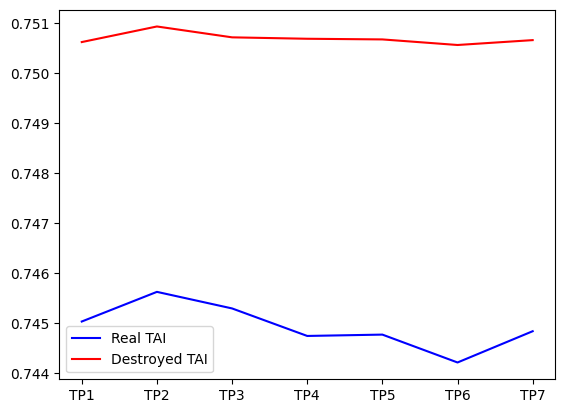

In [19]:
new_data = expression_data.remove_genes(ga_genes)
plt.plot(expression_data.tai, label="Real TAI", color="blue")
plt.plot(new_data.tai, label="Destroyed TAI", color="red")

plt.legend()
plt.show()

In [20]:
new_tai_var = np.var(new_data.tai).item()
print("destroyed TAI p-value:", get_p_value(new_tai_var))

destroyed TAI p-value: 0.1713017859278052


In [21]:
tais_per_set = []
for i in range(num_runs):
    new_data_per_set = expression_data.remove_genes(ga_gene_sets[i])
    tais_per_set.append(np.var(new_data_per_set.tai).item())

print(tais_per_set)

[3.6925033175428336e-09, 3.901231234264228e-09, 4.323025047337048e-09, 3.6475227910668505e-09, 5.3308064209640855e-09]


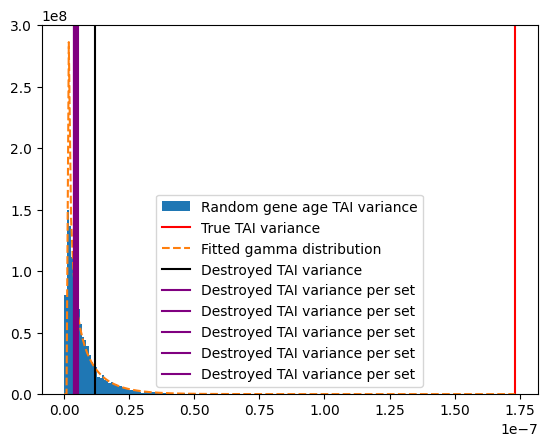

In [22]:
plt.hist(permutation_comp_vars, density=True, bins=100, label="Random gene age TAI variance")
plt.axvline(x=tai_var, label="True TAI variance", color="red")


x = np.linspace(0, tai_var, 200)
y = stats.gamma.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, y, label="Fitted gamma distribution", linestyle="dashed")
plt.axvline(x=new_tai_var, label="Destroyed TAI variance", color="black")
for t in tais_per_set:
    plt.axvline(x=t, label="Destroyed TAI variance per set", color="purple")
plt.legend()
plt.show()

### 3.3 Benchmark GA against greedy removal of genes with highest variance

In [23]:
gene_variances = expression_data.gene_variances.sort_values('Variance', ascending=False)
gene_variances

,Phylostratum,GeneID,Variance
10662,0.705924,at4g22505,79.366462
10660,0.705924,at4g22485,75.100151
2655,0.991740,at1g56660,47.590407
13413,0.705924,at5g26000,24.112823
3090,0.705924,at1g67090,23.803816
...,...,...,...
9295,0.705924,at3g60330,0.000298
917,0.705924,at1g14470,0.000297
802,0.705924,at1g12775,0.000286
7748,0.705924,at3g20420,0.000285


In [24]:
k_top = len(ga_genes)

highest_var_genes = gene_variances.head(k_top)['GeneID'].to_numpy()

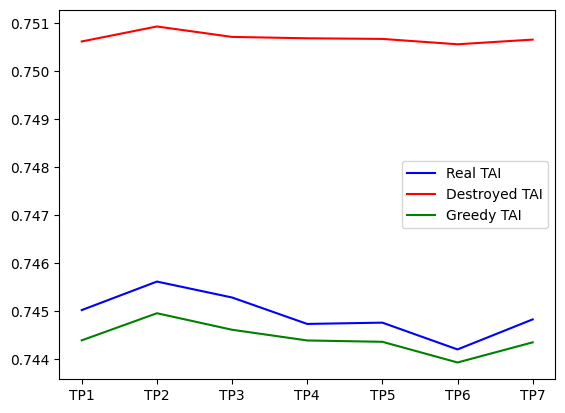

In [25]:
greedy_data = expression_data.remove_genes(highest_var_genes)
plt.plot(expression_data.tai, label="Real TAI", color="blue")
plt.plot(new_data.tai, label="Destroyed TAI", color="red")
plt.plot(greedy_data.tai, label="Greedy TAI", color="green")

plt.legend()
plt.show()

In [26]:
greedy_tai_var = np.var(greedy_data.tai).item()
print("p-value: ", get_p_value(greedy_tai_var))

p-value:  8.413315744136344e-05


Conversely, however, the genes that were extracted by GATAI tend to have a high variance (but they need to be carefully selected, it's not as simple as picking the most variant ones, hence the need for the GA approach)

In [27]:
common_genes = np.intersect1d(ga_genes, highest_var_genes)

print("Number of GA selected genes which are also part of the top_k most variant subset of genes in the dataset:", len(common_genes), "out of", len(ga_genes))

Number of GA selected genes which are also part of the top_k most variant subset of genes in the dataset: 47 out of 228
